In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.cleantext import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('../cap2/data/sephora_review_ordinary.csv')

In [21]:
df1.r_review[0]

'I’ve been using this for almost a week now. I can honestly say I was skeptical. I have dark old acne scars, the occasional random zit, and areas on my cheeks that are either enlarged pores or what I’ve heard called “pock marks”. I noticed a difference after the first night. Now, almost a week in to it, I can feel a difference, too. The scars still look the same (only been 1 week). But my overall skin looks brighter. And the areas where I have enlarged pores/pock marks feel a whole lot smoother. Makeup doesn’t automatically settle into them now. I recommend and I’m going to keep using, too!'

In [20]:
df1_test =df1[['r_review','r_star','']]

In [5]:
df2 = pd.read_csv('../cap2/data/sephora_review.csv')

In [23]:
df2_test = df2[['review_text', 'rating']]

In [26]:
df1_test.rename(columns = {'r_review':'Review', 'r_star': 'Rating'}, inplace = True)
df2_test.rename(columns = {'review_text':'Review', 'rating': 'Rating'}, inplace = True)

In [31]:
sephora = pd.concat([df1_test, df2_test])

In [34]:
sephora.to_csv('sepho_review_rating.csv')

# Sephora Review checkpoint

In [15]:
sephora = pd.read_csv('data/sepho_review_rating.csv').drop(columns='Unnamed: 0')

In [16]:
sephora.Review = cleanText(sephora.Review)

In [18]:
#CleanText1
sephora.Review[0]

'ive been using this for almost a week now i can honestly say i was skeptical i have dark old acne scars the occasional random zit and areas on my cheeks that are either enlarged pores or what ive heard called pock marks i noticed a difference after the first night now almost a week in to it i can feel a difference too the scars still look the same only been  week but my overall skin looks brighter and the areas where i have enlarged porespock marks feel a whole lot smoother makeup doesnt automatically settle into them now i recommend and im going to keep using too'

In [19]:
sephora.Review = cleanText2(sephora.Review)

In [20]:
#CleanText2
sephora.Review[0]

'ive use almost week honest say skeptic dark old acn scar occasion random zit area cheek either enlarg pore ive heard call pock mark notic differ first night almost week feel differ scar still look week overal skin look brighter area enlarg porespock mark feel whole lot smoother makeup doesnt automat settl recommend im go keep use'

In [21]:
sephora_vectorize = vectorize(sephora.Review.values.astype('U'), max_feat= 1000)

In [23]:
sephora_vectorize['Rating'] = sephora['Rating']

In [24]:
sephora_vectorize

abl   absolut  absorb      acid       acn  acnepron  across  act  activ  \
0     0.0  0.000000     0.0  0.000000  0.090357       0.0     0.0  0.0    0.0   
1     0.0  0.000000     0.0  0.000000  0.000000       0.0     0.0  0.0    0.0   
2     0.0  0.000000     0.0  0.102492  0.000000       0.0     0.0  0.0    0.0   
3     0.0  0.166134     0.0  0.000000  0.000000       0.0     0.0  0.0    0.0   
4     0.0  0.000000     0.0  0.115204  0.000000       0.0     0.0  0.0    0.0   
...   ...       ...     ...       ...       ...       ...     ...  ...    ...   
2204  0.0  0.000000     0.0  0.000000  0.000000       0.0     0.0  0.0    0.0   
2205  0.0  0.000000     0.0  0.000000  0.000000       0.0     0.0  0.0    0.0   
2206  0.0  0.000000     0.0  0.000000  0.000000       0.0     0.0  0.0    0.0   
2207  0.0  0.000000     0.0  0.000000  0.000000       0.0     0.0  0.0    0.0   
2208  0.0  0.000000     0.0  0.000000  0.000000       0.0     0.0  0.0    0.0   

      actual  ...  yet  youll  younger  your  youtub  zero  zinc       zit  \
0        0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.179267   
1        0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
2        0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
3        0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
4        0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
...      ...  ...  ...    ...      ...   ...     ...   ...   ...       ...   
2204     0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
2205     0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
2206     0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
2207     0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   
2208     0.0  ...  0.0    0.0      0.0   0.0     0.0   0.0   0.0  0.000000   

      zone  Rating  
0      0.0       5  
1      0.0       5  
2      0.0       5  
3      0.0       5  
4      0.0       5  
...    ...     ...  
2204   0.0       5  
2205   0.0       5  
2206   0.0       5  
2207   0.0       1  
2208   0.0       2  

[2209 rows x 1001 columns]

In [25]:
sephora_vectorize.to_pickle('data/sephora_vectorize.pkl')

# Makeup Alley Data

In [19]:
ma = pd.read_csv('data/makeup_alley_data_updated.csv')

In [24]:
ma_samp = ma.sample(100000, random_state = 123)

In [28]:
ma_samp = ma_samp[['Review','Rating']]

In [29]:
#ma_samp.to_csv('data/ma_samp.csv')

**checkpoint**

In [3]:
ma_samp = pd.read_csv('data/ma_samp.csv')

In [5]:
ma_samp.drop(columns='Unnamed: 0', inplace = True)

In [31]:
ma_samp.Review = cleanText(ma_samp.Review)

/Users/suchaya/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
ma_samp.Review = cleanText2(ma_samp.Review)

In [8]:
ma_vectorize = vectorize(ma_samp.Review.values.astype('U'), max_feat= 1000)

In [10]:
ma_vectorize['Rating'] =  ma_samp['Rating']

In [11]:
ma_vectorize

00        10  100   12   15   20   25        30   40   50  ...  write  \
0      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
1      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
2      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.116655  0.0  0.0  ...    0.0   
3      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
4      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
...    ...       ...  ...  ...  ...  ...  ...       ...  ...  ...  ...    ...   
99995  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
99996  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
99997  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
99998  0.0  0.067657  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   
99999  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  ...    0.0   

       wrong      year  yes  yet       you  younger       zit      zone  \
0        0.0  0.000000  0.0  0.0  0.000000      0.0  0.000000  0.000000   
1        0.0  0.000000  0.0  0.0  0.000000      0.0  0.000000  0.000000   
2        0.0  0.000000  0.0  0.0  0.307529      0.0  0.000000  0.000000   
3        0.0  0.000000  0.0  0.0  0.000000      0.0  0.139905  0.000000   
4        0.0  0.000000  0.0  0.0  0.000000      0.0  0.000000  0.000000   
...      ...       ...  ...  ...       ...      ...       ...       ...   
99995    0.0  0.000000  0.0  0.0  0.000000      0.0  0.000000  0.000000   
99996    0.0  0.000000  0.0  0.0  0.000000      0.0  0.000000  0.000000   
99997    0.0  0.000000  0.0  0.0  0.000000      0.0  0.000000  0.000000   
99998    0.0  0.048871  0.0  0.0  0.000000      0.0  0.000000  0.149083   
99999    0.0  0.000000  0.0  0.0  0.000000      0.0  0.000000  0.000000   

       Rating  
0         4.0  
1         4.0  
2         4.0  
3         2.0  
4         4.0  
...       ...  
99995     3.0  
99996     3.0  
99997     3.0  
99998     4.0  
99999     5.0  

[100000 rows x 1001 columns]

In [14]:
ma_vectorize.to_pickle('data/ma_vectorize.pkl')

# MLP Model

In [33]:
X_train, X_test = train_test_split(ma_vectorize[:50000].values, test_size = 0.2, random_state = 123)

In [34]:
model3 = Sequential()
model3.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(3, activation='relu'))
model3.add(Dense(25, activation='softmax'))
model3.add(Dense(X_train.shape[1])) # Multiple output neurons
model3.compile(loss='mean_squared_error', optimizer='rmsprop', metrics = ['mse'])
hist = model3.fit(X_train,X_train,verbose=1,epochs=5)

Train on 40000 samples
Epoch 1/5
40000/40000 [==============================] - 3s 72us/sample - loss: 0.0089 - mse: 0.0089
Epoch 2/5
40000/40000 [==============================] - 2s 54us/sample - loss: 0.0018 - mse: 0.0018
Epoch 3/5
40000/40000 [==============================] - 3s 68us/sample - loss: 9.4903e-04 - mse: 9.4903e-04
Epoch 4/5
40000/40000 [==============================] - 3s 75us/sample - loss: 9.2523e-04 - mse: 9.2523e-04
Epoch 5/5
40000/40000 [==============================] - 3s 64us/sample - loss: 9.1927e-04 - mse: 9.1927e-04


In [36]:
pred = model3.predict(X_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_test))
pred = model3.predict(ma_vectorize[50001:60001].values)
score2 = np.sqrt(metrics.mean_squared_error(pred,ma_vectorize[50001:60001].values))

print(f"Insample True Reviews Score (RMSE): {score1}".format(score1))
print(f"Out of Sample True Reviews Score (RMSE): {score2}")


Insample True Reviews Score (RMSE): 0.030271687996672528
Out of Sample True Reviews Score (RMSE): 0.030283882933332538


In [38]:
pred = model3.predict(sephora_vectorize.values)
score2 = np.sqrt(metrics.mean_squared_error(pred,sephora_vectorize.values))
score2

0.0319420497506705

In [40]:
X_train_loss = []
for i in range(X_train.shape[0]):
    print(i)
    X_train_loss.append(model3.evaluate(X_train[i].reshape(1,1001),X_train[i].reshape(1,1001))[0])

0
1/1 [==============================] - 0s 133ms/sample - loss: 9.2846e-04 - mse: 9.2846e-04
1
1/1 [==============================] - 0s 2ms/sample - loss: 9.8442e-04 - mse: 9.8442e-04
2
1/1 [==============================] - 0s 4ms/sample - loss: 8.9074e-04 - mse: 8.9074e-04
3
1/1 [==============================] - 0s 3ms/sample - loss: 9.5122e-04 - mse: 9.5122e-04
4
1/1 [==============================] - 0s 10ms/sample - loss: 9.6270e-04 - mse: 9.6270e-04
5
1/1 [==============================] - 0s 3ms/sample - loss: 9.6334e-04 - mse: 9.6334e-04
6
1/1 [==============================] - 0s 2ms/sample - loss: 8.9236e-04 - mse: 8.9236e-04
7
1/1 [==============================] - 0s 3ms/sample - loss: 8.9462e-04 - mse: 8.9462e-04
8
1/1 [==============================] - 0s 4ms/sample - loss: 8.3113e-04 - mse: 8.3113e-04
9
1/1 [==============================] - 0s 2ms/sample - loss: 9.1613e-04 - mse: 9.1613e-04
10
1/1 [==============================] - 0s 3ms/sample - loss: 8.5930e-04 - 

89
1/1 [==============================] - 0s 2ms/sample - loss: 9.9917e-04 - mse: 9.9917e-04
90
1/1 [==============================] - 0s 2ms/sample - loss: 8.9213e-04 - mse: 8.9213e-04
91
1/1 [==============================] - 0s 4ms/sample - loss: 9.0434e-04 - mse: 9.0434e-04
92
1/1 [==============================] - 0s 4ms/sample - loss: 9.0108e-04 - mse: 9.0108e-04
93
1/1 [==============================] - 0s 2ms/sample - loss: 9.6132e-04 - mse: 9.6132e-04
94
1/1 [==============================] - 0s 5ms/sample - loss: 9.3848e-04 - mse: 9.3848e-04
95
1/1 [==============================] - 0s 2ms/sample - loss: 9.3875e-04 - mse: 9.3875e-04
96
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
97
1/1 [==============================] - 0s 4ms/sample - loss: 9.8394e-04 - mse: 9.8394e-04
98
1/1 [==============================] - 0s 2ms/sample - loss: 9.0618e-04 - mse: 9.0618e-04
99
1/1 [==============================] - 0s 2ms/sample - loss: 9.0231e-04 - m

177
1/1 [==============================] - 0s 6ms/sample - loss: 9.8460e-04 - mse: 9.8460e-04
178
1/1 [==============================] - 0s 3ms/sample - loss: 8.5897e-04 - mse: 8.5897e-04
179
1/1 [==============================] - 0s 2ms/sample - loss: 8.9610e-04 - mse: 8.9610e-04
180
1/1 [==============================] - 0s 1ms/sample - loss: 8.8008e-04 - mse: 8.8008e-04
181
1/1 [==============================] - 0s 2ms/sample - loss: 8.7119e-04 - mse: 8.7119e-04
182
1/1 [==============================] - 0s 2ms/sample - loss: 8.9735e-04 - mse: 8.9735e-04
183
1/1 [==============================] - 0s 2ms/sample - loss: 9.8785e-04 - mse: 9.8785e-04
184
1/1 [==============================] - 0s 2ms/sample - loss: 9.2551e-04 - mse: 9.2551e-04
185
1/1 [==============================] - 0s 2ms/sample - loss: 9.5299e-04 - mse: 9.5299e-04
186
1/1 [==============================] - 0s 4ms/sample - loss: 8.4351e-04 - mse: 8.4351e-04
187
1/1 [==============================] - 0s 2ms/sample - l

265
1/1 [==============================] - 0s 6ms/sample - loss: 8.5886e-04 - mse: 8.5886e-04
266
1/1 [==============================] - 0s 2ms/sample - loss: 9.5872e-04 - mse: 9.5872e-04
267
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
268
1/1 [==============================] - 0s 5ms/sample - loss: 9.2233e-04 - mse: 9.2233e-04
269
1/1 [==============================] - 0s 2ms/sample - loss: 9.3131e-04 - mse: 9.3131e-04
270
1/1 [==============================] - 0s 2ms/sample - loss: 9.7318e-04 - mse: 9.7318e-04
271
1/1 [==============================] - 0s 3ms/sample - loss: 8.7053e-04 - mse: 8.7053e-04
272
1/1 [==============================] - 0s 12ms/sample - loss: 9.3242e-04 - mse: 9.3242e-04
273
1/1 [==============================] - 0s 5ms/sample - loss: 9.5520e-04 - mse: 9.5520e-04
274
1/1 [==============================] - 0s 5ms/sample - loss: 9.3537e-04 - mse: 9.3537e-04
275
1/1 [==============================] - 0s 2ms/sample - loss: 8.

353
1/1 [==============================] - 0s 2ms/sample - loss: 8.3470e-04 - mse: 8.3470e-04
354
1/1 [==============================] - 0s 2ms/sample - loss: 7.7852e-04 - mse: 7.7852e-04
355
1/1 [==============================] - 0s 2ms/sample - loss: 9.8201e-04 - mse: 9.8201e-04
356
1/1 [==============================] - 0s 2ms/sample - loss: 9.8185e-04 - mse: 9.8185e-04
357
1/1 [==============================] - 0s 2ms/sample - loss: 7.8958e-04 - mse: 7.8958e-04
358
1/1 [==============================] - 0s 2ms/sample - loss: 9.3014e-04 - mse: 9.3014e-04
359
1/1 [==============================] - 0s 4ms/sample - loss: 9.2970e-04 - mse: 9.2970e-04
360
1/1 [==============================] - 0s 3ms/sample - loss: 8.2399e-04 - mse: 8.2399e-04
361
1/1 [==============================] - 0s 2ms/sample - loss: 8.8216e-04 - mse: 8.8216e-04
362
1/1 [==============================] - 0s 2ms/sample - loss: 9.4717e-04 - mse: 9.4717e-04
363
1/1 [==============================] - 0s 2ms/sample - l

441
1/1 [==============================] - 0s 2ms/sample - loss: 9.3025e-04 - mse: 9.3025e-04
442
1/1 [==============================] - 0s 4ms/sample - loss: 8.3914e-04 - mse: 8.3914e-04
443
1/1 [==============================] - 0s 6ms/sample - loss: 9.4970e-04 - mse: 9.4970e-04
444
1/1 [==============================] - 0s 4ms/sample - loss: 8.5728e-04 - mse: 8.5728e-04
445
1/1 [==============================] - 0s 2ms/sample - loss: 8.7056e-04 - mse: 8.7056e-04
446
1/1 [==============================] - 0s 3ms/sample - loss: 9.0748e-04 - mse: 9.0748e-04
447
1/1 [==============================] - 0s 4ms/sample - loss: 9.0301e-04 - mse: 9.0301e-04
448
1/1 [==============================] - 0s 2ms/sample - loss: 9.4857e-04 - mse: 9.4857e-04
449
1/1 [==============================] - 0s 2ms/sample - loss: 8.5736e-04 - mse: 8.5736e-04
450
1/1 [==============================] - 0s 2ms/sample - loss: 9.7527e-04 - mse: 9.7527e-04
451
1/1 [==============================] - 0s 2ms/sample - l

529
1/1 [==============================] - 0s 2ms/sample - loss: 9.2365e-04 - mse: 9.2365e-04
530
1/1 [==============================] - 0s 2ms/sample - loss: 8.8063e-04 - mse: 8.8063e-04
531
1/1 [==============================] - 0s 2ms/sample - loss: 9.0736e-04 - mse: 9.0736e-04
532
1/1 [==============================] - 0s 2ms/sample - loss: 8.6579e-04 - mse: 8.6579e-04
533
1/1 [==============================] - 0s 3ms/sample - loss: 9.1884e-04 - mse: 9.1884e-04
534
1/1 [==============================] - 0s 2ms/sample - loss: 9.2632e-04 - mse: 9.2632e-04
535
1/1 [==============================] - 0s 2ms/sample - loss: 9.8165e-04 - mse: 9.8165e-04
536
1/1 [==============================] - 0s 2ms/sample - loss: 9.4548e-04 - mse: 9.4548e-04
537
1/1 [==============================] - 0s 2ms/sample - loss: 9.5736e-04 - mse: 9.5736e-04
538
1/1 [==============================] - 0s 2ms/sample - loss: 9.0889e-04 - mse: 9.0889e-04
539
1/1 [==============================] - 0s 2ms/sample - l

617
1/1 [==============================] - 0s 1ms/sample - loss: 9.7815e-04 - mse: 9.7815e-04
618
1/1 [==============================] - 0s 2ms/sample - loss: 9.1035e-04 - mse: 9.1035e-04
619
1/1 [==============================] - 0s 2ms/sample - loss: 8.7601e-04 - mse: 8.7601e-04
620
1/1 [==============================] - 0s 2ms/sample - loss: 9.6854e-04 - mse: 9.6854e-04
621
1/1 [==============================] - 0s 2ms/sample - loss: 8.8737e-04 - mse: 8.8737e-04
622
1/1 [==============================] - 0s 2ms/sample - loss: 7.8881e-04 - mse: 7.8881e-04
623
1/1 [==============================] - 0s 14ms/sample - loss: 7.8538e-04 - mse: 7.8538e-04
624
1/1 [==============================] - 0s 4ms/sample - loss: 9.6309e-04 - mse: 9.6309e-04
625
1/1 [==============================] - 0s 2ms/sample - loss: 9.3763e-04 - mse: 9.3763e-04
626
1/1 [==============================] - 0s 3ms/sample - loss: 9.1842e-04 - mse: 9.1842e-04
627
1/1 [==============================] - 0s 2ms/sample - 

705
1/1 [==============================] - 0s 2ms/sample - loss: 8.6531e-04 - mse: 8.6531e-04
706
1/1 [==============================] - 0s 2ms/sample - loss: 7.8965e-04 - mse: 7.8965e-04
707
1/1 [==============================] - 0s 2ms/sample - loss: 9.1744e-04 - mse: 9.1744e-04
708
1/1 [==============================] - 0s 3ms/sample - loss: 8.4779e-04 - mse: 8.4779e-04
709
1/1 [==============================] - 0s 2ms/sample - loss: 8.4212e-04 - mse: 8.4212e-04
710
1/1 [==============================] - 0s 2ms/sample - loss: 7.7852e-04 - mse: 7.7852e-04
711
1/1 [==============================] - 0s 2ms/sample - loss: 8.2719e-04 - mse: 8.2719e-04
712
1/1 [==============================] - 0s 4ms/sample - loss: 9.6808e-04 - mse: 9.6808e-04
713
1/1 [==============================] - 0s 3ms/sample - loss: 8.9751e-04 - mse: 8.9751e-04
714
1/1 [==============================] - 0s 2ms/sample - loss: 9.3357e-04 - mse: 9.3357e-04
715
1/1 [==============================] - 0s 2ms/sample - l

793
1/1 [==============================] - 0s 2ms/sample - loss: 9.5212e-04 - mse: 9.5212e-04
794
1/1 [==============================] - 0s 5ms/sample - loss: 9.2646e-04 - mse: 9.2646e-04
795
1/1 [==============================] - 0s 2ms/sample - loss: 9.2467e-04 - mse: 9.2467e-04
796
1/1 [==============================] - 0s 4ms/sample - loss: 9.2434e-04 - mse: 9.2434e-04
797
1/1 [==============================] - 0s 2ms/sample - loss: 8.4157e-04 - mse: 8.4157e-04
798
1/1 [==============================] - 0s 2ms/sample - loss: 9.5677e-04 - mse: 9.5677e-04
799
1/1 [==============================] - 0s 2ms/sample - loss: 9.1291e-04 - mse: 9.1291e-04
800
1/1 [==============================] - 0s 5ms/sample - loss: 8.6514e-04 - mse: 8.6514e-04
801
1/1 [==============================] - 0s 4ms/sample - loss: 9.5230e-04 - mse: 9.5230e-04
802
1/1 [==============================] - 0s 7ms/sample - loss: 8.8156e-04 - mse: 8.8156e-04
803
1/1 [==============================] - 0s 2ms/sample - l

881
1/1 [==============================] - 0s 3ms/sample - loss: 8.4167e-04 - mse: 8.4167e-04
882
1/1 [==============================] - 0s 2ms/sample - loss: 8.2522e-04 - mse: 8.2522e-04
883
1/1 [==============================] - 0s 3ms/sample - loss: 9.4845e-04 - mse: 9.4845e-04
884
1/1 [==============================] - 0s 2ms/sample - loss: 9.1244e-04 - mse: 9.1244e-04
885
1/1 [==============================] - 0s 2ms/sample - loss: 9.1123e-04 - mse: 9.1123e-04
886
1/1 [==============================] - 0s 2ms/sample - loss: 8.2912e-04 - mse: 8.2912e-04
887
1/1 [==============================] - 0s 4ms/sample - loss: 9.0917e-04 - mse: 9.0917e-04
888
1/1 [==============================] - 0s 2ms/sample - loss: 9.8868e-04 - mse: 9.8868e-04
889
1/1 [==============================] - 0s 16ms/sample - loss: 9.3146e-04 - mse: 9.3146e-04
890
1/1 [==============================] - 0s 2ms/sample - loss: 9.1342e-04 - mse: 9.1342e-04
891
1/1 [==============================] - 0s 2ms/sample - 

969
1/1 [==============================] - 0s 3ms/sample - loss: 8.9031e-04 - mse: 8.9031e-04
970
1/1 [==============================] - 0s 3ms/sample - loss: 9.6753e-04 - mse: 9.6753e-04
971
1/1 [==============================] - 0s 2ms/sample - loss: 9.7014e-04 - mse: 9.7014e-04
972
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
973
1/1 [==============================] - 0s 2ms/sample - loss: 9.3097e-04 - mse: 9.3097e-04
974
1/1 [==============================] - 0s 3ms/sample - loss: 8.6036e-04 - mse: 8.6036e-04
975
1/1 [==============================] - 0s 2ms/sample - loss: 9.2490e-04 - mse: 9.2490e-04
976
1/1 [==============================] - 0s 3ms/sample - loss: 7.6868e-04 - mse: 7.6868e-04
977
1/1 [==============================] - 0s 3ms/sample - loss: 9.3072e-04 - mse: 9.3072e-04
978
1/1 [==============================] - 0s 2ms/sample - loss: 9.1479e-04 - mse: 9.1479e-04
979
1/1 [==============================] - 0s 2ms/sample - loss: 9.0

1056
1/1 [==============================] - 0s 2ms/sample - loss: 8.7636e-04 - mse: 8.7636e-04
1057
1/1 [==============================] - 0s 2ms/sample - loss: 9.0292e-04 - mse: 9.0292e-04
1058
1/1 [==============================] - 0s 2ms/sample - loss: 9.3248e-04 - mse: 9.3248e-04
1059
1/1 [==============================] - 0s 4ms/sample - loss: 8.3129e-04 - mse: 8.3129e-04
1060
1/1 [==============================] - 0s 3ms/sample - loss: 9.8207e-04 - mse: 9.8207e-04
1061
1/1 [==============================] - 0s 5ms/sample - loss: 9.5377e-04 - mse: 9.5377e-04
1062
1/1 [==============================] - 0s 2ms/sample - loss: 8.9066e-04 - mse: 8.9066e-04
1063
1/1 [==============================] - 0s 2ms/sample - loss: 8.4811e-04 - mse: 8.4811e-04
1064
1/1 [==============================] - 0s 2ms/sample - loss: 9.2904e-04 - mse: 9.2904e-04
1065
1/1 [==============================] - 0s 3ms/sample - loss: 9.0424e-04 - mse: 9.0424e-04
1066
1/1 [==============================] - 0s 2ms

1143
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1144
1/1 [==============================] - 0s 2ms/sample - loss: 9.0813e-04 - mse: 9.0813e-04
1145
1/1 [==============================] - 0s 6ms/sample - loss: 9.4462e-04 - mse: 9.4462e-04
1146
1/1 [==============================] - 0s 2ms/sample - loss: 8.2776e-04 - mse: 8.2776e-04
1147
1/1 [==============================] - 0s 2ms/sample - loss: 9.6051e-04 - mse: 9.6051e-04
1148
1/1 [==============================] - 0s 2ms/sample - loss: 9.5673e-04 - mse: 9.5673e-04
1149
1/1 [==============================] - 0s 2ms/sample - loss: 9.4878e-04 - mse: 9.4878e-04
1150
1/1 [==============================] - 0s 4ms/sample - loss: 9.4177e-04 - mse: 9.4177e-04
1151
1/1 [==============================] - 0s 2ms/sample - loss: 9.4444e-04 - mse: 9.4444e-04
1152
1/1 [==============================] - 0s 2ms/sample - loss: 9.6479e-04 - mse: 9.6479e-04
1153
1/1 [==============================] - 0s 3ms/sample 

1230
1/1 [==============================] - 0s 2ms/sample - loss: 9.3040e-04 - mse: 9.3040e-04
1231
1/1 [==============================] - 0s 2ms/sample - loss: 9.7087e-04 - mse: 9.7087e-04
1232
1/1 [==============================] - 0s 3ms/sample - loss: 9.8293e-04 - mse: 9.8293e-04
1233
1/1 [==============================] - 0s 3ms/sample - loss: 9.5468e-04 - mse: 9.5468e-04
1234
1/1 [==============================] - 0s 2ms/sample - loss: 9.4893e-04 - mse: 9.4893e-04
1235
1/1 [==============================] - 0s 2ms/sample - loss: 8.2371e-04 - mse: 8.2371e-04
1236
1/1 [==============================] - 0s 2ms/sample - loss: 9.4334e-04 - mse: 9.4334e-04
1237
1/1 [==============================] - 0s 2ms/sample - loss: 8.9682e-04 - mse: 8.9682e-04
1238
1/1 [==============================] - 0s 2ms/sample - loss: 9.1492e-04 - mse: 9.1492e-04
1239
1/1 [==============================] - 0s 3ms/sample - loss: 8.9450e-04 - mse: 8.9450e-04
1240
1/1 [==============================] - 0s 2ms

1317
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1318
1/1 [==============================] - 0s 3ms/sample - loss: 9.2000e-04 - mse: 9.2000e-04
1319
1/1 [==============================] - 0s 2ms/sample - loss: 8.7408e-04 - mse: 8.7408e-04
1320
1/1 [==============================] - 0s 2ms/sample - loss: 9.4243e-04 - mse: 9.4243e-04
1321
1/1 [==============================] - 0s 2ms/sample - loss: 9.8455e-04 - mse: 9.8455e-04
1322
1/1 [==============================] - 0s 3ms/sample - loss: 8.1958e-04 - mse: 8.1958e-04
1323
1/1 [==============================] - 0s 2ms/sample - loss: 9.4361e-04 - mse: 9.4361e-04
1324
1/1 [==============================] - 0s 2ms/sample - loss: 9.9179e-04 - mse: 9.9179e-04
1325
1/1 [==============================] - 0s 2ms/sample - loss: 9.2645e-04 - mse: 9.2645e-04
1326
1/1 [==============================] - 0s 2ms/sample - loss: 8.2625e-04 - mse: 8.2625e-04
1327
1/1 [==============================] - 0s 2ms/sample 

1404
1/1 [==============================] - 0s 2ms/sample - loss: 9.5980e-04 - mse: 9.5980e-04
1405
1/1 [==============================] - 0s 2ms/sample - loss: 8.7207e-04 - mse: 8.7207e-04
1406
1/1 [==============================] - 0s 2ms/sample - loss: 8.7865e-04 - mse: 8.7865e-04
1407
1/1 [==============================] - 0s 2ms/sample - loss: 8.3495e-04 - mse: 8.3495e-04
1408
1/1 [==============================] - 0s 2ms/sample - loss: 9.0427e-04 - mse: 9.0427e-04
1409
1/1 [==============================] - 0s 2ms/sample - loss: 9.4822e-04 - mse: 9.4822e-04
1410
1/1 [==============================] - 0s 2ms/sample - loss: 8.5712e-04 - mse: 8.5712e-04
1411
1/1 [==============================] - 0s 2ms/sample - loss: 9.2194e-04 - mse: 9.2194e-04
1412
1/1 [==============================] - 0s 2ms/sample - loss: 9.4402e-04 - mse: 9.4402e-04
1413
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1414
1/1 [==============================] - 0s 2ms/sample 

1491
1/1 [==============================] - 0s 4ms/sample - loss: 8.7395e-04 - mse: 8.7395e-04
1492
1/1 [==============================] - 0s 1ms/sample - loss: 9.8982e-04 - mse: 9.8982e-04
1493
1/1 [==============================] - 0s 1ms/sample - loss: 8.9266e-04 - mse: 8.9266e-04
1494
1/1 [==============================] - 0s 2ms/sample - loss: 9.3895e-04 - mse: 9.3895e-04
1495
1/1 [==============================] - 0s 2ms/sample - loss: 9.0863e-04 - mse: 9.0863e-04
1496
1/1 [==============================] - 0s 5ms/sample - loss: 9.7726e-04 - mse: 9.7726e-04
1497
1/1 [==============================] - 0s 1ms/sample - loss: 8.7904e-04 - mse: 8.7904e-04
1498
1/1 [==============================] - 0s 2ms/sample - loss: 9.0338e-04 - mse: 9.0338e-04
1499
1/1 [==============================] - 0s 2ms/sample - loss: 9.7886e-04 - mse: 9.7886e-04
1500
1/1 [==============================] - 0s 5ms/sample - loss: 8.7592e-04 - mse: 8.7592e-04
1501
1/1 [==============================] - 0s 2ms

1578
1/1 [==============================] - 0s 2ms/sample - loss: 9.3619e-04 - mse: 9.3619e-04
1579
1/1 [==============================] - 0s 3ms/sample - loss: 9.0566e-04 - mse: 9.0566e-04
1580
1/1 [==============================] - 0s 2ms/sample - loss: 9.4364e-04 - mse: 9.4364e-04
1581
1/1 [==============================] - 0s 2ms/sample - loss: 9.6447e-04 - mse: 9.6447e-04
1582
1/1 [==============================] - 0s 9ms/sample - loss: 9.7534e-04 - mse: 9.7534e-04
1583
1/1 [==============================] - 0s 2ms/sample - loss: 8.7200e-04 - mse: 8.7200e-04
1584
1/1 [==============================] - 0s 2ms/sample - loss: 9.6881e-04 - mse: 9.6881e-04
1585
1/1 [==============================] - 0s 3ms/sample - loss: 9.3708e-04 - mse: 9.3708e-04
1586
1/1 [==============================] - 0s 2ms/sample - loss: 8.6140e-04 - mse: 8.6140e-04
1587
1/1 [==============================] - 0s 2ms/sample - loss: 8.3433e-04 - mse: 8.3433e-04
1588
1/1 [==============================] - 0s 3ms

1665
1/1 [==============================] - 0s 2ms/sample - loss: 9.0085e-04 - mse: 9.0085e-04
1666
1/1 [==============================] - 0s 2ms/sample - loss: 9.3216e-04 - mse: 9.3216e-04
1667
1/1 [==============================] - 0s 1ms/sample - loss: 8.7218e-04 - mse: 8.7218e-04
1668
1/1 [==============================] - 0s 2ms/sample - loss: 9.1227e-04 - mse: 9.1227e-04
1669
1/1 [==============================] - 0s 3ms/sample - loss: 9.0513e-04 - mse: 9.0513e-04
1670
1/1 [==============================] - 0s 2ms/sample - loss: 9.5046e-04 - mse: 9.5046e-04
1671
1/1 [==============================] - 0s 4ms/sample - loss: 9.8633e-04 - mse: 9.8633e-04
1672
1/1 [==============================] - 0s 4ms/sample - loss: 7.7935e-04 - mse: 7.7935e-04
1673
1/1 [==============================] - 0s 4ms/sample - loss: 9.6224e-04 - mse: 9.6224e-04
1674
1/1 [==============================] - 0s 2ms/sample - loss: 9.1241e-04 - mse: 9.1241e-04
1675
1/1 [==============================] - 0s 2ms

1752
1/1 [==============================] - 0s 2ms/sample - loss: 9.0262e-04 - mse: 9.0262e-04
1753
1/1 [==============================] - 0s 3ms/sample - loss: 8.3854e-04 - mse: 8.3854e-04
1754
1/1 [==============================] - 0s 2ms/sample - loss: 9.6978e-04 - mse: 9.6978e-04
1755
1/1 [==============================] - 0s 2ms/sample - loss: 8.9558e-04 - mse: 8.9558e-04
1756
1/1 [==============================] - 0s 2ms/sample - loss: 8.8493e-04 - mse: 8.8493e-04
1757
1/1 [==============================] - 0s 4ms/sample - loss: 9.6269e-04 - mse: 9.6269e-04
1758
1/1 [==============================] - 0s 2ms/sample - loss: 8.6254e-04 - mse: 8.6254e-04
1759
1/1 [==============================] - 0s 3ms/sample - loss: 9.5257e-04 - mse: 9.5257e-04
1760
1/1 [==============================] - 0s 2ms/sample - loss: 9.4424e-04 - mse: 9.4424e-04
1761
1/1 [==============================] - 0s 2ms/sample - loss: 8.5111e-04 - mse: 8.5111e-04
1762
1/1 [==============================] - 0s 3ms

1839
1/1 [==============================] - 0s 2ms/sample - loss: 8.8982e-04 - mse: 8.8982e-04
1840
1/1 [==============================] - 0s 5ms/sample - loss: 8.8625e-04 - mse: 8.8625e-04
1841
1/1 [==============================] - 0s 2ms/sample - loss: 9.1253e-04 - mse: 9.1253e-04
1842
1/1 [==============================] - 0s 2ms/sample - loss: 9.2177e-04 - mse: 9.2177e-04
1843
1/1 [==============================] - 0s 2ms/sample - loss: 9.2770e-04 - mse: 9.2770e-04
1844
1/1 [==============================] - 0s 4ms/sample - loss: 8.7241e-04 - mse: 8.7241e-04
1845
1/1 [==============================] - 0s 4ms/sample - loss: 8.8465e-04 - mse: 8.8465e-04
1846
1/1 [==============================] - 0s 20ms/sample - loss: 8.9432e-04 - mse: 8.9432e-04
1847
1/1 [==============================] - 0s 2ms/sample - loss: 9.3775e-04 - mse: 9.3775e-04
1848
1/1 [==============================] - 0s 2ms/sample - loss: 8.8267e-04 - mse: 8.8267e-04
1849
1/1 [==============================] - 0s 2m

1926
1/1 [==============================] - 0s 4ms/sample - loss: 9.5984e-04 - mse: 9.5984e-04
1927
1/1 [==============================] - 0s 2ms/sample - loss: 8.9411e-04 - mse: 8.9411e-04
1928
1/1 [==============================] - 0s 14ms/sample - loss: 0.0010 - mse: 0.0010
1929
1/1 [==============================] - 0s 2ms/sample - loss: 9.2134e-04 - mse: 9.2134e-04
1930
1/1 [==============================] - 0s 12ms/sample - loss: 9.3565e-04 - mse: 9.3565e-04
1931
1/1 [==============================] - 0s 2ms/sample - loss: 9.5627e-04 - mse: 9.5627e-04
1932
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
1933
1/1 [==============================] - 0s 4ms/sample - loss: 8.8937e-04 - mse: 8.8937e-04
1934
1/1 [==============================] - 0s 2ms/sample - loss: 9.2187e-04 - mse: 9.2187e-04
1935
1/1 [==============================] - 0s 2ms/sample - loss: 8.7354e-04 - mse: 8.7354e-04
1936
1/1 [==============================] - 0s 2ms/sample - loss

2013
1/1 [==============================] - 0s 4ms/sample - loss: 9.6019e-04 - mse: 9.6019e-04
2014
1/1 [==============================] - 0s 2ms/sample - loss: 8.9275e-04 - mse: 8.9275e-04
2015
1/1 [==============================] - 0s 2ms/sample - loss: 7.7690e-04 - mse: 7.7690e-04
2016
1/1 [==============================] - 0s 2ms/sample - loss: 9.8524e-04 - mse: 9.8524e-04
2017
1/1 [==============================] - 0s 2ms/sample - loss: 8.9090e-04 - mse: 8.9090e-04
2018
1/1 [==============================] - 0s 2ms/sample - loss: 9.6014e-04 - mse: 9.6014e-04
2019
1/1 [==============================] - 0s 3ms/sample - loss: 9.5177e-04 - mse: 9.5177e-04
2020
1/1 [==============================] - 0s 2ms/sample - loss: 8.9094e-04 - mse: 8.9094e-04
2021
1/1 [==============================] - 0s 3ms/sample - loss: 9.0291e-04 - mse: 9.0291e-04
2022
1/1 [==============================] - 0s 2ms/sample - loss: 9.1659e-04 - mse: 9.1659e-04
2023
1/1 [==============================] - 0s 2ms

2100
1/1 [==============================] - 0s 2ms/sample - loss: 9.7962e-04 - mse: 9.7962e-04
2101
1/1 [==============================] - 0s 3ms/sample - loss: 9.0610e-04 - mse: 9.0610e-04
2102
1/1 [==============================] - 0s 2ms/sample - loss: 9.1763e-04 - mse: 9.1763e-04
2103
1/1 [==============================] - 0s 2ms/sample - loss: 9.5957e-04 - mse: 9.5957e-04
2104
1/1 [==============================] - 0s 2ms/sample - loss: 9.1400e-04 - mse: 9.1400e-04
2105
1/1 [==============================] - 0s 2ms/sample - loss: 8.6034e-04 - mse: 8.6034e-04
2106
1/1 [==============================] - 0s 2ms/sample - loss: 9.9619e-04 - mse: 9.9619e-04
2107
1/1 [==============================] - 0s 5ms/sample - loss: 9.4206e-04 - mse: 9.4206e-04
2108
1/1 [==============================] - 0s 2ms/sample - loss: 7.6670e-04 - mse: 7.6670e-04
2109
1/1 [==============================] - 0s 2ms/sample - loss: 9.6195e-04 - mse: 9.6195e-04
2110
1/1 [==============================] - 0s 5ms

2187
1/1 [==============================] - 0s 2ms/sample - loss: 9.3682e-04 - mse: 9.3682e-04
2188
1/1 [==============================] - 0s 4ms/sample - loss: 9.1664e-04 - mse: 9.1664e-04
2189
1/1 [==============================] - 0s 2ms/sample - loss: 9.3330e-04 - mse: 9.3330e-04
2190
1/1 [==============================] - 0s 3ms/sample - loss: 8.6360e-04 - mse: 8.6360e-04
2191
1/1 [==============================] - 0s 2ms/sample - loss: 9.4342e-04 - mse: 9.4342e-04
2192
1/1 [==============================] - 0s 2ms/sample - loss: 8.6338e-04 - mse: 8.6338e-04
2193
1/1 [==============================] - 0s 2ms/sample - loss: 8.4465e-04 - mse: 8.4465e-04
2194
1/1 [==============================] - 0s 2ms/sample - loss: 8.8568e-04 - mse: 8.8568e-04
2195
1/1 [==============================] - 0s 2ms/sample - loss: 9.6663e-04 - mse: 9.6663e-04
2196
1/1 [==============================] - 0s 2ms/sample - loss: 8.6440e-04 - mse: 8.6440e-04
2197
1/1 [==============================] - 0s 2ms

2274
1/1 [==============================] - 0s 2ms/sample - loss: 8.8754e-04 - mse: 8.8754e-04
2275
1/1 [==============================] - 0s 2ms/sample - loss: 9.6823e-04 - mse: 9.6823e-04
2276
1/1 [==============================] - 0s 2ms/sample - loss: 9.8274e-04 - mse: 9.8274e-04
2277
1/1 [==============================] - 0s 2ms/sample - loss: 9.4260e-04 - mse: 9.4260e-04
2278
1/1 [==============================] - 0s 2ms/sample - loss: 9.0725e-04 - mse: 9.0725e-04
2279
1/1 [==============================] - 0s 2ms/sample - loss: 9.2068e-04 - mse: 9.2068e-04
2280
1/1 [==============================] - 0s 7ms/sample - loss: 9.2640e-04 - mse: 9.2640e-04
2281
1/1 [==============================] - 0s 2ms/sample - loss: 8.6901e-04 - mse: 8.6901e-04
2282
1/1 [==============================] - 0s 2ms/sample - loss: 8.1395e-04 - mse: 8.1395e-04
2283
1/1 [==============================] - 0s 3ms/sample - loss: 9.2676e-04 - mse: 9.2676e-04
2284
1/1 [==============================] - 0s 2ms

2361
1/1 [==============================] - 0s 2ms/sample - loss: 9.3583e-04 - mse: 9.3583e-04
2362
1/1 [==============================] - 0s 2ms/sample - loss: 9.3883e-04 - mse: 9.3883e-04
2363
1/1 [==============================] - 0s 2ms/sample - loss: 9.2491e-04 - mse: 9.2491e-04
2364
1/1 [==============================] - 0s 2ms/sample - loss: 9.6865e-04 - mse: 9.6865e-04
2365
1/1 [==============================] - 0s 2ms/sample - loss: 9.5125e-04 - mse: 9.5125e-04
2366
1/1 [==============================] - 0s 2ms/sample - loss: 9.5029e-04 - mse: 9.5029e-04
2367
1/1 [==============================] - 0s 3ms/sample - loss: 9.1917e-04 - mse: 9.1917e-04
2368
1/1 [==============================] - 0s 2ms/sample - loss: 9.0612e-04 - mse: 9.0612e-04
2369
1/1 [==============================] - 0s 4ms/sample - loss: 8.9139e-04 - mse: 8.9139e-04
2370
1/1 [==============================] - 0s 2ms/sample - loss: 9.7392e-04 - mse: 9.7392e-04
2371
1/1 [==============================] - 0s 2ms

2448
1/1 [==============================] - 0s 2ms/sample - loss: 8.5885e-04 - mse: 8.5885e-04
2449
1/1 [==============================] - 0s 2ms/sample - loss: 8.7265e-04 - mse: 8.7265e-04
2450
1/1 [==============================] - 0s 2ms/sample - loss: 9.0468e-04 - mse: 9.0468e-04
2451
1/1 [==============================] - 0s 2ms/sample - loss: 9.5410e-04 - mse: 9.5410e-04
2452
1/1 [==============================] - 0s 2ms/sample - loss: 8.8967e-04 - mse: 8.8967e-04
2453
1/1 [==============================] - 0s 2ms/sample - loss: 9.7296e-04 - mse: 9.7296e-04
2454
1/1 [==============================] - 0s 2ms/sample - loss: 9.1595e-04 - mse: 9.1595e-04
2455
1/1 [==============================] - 0s 3ms/sample - loss: 9.4079e-04 - mse: 9.4079e-04
2456
1/1 [==============================] - 0s 3ms/sample - loss: 9.5103e-04 - mse: 9.5103e-04
2457
1/1 [==============================] - 0s 2ms/sample - loss: 8.5777e-04 - mse: 8.5777e-04
2458
1/1 [==============================] - 0s 2ms

2535
1/1 [==============================] - 0s 2ms/sample - loss: 8.8267e-04 - mse: 8.8267e-04
2536
1/1 [==============================] - 0s 2ms/sample - loss: 9.1207e-04 - mse: 9.1207e-04
2537
1/1 [==============================] - 0s 2ms/sample - loss: 9.3052e-04 - mse: 9.3052e-04
2538
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2539
1/1 [==============================] - 0s 11ms/sample - loss: 9.3670e-04 - mse: 9.3670e-04
2540
1/1 [==============================] - 0s 2ms/sample - loss: 9.5469e-04 - mse: 9.5469e-04
2541
1/1 [==============================] - 0s 2ms/sample - loss: 9.4206e-04 - mse: 9.4206e-04
2542
1/1 [==============================] - 0s 4ms/sample - loss: 9.9175e-04 - mse: 9.9175e-04
2543
1/1 [==============================] - 0s 2ms/sample - loss: 9.6148e-04 - mse: 9.6148e-04
2544
1/1 [==============================] - 0s 2ms/sample - loss: 8.2168e-04 - mse: 8.2168e-04
2545
1/1 [==============================] - 0s 2ms/sample

2622
1/1 [==============================] - 0s 2ms/sample - loss: 9.1176e-04 - mse: 9.1176e-04
2623
1/1 [==============================] - 0s 2ms/sample - loss: 9.2974e-04 - mse: 9.2974e-04
2624
1/1 [==============================] - 0s 2ms/sample - loss: 8.4263e-04 - mse: 8.4263e-04
2625
1/1 [==============================] - 0s 3ms/sample - loss: 8.9774e-04 - mse: 8.9774e-04
2626
1/1 [==============================] - 0s 2ms/sample - loss: 8.0981e-04 - mse: 8.0981e-04
2627
1/1 [==============================] - 0s 3ms/sample - loss: 9.5637e-04 - mse: 9.5637e-04
2628
1/1 [==============================] - 0s 4ms/sample - loss: 8.9195e-04 - mse: 8.9195e-04
2629
1/1 [==============================] - 0s 6ms/sample - loss: 9.3313e-04 - mse: 9.3313e-04
2630
1/1 [==============================] - 0s 2ms/sample - loss: 9.1519e-04 - mse: 9.1519e-04
2631
1/1 [==============================] - 0s 2ms/sample - loss: 9.0661e-04 - mse: 9.0661e-04
2632
1/1 [==============================] - 0s 4ms

2709
1/1 [==============================] - 0s 2ms/sample - loss: 9.0342e-04 - mse: 9.0342e-04
2710
1/1 [==============================] - 0s 2ms/sample - loss: 8.6179e-04 - mse: 8.6179e-04
2711
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2712
1/1 [==============================] - 0s 11ms/sample - loss: 6.0867e-05 - mse: 6.0867e-05
2713
1/1 [==============================] - 0s 2ms/sample - loss: 9.5043e-04 - mse: 9.5043e-04
2714
1/1 [==============================] - 0s 2ms/sample - loss: 9.8626e-04 - mse: 9.8626e-04
2715
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2716
1/1 [==============================] - 0s 2ms/sample - loss: 9.0995e-04 - mse: 9.0995e-04
2717
1/1 [==============================] - 0s 2ms/sample - loss: 8.6110e-04 - mse: 8.6110e-04
2718
1/1 [==============================] - 0s 2ms/sample - loss: 9.4426e-04 - mse: 9.4426e-04
2719
1/1 [==============================] - 0s 2ms/sample - loss:

2796
1/1 [==============================] - 0s 3ms/sample - loss: 9.1976e-04 - mse: 9.1976e-04
2797
1/1 [==============================] - 0s 2ms/sample - loss: 9.1491e-04 - mse: 9.1491e-04
2798
1/1 [==============================] - 0s 2ms/sample - loss: 9.6054e-04 - mse: 9.6054e-04
2799
1/1 [==============================] - 0s 2ms/sample - loss: 9.9651e-04 - mse: 9.9651e-04
2800
1/1 [==============================] - 0s 2ms/sample - loss: 9.1425e-04 - mse: 9.1425e-04
2801
1/1 [==============================] - 0s 2ms/sample - loss: 9.4549e-04 - mse: 9.4549e-04
2802
1/1 [==============================] - 0s 2ms/sample - loss: 8.7584e-04 - mse: 8.7584e-04
2803
1/1 [==============================] - 0s 2ms/sample - loss: 9.2795e-04 - mse: 9.2795e-04
2804
1/1 [==============================] - 0s 2ms/sample - loss: 9.4969e-04 - mse: 9.4969e-04
2805
1/1 [==============================] - 0s 2ms/sample - loss: 9.3235e-04 - mse: 9.3235e-04
2806
1/1 [==============================] - 0s 2ms

2883
1/1 [==============================] - 0s 2ms/sample - loss: 9.4929e-04 - mse: 9.4929e-04
2884
1/1 [==============================] - 0s 2ms/sample - loss: 8.9490e-04 - mse: 8.9490e-04
2885
1/1 [==============================] - 0s 2ms/sample - loss: 9.3687e-04 - mse: 9.3687e-04
2886
1/1 [==============================] - 0s 2ms/sample - loss: 8.8837e-04 - mse: 8.8837e-04
2887
1/1 [==============================] - 0s 3ms/sample - loss: 9.1925e-04 - mse: 9.1925e-04
2888
1/1 [==============================] - 0s 3ms/sample - loss: 9.6014e-04 - mse: 9.6014e-04
2889
1/1 [==============================] - 0s 2ms/sample - loss: 9.4611e-04 - mse: 9.4611e-04
2890
1/1 [==============================] - 0s 2ms/sample - loss: 8.9176e-04 - mse: 8.9176e-04
2891
1/1 [==============================] - 0s 3ms/sample - loss: 9.4178e-04 - mse: 9.4178e-04
2892
1/1 [==============================] - 0s 1ms/sample - loss: 9.3515e-04 - mse: 9.3515e-04
2893
1/1 [==============================] - 0s 2ms

2970
1/1 [==============================] - 0s 2ms/sample - loss: 9.2397e-04 - mse: 9.2397e-04
2971
1/1 [==============================] - 0s 2ms/sample - loss: 9.2755e-04 - mse: 9.2755e-04
2972
1/1 [==============================] - 0s 2ms/sample - loss: 9.3696e-04 - mse: 9.3696e-04
2973
1/1 [==============================] - 0s 4ms/sample - loss: 9.0146e-04 - mse: 9.0146e-04
2974
1/1 [==============================] - 0s 2ms/sample - loss: 8.0590e-04 - mse: 8.0590e-04
2975
1/1 [==============================] - 0s 2ms/sample - loss: 9.2073e-04 - mse: 9.2073e-04
2976
1/1 [==============================] - 0s 2ms/sample - loss: 8.6736e-04 - mse: 8.6736e-04
2977
1/1 [==============================] - 0s 2ms/sample - loss: 8.0075e-04 - mse: 8.0075e-04
2978
1/1 [==============================] - 0s 5ms/sample - loss: 9.2518e-04 - mse: 9.2518e-04
2979
1/1 [==============================] - 0s 3ms/sample - loss: 9.3548e-04 - mse: 9.3548e-04
2980
1/1 [==============================] - 0s 4ms

3057
1/1 [==============================] - 0s 2ms/sample - loss: 9.2042e-04 - mse: 9.2042e-04
3058
1/1 [==============================] - 0s 2ms/sample - loss: 9.3744e-04 - mse: 9.3744e-04
3059
1/1 [==============================] - 0s 2ms/sample - loss: 9.0921e-04 - mse: 9.0921e-04
3060
1/1 [==============================] - 0s 2ms/sample - loss: 8.4991e-04 - mse: 8.4991e-04
3061
1/1 [==============================] - 0s 2ms/sample - loss: 9.4360e-04 - mse: 9.4360e-04
3062
1/1 [==============================] - 0s 2ms/sample - loss: 9.1665e-04 - mse: 9.1665e-04
3063
1/1 [==============================] - 0s 5ms/sample - loss: 9.0895e-04 - mse: 9.0895e-04
3064
1/1 [==============================] - 0s 2ms/sample - loss: 8.7573e-04 - mse: 8.7573e-04
3065
1/1 [==============================] - 0s 2ms/sample - loss: 9.0908e-04 - mse: 9.0908e-04
3066
1/1 [==============================] - 0s 2ms/sample - loss: 8.7391e-04 - mse: 8.7391e-04
3067
1/1 [==============================] - 0s 2ms

3144
1/1 [==============================] - 0s 3ms/sample - loss: 9.4611e-04 - mse: 9.4611e-04
3145
1/1 [==============================] - 0s 3ms/sample - loss: 9.2796e-04 - mse: 9.2796e-04
3146
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
3147
1/1 [==============================] - 0s 2ms/sample - loss: 8.6436e-04 - mse: 8.6436e-04
3148
1/1 [==============================] - 0s 9ms/sample - loss: 9.0229e-04 - mse: 9.0229e-04
3149
1/1 [==============================] - 0s 2ms/sample - loss: 8.3055e-04 - mse: 8.3055e-04
3150
1/1 [==============================] - 0s 3ms/sample - loss: 9.7809e-04 - mse: 9.7809e-04
3151
1/1 [==============================] - 0s 17ms/sample - loss: 9.6712e-04 - mse: 9.6712e-04
3152
1/1 [==============================] - 0s 4ms/sample - loss: 9.2767e-04 - mse: 9.2767e-04
3153
1/1 [==============================] - 0s 2ms/sample - loss: 9.3085e-04 - mse: 9.3085e-04
3154
1/1 [==============================] - 0s 3ms/sample

3231
1/1 [==============================] - 0s 2ms/sample - loss: 9.4325e-04 - mse: 9.4325e-04
3232
1/1 [==============================] - 0s 2ms/sample - loss: 9.5082e-04 - mse: 9.5082e-04
3233
1/1 [==============================] - 0s 69ms/sample - loss: 9.1464e-04 - mse: 9.1464e-04
3234
1/1 [==============================] - 0s 3ms/sample - loss: 9.6026e-04 - mse: 9.6026e-04
3235
1/1 [==============================] - 0s 5ms/sample - loss: 9.0435e-04 - mse: 9.0435e-04
3236
1/1 [==============================] - 0s 2ms/sample - loss: 9.5045e-04 - mse: 9.5045e-04
3237
1/1 [==============================] - 0s 2ms/sample - loss: 8.8992e-04 - mse: 8.8992e-04
3238
1/1 [==============================] - 0s 3ms/sample - loss: 9.2769e-04 - mse: 9.2769e-04
3239
1/1 [==============================] - 0s 2ms/sample - loss: 9.0730e-04 - mse: 9.0730e-04
3240
1/1 [==============================] - 0s 5ms/sample - loss: 9.0074e-04 - mse: 9.0074e-04
3241
1/1 [==============================] - 0s 2m

3318
1/1 [==============================] - 0s 2ms/sample - loss: 8.7202e-04 - mse: 8.7202e-04
3319
1/1 [==============================] - 0s 2ms/sample - loss: 9.6764e-04 - mse: 9.6764e-04
3320
1/1 [==============================] - 0s 2ms/sample - loss: 8.7261e-04 - mse: 8.7261e-04
3321
1/1 [==============================] - 0s 3ms/sample - loss: 8.3692e-04 - mse: 8.3692e-04
3322
1/1 [==============================] - 0s 2ms/sample - loss: 8.5448e-04 - mse: 8.5448e-04
3323
1/1 [==============================] - 0s 2ms/sample - loss: 8.4988e-04 - mse: 8.4988e-04
3324
1/1 [==============================] - 0s 2ms/sample - loss: 9.0519e-04 - mse: 9.0519e-04
3325
1/1 [==============================] - 0s 5ms/sample - loss: 8.4550e-04 - mse: 8.4550e-04
3326
1/1 [==============================] - 0s 2ms/sample - loss: 9.2763e-04 - mse: 9.2763e-04
3327
1/1 [==============================] - 0s 3ms/sample - loss: 9.0760e-04 - mse: 9.0760e-04
3328
1/1 [==============================] - 0s 4ms

3405
1/1 [==============================] - 0s 2ms/sample - loss: 8.4620e-04 - mse: 8.4620e-04
3406
1/1 [==============================] - 0s 3ms/sample - loss: 8.9841e-04 - mse: 8.9841e-04
3407
1/1 [==============================] - 0s 2ms/sample - loss: 9.7845e-04 - mse: 9.7845e-04
3408
1/1 [==============================] - 0s 3ms/sample - loss: 8.8839e-04 - mse: 8.8839e-04
3409
1/1 [==============================] - 0s 2ms/sample - loss: 9.2509e-04 - mse: 9.2509e-04
3410
1/1 [==============================] - 0s 2ms/sample - loss: 9.4712e-04 - mse: 9.4712e-04
3411
1/1 [==============================] - 0s 2ms/sample - loss: 9.7477e-04 - mse: 9.7477e-04
3412
1/1 [==============================] - 0s 2ms/sample - loss: 9.1548e-04 - mse: 9.1548e-04
3413
1/1 [==============================] - 0s 3ms/sample - loss: 9.2985e-04 - mse: 9.2985e-04
3414
1/1 [==============================] - 0s 11ms/sample - loss: 8.5243e-04 - mse: 8.5243e-04
3415
1/1 [==============================] - 0s 2m

3492
1/1 [==============================] - 0s 3ms/sample - loss: 9.2586e-04 - mse: 9.2586e-04
3493
1/1 [==============================] - 0s 2ms/sample - loss: 8.9486e-04 - mse: 8.9486e-04
3494
1/1 [==============================] - 0s 18ms/sample - loss: 9.8255e-04 - mse: 9.8255e-04
3495
1/1 [==============================] - 0s 3ms/sample - loss: 9.9121e-04 - mse: 9.9121e-04
3496
1/1 [==============================] - 0s 2ms/sample - loss: 9.3021e-04 - mse: 9.3021e-04
3497
1/1 [==============================] - 0s 2ms/sample - loss: 8.9736e-04 - mse: 8.9736e-04
3498
1/1 [==============================] - 0s 2ms/sample - loss: 9.3646e-04 - mse: 9.3646e-04
3499
1/1 [==============================] - 0s 2ms/sample - loss: 9.5248e-04 - mse: 9.5248e-04
3500
1/1 [==============================] - 0s 2ms/sample - loss: 8.8602e-04 - mse: 8.8602e-04
3501
1/1 [==============================] - 0s 2ms/sample - loss: 8.9490e-04 - mse: 8.9490e-04
3502
1/1 [==============================] - 0s 2m

3579
1/1 [==============================] - 0s 2ms/sample - loss: 9.4981e-04 - mse: 9.4981e-04
3580
1/1 [==============================] - 0s 2ms/sample - loss: 8.9555e-04 - mse: 8.9555e-04
3581
1/1 [==============================] - 0s 2ms/sample - loss: 8.9895e-04 - mse: 8.9895e-04
3582
1/1 [==============================] - 0s 3ms/sample - loss: 9.5062e-04 - mse: 9.5062e-04
3583
1/1 [==============================] - 0s 2ms/sample - loss: 9.6111e-04 - mse: 9.6111e-04
3584
1/1 [==============================] - 0s 2ms/sample - loss: 9.0107e-04 - mse: 9.0107e-04
3585
1/1 [==============================] - 0s 2ms/sample - loss: 8.9422e-04 - mse: 8.9422e-04
3586
1/1 [==============================] - 0s 2ms/sample - loss: 9.7786e-04 - mse: 9.7786e-04
3587
1/1 [==============================] - 0s 2ms/sample - loss: 9.0507e-04 - mse: 9.0507e-04
3588
1/1 [==============================] - 0s 2ms/sample - loss: 9.3888e-04 - mse: 9.3888e-04
3589
1/1 [==============================] - 0s 6ms

3666
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
3667
1/1 [==============================] - 0s 2ms/sample - loss: 9.3421e-04 - mse: 9.3421e-04
3668
1/1 [==============================] - 0s 2ms/sample - loss: 9.2854e-04 - mse: 9.2854e-04
3669
1/1 [==============================] - 0s 12ms/sample - loss: 9.9449e-04 - mse: 9.9449e-04
3670
1/1 [==============================] - 0s 4ms/sample - loss: 9.2942e-04 - mse: 9.2942e-04
3671
1/1 [==============================] - 0s 2ms/sample - loss: 8.9862e-04 - mse: 8.9862e-04
3672
1/1 [==============================] - 0s 2ms/sample - loss: 9.7952e-04 - mse: 9.7952e-04
3673
1/1 [==============================] - 0s 2ms/sample - loss: 9.6888e-04 - mse: 9.6888e-04
3674
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
3675
1/1 [==============================] - 0s 4ms/sample - loss: 9.8322e-04 - mse: 9.8322e-04
3676
1/1 [==============================] - 0s 3ms/sample - loss:

3753
1/1 [==============================] - 0s 2ms/sample - loss: 8.9199e-04 - mse: 8.9199e-04
3754
1/1 [==============================] - 0s 2ms/sample - loss: 9.6891e-04 - mse: 9.6891e-04
3755
1/1 [==============================] - 0s 6ms/sample - loss: 8.8918e-04 - mse: 8.8918e-04
3756
1/1 [==============================] - 0s 2ms/sample - loss: 9.6889e-04 - mse: 9.6889e-04
3757
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
3758
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
3759
1/1 [==============================] - 0s 2ms/sample - loss: 9.1115e-04 - mse: 9.1115e-04
3760
1/1 [==============================] - 0s 2ms/sample - loss: 8.7075e-04 - mse: 8.7075e-04
3761
1/1 [==============================] - 0s 2ms/sample - loss: 9.3863e-04 - mse: 9.3863e-04
3762
1/1 [==============================] - 0s 2ms/sample - loss: 9.3406e-04 - mse: 9.3406e-04
3763
1/1 [==============================] - 0s 4ms/sample - loss: 

3840
1/1 [==============================] - 0s 2ms/sample - loss: 9.2937e-04 - mse: 9.2937e-04
3841
1/1 [==============================] - 0s 3ms/sample - loss: 9.3178e-04 - mse: 9.3178e-04
3842
1/1 [==============================] - 0s 2ms/sample - loss: 9.1187e-04 - mse: 9.1187e-04
3843
1/1 [==============================] - 0s 2ms/sample - loss: 9.8060e-04 - mse: 9.8060e-04
3844
1/1 [==============================] - 0s 2ms/sample - loss: 9.4896e-04 - mse: 9.4896e-04
3845
1/1 [==============================] - 0s 2ms/sample - loss: 8.7447e-04 - mse: 8.7447e-04
3846
1/1 [==============================] - 0s 2ms/sample - loss: 8.0901e-04 - mse: 8.0901e-04
3847
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
3848
1/1 [==============================] - 0s 2ms/sample - loss: 9.7930e-04 - mse: 9.7930e-04
3849
1/1 [==============================] - 0s 2ms/sample - loss: 9.1799e-04 - mse: 9.1799e-04
3850
1/1 [==============================] - 0s 2ms/sample 

3927
1/1 [==============================] - 0s 2ms/sample - loss: 8.8721e-04 - mse: 8.8721e-04
3928
1/1 [==============================] - 0s 2ms/sample - loss: 9.2602e-04 - mse: 9.2602e-04
3929
1/1 [==============================] - 0s 2ms/sample - loss: 8.8459e-04 - mse: 8.8459e-04
3930
1/1 [==============================] - 0s 3ms/sample - loss: 9.6395e-04 - mse: 9.6395e-04
3931
1/1 [==============================] - 0s 3ms/sample - loss: 8.5478e-04 - mse: 8.5478e-04
3932
1/1 [==============================] - 0s 2ms/sample - loss: 8.8567e-04 - mse: 8.8567e-04
3933
1/1 [==============================] - 0s 3ms/sample - loss: 9.3608e-04 - mse: 9.3608e-04
3934
1/1 [==============================] - 0s 2ms/sample - loss: 9.3132e-04 - mse: 9.3132e-04
3935
1/1 [==============================] - 0s 3ms/sample - loss: 9.4261e-04 - mse: 9.4261e-04
3936
1/1 [==============================] - 0s 2ms/sample - loss: 8.9518e-04 - mse: 8.9518e-04
3937
1/1 [==============================] - 0s 3ms

4014
1/1 [==============================] - 0s 2ms/sample - loss: 8.8713e-04 - mse: 8.8713e-04
4015
1/1 [==============================] - 0s 2ms/sample - loss: 9.6305e-04 - mse: 9.6305e-04
4016
1/1 [==============================] - 0s 2ms/sample - loss: 8.9172e-04 - mse: 8.9172e-04
4017
1/1 [==============================] - 0s 2ms/sample - loss: 9.2427e-04 - mse: 9.2427e-04
4018
1/1 [==============================] - 0s 2ms/sample - loss: 9.3315e-04 - mse: 9.3315e-04
4019
1/1 [==============================] - 0s 2ms/sample - loss: 9.9057e-04 - mse: 9.9057e-04
4020
1/1 [==============================] - 0s 2ms/sample - loss: 8.9332e-04 - mse: 8.9332e-04
4021
1/1 [==============================] - 0s 2ms/sample - loss: 8.9128e-04 - mse: 8.9128e-04
4022
1/1 [==============================] - 0s 2ms/sample - loss: 9.3877e-04 - mse: 9.3877e-04
4023
1/1 [==============================] - 0s 2ms/sample - loss: 8.8306e-04 - mse: 8.8306e-04
4024
1/1 [==============================] - 0s 2ms

4101
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
4102
1/1 [==============================] - 0s 2ms/sample - loss: 9.4764e-04 - mse: 9.4764e-04
4103
1/1 [==============================] - 0s 3ms/sample - loss: 9.1498e-04 - mse: 9.1498e-04
4104
1/1 [==============================] - 0s 4ms/sample - loss: 8.6411e-04 - mse: 8.6411e-04
4105
1/1 [==============================] - 0s 2ms/sample - loss: 9.0100e-04 - mse: 9.0100e-04
4106
1/1 [==============================] - 0s 2ms/sample - loss: 8.9979e-04 - mse: 8.9979e-04
4107
1/1 [==============================] - 0s 2ms/sample - loss: 8.9516e-04 - mse: 8.9516e-04
4108
1/1 [==============================] - 0s 4ms/sample - loss: 9.2698e-04 - mse: 9.2698e-04
4109
1/1 [==============================] - 0s 2ms/sample - loss: 9.4773e-04 - mse: 9.4773e-04
4110
1/1 [==============================] - 0s 2ms/sample - loss: 8.9294e-04 - mse: 8.9294e-04
4111
1/1 [==============================] - 0s 2ms/sample 

4188
1/1 [==============================] - 0s 2ms/sample - loss: 9.4495e-04 - mse: 9.4495e-04
4189
1/1 [==============================] - 0s 3ms/sample - loss: 9.4451e-04 - mse: 9.4451e-04
4190
1/1 [==============================] - 0s 2ms/sample - loss: 9.0033e-04 - mse: 9.0033e-04
4191
1/1 [==============================] - 0s 2ms/sample - loss: 8.8182e-04 - mse: 8.8182e-04
4192
1/1 [==============================] - 0s 2ms/sample - loss: 9.1238e-04 - mse: 9.1238e-04
4193
1/1 [==============================] - 0s 2ms/sample - loss: 9.7053e-04 - mse: 9.7053e-04
4194
1/1 [==============================] - 0s 2ms/sample - loss: 8.9335e-04 - mse: 8.9335e-04
4195
1/1 [==============================] - 0s 5ms/sample - loss: 9.9918e-04 - mse: 9.9918e-04
4196
1/1 [==============================] - 0s 2ms/sample - loss: 9.1453e-04 - mse: 9.1453e-04
4197
1/1 [==============================] - 0s 2ms/sample - loss: 9.1926e-04 - mse: 9.1926e-04
4198
1/1 [==============================] - 0s 2ms

4275
1/1 [==============================] - 0s 3ms/sample - loss: 8.9603e-04 - mse: 8.9603e-04
4276
1/1 [==============================] - 0s 2ms/sample - loss: 9.1554e-04 - mse: 9.1554e-04
4277
1/1 [==============================] - 0s 2ms/sample - loss: 8.9100e-04 - mse: 8.9100e-04
4278
1/1 [==============================] - 0s 3ms/sample - loss: 9.1843e-04 - mse: 9.1843e-04
4279
1/1 [==============================] - 0s 2ms/sample - loss: 9.5670e-04 - mse: 9.5670e-04
4280
1/1 [==============================] - 0s 4ms/sample - loss: 8.9811e-04 - mse: 8.9811e-04
4281
1/1 [==============================] - 0s 2ms/sample - loss: 8.9292e-04 - mse: 8.9292e-04
4282
1/1 [==============================] - 0s 3ms/sample - loss: 8.4013e-04 - mse: 8.4013e-04
4283
1/1 [==============================] - 0s 2ms/sample - loss: 9.2523e-04 - mse: 9.2523e-04
4284
1/1 [==============================] - 0s 4ms/sample - loss: 9.9443e-04 - mse: 9.9443e-04
4285
1/1 [==============================] - 0s 6ms

4362
1/1 [==============================] - 0s 3ms/sample - loss: 9.1362e-04 - mse: 9.1362e-04
4363
1/1 [==============================] - 0s 2ms/sample - loss: 9.5003e-04 - mse: 9.5003e-04
4364
1/1 [==============================] - 0s 2ms/sample - loss: 8.9617e-04 - mse: 8.9617e-04
4365
1/1 [==============================] - 0s 2ms/sample - loss: 9.5842e-04 - mse: 9.5842e-04
4366
1/1 [==============================] - 0s 2ms/sample - loss: 9.2348e-04 - mse: 9.2348e-04
4367
1/1 [==============================] - 0s 2ms/sample - loss: 9.4523e-04 - mse: 9.4523e-04
4368
1/1 [==============================] - 0s 2ms/sample - loss: 8.9522e-04 - mse: 8.9522e-04
4369
1/1 [==============================] - 0s 2ms/sample - loss: 9.2531e-04 - mse: 9.2531e-04
4370
1/1 [==============================] - 0s 2ms/sample - loss: 9.2869e-04 - mse: 9.2869e-04
4371
1/1 [==============================] - 0s 2ms/sample - loss: 9.2364e-04 - mse: 9.2364e-04
4372
1/1 [==============================] - 0s 2ms

4449
1/1 [==============================] - 0s 2ms/sample - loss: 9.2949e-04 - mse: 9.2949e-04
4450
1/1 [==============================] - 0s 2ms/sample - loss: 8.9893e-04 - mse: 8.9893e-04
4451
1/1 [==============================] - 0s 2ms/sample - loss: 9.2507e-04 - mse: 9.2507e-04
4452
1/1 [==============================] - 0s 5ms/sample - loss: 9.2269e-04 - mse: 9.2269e-04
4453
1/1 [==============================] - 0s 15ms/sample - loss: 8.8895e-04 - mse: 8.8895e-04
4454
1/1 [==============================] - 0s 2ms/sample - loss: 8.5415e-04 - mse: 8.5415e-04
4455
1/1 [==============================] - 0s 3ms/sample - loss: 8.8187e-04 - mse: 8.8187e-04
4456
1/1 [==============================] - 0s 2ms/sample - loss: 9.3194e-04 - mse: 9.3194e-04
4457
1/1 [==============================] - 0s 3ms/sample - loss: 9.2013e-04 - mse: 9.2013e-04
4458
1/1 [==============================] - 0s 2ms/sample - loss: 9.3641e-04 - mse: 9.3641e-04
4459
1/1 [==============================] - 0s 2m

4536
1/1 [==============================] - 0s 3ms/sample - loss: 9.3886e-04 - mse: 9.3886e-04
4537
1/1 [==============================] - 0s 2ms/sample - loss: 9.6415e-04 - mse: 9.6415e-04
4538
1/1 [==============================] - 0s 2ms/sample - loss: 8.0912e-04 - mse: 8.0912e-04
4539
1/1 [==============================] - 0s 2ms/sample - loss: 9.3913e-04 - mse: 9.3913e-04
4540
1/1 [==============================] - 0s 2ms/sample - loss: 9.2581e-04 - mse: 9.2581e-04
4541
1/1 [==============================] - 0s 2ms/sample - loss: 8.8264e-04 - mse: 8.8264e-04
4542
1/1 [==============================] - 0s 2ms/sample - loss: 9.0922e-04 - mse: 9.0922e-04
4543
1/1 [==============================] - 0s 2ms/sample - loss: 8.2847e-04 - mse: 8.2847e-04
4544
1/1 [==============================] - 0s 2ms/sample - loss: 9.7540e-04 - mse: 9.7540e-04
4545
1/1 [==============================] - 0s 2ms/sample - loss: 9.1769e-04 - mse: 9.1769e-04
4546
1/1 [==============================] - 0s 3ms

4623
1/1 [==============================] - 0s 3ms/sample - loss: 8.9303e-04 - mse: 8.9303e-04
4624
1/1 [==============================] - 0s 2ms/sample - loss: 9.3056e-04 - mse: 9.3056e-04
4625
1/1 [==============================] - 0s 2ms/sample - loss: 9.9921e-04 - mse: 9.9921e-04
4626
1/1 [==============================] - 0s 2ms/sample - loss: 9.5367e-04 - mse: 9.5367e-04
4627
1/1 [==============================] - 0s 2ms/sample - loss: 9.4930e-04 - mse: 9.4930e-04
4628
1/1 [==============================] - 0s 2ms/sample - loss: 9.3166e-04 - mse: 9.3166e-04
4629
1/1 [==============================] - 0s 3ms/sample - loss: 8.8359e-04 - mse: 8.8359e-04
4630
1/1 [==============================] - 0s 3ms/sample - loss: 9.3930e-04 - mse: 9.3930e-04
4631
1/1 [==============================] - 0s 3ms/sample - loss: 9.9684e-04 - mse: 9.9684e-04
4632
1/1 [==============================] - 0s 2ms/sample - loss: 8.9921e-04 - mse: 8.9921e-04
4633
1/1 [==============================] - 0s 2ms

4710
1/1 [==============================] - 0s 2ms/sample - loss: 9.3929e-04 - mse: 9.3929e-04
4711
1/1 [==============================] - 0s 2ms/sample - loss: 9.4528e-04 - mse: 9.4528e-04
4712
1/1 [==============================] - 0s 2ms/sample - loss: 9.2363e-04 - mse: 9.2363e-04
4713
1/1 [==============================] - 0s 2ms/sample - loss: 8.7437e-04 - mse: 8.7437e-04
4714
1/1 [==============================] - 0s 2ms/sample - loss: 9.5533e-04 - mse: 9.5533e-04
4715
1/1 [==============================] - 0s 2ms/sample - loss: 9.1655e-04 - mse: 9.1655e-04
4716
1/1 [==============================] - 0s 2ms/sample - loss: 9.3250e-04 - mse: 9.3250e-04
4717
1/1 [==============================] - 0s 2ms/sample - loss: 9.7573e-04 - mse: 9.7573e-04
4718
1/1 [==============================] - 0s 2ms/sample - loss: 9.3028e-04 - mse: 9.3028e-04
4719
1/1 [==============================] - 0s 2ms/sample - loss: 9.4600e-04 - mse: 9.4600e-04
4720
1/1 [==============================] - 0s 2ms

4797
1/1 [==============================] - 0s 2ms/sample - loss: 9.0371e-04 - mse: 9.0371e-04
4798
1/1 [==============================] - 0s 2ms/sample - loss: 9.2476e-04 - mse: 9.2476e-04
4799
1/1 [==============================] - 0s 2ms/sample - loss: 8.3383e-04 - mse: 8.3383e-04
4800
1/1 [==============================] - 0s 2ms/sample - loss: 9.4218e-04 - mse: 9.4218e-04
4801
1/1 [==============================] - 0s 2ms/sample - loss: 9.5098e-04 - mse: 9.5098e-04
4802
1/1 [==============================] - 0s 2ms/sample - loss: 9.6185e-04 - mse: 9.6185e-04
4803
1/1 [==============================] - 0s 2ms/sample - loss: 9.2936e-04 - mse: 9.2936e-04
4804
1/1 [==============================] - 0s 2ms/sample - loss: 8.4473e-04 - mse: 8.4473e-04
4805
1/1 [==============================] - 0s 2ms/sample - loss: 9.3339e-04 - mse: 9.3339e-04
4806
1/1 [==============================] - 0s 2ms/sample - loss: 8.6319e-04 - mse: 8.6319e-04
4807
1/1 [==============================] - 0s 2ms

4884
1/1 [==============================] - 0s 1ms/sample - loss: 9.3712e-04 - mse: 9.3712e-04
4885
1/1 [==============================] - 0s 2ms/sample - loss: 9.2303e-04 - mse: 9.2303e-04
4886
1/1 [==============================] - 0s 1ms/sample - loss: 9.0143e-04 - mse: 9.0143e-04
4887
1/1 [==============================] - 0s 2ms/sample - loss: 9.0029e-04 - mse: 9.0029e-04
4888
1/1 [==============================] - 0s 2ms/sample - loss: 9.0361e-04 - mse: 9.0361e-04
4889
1/1 [==============================] - 0s 2ms/sample - loss: 9.2854e-04 - mse: 9.2854e-04
4890
1/1 [==============================] - 0s 1ms/sample - loss: 8.8754e-04 - mse: 8.8754e-04
4891
1/1 [==============================] - 0s 2ms/sample - loss: 9.2348e-04 - mse: 9.2348e-04
4892
1/1 [==============================] - 0s 2ms/sample - loss: 8.7454e-04 - mse: 8.7454e-04
4893
1/1 [==============================] - 0s 1ms/sample - loss: 9.2923e-04 - mse: 9.2923e-04
4894
1/1 [==============================] - 0s 2ms

4971
1/1 [==============================] - 0s 1ms/sample - loss: 9.4989e-04 - mse: 9.4989e-04
4972
1/1 [==============================] - 0s 1ms/sample - loss: 8.8873e-04 - mse: 8.8873e-04
4973
1/1 [==============================] - 0s 1ms/sample - loss: 9.9642e-04 - mse: 9.9642e-04
4974
1/1 [==============================] - 0s 1ms/sample - loss: 9.5290e-04 - mse: 9.5290e-04
4975
1/1 [==============================] - 0s 2ms/sample - loss: 8.9537e-04 - mse: 8.9537e-04
4976
1/1 [==============================] - 0s 1ms/sample - loss: 9.8716e-04 - mse: 9.8716e-04
4977
1/1 [==============================] - 0s 2ms/sample - loss: 9.3524e-04 - mse: 9.3524e-04
4978
1/1 [==============================] - 0s 2ms/sample - loss: 9.0902e-04 - mse: 9.0902e-04
4979
1/1 [==============================] - 0s 2ms/sample - loss: 8.0651e-04 - mse: 8.0651e-04
4980
1/1 [==============================] - 0s 2ms/sample - loss: 8.9873e-04 - mse: 8.9873e-04
4981
1/1 [==============================] - 0s 1ms

5058
1/1 [==============================] - 0s 2ms/sample - loss: 8.4111e-04 - mse: 8.4111e-04
5059
1/1 [==============================] - 0s 2ms/sample - loss: 8.8940e-04 - mse: 8.8940e-04
5060
1/1 [==============================] - 0s 2ms/sample - loss: 8.5532e-04 - mse: 8.5532e-04
5061
1/1 [==============================] - 0s 1ms/sample - loss: 9.1566e-04 - mse: 9.1566e-04
5062
1/1 [==============================] - 0s 2ms/sample - loss: 9.0934e-04 - mse: 9.0934e-04
5063
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
5064
1/1 [==============================] - 0s 2ms/sample - loss: 9.7495e-04 - mse: 9.7495e-04
5065
1/1 [==============================] - 0s 2ms/sample - loss: 9.4582e-04 - mse: 9.4582e-04
5066
1/1 [==============================] - 0s 2ms/sample - loss: 9.3274e-04 - mse: 9.3274e-04
5067
1/1 [==============================] - 0s 2ms/sample - loss: 8.9191e-04 - mse: 8.9191e-04
5068
1/1 [==============================] - 0s 2ms/sample 

5145
1/1 [==============================] - 0s 1ms/sample - loss: 9.0605e-04 - mse: 9.0605e-04
5146
1/1 [==============================] - 0s 1ms/sample - loss: 8.8072e-04 - mse: 8.8072e-04
5147
1/1 [==============================] - 0s 1ms/sample - loss: 9.3841e-04 - mse: 9.3841e-04
5148
1/1 [==============================] - 0s 1ms/sample - loss: 9.4341e-04 - mse: 9.4341e-04
5149
1/1 [==============================] - 0s 1ms/sample - loss: 9.1870e-04 - mse: 9.1870e-04
5150
1/1 [==============================] - 0s 2ms/sample - loss: 9.0898e-04 - mse: 9.0898e-04
5151
1/1 [==============================] - 0s 1ms/sample - loss: 9.7589e-04 - mse: 9.7589e-04
5152
1/1 [==============================] - 0s 1ms/sample - loss: 9.4859e-04 - mse: 9.4859e-04
5153
1/1 [==============================] - 0s 2ms/sample - loss: 9.7197e-04 - mse: 9.7197e-04
5154
1/1 [==============================] - 0s 1ms/sample - loss: 9.2446e-04 - mse: 9.2446e-04
5155
1/1 [==============================] - 0s 1ms

5232
1/1 [==============================] - 0s 2ms/sample - loss: 9.5311e-04 - mse: 9.5311e-04
5233
1/1 [==============================] - 0s 2ms/sample - loss: 9.0124e-04 - mse: 9.0124e-04
5234
1/1 [==============================] - 0s 2ms/sample - loss: 8.6676e-04 - mse: 8.6676e-04
5235
1/1 [==============================] - 0s 2ms/sample - loss: 8.6172e-04 - mse: 8.6172e-04
5236
1/1 [==============================] - 0s 2ms/sample - loss: 9.1182e-04 - mse: 9.1182e-04
5237
1/1 [==============================] - 0s 2ms/sample - loss: 9.2918e-04 - mse: 9.2918e-04
5238
1/1 [==============================] - 0s 2ms/sample - loss: 9.6639e-04 - mse: 9.6639e-04
5239
1/1 [==============================] - 0s 2ms/sample - loss: 8.8031e-04 - mse: 8.8031e-04
5240
1/1 [==============================] - 0s 2ms/sample - loss: 8.9892e-04 - mse: 8.9892e-04
5241
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
5242
1/1 [==============================] - 0s 2ms/sample 

5319
1/1 [==============================] - 0s 1ms/sample - loss: 8.9551e-04 - mse: 8.9551e-04
5320
1/1 [==============================] - 0s 2ms/sample - loss: 8.8456e-04 - mse: 8.8456e-04
5321
1/1 [==============================] - 0s 2ms/sample - loss: 9.0635e-04 - mse: 9.0635e-04
5322
1/1 [==============================] - 0s 2ms/sample - loss: 9.9178e-04 - mse: 9.9178e-04
5323
1/1 [==============================] - 0s 40ms/sample - loss: 9.1375e-04 - mse: 9.1375e-04
5324
1/1 [==============================] - 0s 2ms/sample - loss: 9.5633e-04 - mse: 9.5633e-04
5325
1/1 [==============================] - 0s 3ms/sample - loss: 9.8116e-04 - mse: 9.8116e-04
5326
1/1 [==============================] - 0s 3ms/sample - loss: 9.7097e-04 - mse: 9.7097e-04
5327
1/1 [==============================] - 0s 2ms/sample - loss: 7.5945e-04 - mse: 7.5945e-04
5328
1/1 [==============================] - 0s 2ms/sample - loss: 8.9488e-04 - mse: 8.9488e-04
5329
1/1 [==============================] - 0s 2m

5406
1/1 [==============================] - 0s 2ms/sample - loss: 9.2022e-04 - mse: 9.2022e-04
5407
1/1 [==============================] - 0s 2ms/sample - loss: 8.9732e-04 - mse: 8.9732e-04
5408
1/1 [==============================] - 0s 2ms/sample - loss: 9.4295e-04 - mse: 9.4295e-04
5409
1/1 [==============================] - 0s 2ms/sample - loss: 9.5054e-04 - mse: 9.5054e-04
5410
1/1 [==============================] - 0s 4ms/sample - loss: 9.1857e-04 - mse: 9.1857e-04
5411
1/1 [==============================] - 0s 2ms/sample - loss: 9.4290e-04 - mse: 9.4290e-04
5412
1/1 [==============================] - 0s 2ms/sample - loss: 8.7945e-04 - mse: 8.7945e-04
5413
1/1 [==============================] - 0s 2ms/sample - loss: 8.9581e-04 - mse: 8.9581e-04
5414
1/1 [==============================] - 0s 2ms/sample - loss: 9.3101e-04 - mse: 9.3101e-04
5415
1/1 [==============================] - 0s 2ms/sample - loss: 9.1535e-04 - mse: 9.1535e-04
5416
1/1 [==============================] - 0s 2ms

5493
1/1 [==============================] - 0s 4ms/sample - loss: 9.1929e-04 - mse: 9.1929e-04
5494
1/1 [==============================] - 0s 3ms/sample - loss: 9.3538e-04 - mse: 9.3538e-04
5495
1/1 [==============================] - 0s 2ms/sample - loss: 9.1664e-04 - mse: 9.1664e-04
5496
1/1 [==============================] - 0s 3ms/sample - loss: 9.2993e-04 - mse: 9.2993e-04
5497
1/1 [==============================] - 0s 2ms/sample - loss: 8.9864e-04 - mse: 8.9864e-04
5498
1/1 [==============================] - 0s 2ms/sample - loss: 9.4027e-04 - mse: 9.4027e-04
5499
1/1 [==============================] - 0s 2ms/sample - loss: 8.4763e-04 - mse: 8.4763e-04
5500
1/1 [==============================] - 0s 2ms/sample - loss: 9.4501e-04 - mse: 9.4501e-04
5501
1/1 [==============================] - 0s 2ms/sample - loss: 9.0536e-04 - mse: 9.0536e-04
5502
1/1 [==============================] - 0s 2ms/sample - loss: 9.1879e-04 - mse: 9.1879e-04
5503
1/1 [==============================] - 0s 2ms

5580
1/1 [==============================] - 0s 2ms/sample - loss: 9.7072e-04 - mse: 9.7072e-04
5581
1/1 [==============================] - 0s 4ms/sample - loss: 9.0044e-04 - mse: 9.0044e-04
5582
1/1 [==============================] - 0s 4ms/sample - loss: 8.9878e-04 - mse: 8.9878e-04
5583
1/1 [==============================] - 0s 17ms/sample - loss: 8.6805e-04 - mse: 8.6805e-04
5584
1/1 [==============================] - 0s 8ms/sample - loss: 9.3354e-04 - mse: 9.3354e-04
5585
1/1 [==============================] - 0s 3ms/sample - loss: 9.3126e-04 - mse: 9.3126e-04
5586
1/1 [==============================] - 0s 15ms/sample - loss: 7.9804e-04 - mse: 7.9804e-04
5587
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
5588
1/1 [==============================] - 0s 2ms/sample - loss: 8.6025e-04 - mse: 8.6025e-04
5589
1/1 [==============================] - 0s 2ms/sample - loss: 9.2872e-04 - mse: 9.2872e-04
5590
1/1 [==============================] - 0s 2ms/sampl

5667
1/1 [==============================] - 0s 2ms/sample - loss: 9.7602e-04 - mse: 9.7602e-04
5668
1/1 [==============================] - 0s 2ms/sample - loss: 9.6535e-04 - mse: 9.6535e-04
5669
1/1 [==============================] - 0s 2ms/sample - loss: 8.4241e-04 - mse: 8.4241e-04
5670
1/1 [==============================] - 0s 1ms/sample - loss: 8.1175e-04 - mse: 8.1175e-04
5671
1/1 [==============================] - 0s 2ms/sample - loss: 9.2224e-04 - mse: 9.2224e-04
5672
1/1 [==============================] - 0s 2ms/sample - loss: 8.5880e-04 - mse: 8.5880e-04
5673
1/1 [==============================] - 0s 2ms/sample - loss: 9.1818e-04 - mse: 9.1818e-04
5674
1/1 [==============================] - 0s 2ms/sample - loss: 9.0742e-04 - mse: 9.0742e-04
5675
1/1 [==============================] - 0s 2ms/sample - loss: 9.9176e-04 - mse: 9.9176e-04
5676
1/1 [==============================] - 0s 2ms/sample - loss: 9.0638e-04 - mse: 9.0638e-04
5677
1/1 [==============================] - 0s 1ms

5754
1/1 [==============================] - 0s 2ms/sample - loss: 9.2525e-04 - mse: 9.2525e-04
5755
1/1 [==============================] - 0s 2ms/sample - loss: 9.9075e-04 - mse: 9.9075e-04
5756
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
5757
1/1 [==============================] - 0s 2ms/sample - loss: 9.5705e-04 - mse: 9.5705e-04
5758
1/1 [==============================] - 0s 2ms/sample - loss: 9.4418e-04 - mse: 9.4418e-04
5759
1/1 [==============================] - 0s 2ms/sample - loss: 9.2420e-04 - mse: 9.2420e-04
5760
1/1 [==============================] - 0s 2ms/sample - loss: 9.6145e-04 - mse: 9.6145e-04
5761
1/1 [==============================] - 0s 1ms/sample - loss: 9.4065e-04 - mse: 9.4065e-04
5762
1/1 [==============================] - 0s 2ms/sample - loss: 9.7618e-04 - mse: 9.7618e-04
5763
1/1 [==============================] - 0s 1ms/sample - loss: 8.8336e-04 - mse: 8.8336e-04
5764
1/1 [==============================] - 0s 2ms/sample 

5841
1/1 [==============================] - 0s 2ms/sample - loss: 9.3073e-04 - mse: 9.3073e-04
5842
1/1 [==============================] - 0s 2ms/sample - loss: 8.9687e-04 - mse: 8.9687e-04
5843
1/1 [==============================] - 0s 2ms/sample - loss: 9.0600e-04 - mse: 9.0600e-04
5844
1/1 [==============================] - 0s 2ms/sample - loss: 9.2780e-04 - mse: 9.2780e-04
5845
1/1 [==============================] - 0s 2ms/sample - loss: 9.2516e-04 - mse: 9.2516e-04
5846
1/1 [==============================] - 0s 2ms/sample - loss: 8.1491e-04 - mse: 8.1491e-04
5847
1/1 [==============================] - 0s 2ms/sample - loss: 9.0761e-04 - mse: 9.0761e-04
5848
1/1 [==============================] - 0s 2ms/sample - loss: 8.8968e-04 - mse: 8.8968e-04
5849
1/1 [==============================] - 0s 1ms/sample - loss: 9.4379e-04 - mse: 9.4379e-04
5850
1/1 [==============================] - 0s 2ms/sample - loss: 8.5009e-04 - mse: 8.5009e-04
5851
1/1 [==============================] - 0s 2ms

5928
1/1 [==============================] - 0s 2ms/sample - loss: 8.6261e-04 - mse: 8.6261e-04
5929
1/1 [==============================] - 0s 2ms/sample - loss: 9.7635e-04 - mse: 9.7635e-04
5930
1/1 [==============================] - 0s 2ms/sample - loss: 9.2804e-04 - mse: 9.2804e-04
5931
1/1 [==============================] - 0s 2ms/sample - loss: 8.6787e-04 - mse: 8.6787e-04
5932
1/1 [==============================] - 0s 2ms/sample - loss: 8.7148e-04 - mse: 8.7148e-04
5933
1/1 [==============================] - 0s 2ms/sample - loss: 9.3152e-04 - mse: 9.3152e-04
5934
1/1 [==============================] - 0s 2ms/sample - loss: 9.3988e-04 - mse: 9.3988e-04
5935
1/1 [==============================] - 0s 2ms/sample - loss: 8.5675e-04 - mse: 8.5675e-04
5936
1/1 [==============================] - 0s 2ms/sample - loss: 9.3781e-04 - mse: 9.3781e-04
5937
1/1 [==============================] - 0s 2ms/sample - loss: 9.4938e-04 - mse: 9.4938e-04
5938
1/1 [==============================] - 0s 2ms

6015
1/1 [==============================] - 0s 1ms/sample - loss: 9.7791e-04 - mse: 9.7791e-04
6016
1/1 [==============================] - 0s 1ms/sample - loss: 8.8279e-04 - mse: 8.8279e-04
6017
1/1 [==============================] - 0s 1ms/sample - loss: 9.7545e-04 - mse: 9.7545e-04
6018
1/1 [==============================] - 0s 1ms/sample - loss: 9.7322e-04 - mse: 9.7322e-04
6019
1/1 [==============================] - 0s 1ms/sample - loss: 8.4902e-04 - mse: 8.4902e-04
6020
1/1 [==============================] - 0s 1ms/sample - loss: 9.2274e-04 - mse: 9.2274e-04
6021
1/1 [==============================] - 0s 1ms/sample - loss: 9.6412e-04 - mse: 9.6412e-04
6022
1/1 [==============================] - 0s 1ms/sample - loss: 9.0487e-04 - mse: 9.0487e-04
6023
1/1 [==============================] - 0s 2ms/sample - loss: 8.7221e-04 - mse: 8.7221e-04
6024
1/1 [==============================] - 0s 1ms/sample - loss: 9.0826e-04 - mse: 9.0826e-04
6025
1/1 [==============================] - 0s 2ms

6102
1/1 [==============================] - 0s 2ms/sample - loss: 9.2435e-04 - mse: 9.2435e-04
6103
1/1 [==============================] - 0s 2ms/sample - loss: 9.5894e-04 - mse: 9.5894e-04
6104
1/1 [==============================] - 0s 1ms/sample - loss: 8.9795e-04 - mse: 8.9795e-04
6105
1/1 [==============================] - 0s 2ms/sample - loss: 9.3253e-04 - mse: 9.3253e-04
6106
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
6107
1/1 [==============================] - 0s 2ms/sample - loss: 8.5610e-04 - mse: 8.5610e-04
6108
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
6109
1/1 [==============================] - 0s 1ms/sample - loss: 9.3123e-04 - mse: 9.3123e-04
6110
1/1 [==============================] - 0s 1ms/sample - loss: 9.8085e-04 - mse: 9.8085e-04
6111
1/1 [==============================] - 0s 1ms/sample - loss: 8.9582e-04 - mse: 8.9582e-04
6112
1/1 [==============================] - 0s 1ms/sample - loss: 

6189
1/1 [==============================] - 0s 2ms/sample - loss: 9.8644e-04 - mse: 9.8644e-04
6190
1/1 [==============================] - 0s 1ms/sample - loss: 8.9890e-04 - mse: 8.9890e-04
6191
1/1 [==============================] - 0s 2ms/sample - loss: 9.5524e-04 - mse: 9.5524e-04
6192
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
6193
1/1 [==============================] - 0s 2ms/sample - loss: 9.1832e-04 - mse: 9.1832e-04
6194
1/1 [==============================] - 0s 2ms/sample - loss: 9.0946e-04 - mse: 9.0946e-04
6195
1/1 [==============================] - 0s 2ms/sample - loss: 9.5831e-04 - mse: 9.5831e-04
6196
1/1 [==============================] - 0s 1ms/sample - loss: 9.3098e-04 - mse: 9.3098e-04
6197
1/1 [==============================] - 0s 2ms/sample - loss: 9.0096e-04 - mse: 9.0096e-04
6198
1/1 [==============================] - 0s 2ms/sample - loss: 9.5628e-04 - mse: 9.5628e-04
6199
1/1 [==============================] - 0s 1ms/sample 

6276
1/1 [==============================] - 0s 2ms/sample - loss: 9.2351e-04 - mse: 9.2351e-04
6277
1/1 [==============================] - 0s 3ms/sample - loss: 9.8219e-04 - mse: 9.8219e-04
6278
1/1 [==============================] - 0s 4ms/sample - loss: 8.9570e-04 - mse: 8.9570e-04
6279
1/1 [==============================] - 0s 2ms/sample - loss: 8.6041e-04 - mse: 8.6041e-04
6280
1/1 [==============================] - 0s 2ms/sample - loss: 9.4932e-04 - mse: 9.4932e-04
6281
1/1 [==============================] - 0s 3ms/sample - loss: 8.4573e-04 - mse: 8.4573e-04
6282
1/1 [==============================] - 0s 8ms/sample - loss: 9.3564e-04 - mse: 9.3564e-04
6283
1/1 [==============================] - 0s 2ms/sample - loss: 9.0227e-04 - mse: 9.0227e-04
6284
1/1 [==============================] - 0s 2ms/sample - loss: 8.8747e-04 - mse: 8.8747e-04
6285
1/1 [==============================] - 0s 2ms/sample - loss: 9.1459e-04 - mse: 9.1459e-04
6286
1/1 [==============================] - 0s 2ms

6363
1/1 [==============================] - 0s 1ms/sample - loss: 9.8537e-04 - mse: 9.8537e-04
6364
1/1 [==============================] - 0s 6ms/sample - loss: 9.6877e-04 - mse: 9.6877e-04
6365
1/1 [==============================] - 0s 13ms/sample - loss: 9.6363e-04 - mse: 9.6363e-04
6366
1/1 [==============================] - 0s 13ms/sample - loss: 9.1263e-04 - mse: 9.1263e-04
6367
1/1 [==============================] - 0s 2ms/sample - loss: 9.5190e-04 - mse: 9.5190e-04
6368
1/1 [==============================] - 0s 2ms/sample - loss: 8.9048e-04 - mse: 8.9048e-04
6369
1/1 [==============================] - 0s 2ms/sample - loss: 8.9749e-04 - mse: 8.9749e-04
6370
1/1 [==============================] - 0s 3ms/sample - loss: 9.5426e-04 - mse: 9.5426e-04
6371
1/1 [==============================] - 0s 2ms/sample - loss: 8.5862e-04 - mse: 8.5862e-04
6372
1/1 [==============================] - 0s 20ms/sample - loss: 8.4469e-04 - mse: 8.4469e-04
6373
1/1 [==============================] - 0s 

6450
1/1 [==============================] - 0s 2ms/sample - loss: 9.3409e-04 - mse: 9.3409e-04
6451
1/1 [==============================] - 0s 2ms/sample - loss: 9.1497e-04 - mse: 9.1497e-04
6452
1/1 [==============================] - 0s 2ms/sample - loss: 7.8544e-04 - mse: 7.8544e-04
6453
1/1 [==============================] - 0s 2ms/sample - loss: 8.4472e-04 - mse: 8.4472e-04
6454
1/1 [==============================] - 0s 2ms/sample - loss: 9.0196e-04 - mse: 9.0196e-04
6455
1/1 [==============================] - 0s 2ms/sample - loss: 9.6722e-04 - mse: 9.6722e-04
6456
1/1 [==============================] - 0s 4ms/sample - loss: 8.3735e-04 - mse: 8.3735e-04
6457
1/1 [==============================] - 0s 2ms/sample - loss: 8.9003e-04 - mse: 8.9003e-04
6458
1/1 [==============================] - 0s 12ms/sample - loss: 9.0496e-04 - mse: 9.0496e-04
6459
1/1 [==============================] - 0s 2ms/sample - loss: 8.9234e-04 - mse: 8.9234e-04
6460
1/1 [==============================] - 0s 3m

6537
1/1 [==============================] - 0s 2ms/sample - loss: 9.1253e-04 - mse: 9.1253e-04
6538
1/1 [==============================] - 0s 2ms/sample - loss: 8.7460e-04 - mse: 8.7460e-04
6539
1/1 [==============================] - 0s 2ms/sample - loss: 9.2023e-04 - mse: 9.2023e-04
6540
1/1 [==============================] - 0s 2ms/sample - loss: 9.5190e-04 - mse: 9.5190e-04
6541
1/1 [==============================] - 0s 2ms/sample - loss: 9.6154e-04 - mse: 9.6154e-04
6542
1/1 [==============================] - 0s 3ms/sample - loss: 8.9374e-04 - mse: 8.9374e-04
6543
1/1 [==============================] - 0s 2ms/sample - loss: 9.9607e-04 - mse: 9.9607e-04
6544
1/1 [==============================] - 0s 2ms/sample - loss: 9.8761e-04 - mse: 9.8761e-04
6545
1/1 [==============================] - 0s 2ms/sample - loss: 9.6577e-04 - mse: 9.6577e-04
6546
1/1 [==============================] - 0s 2ms/sample - loss: 8.9107e-04 - mse: 8.9107e-04
6547
1/1 [==============================] - 0s 1ms

6624
1/1 [==============================] - 0s 1ms/sample - loss: 9.6145e-04 - mse: 9.6145e-04
6625
1/1 [==============================] - 0s 1ms/sample - loss: 8.9509e-04 - mse: 8.9509e-04
6626
1/1 [==============================] - 0s 2ms/sample - loss: 8.5913e-04 - mse: 8.5913e-04
6627
1/1 [==============================] - 0s 2ms/sample - loss: 8.6161e-04 - mse: 8.6161e-04
6628
1/1 [==============================] - 0s 1ms/sample - loss: 9.1279e-04 - mse: 9.1279e-04
6629
1/1 [==============================] - 0s 1ms/sample - loss: 8.5034e-04 - mse: 8.5034e-04
6630
1/1 [==============================] - 0s 1ms/sample - loss: 8.4297e-04 - mse: 8.4297e-04
6631
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
6632
1/1 [==============================] - 0s 2ms/sample - loss: 9.0961e-04 - mse: 9.0961e-04
6633
1/1 [==============================] - 0s 1ms/sample - loss: 9.9480e-04 - mse: 9.9480e-04
6634
1/1 [==============================] - 0s 1ms/sample 

6711
1/1 [==============================] - 0s 2ms/sample - loss: 9.2816e-04 - mse: 9.2816e-04
6712
1/1 [==============================] - 0s 1ms/sample - loss: 8.4441e-04 - mse: 8.4441e-04
6713
1/1 [==============================] - 0s 1ms/sample - loss: 9.4358e-04 - mse: 9.4358e-04
6714
1/1 [==============================] - 0s 1ms/sample - loss: 9.6091e-04 - mse: 9.6091e-04
6715
1/1 [==============================] - 0s 1ms/sample - loss: 9.9434e-04 - mse: 9.9434e-04
6716
1/1 [==============================] - 0s 2ms/sample - loss: 9.1361e-04 - mse: 9.1361e-04
6717
1/1 [==============================] - 0s 1ms/sample - loss: 8.8593e-04 - mse: 8.8593e-04
6718
1/1 [==============================] - 0s 1ms/sample - loss: 8.3447e-04 - mse: 8.3447e-04
6719
1/1 [==============================] - 0s 1ms/sample - loss: 9.3854e-04 - mse: 9.3854e-04
6720
1/1 [==============================] - 0s 1ms/sample - loss: 8.6270e-04 - mse: 8.6270e-04
6721
1/1 [==============================] - 0s 2ms

6798
1/1 [==============================] - 0s 2ms/sample - loss: 9.5155e-04 - mse: 9.5155e-04
6799
1/1 [==============================] - 0s 1ms/sample - loss: 9.3440e-04 - mse: 9.3440e-04
6800
1/1 [==============================] - 0s 1ms/sample - loss: 9.1938e-04 - mse: 9.1938e-04
6801
1/1 [==============================] - 0s 2ms/sample - loss: 8.7257e-04 - mse: 8.7257e-04
6802
1/1 [==============================] - 0s 1ms/sample - loss: 9.6056e-04 - mse: 9.6056e-04
6803
1/1 [==============================] - 0s 1ms/sample - loss: 8.8298e-04 - mse: 8.8298e-04
6804
1/1 [==============================] - 0s 1ms/sample - loss: 9.1914e-04 - mse: 9.1914e-04
6805
1/1 [==============================] - 0s 1ms/sample - loss: 9.1742e-04 - mse: 9.1742e-04
6806
1/1 [==============================] - 0s 2ms/sample - loss: 8.5212e-04 - mse: 8.5212e-04
6807
1/1 [==============================] - 0s 1ms/sample - loss: 9.3278e-04 - mse: 9.3278e-04
6808
1/1 [==============================] - 0s 2ms

6885
1/1 [==============================] - 0s 2ms/sample - loss: 8.5813e-04 - mse: 8.5813e-04
6886
1/1 [==============================] - 0s 9ms/sample - loss: 8.9582e-04 - mse: 8.9582e-04
6887
1/1 [==============================] - 0s 1ms/sample - loss: 8.7108e-04 - mse: 8.7108e-04
6888
1/1 [==============================] - 0s 1ms/sample - loss: 9.3889e-04 - mse: 9.3889e-04
6889
1/1 [==============================] - 0s 1ms/sample - loss: 8.9240e-04 - mse: 8.9240e-04
6890
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
6891
1/1 [==============================] - 0s 1ms/sample - loss: 9.2574e-04 - mse: 9.2574e-04
6892
1/1 [==============================] - 0s 1ms/sample - loss: 8.8649e-04 - mse: 8.8649e-04
6893
1/1 [==============================] - 0s 1ms/sample - loss: 8.4231e-04 - mse: 8.4231e-04
6894
1/1 [==============================] - 0s 1ms/sample - loss: 8.8051e-04 - mse: 8.8051e-04
6895
1/1 [==============================] - 0s 1ms/sample 

6972
1/1 [==============================] - 0s 2ms/sample - loss: 9.0134e-04 - mse: 9.0134e-04
6973
1/1 [==============================] - 0s 2ms/sample - loss: 9.0668e-04 - mse: 9.0668e-04
6974
1/1 [==============================] - 0s 2ms/sample - loss: 9.1926e-04 - mse: 9.1926e-04
6975
1/1 [==============================] - 0s 2ms/sample - loss: 9.3276e-04 - mse: 9.3276e-04
6976
1/1 [==============================] - 0s 2ms/sample - loss: 7.9819e-04 - mse: 7.9819e-04
6977
1/1 [==============================] - 0s 2ms/sample - loss: 7.9047e-04 - mse: 7.9047e-04
6978
1/1 [==============================] - 0s 2ms/sample - loss: 9.1204e-04 - mse: 9.1204e-04
6979
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
6980
1/1 [==============================] - 0s 2ms/sample - loss: 9.6345e-04 - mse: 9.6345e-04
6981
1/1 [==============================] - 0s 2ms/sample - loss: 8.7296e-04 - mse: 8.7296e-04
6982
1/1 [==============================] - 0s 2ms/sample 

7059
1/1 [==============================] - 0s 2ms/sample - loss: 9.6719e-04 - mse: 9.6719e-04
7060
1/1 [==============================] - 0s 3ms/sample - loss: 9.0018e-04 - mse: 9.0018e-04
7061
1/1 [==============================] - 0s 2ms/sample - loss: 9.4048e-04 - mse: 9.4048e-04
7062
1/1 [==============================] - 0s 2ms/sample - loss: 9.5607e-04 - mse: 9.5607e-04
7063
1/1 [==============================] - 0s 2ms/sample - loss: 9.0159e-04 - mse: 9.0159e-04
7064
1/1 [==============================] - 0s 2ms/sample - loss: 9.3092e-04 - mse: 9.3092e-04
7065
1/1 [==============================] - 0s 2ms/sample - loss: 9.4501e-04 - mse: 9.4501e-04
7066
1/1 [==============================] - 0s 2ms/sample - loss: 9.2489e-04 - mse: 9.2489e-04
7067
1/1 [==============================] - 0s 2ms/sample - loss: 9.1183e-04 - mse: 9.1183e-04
7068
1/1 [==============================] - 0s 2ms/sample - loss: 9.6747e-04 - mse: 9.6747e-04
7069
1/1 [==============================] - 0s 2ms

7146
1/1 [==============================] - 0s 2ms/sample - loss: 8.4545e-04 - mse: 8.4545e-04
7147
1/1 [==============================] - 0s 2ms/sample - loss: 9.7248e-04 - mse: 9.7248e-04
7148
1/1 [==============================] - 0s 2ms/sample - loss: 8.9946e-04 - mse: 8.9946e-04
7149
1/1 [==============================] - 0s 2ms/sample - loss: 9.5938e-04 - mse: 9.5938e-04
7150
1/1 [==============================] - 0s 1ms/sample - loss: 8.6932e-04 - mse: 8.6932e-04
7151
1/1 [==============================] - 0s 2ms/sample - loss: 9.1324e-04 - mse: 9.1324e-04
7152
1/1 [==============================] - 0s 3ms/sample - loss: 9.5279e-04 - mse: 9.5279e-04
7153
1/1 [==============================] - 0s 1ms/sample - loss: 8.8668e-04 - mse: 8.8668e-04
7154
1/1 [==============================] - 0s 4ms/sample - loss: 9.3999e-04 - mse: 9.3999e-04
7155
1/1 [==============================] - 0s 2ms/sample - loss: 8.6093e-04 - mse: 8.6093e-04
7156
1/1 [==============================] - 0s 2ms

7233
1/1 [==============================] - 0s 2ms/sample - loss: 9.0323e-04 - mse: 9.0323e-04
7234
1/1 [==============================] - 0s 11ms/sample - loss: 9.1708e-04 - mse: 9.1708e-04
7235
1/1 [==============================] - 0s 2ms/sample - loss: 9.0718e-04 - mse: 9.0718e-04
7236
1/1 [==============================] - 0s 2ms/sample - loss: 9.5312e-04 - mse: 9.5312e-04
7237
1/1 [==============================] - 0s 2ms/sample - loss: 8.8670e-04 - mse: 8.8670e-04
7238
1/1 [==============================] - 0s 2ms/sample - loss: 9.1400e-04 - mse: 9.1400e-04
7239
1/1 [==============================] - 0s 2ms/sample - loss: 9.6832e-04 - mse: 9.6832e-04
7240
1/1 [==============================] - 0s 2ms/sample - loss: 9.3945e-04 - mse: 9.3945e-04
7241
1/1 [==============================] - 0s 2ms/sample - loss: 9.3094e-04 - mse: 9.3094e-04
7242
1/1 [==============================] - 0s 2ms/sample - loss: 9.4590e-04 - mse: 9.4590e-04
7243
1/1 [==============================] - 0s 1m

1/1 [==============================] - 0s 2ms/sample - loss: 9.6148e-04 - mse: 9.6148e-04
7320
1/1 [==============================] - 0s 2ms/sample - loss: 8.4767e-04 - mse: 8.4767e-04
7321
1/1 [==============================] - 0s 2ms/sample - loss: 9.2807e-04 - mse: 9.2807e-04
7322
1/1 [==============================] - 0s 2ms/sample - loss: 8.7897e-04 - mse: 8.7897e-04
7323
1/1 [==============================] - 0s 2ms/sample - loss: 8.9912e-04 - mse: 8.9912e-04
7324
1/1 [==============================] - 0s 2ms/sample - loss: 9.2708e-04 - mse: 9.2708e-04
7325
1/1 [==============================] - 0s 2ms/sample - loss: 8.8007e-04 - mse: 8.8007e-04
7326
1/1 [==============================] - 0s 1ms/sample - loss: 9.0069e-04 - mse: 9.0069e-04
7327
1/1 [==============================] - 0s 1ms/sample - loss: 8.8116e-04 - mse: 8.8116e-04
7328
1/1 [==============================] - 0s 3ms/sample - loss: 8.6634e-04 - mse: 8.6634e-04
7329
1/1 [==============================] - 0s 2ms/samp

7406
1/1 [==============================] - 0s 2ms/sample - loss: 8.7716e-04 - mse: 8.7716e-04
7407
1/1 [==============================] - 0s 2ms/sample - loss: 9.2571e-04 - mse: 9.2571e-04
7408
1/1 [==============================] - 0s 3ms/sample - loss: 9.8977e-04 - mse: 9.8977e-04
7409
1/1 [==============================] - 0s 2ms/sample - loss: 9.6096e-04 - mse: 9.6096e-04
7410
1/1 [==============================] - 0s 2ms/sample - loss: 9.1033e-04 - mse: 9.1033e-04
7411
1/1 [==============================] - 0s 2ms/sample - loss: 9.0661e-04 - mse: 9.0661e-04
7412
1/1 [==============================] - 0s 2ms/sample - loss: 9.8056e-04 - mse: 9.8056e-04
7413
1/1 [==============================] - 0s 1ms/sample - loss: 9.6466e-04 - mse: 9.6466e-04
7414
1/1 [==============================] - 0s 2ms/sample - loss: 9.0046e-04 - mse: 9.0046e-04
7415
1/1 [==============================] - 0s 2ms/sample - loss: 9.3804e-04 - mse: 9.3804e-04
7416
1/1 [==============================] - 0s 1ms

7493
1/1 [==============================] - 0s 1ms/sample - loss: 9.5865e-04 - mse: 9.5865e-04
7494
1/1 [==============================] - 0s 1ms/sample - loss: 8.7664e-04 - mse: 8.7664e-04
7495
1/1 [==============================] - 0s 2ms/sample - loss: 9.1089e-04 - mse: 9.1089e-04
7496
1/1 [==============================] - 0s 2ms/sample - loss: 8.9172e-04 - mse: 8.9172e-04
7497
1/1 [==============================] - 0s 2ms/sample - loss: 9.4190e-04 - mse: 9.4190e-04
7498
1/1 [==============================] - 0s 2ms/sample - loss: 9.3141e-04 - mse: 9.3141e-04
7499
1/1 [==============================] - 0s 2ms/sample - loss: 8.8222e-04 - mse: 8.8222e-04
7500
1/1 [==============================] - 0s 2ms/sample - loss: 9.5733e-04 - mse: 9.5733e-04
7501
1/1 [==============================] - 0s 2ms/sample - loss: 9.4013e-04 - mse: 9.4013e-04
7502
1/1 [==============================] - 0s 2ms/sample - loss: 8.5467e-04 - mse: 8.5467e-04
7503
1/1 [==============================] - 0s 1ms

7580
1/1 [==============================] - 0s 2ms/sample - loss: 9.2804e-04 - mse: 9.2804e-04
7581
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
7582
1/1 [==============================] - 0s 1ms/sample - loss: 8.8967e-04 - mse: 8.8967e-04
7583
1/1 [==============================] - 0s 1ms/sample - loss: 8.9799e-04 - mse: 8.9799e-04
7584
1/1 [==============================] - 0s 1ms/sample - loss: 9.9840e-04 - mse: 9.9840e-04
7585
1/1 [==============================] - 0s 2ms/sample - loss: 9.3184e-04 - mse: 9.3184e-04
7586
1/1 [==============================] - 0s 1ms/sample - loss: 7.9092e-04 - mse: 7.9092e-04
7587
1/1 [==============================] - 0s 1ms/sample - loss: 9.4349e-04 - mse: 9.4349e-04
7588
1/1 [==============================] - 0s 7ms/sample - loss: 9.2543e-04 - mse: 9.2543e-04
7589
1/1 [==============================] - 0s 1ms/sample - loss: 8.4872e-04 - mse: 8.4872e-04
7590
1/1 [==============================] - 0s 1ms/sample 

7667
1/1 [==============================] - 0s 2ms/sample - loss: 8.7031e-04 - mse: 8.7031e-04
7668
1/1 [==============================] - 0s 2ms/sample - loss: 9.9391e-04 - mse: 9.9391e-04
7669
1/1 [==============================] - 0s 1ms/sample - loss: 8.7768e-04 - mse: 8.7768e-04
7670
1/1 [==============================] - 0s 2ms/sample - loss: 9.3817e-04 - mse: 9.3817e-04
7671
1/1 [==============================] - 0s 1ms/sample - loss: 9.4786e-04 - mse: 9.4786e-04
7672
1/1 [==============================] - 0s 1ms/sample - loss: 9.2811e-04 - mse: 9.2811e-04
7673
1/1 [==============================] - 0s 2ms/sample - loss: 9.6563e-04 - mse: 9.6563e-04
7674
1/1 [==============================] - 0s 2ms/sample - loss: 8.7278e-04 - mse: 8.7278e-04
7675
1/1 [==============================] - 0s 1ms/sample - loss: 9.2072e-04 - mse: 9.2072e-04
7676
1/1 [==============================] - 0s 2ms/sample - loss: 9.8295e-04 - mse: 9.8295e-04
7677
1/1 [==============================] - 0s 1ms

7754
1/1 [==============================] - 0s 1ms/sample - loss: 8.8318e-04 - mse: 8.8318e-04
7755
1/1 [==============================] - 0s 1ms/sample - loss: 9.5229e-04 - mse: 9.5229e-04
7756
1/1 [==============================] - 0s 2ms/sample - loss: 9.4644e-04 - mse: 9.4644e-04
7757
1/1 [==============================] - 0s 2ms/sample - loss: 8.8658e-04 - mse: 8.8658e-04
7758
1/1 [==============================] - 0s 2ms/sample - loss: 9.4417e-04 - mse: 9.4417e-04
7759
1/1 [==============================] - 0s 1ms/sample - loss: 8.6407e-04 - mse: 8.6407e-04
7760
1/1 [==============================] - 0s 2ms/sample - loss: 8.8458e-04 - mse: 8.8458e-04
7761
1/1 [==============================] - 0s 2ms/sample - loss: 8.7693e-04 - mse: 8.7693e-04
7762
1/1 [==============================] - 0s 1ms/sample - loss: 0.0011 - mse: 0.0011
7763
1/1 [==============================] - 0s 2ms/sample - loss: 8.6632e-04 - mse: 8.6632e-04
7764
1/1 [==============================] - 0s 2ms/sample 

7841
1/1 [==============================] - 0s 2ms/sample - loss: 9.2622e-04 - mse: 9.2622e-04
7842
1/1 [==============================] - 0s 1ms/sample - loss: 9.1178e-04 - mse: 9.1178e-04
7843
1/1 [==============================] - 0s 1ms/sample - loss: 8.4948e-04 - mse: 8.4948e-04
7844
1/1 [==============================] - 0s 1ms/sample - loss: 9.2983e-04 - mse: 9.2983e-04
7845
1/1 [==============================] - 0s 1ms/sample - loss: 9.1261e-04 - mse: 9.1261e-04
7846
1/1 [==============================] - 0s 2ms/sample - loss: 9.6050e-04 - mse: 9.6050e-04
7847
1/1 [==============================] - 0s 1ms/sample - loss: 9.7909e-04 - mse: 9.7909e-04
7848
1/1 [==============================] - 0s 2ms/sample - loss: 9.2926e-04 - mse: 9.2926e-04
7849
1/1 [==============================] - 0s 3ms/sample - loss: 9.2383e-04 - mse: 9.2383e-04
7850
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
7851
1/1 [==============================] - 0s 2ms/sample 

7928
1/1 [==============================] - 0s 2ms/sample - loss: 9.7732e-04 - mse: 9.7732e-04
7929
1/1 [==============================] - 0s 3ms/sample - loss: 9.5855e-04 - mse: 9.5855e-04
7930
1/1 [==============================] - 0s 2ms/sample - loss: 9.8363e-04 - mse: 9.8363e-04
7931
1/1 [==============================] - 0s 2ms/sample - loss: 8.0770e-04 - mse: 8.0770e-04
7932
1/1 [==============================] - 0s 2ms/sample - loss: 8.7668e-04 - mse: 8.7668e-04
7933
1/1 [==============================] - 0s 2ms/sample - loss: 8.5658e-04 - mse: 8.5658e-04
7934
1/1 [==============================] - 0s 2ms/sample - loss: 8.8793e-04 - mse: 8.8793e-04
7935
1/1 [==============================] - 0s 2ms/sample - loss: 8.9184e-04 - mse: 8.9184e-04
7936
1/1 [==============================] - 0s 2ms/sample - loss: 9.1540e-04 - mse: 9.1540e-04
7937
1/1 [==============================] - 0s 2ms/sample - loss: 9.3036e-04 - mse: 9.3036e-04
7938
1/1 [==============================] - 0s 2ms

8015
1/1 [==============================] - 0s 2ms/sample - loss: 9.1671e-04 - mse: 9.1671e-04
8016
1/1 [==============================] - 0s 1ms/sample - loss: 8.1077e-04 - mse: 8.1077e-04
8017
1/1 [==============================] - 0s 1ms/sample - loss: 9.7476e-04 - mse: 9.7476e-04
8018
1/1 [==============================] - 0s 1ms/sample - loss: 9.1765e-04 - mse: 9.1765e-04
8019
1/1 [==============================] - 0s 1ms/sample - loss: 9.4477e-04 - mse: 9.4477e-04
8020
1/1 [==============================] - 0s 1ms/sample - loss: 9.0110e-04 - mse: 9.0110e-04
8021
1/1 [==============================] - 0s 1ms/sample - loss: 8.9783e-04 - mse: 8.9783e-04
8022
1/1 [==============================] - 0s 2ms/sample - loss: 9.9409e-04 - mse: 9.9409e-04
8023
1/1 [==============================] - 0s 2ms/sample - loss: 9.4216e-04 - mse: 9.4216e-04
8024
1/1 [==============================] - 0s 1ms/sample - loss: 9.7238e-04 - mse: 9.7238e-04
8025
1/1 [==============================] - 0s 2ms

8102
1/1 [==============================] - 0s 1ms/sample - loss: 9.0358e-04 - mse: 9.0358e-04
8103
1/1 [==============================] - 0s 2ms/sample - loss: 9.5612e-04 - mse: 9.5612e-04
8104
1/1 [==============================] - 0s 1ms/sample - loss: 8.4303e-04 - mse: 8.4303e-04
8105
1/1 [==============================] - 0s 2ms/sample - loss: 7.8783e-04 - mse: 7.8783e-04
8106
1/1 [==============================] - 0s 1ms/sample - loss: 9.3403e-04 - mse: 9.3403e-04
8107
1/1 [==============================] - 0s 1ms/sample - loss: 9.1993e-04 - mse: 9.1993e-04
8108
1/1 [==============================] - 0s 1ms/sample - loss: 9.1298e-04 - mse: 9.1298e-04
8109
1/1 [==============================] - 0s 2ms/sample - loss: 8.9401e-04 - mse: 8.9401e-04
8110
1/1 [==============================] - 0s 2ms/sample - loss: 9.5159e-04 - mse: 9.5159e-04
8111
1/1 [==============================] - 0s 3ms/sample - loss: 8.3539e-04 - mse: 8.3539e-04
8112
1/1 [==============================] - 0s 2ms

8189
1/1 [==============================] - 0s 2ms/sample - loss: 8.6532e-04 - mse: 8.6532e-04
8190
1/1 [==============================] - 0s 1ms/sample - loss: 9.7802e-04 - mse: 9.7802e-04
8191
1/1 [==============================] - 0s 1ms/sample - loss: 9.2575e-04 - mse: 9.2575e-04
8192
1/1 [==============================] - 0s 2ms/sample - loss: 8.3546e-04 - mse: 8.3546e-04
8193
1/1 [==============================] - 0s 2ms/sample - loss: 9.4027e-04 - mse: 9.4027e-04
8194
1/1 [==============================] - 0s 1ms/sample - loss: 9.8397e-04 - mse: 9.8397e-04
8195
1/1 [==============================] - 0s 1ms/sample - loss: 9.8523e-04 - mse: 9.8523e-04
8196
1/1 [==============================] - 0s 2ms/sample - loss: 9.6401e-04 - mse: 9.6401e-04
8197
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
8198
1/1 [==============================] - 0s 2ms/sample - loss: 9.7876e-04 - mse: 9.7876e-04
8199
1/1 [==============================] - 0s 8ms/sample 

8276
1/1 [==============================] - 0s 2ms/sample - loss: 9.7167e-04 - mse: 9.7167e-04
8277
1/1 [==============================] - 0s 2ms/sample - loss: 8.9841e-04 - mse: 8.9841e-04
8278
1/1 [==============================] - 0s 2ms/sample - loss: 8.5174e-04 - mse: 8.5174e-04
8279
1/1 [==============================] - 0s 2ms/sample - loss: 9.4791e-04 - mse: 9.4791e-04
8280
1/1 [==============================] - 0s 2ms/sample - loss: 8.2613e-04 - mse: 8.2613e-04
8281
1/1 [==============================] - 0s 12ms/sample - loss: 9.4487e-04 - mse: 9.4487e-04
8282
1/1 [==============================] - 0s 2ms/sample - loss: 9.3971e-04 - mse: 9.3971e-04
8283
1/1 [==============================] - 0s 2ms/sample - loss: 9.6368e-04 - mse: 9.6368e-04
8284
1/1 [==============================] - 0s 2ms/sample - loss: 8.6054e-04 - mse: 8.6054e-04
8285
1/1 [==============================] - 0s 5ms/sample - loss: 9.6229e-04 - mse: 9.6229e-04
8286
1/1 [==============================] - 0s 2m

8363
1/1 [==============================] - 0s 2ms/sample - loss: 9.1267e-04 - mse: 9.1267e-04
8364
1/1 [==============================] - 0s 2ms/sample - loss: 9.4900e-04 - mse: 9.4900e-04
8365
1/1 [==============================] - 0s 2ms/sample - loss: 8.9524e-04 - mse: 8.9524e-04
8366
1/1 [==============================] - 0s 2ms/sample - loss: 9.5387e-04 - mse: 9.5387e-04
8367
1/1 [==============================] - 0s 2ms/sample - loss: 9.2479e-04 - mse: 9.2479e-04
8368
1/1 [==============================] - 0s 4ms/sample - loss: 8.6943e-04 - mse: 8.6943e-04
8369
1/1 [==============================] - 0s 1ms/sample - loss: 8.8894e-04 - mse: 8.8894e-04
8370
1/1 [==============================] - 0s 2ms/sample - loss: 9.4409e-04 - mse: 9.4409e-04
8371
1/1 [==============================] - 0s 2ms/sample - loss: 9.7365e-04 - mse: 9.7365e-04
8372
1/1 [==============================] - 0s 1ms/sample - loss: 9.5981e-04 - mse: 9.5981e-04
8373
1/1 [==============================] - 0s 3ms

8450
1/1 [==============================] - 0s 2ms/sample - loss: 7.8209e-04 - mse: 7.8209e-04
8451
1/1 [==============================] - 0s 1ms/sample - loss: 9.1983e-04 - mse: 9.1983e-04
8452
1/1 [==============================] - 0s 1ms/sample - loss: 9.0618e-04 - mse: 9.0618e-04
8453
1/1 [==============================] - 0s 1ms/sample - loss: 8.3327e-04 - mse: 8.3327e-04
8454
1/1 [==============================] - 0s 1ms/sample - loss: 9.2530e-04 - mse: 9.2530e-04
8455
1/1 [==============================] - 0s 1ms/sample - loss: 8.7759e-04 - mse: 8.7759e-04
8456
1/1 [==============================] - 0s 1ms/sample - loss: 9.4071e-04 - mse: 9.4071e-04
8457
1/1 [==============================] - 0s 1ms/sample - loss: 9.1290e-04 - mse: 9.1290e-04
8458
1/1 [==============================] - 0s 1ms/sample - loss: 9.4133e-04 - mse: 9.4133e-04
8459
1/1 [==============================] - 0s 1ms/sample - loss: 9.1958e-04 - mse: 9.1958e-04
8460
1/1 [==============================] - 0s 1ms

8537
1/1 [==============================] - 0s 2ms/sample - loss: 9.7431e-04 - mse: 9.7431e-04
8538
1/1 [==============================] - 0s 2ms/sample - loss: 8.9524e-04 - mse: 8.9524e-04
8539
1/1 [==============================] - 0s 2ms/sample - loss: 8.2310e-04 - mse: 8.2310e-04
8540
1/1 [==============================] - 0s 3ms/sample - loss: 9.3661e-04 - mse: 9.3661e-04
8541
1/1 [==============================] - 0s 2ms/sample - loss: 8.8951e-04 - mse: 8.8951e-04
8542
1/1 [==============================] - 0s 2ms/sample - loss: 8.8095e-04 - mse: 8.8095e-04
8543
1/1 [==============================] - 0s 2ms/sample - loss: 9.1812e-04 - mse: 9.1812e-04
8544
1/1 [==============================] - 0s 1ms/sample - loss: 8.9080e-04 - mse: 8.9080e-04
8545
1/1 [==============================] - 0s 1ms/sample - loss: 9.9202e-04 - mse: 9.9202e-04
8546
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
8547
1/1 [==============================] - 0s 2ms/sample 

8624
1/1 [==============================] - 0s 2ms/sample - loss: 8.3930e-04 - mse: 8.3930e-04
8625
1/1 [==============================] - 0s 1ms/sample - loss: 9.6249e-04 - mse: 9.6249e-04
8626
1/1 [==============================] - 0s 2ms/sample - loss: 9.1864e-04 - mse: 9.1864e-04
8627
1/1 [==============================] - 0s 2ms/sample - loss: 9.4415e-04 - mse: 9.4415e-04
8628
1/1 [==============================] - 0s 2ms/sample - loss: 9.1059e-04 - mse: 9.1059e-04
8629
1/1 [==============================] - 0s 2ms/sample - loss: 8.6903e-04 - mse: 8.6903e-04
8630
1/1 [==============================] - 0s 2ms/sample - loss: 8.6716e-04 - mse: 8.6716e-04
8631
1/1 [==============================] - 0s 1ms/sample - loss: 8.8800e-04 - mse: 8.8800e-04
8632
1/1 [==============================] - 0s 2ms/sample - loss: 9.2060e-04 - mse: 9.2060e-04
8633
1/1 [==============================] - 0s 2ms/sample - loss: 9.6699e-04 - mse: 9.6699e-04
8634
1/1 [==============================] - 0s 2ms

8711
1/1 [==============================] - 0s 2ms/sample - loss: 8.9493e-04 - mse: 8.9493e-04
8712
1/1 [==============================] - 0s 2ms/sample - loss: 8.3787e-04 - mse: 8.3787e-04
8713
1/1 [==============================] - 0s 2ms/sample - loss: 9.0005e-04 - mse: 9.0005e-04
8714
1/1 [==============================] - 0s 2ms/sample - loss: 9.9627e-04 - mse: 9.9627e-04
8715
1/1 [==============================] - 0s 2ms/sample - loss: 9.1446e-04 - mse: 9.1446e-04
8716
1/1 [==============================] - 0s 3ms/sample - loss: 9.4142e-04 - mse: 9.4142e-04
8717
1/1 [==============================] - 0s 2ms/sample - loss: 8.9258e-04 - mse: 8.9258e-04
8718
1/1 [==============================] - 0s 1ms/sample - loss: 9.7399e-04 - mse: 9.7399e-04
8719
1/1 [==============================] - 0s 2ms/sample - loss: 8.6966e-04 - mse: 8.6966e-04
8720
1/1 [==============================] - 0s 2ms/sample - loss: 9.3554e-04 - mse: 9.3554e-04
8721
1/1 [==============================] - 0s 2ms

8798
1/1 [==============================] - 0s 2ms/sample - loss: 9.1871e-04 - mse: 9.1871e-04
8799
1/1 [==============================] - 0s 2ms/sample - loss: 9.1729e-04 - mse: 9.1729e-04
8800
1/1 [==============================] - 0s 1ms/sample - loss: 9.4651e-04 - mse: 9.4651e-04
8801
1/1 [==============================] - 0s 2ms/sample - loss: 8.9441e-04 - mse: 8.9441e-04
8802
1/1 [==============================] - 0s 2ms/sample - loss: 9.1638e-04 - mse: 9.1638e-04
8803
1/1 [==============================] - 0s 2ms/sample - loss: 8.9911e-04 - mse: 8.9911e-04
8804
1/1 [==============================] - 0s 2ms/sample - loss: 8.9836e-04 - mse: 8.9836e-04
8805
1/1 [==============================] - 0s 2ms/sample - loss: 8.4211e-04 - mse: 8.4211e-04
8806
1/1 [==============================] - 0s 2ms/sample - loss: 9.0679e-04 - mse: 9.0679e-04
8807
1/1 [==============================] - 0s 2ms/sample - loss: 9.4733e-04 - mse: 9.4733e-04
8808
1/1 [==============================] - 0s 2ms

8885
1/1 [==============================] - 0s 2ms/sample - loss: 8.4477e-04 - mse: 8.4477e-04
8886
1/1 [==============================] - 0s 2ms/sample - loss: 8.8823e-04 - mse: 8.8823e-04
8887
1/1 [==============================] - 0s 2ms/sample - loss: 9.7537e-04 - mse: 9.7537e-04
8888
1/1 [==============================] - 0s 2ms/sample - loss: 9.2293e-04 - mse: 9.2293e-04
8889
1/1 [==============================] - 0s 2ms/sample - loss: 8.5978e-04 - mse: 8.5978e-04
8890
1/1 [==============================] - 0s 1ms/sample - loss: 9.0172e-04 - mse: 9.0172e-04
8891
1/1 [==============================] - 0s 1ms/sample - loss: 9.5151e-04 - mse: 9.5151e-04
8892
1/1 [==============================] - 0s 1ms/sample - loss: 8.6659e-04 - mse: 8.6659e-04
8893
1/1 [==============================] - 0s 2ms/sample - loss: 9.8192e-04 - mse: 9.8192e-04
8894
1/1 [==============================] - 0s 2ms/sample - loss: 9.3161e-04 - mse: 9.3161e-04
8895
1/1 [==============================] - 0s 2ms

8972
1/1 [==============================] - 0s 1ms/sample - loss: 8.9464e-04 - mse: 8.9464e-04
8973
1/1 [==============================] - 0s 2ms/sample - loss: 9.0206e-04 - mse: 9.0206e-04
8974
1/1 [==============================] - 0s 1ms/sample - loss: 8.8932e-04 - mse: 8.8932e-04
8975
1/1 [==============================] - 0s 2ms/sample - loss: 9.1992e-04 - mse: 9.1992e-04
8976
1/1 [==============================] - 0s 2ms/sample - loss: 8.9739e-04 - mse: 8.9739e-04
8977
1/1 [==============================] - 0s 2ms/sample - loss: 8.8371e-04 - mse: 8.8371e-04
8978
1/1 [==============================] - 0s 2ms/sample - loss: 9.2501e-04 - mse: 9.2501e-04
8979
1/1 [==============================] - 0s 1ms/sample - loss: 9.3746e-04 - mse: 9.3746e-04
8980
1/1 [==============================] - 0s 1ms/sample - loss: 9.1584e-04 - mse: 9.1584e-04
8981
1/1 [==============================] - 0s 2ms/sample - loss: 9.3746e-04 - mse: 9.3746e-04
8982
1/1 [==============================] - 0s 2ms

9059
1/1 [==============================] - 0s 2ms/sample - loss: 8.6684e-04 - mse: 8.6684e-04
9060
1/1 [==============================] - 0s 2ms/sample - loss: 8.3424e-04 - mse: 8.3424e-04
9061
1/1 [==============================] - 0s 2ms/sample - loss: 9.1154e-04 - mse: 9.1154e-04
9062
1/1 [==============================] - 0s 2ms/sample - loss: 8.7998e-04 - mse: 8.7998e-04
9063
1/1 [==============================] - 0s 2ms/sample - loss: 9.3016e-04 - mse: 9.3016e-04
9064
1/1 [==============================] - 0s 1ms/sample - loss: 9.7194e-04 - mse: 9.7194e-04
9065
1/1 [==============================] - 0s 1ms/sample - loss: 9.0367e-04 - mse: 9.0367e-04
9066
1/1 [==============================] - 0s 2ms/sample - loss: 9.9917e-04 - mse: 9.9917e-04
9067
1/1 [==============================] - 0s 2ms/sample - loss: 8.9035e-04 - mse: 8.9035e-04
9068
1/1 [==============================] - 0s 1ms/sample - loss: 9.3454e-04 - mse: 9.3454e-04
9069
1/1 [==============================] - 0s 1ms

9146
1/1 [==============================] - 0s 2ms/sample - loss: 8.9940e-04 - mse: 8.9940e-04
9147
1/1 [==============================] - 0s 2ms/sample - loss: 9.5300e-04 - mse: 9.5300e-04
9148
1/1 [==============================] - 0s 1ms/sample - loss: 8.9872e-04 - mse: 8.9872e-04
9149
1/1 [==============================] - 0s 2ms/sample - loss: 7.8896e-04 - mse: 7.8896e-04
9150
1/1 [==============================] - 0s 1ms/sample - loss: 9.2752e-04 - mse: 9.2752e-04
9151
1/1 [==============================] - 0s 1ms/sample - loss: 8.6656e-04 - mse: 8.6656e-04
9152
1/1 [==============================] - 0s 1ms/sample - loss: 8.6216e-04 - mse: 8.6216e-04
9153
1/1 [==============================] - 0s 2ms/sample - loss: 9.3783e-04 - mse: 9.3783e-04
9154
1/1 [==============================] - 0s 1ms/sample - loss: 9.0169e-04 - mse: 9.0169e-04
9155
1/1 [==============================] - 0s 1ms/sample - loss: 9.4874e-04 - mse: 9.4874e-04
9156
1/1 [==============================] - 0s 1ms

9233
1/1 [==============================] - 0s 3ms/sample - loss: 9.2592e-04 - mse: 9.2592e-04
9234
1/1 [==============================] - 0s 2ms/sample - loss: 9.0007e-04 - mse: 9.0007e-04
9235
1/1 [==============================] - 0s 1ms/sample - loss: 9.7401e-04 - mse: 9.7401e-04
9236
1/1 [==============================] - 0s 2ms/sample - loss: 9.7270e-04 - mse: 9.7270e-04
9237
1/1 [==============================] - 0s 2ms/sample - loss: 9.2971e-04 - mse: 9.2971e-04
9238
1/1 [==============================] - 0s 1ms/sample - loss: 9.6136e-04 - mse: 9.6136e-04
9239
1/1 [==============================] - 0s 1ms/sample - loss: 9.4497e-04 - mse: 9.4497e-04
9240
1/1 [==============================] - 0s 2ms/sample - loss: 9.6133e-04 - mse: 9.6133e-04
9241
1/1 [==============================] - 0s 2ms/sample - loss: 8.8365e-04 - mse: 8.8365e-04
9242
1/1 [==============================] - 0s 1ms/sample - loss: 8.5589e-04 - mse: 8.5589e-04
9243
1/1 [==============================] - 0s 2ms

9320
1/1 [==============================] - 0s 2ms/sample - loss: 8.9815e-04 - mse: 8.9815e-04
9321
1/1 [==============================] - 0s 1ms/sample - loss: 9.1346e-04 - mse: 9.1346e-04
9322
1/1 [==============================] - 0s 2ms/sample - loss: 9.6596e-04 - mse: 9.6596e-04
9323
1/1 [==============================] - 0s 2ms/sample - loss: 9.6481e-04 - mse: 9.6481e-04
9324
1/1 [==============================] - 0s 1ms/sample - loss: 9.3334e-04 - mse: 9.3334e-04
9325
1/1 [==============================] - 0s 1ms/sample - loss: 9.5489e-04 - mse: 9.5489e-04
9326
1/1 [==============================] - 0s 1ms/sample - loss: 9.6223e-04 - mse: 9.6223e-04
9327
1/1 [==============================] - 0s 2ms/sample - loss: 9.7813e-04 - mse: 9.7813e-04
9328
1/1 [==============================] - 0s 3ms/sample - loss: 9.0384e-04 - mse: 9.0384e-04
9329
1/1 [==============================] - 0s 7ms/sample - loss: 8.3485e-04 - mse: 8.3485e-04
9330
1/1 [==============================] - 0s 1ms

9407
1/1 [==============================] - 0s 2ms/sample - loss: 9.8039e-04 - mse: 9.8039e-04
9408
1/1 [==============================] - 0s 2ms/sample - loss: 8.9156e-04 - mse: 8.9156e-04
9409
1/1 [==============================] - 0s 1ms/sample - loss: 9.5653e-04 - mse: 9.5653e-04
9410
1/1 [==============================] - 0s 2ms/sample - loss: 9.4382e-04 - mse: 9.4382e-04
9411
1/1 [==============================] - 0s 9ms/sample - loss: 9.2944e-04 - mse: 9.2944e-04
9412
1/1 [==============================] - 0s 2ms/sample - loss: 9.5200e-04 - mse: 9.5200e-04
9413
1/1 [==============================] - 0s 1ms/sample - loss: 9.2879e-04 - mse: 9.2879e-04
9414
1/1 [==============================] - 0s 2ms/sample - loss: 9.1838e-04 - mse: 9.1838e-04
9415
1/1 [==============================] - 0s 1ms/sample - loss: 9.2374e-04 - mse: 9.2374e-04
9416
1/1 [==============================] - 0s 2ms/sample - loss: 9.9767e-04 - mse: 9.9767e-04
9417
1/1 [==============================] - 0s 1ms

9494
1/1 [==============================] - 0s 1ms/sample - loss: 9.3342e-04 - mse: 9.3342e-04
9495
1/1 [==============================] - 0s 2ms/sample - loss: 8.8833e-04 - mse: 8.8833e-04
9496
1/1 [==============================] - 0s 2ms/sample - loss: 9.6008e-04 - mse: 9.6008e-04
9497
1/1 [==============================] - 0s 1ms/sample - loss: 8.9590e-04 - mse: 8.9590e-04
9498
1/1 [==============================] - 0s 2ms/sample - loss: 9.7239e-04 - mse: 9.7239e-04
9499
1/1 [==============================] - 0s 2ms/sample - loss: 8.8758e-04 - mse: 8.8758e-04
9500
1/1 [==============================] - 0s 2ms/sample - loss: 9.6033e-04 - mse: 9.6033e-04
9501
1/1 [==============================] - 0s 2ms/sample - loss: 9.8966e-04 - mse: 9.8966e-04
9502
1/1 [==============================] - 0s 1ms/sample - loss: 9.4421e-04 - mse: 9.4421e-04
9503
1/1 [==============================] - 0s 1ms/sample - loss: 9.0181e-04 - mse: 9.0181e-04
9504
1/1 [==============================] - 0s 1ms

9581
1/1 [==============================] - 0s 1ms/sample - loss: 9.7496e-04 - mse: 9.7496e-04
9582
1/1 [==============================] - 0s 1ms/sample - loss: 8.7495e-04 - mse: 8.7495e-04
9583
1/1 [==============================] - 0s 2ms/sample - loss: 9.3673e-04 - mse: 9.3673e-04
9584
1/1 [==============================] - 0s 1ms/sample - loss: 9.5662e-04 - mse: 9.5662e-04
9585
1/1 [==============================] - 0s 1ms/sample - loss: 9.4617e-04 - mse: 9.4617e-04
9586
1/1 [==============================] - 0s 1ms/sample - loss: 9.4852e-04 - mse: 9.4852e-04
9587
1/1 [==============================] - 0s 1ms/sample - loss: 8.6426e-04 - mse: 8.6426e-04
9588
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
9589
1/1 [==============================] - 0s 2ms/sample - loss: 9.6423e-04 - mse: 9.6423e-04
9590
1/1 [==============================] - 0s 1ms/sample - loss: 9.1636e-04 - mse: 9.1636e-04
9591
1/1 [==============================] - 0s 1ms/sample 

9668
1/1 [==============================] - 0s 1ms/sample - loss: 9.8515e-04 - mse: 9.8515e-04
9669
1/1 [==============================] - 0s 1ms/sample - loss: 9.1670e-04 - mse: 9.1670e-04
9670
1/1 [==============================] - 0s 2ms/sample - loss: 9.2961e-04 - mse: 9.2961e-04
9671
1/1 [==============================] - 0s 1ms/sample - loss: 9.8393e-04 - mse: 9.8393e-04
9672
1/1 [==============================] - 0s 1ms/sample - loss: 9.8242e-04 - mse: 9.8242e-04
9673
1/1 [==============================] - 0s 1ms/sample - loss: 9.3778e-04 - mse: 9.3778e-04
9674
1/1 [==============================] - 0s 1ms/sample - loss: 9.8194e-04 - mse: 9.8194e-04
9675
1/1 [==============================] - 0s 2ms/sample - loss: 8.8816e-04 - mse: 8.8816e-04
9676
1/1 [==============================] - 0s 2ms/sample - loss: 8.9404e-04 - mse: 8.9404e-04
9677
1/1 [==============================] - 0s 1ms/sample - loss: 8.4105e-04 - mse: 8.4105e-04
9678
1/1 [==============================] - 0s 1ms

9755
1/1 [==============================] - 0s 2ms/sample - loss: 8.9598e-04 - mse: 8.9598e-04
9756
1/1 [==============================] - 0s 2ms/sample - loss: 8.4869e-04 - mse: 8.4869e-04
9757
1/1 [==============================] - 0s 1ms/sample - loss: 8.2557e-04 - mse: 8.2557e-04
9758
1/1 [==============================] - 0s 2ms/sample - loss: 8.8825e-04 - mse: 8.8825e-04
9759
1/1 [==============================] - 0s 2ms/sample - loss: 9.2070e-04 - mse: 9.2070e-04
9760
1/1 [==============================] - 0s 2ms/sample - loss: 8.2920e-04 - mse: 8.2920e-04
9761
1/1 [==============================] - 0s 2ms/sample - loss: 8.8633e-04 - mse: 8.8633e-04
9762
1/1 [==============================] - 0s 1ms/sample - loss: 8.4758e-04 - mse: 8.4758e-04
9763
1/1 [==============================] - 0s 1ms/sample - loss: 9.2936e-04 - mse: 9.2936e-04
9764
1/1 [==============================] - 0s 2ms/sample - loss: 9.7412e-04 - mse: 9.7412e-04
9765
1/1 [==============================] - 0s 1ms

9842
1/1 [==============================] - 0s 2ms/sample - loss: 7.9467e-04 - mse: 7.9467e-04
9843
1/1 [==============================] - 0s 2ms/sample - loss: 8.6625e-04 - mse: 8.6625e-04
9844
1/1 [==============================] - 0s 2ms/sample - loss: 9.0740e-04 - mse: 9.0740e-04
9845
1/1 [==============================] - 0s 1ms/sample - loss: 9.5434e-04 - mse: 9.5434e-04
9846
1/1 [==============================] - 0s 1ms/sample - loss: 9.1087e-04 - mse: 9.1087e-04
9847
1/1 [==============================] - 0s 1ms/sample - loss: 9.4374e-04 - mse: 9.4374e-04
9848
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
9849
1/1 [==============================] - 0s 2ms/sample - loss: 9.3347e-04 - mse: 9.3347e-04
9850
1/1 [==============================] - 0s 1ms/sample - loss: 9.3709e-04 - mse: 9.3709e-04
9851
1/1 [==============================] - 0s 2ms/sample - loss: 8.3994e-04 - mse: 8.3994e-04
9852
1/1 [==============================] - 0s 1ms/sample 

9929
1/1 [==============================] - 0s 2ms/sample - loss: 9.3355e-04 - mse: 9.3355e-04
9930
1/1 [==============================] - 0s 2ms/sample - loss: 9.1186e-04 - mse: 9.1186e-04
9931
1/1 [==============================] - 0s 2ms/sample - loss: 9.4674e-04 - mse: 9.4674e-04
9932
1/1 [==============================] - 0s 2ms/sample - loss: 9.6284e-04 - mse: 9.6284e-04
9933
1/1 [==============================] - 0s 1ms/sample - loss: 9.1204e-04 - mse: 9.1204e-04
9934
1/1 [==============================] - 0s 2ms/sample - loss: 9.4954e-04 - mse: 9.4954e-04
9935
1/1 [==============================] - 0s 2ms/sample - loss: 8.7107e-04 - mse: 8.7107e-04
9936
1/1 [==============================] - 0s 2ms/sample - loss: 9.4858e-04 - mse: 9.4858e-04
9937
1/1 [==============================] - 0s 2ms/sample - loss: 8.7343e-04 - mse: 8.7343e-04
9938
1/1 [==============================] - 0s 2ms/sample - loss: 9.3771e-04 - mse: 9.3771e-04
9939
1/1 [==============================] - 0s 2ms

10016
1/1 [==============================] - 0s 2ms/sample - loss: 9.4517e-04 - mse: 9.4517e-04
10017
1/1 [==============================] - 0s 2ms/sample - loss: 8.6358e-04 - mse: 8.6358e-04
10018
1/1 [==============================] - 0s 2ms/sample - loss: 9.1852e-04 - mse: 9.1852e-04
10019
1/1 [==============================] - 0s 1ms/sample - loss: 8.4278e-04 - mse: 8.4278e-04
10020
1/1 [==============================] - 0s 1ms/sample - loss: 9.4414e-04 - mse: 9.4414e-04
10021
1/1 [==============================] - 0s 2ms/sample - loss: 9.3220e-04 - mse: 9.3220e-04
10022
1/1 [==============================] - 0s 2ms/sample - loss: 9.1043e-04 - mse: 9.1043e-04
10023
1/1 [==============================] - 0s 2ms/sample - loss: 9.0136e-04 - mse: 9.0136e-04
10024
1/1 [==============================] - 0s 2ms/sample - loss: 9.4306e-04 - mse: 9.4306e-04
10025
1/1 [==============================] - 0s 2ms/sample - loss: 9.1897e-04 - mse: 9.1897e-04
10026
1/1 [=============================

10102
1/1 [==============================] - 0s 2ms/sample - loss: 9.8370e-04 - mse: 9.8370e-04
10103
1/1 [==============================] - 0s 2ms/sample - loss: 9.2609e-04 - mse: 9.2609e-04
10104
1/1 [==============================] - 0s 8ms/sample - loss: 9.6748e-04 - mse: 9.6748e-04
10105
1/1 [==============================] - 0s 2ms/sample - loss: 9.8277e-04 - mse: 9.8277e-04
10106
1/1 [==============================] - 0s 2ms/sample - loss: 8.5733e-04 - mse: 8.5733e-04
10107
1/1 [==============================] - 0s 8ms/sample - loss: 8.8746e-04 - mse: 8.8746e-04
10108
1/1 [==============================] - 0s 2ms/sample - loss: 8.9681e-04 - mse: 8.9681e-04
10109
1/1 [==============================] - 0s 6ms/sample - loss: 9.2679e-04 - mse: 9.2679e-04
10110
1/1 [==============================] - 0s 5ms/sample - loss: 9.0409e-04 - mse: 9.0409e-04
10111
1/1 [==============================] - 0s 22ms/sample - loss: 9.2019e-04 - mse: 9.2019e-04
10112
1/1 [============================

10188
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
10189
1/1 [==============================] - 0s 2ms/sample - loss: 8.6351e-04 - mse: 8.6351e-04
10190
1/1 [==============================] - 0s 2ms/sample - loss: 8.7533e-04 - mse: 8.7533e-04
10191
1/1 [==============================] - 0s 11ms/sample - loss: 8.3078e-04 - mse: 8.3078e-04
10192
1/1 [==============================] - 0s 2ms/sample - loss: 8.8790e-04 - mse: 8.8790e-04
10193
1/1 [==============================] - 0s 3ms/sample - loss: 8.6911e-04 - mse: 8.6911e-04
10194
1/1 [==============================] - 0s 2ms/sample - loss: 8.6360e-04 - mse: 8.6360e-04
10195
1/1 [==============================] - 0s 8ms/sample - loss: 9.0207e-04 - mse: 9.0207e-04
10196
1/1 [==============================] - 0s 2ms/sample - loss: 9.6518e-04 - mse: 9.6518e-04
10197
1/1 [==============================] - 0s 2ms/sample - loss: 9.2398e-04 - mse: 9.2398e-04
10198
1/1 [==============================] - 0s

10274
1/1 [==============================] - 0s 2ms/sample - loss: 9.8611e-04 - mse: 9.8611e-04
10275
1/1 [==============================] - 0s 2ms/sample - loss: 8.8973e-04 - mse: 8.8973e-04
10276
1/1 [==============================] - 0s 3ms/sample - loss: 8.9828e-04 - mse: 8.9828e-04
10277
1/1 [==============================] - 0s 8ms/sample - loss: 9.5814e-04 - mse: 9.5814e-04
10278
1/1 [==============================] - 0s 2ms/sample - loss: 9.2419e-04 - mse: 9.2419e-04
10279
1/1 [==============================] - 0s 2ms/sample - loss: 8.1165e-04 - mse: 8.1165e-04
10280
1/1 [==============================] - 0s 2ms/sample - loss: 9.2524e-04 - mse: 9.2524e-04
10281
1/1 [==============================] - 0s 2ms/sample - loss: 9.7031e-04 - mse: 9.7031e-04
10282
1/1 [==============================] - 0s 2ms/sample - loss: 9.0265e-04 - mse: 9.0265e-04
10283
1/1 [==============================] - 0s 4ms/sample - loss: 9.0840e-04 - mse: 9.0840e-04
10284
1/1 [=============================

10360
1/1 [==============================] - 0s 2ms/sample - loss: 9.9211e-04 - mse: 9.9211e-04
10361
1/1 [==============================] - 0s 1ms/sample - loss: 9.5025e-04 - mse: 9.5025e-04
10362
1/1 [==============================] - 0s 2ms/sample - loss: 9.1795e-04 - mse: 9.1795e-04
10363
1/1 [==============================] - 0s 2ms/sample - loss: 9.1776e-04 - mse: 9.1776e-04
10364
1/1 [==============================] - 0s 2ms/sample - loss: 9.4270e-04 - mse: 9.4270e-04
10365
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
10366
1/1 [==============================] - 0s 2ms/sample - loss: 9.5551e-04 - mse: 9.5551e-04
10367
1/1 [==============================] - 0s 2ms/sample - loss: 9.1546e-04 - mse: 9.1546e-04
10368
1/1 [==============================] - 0s 2ms/sample - loss: 9.3769e-04 - mse: 9.3769e-04
10369
1/1 [==============================] - 0s 2ms/sample - loss: 9.1264e-04 - mse: 9.1264e-04
10370
1/1 [==============================] - 0s 

10446
1/1 [==============================] - 0s 1ms/sample - loss: 8.8248e-04 - mse: 8.8248e-04
10447
1/1 [==============================] - 0s 1ms/sample - loss: 8.9705e-04 - mse: 8.9705e-04
10448
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
10449
1/1 [==============================] - 0s 1ms/sample - loss: 9.4546e-04 - mse: 9.4546e-04
10450
1/1 [==============================] - 0s 2ms/sample - loss: 9.3998e-04 - mse: 9.3998e-04
10451
1/1 [==============================] - 0s 2ms/sample - loss: 9.1522e-04 - mse: 9.1522e-04
10452
1/1 [==============================] - 0s 1ms/sample - loss: 9.5806e-04 - mse: 9.5806e-04
10453
1/1 [==============================] - 0s 1ms/sample - loss: 9.3990e-04 - mse: 9.3990e-04
10454
1/1 [==============================] - 0s 2ms/sample - loss: 8.7911e-04 - mse: 8.7911e-04
10455
1/1 [==============================] - 0s 2ms/sample - loss: 9.7958e-04 - mse: 9.7958e-04
10456
1/1 [==============================] - 0s 

10532
1/1 [==============================] - 0s 2ms/sample - loss: 9.4489e-04 - mse: 9.4489e-04
10533
1/1 [==============================] - 0s 1ms/sample - loss: 9.7857e-04 - mse: 9.7857e-04
10534
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
10535
1/1 [==============================] - 0s 2ms/sample - loss: 9.3785e-04 - mse: 9.3785e-04
10536
1/1 [==============================] - 0s 2ms/sample - loss: 9.6672e-04 - mse: 9.6672e-04
10537
1/1 [==============================] - 0s 2ms/sample - loss: 9.1497e-04 - mse: 9.1497e-04
10538
1/1 [==============================] - 0s 2ms/sample - loss: 8.7652e-04 - mse: 8.7652e-04
10539
1/1 [==============================] - 0s 2ms/sample - loss: 8.9811e-04 - mse: 8.9811e-04
10540
1/1 [==============================] - 0s 1ms/sample - loss: 9.1751e-04 - mse: 9.1751e-04
10541
1/1 [==============================] - 0s 2ms/sample - loss: 9.2961e-04 - mse: 9.2961e-04
10542
1/1 [==============================] - 0s 

10618
1/1 [==============================] - 0s 2ms/sample - loss: 8.4734e-04 - mse: 8.4734e-04
10619
1/1 [==============================] - 0s 2ms/sample - loss: 8.6145e-04 - mse: 8.6145e-04
10620
1/1 [==============================] - 0s 2ms/sample - loss: 8.5325e-04 - mse: 8.5325e-04
10621
1/1 [==============================] - 0s 2ms/sample - loss: 9.9265e-04 - mse: 9.9265e-04
10622
1/1 [==============================] - 0s 1ms/sample - loss: 9.5925e-04 - mse: 9.5925e-04
10623
1/1 [==============================] - 0s 1ms/sample - loss: 8.5471e-04 - mse: 8.5471e-04
10624
1/1 [==============================] - 0s 1ms/sample - loss: 8.3370e-04 - mse: 8.3370e-04
10625
1/1 [==============================] - 0s 2ms/sample - loss: 9.0125e-04 - mse: 9.0125e-04
10626
1/1 [==============================] - 0s 2ms/sample - loss: 9.3202e-04 - mse: 9.3202e-04
10627
1/1 [==============================] - 0s 2ms/sample - loss: 8.8102e-04 - mse: 8.8102e-04
10628
1/1 [=============================

10704
1/1 [==============================] - 0s 2ms/sample - loss: 8.5292e-04 - mse: 8.5292e-04
10705
1/1 [==============================] - 0s 1ms/sample - loss: 9.4554e-04 - mse: 9.4554e-04
10706
1/1 [==============================] - 0s 1ms/sample - loss: 9.5226e-04 - mse: 9.5226e-04
10707
1/1 [==============================] - 0s 2ms/sample - loss: 8.9568e-04 - mse: 8.9568e-04
10708
1/1 [==============================] - 0s 1ms/sample - loss: 9.4782e-04 - mse: 9.4782e-04
10709
1/1 [==============================] - 0s 1ms/sample - loss: 9.1074e-04 - mse: 9.1074e-04
10710
1/1 [==============================] - 0s 2ms/sample - loss: 9.3911e-04 - mse: 9.3911e-04
10711
1/1 [==============================] - 0s 1ms/sample - loss: 9.4656e-04 - mse: 9.4656e-04
10712
1/1 [==============================] - 0s 1ms/sample - loss: 9.4411e-04 - mse: 9.4411e-04
10713
1/1 [==============================] - 0s 1ms/sample - loss: 9.3463e-04 - mse: 9.3463e-04
10714
1/1 [=============================

10790
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
10791
1/1 [==============================] - 0s 1ms/sample - loss: 8.6597e-04 - mse: 8.6597e-04
10792
1/1 [==============================] - 0s 1ms/sample - loss: 9.3796e-04 - mse: 9.3796e-04
10793
1/1 [==============================] - 0s 2ms/sample - loss: 8.8925e-04 - mse: 8.8925e-04
10794
1/1 [==============================] - 0s 1ms/sample - loss: 9.2580e-04 - mse: 9.2580e-04
10795
1/1 [==============================] - 0s 2ms/sample - loss: 9.5104e-04 - mse: 9.5104e-04
10796
1/1 [==============================] - 0s 2ms/sample - loss: 9.7517e-04 - mse: 9.7517e-04
10797
1/1 [==============================] - 0s 2ms/sample - loss: 9.0210e-04 - mse: 9.0210e-04
10798
1/1 [==============================] - 0s 1ms/sample - loss: 9.9373e-04 - mse: 9.9373e-04
10799
1/1 [==============================] - 0s 1ms/sample - loss: 9.7925e-04 - mse: 9.7925e-04
10800
1/1 [==============================] - 0s 

10876
1/1 [==============================] - 0s 2ms/sample - loss: 9.2819e-04 - mse: 9.2819e-04
10877
1/1 [==============================] - 0s 2ms/sample - loss: 9.1559e-04 - mse: 9.1559e-04
10878
1/1 [==============================] - 0s 3ms/sample - loss: 9.3334e-04 - mse: 9.3334e-04
10879
1/1 [==============================] - 0s 2ms/sample - loss: 9.1597e-04 - mse: 9.1597e-04
10880
1/1 [==============================] - 0s 1ms/sample - loss: 9.6007e-04 - mse: 9.6007e-04
10881
1/1 [==============================] - 0s 1ms/sample - loss: 8.8296e-04 - mse: 8.8296e-04
10882
1/1 [==============================] - 0s 2ms/sample - loss: 7.4186e-04 - mse: 7.4186e-04
10883
1/1 [==============================] - 0s 1ms/sample - loss: 9.4799e-04 - mse: 9.4799e-04
10884
1/1 [==============================] - 0s 1ms/sample - loss: 8.7599e-04 - mse: 8.7599e-04
10885
1/1 [==============================] - 0s 2ms/sample - loss: 8.6906e-04 - mse: 8.6906e-04
10886
1/1 [=============================

10962
1/1 [==============================] - 0s 2ms/sample - loss: 8.5176e-04 - mse: 8.5176e-04
10963
1/1 [==============================] - 0s 2ms/sample - loss: 8.6301e-04 - mse: 8.6301e-04
10964
1/1 [==============================] - 0s 2ms/sample - loss: 8.5789e-04 - mse: 8.5789e-04
10965
1/1 [==============================] - 0s 1ms/sample - loss: 8.5384e-04 - mse: 8.5384e-04
10966
1/1 [==============================] - 0s 2ms/sample - loss: 9.6444e-04 - mse: 9.6444e-04
10967
1/1 [==============================] - 0s 1ms/sample - loss: 8.5818e-04 - mse: 8.5818e-04
10968
1/1 [==============================] - 0s 1ms/sample - loss: 8.2097e-04 - mse: 8.2097e-04
10969
1/1 [==============================] - 0s 1ms/sample - loss: 8.3275e-04 - mse: 8.3275e-04
10970
1/1 [==============================] - 0s 1ms/sample - loss: 9.8510e-04 - mse: 9.8510e-04
10971
1/1 [==============================] - 0s 1ms/sample - loss: 9.6624e-04 - mse: 9.6624e-04
10972
1/1 [=============================

11048
1/1 [==============================] - 0s 2ms/sample - loss: 9.6946e-04 - mse: 9.6946e-04
11049
1/1 [==============================] - 0s 2ms/sample - loss: 8.3915e-04 - mse: 8.3915e-04
11050
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
11051
1/1 [==============================] - 0s 2ms/sample - loss: 8.8111e-04 - mse: 8.8111e-04
11052
1/1 [==============================] - 0s 7ms/sample - loss: 8.8304e-04 - mse: 8.8304e-04
11053
1/1 [==============================] - 0s 2ms/sample - loss: 9.3458e-04 - mse: 9.3458e-04
11054
1/1 [==============================] - 0s 1ms/sample - loss: 9.4619e-04 - mse: 9.4619e-04
11055
1/1 [==============================] - 0s 1ms/sample - loss: 9.2488e-04 - mse: 9.2488e-04
11056
1/1 [==============================] - 0s 1ms/sample - loss: 9.8642e-04 - mse: 9.8642e-04
11057
1/1 [==============================] - 0s 1ms/sample - loss: 7.7855e-04 - mse: 7.7855e-04
11058
1/1 [==============================] - 0s 

11134
1/1 [==============================] - 0s 7ms/sample - loss: 0.0010 - mse: 0.0010
11135
1/1 [==============================] - 0s 1ms/sample - loss: 8.4903e-04 - mse: 8.4903e-04
11136
1/1 [==============================] - 0s 1ms/sample - loss: 9.1580e-04 - mse: 9.1580e-04
11137
1/1 [==============================] - 0s 1ms/sample - loss: 9.3761e-04 - mse: 9.3761e-04
11138
1/1 [==============================] - 0s 2ms/sample - loss: 8.7186e-04 - mse: 8.7186e-04
11139
1/1 [==============================] - 0s 2ms/sample - loss: 9.8868e-04 - mse: 9.8868e-04
11140
1/1 [==============================] - 0s 1ms/sample - loss: 9.1827e-04 - mse: 9.1827e-04
11141
1/1 [==============================] - 0s 1ms/sample - loss: 9.1237e-04 - mse: 9.1237e-04
11142
1/1 [==============================] - 0s 1ms/sample - loss: 9.2206e-04 - mse: 9.2206e-04
11143
1/1 [==============================] - 0s 1ms/sample - loss: 8.3337e-04 - mse: 8.3337e-04
11144
1/1 [==============================] - 0s 

11220
1/1 [==============================] - 0s 2ms/sample - loss: 9.6547e-04 - mse: 9.6547e-04
11221
1/1 [==============================] - 0s 2ms/sample - loss: 9.7195e-04 - mse: 9.7195e-04
11222
1/1 [==============================] - 0s 3ms/sample - loss: 8.8658e-04 - mse: 8.8658e-04
11223
1/1 [==============================] - 0s 2ms/sample - loss: 9.9527e-04 - mse: 9.9527e-04
11224
1/1 [==============================] - 0s 2ms/sample - loss: 9.3030e-04 - mse: 9.3030e-04
11225
1/1 [==============================] - 0s 11ms/sample - loss: 9.4217e-04 - mse: 9.4217e-04
11226
1/1 [==============================] - 0s 2ms/sample - loss: 9.1039e-04 - mse: 9.1039e-04
11227
1/1 [==============================] - 0s 2ms/sample - loss: 9.0950e-04 - mse: 9.0950e-04
11228
1/1 [==============================] - 0s 1ms/sample - loss: 8.8056e-04 - mse: 8.8056e-04
11229
1/1 [==============================] - 0s 1ms/sample - loss: 9.0981e-04 - mse: 9.0981e-04
11230
1/1 [============================

11306
1/1 [==============================] - 0s 1ms/sample - loss: 9.1962e-04 - mse: 9.1962e-04
11307
1/1 [==============================] - 0s 2ms/sample - loss: 8.0885e-04 - mse: 8.0885e-04
11308
1/1 [==============================] - 0s 1ms/sample - loss: 9.4252e-04 - mse: 9.4252e-04
11309
1/1 [==============================] - 0s 1ms/sample - loss: 9.1754e-04 - mse: 9.1754e-04
11310
1/1 [==============================] - 0s 1ms/sample - loss: 9.5677e-04 - mse: 9.5677e-04
11311
1/1 [==============================] - 0s 2ms/sample - loss: 8.3578e-04 - mse: 8.3578e-04
11312
1/1 [==============================] - 0s 1ms/sample - loss: 9.4155e-04 - mse: 9.4155e-04
11313
1/1 [==============================] - 0s 2ms/sample - loss: 8.5424e-04 - mse: 8.5424e-04
11314
1/1 [==============================] - 0s 1ms/sample - loss: 9.3748e-04 - mse: 9.3748e-04
11315
1/1 [==============================] - 0s 1ms/sample - loss: 9.3568e-04 - mse: 9.3568e-04
11316
1/1 [=============================

11392
1/1 [==============================] - 0s 1ms/sample - loss: 9.5106e-04 - mse: 9.5106e-04
11393
1/1 [==============================] - 0s 2ms/sample - loss: 9.4308e-04 - mse: 9.4308e-04
11394
1/1 [==============================] - 0s 1ms/sample - loss: 9.4392e-04 - mse: 9.4392e-04
11395
1/1 [==============================] - 0s 2ms/sample - loss: 9.3580e-04 - mse: 9.3580e-04
11396
1/1 [==============================] - 0s 3ms/sample - loss: 9.7333e-04 - mse: 9.7333e-04
11397
1/1 [==============================] - 0s 3ms/sample - loss: 9.6765e-04 - mse: 9.6765e-04
11398
1/1 [==============================] - 0s 3ms/sample - loss: 9.5396e-04 - mse: 9.5396e-04
11399
1/1 [==============================] - 0s 2ms/sample - loss: 9.8302e-04 - mse: 9.8302e-04
11400
1/1 [==============================] - 0s 2ms/sample - loss: 8.8528e-04 - mse: 8.8528e-04
11401
1/1 [==============================] - 0s 2ms/sample - loss: 8.9697e-04 - mse: 8.9697e-04
11402
1/1 [=============================

11478
1/1 [==============================] - 0s 2ms/sample - loss: 8.8129e-04 - mse: 8.8129e-04
11479
1/1 [==============================] - 0s 2ms/sample - loss: 9.1809e-04 - mse: 9.1809e-04
11480
1/1 [==============================] - 0s 3ms/sample - loss: 8.8080e-04 - mse: 8.8080e-04
11481
1/1 [==============================] - 0s 3ms/sample - loss: 8.9578e-04 - mse: 8.9578e-04
11482
1/1 [==============================] - 0s 2ms/sample - loss: 9.1586e-04 - mse: 9.1586e-04
11483
1/1 [==============================] - 0s 2ms/sample - loss: 9.4750e-04 - mse: 9.4750e-04
11484
1/1 [==============================] - 0s 2ms/sample - loss: 9.4557e-04 - mse: 9.4557e-04
11485
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
11486
1/1 [==============================] - 0s 2ms/sample - loss: 9.5858e-04 - mse: 9.5858e-04
11487
1/1 [==============================] - 0s 2ms/sample - loss: 7.9871e-04 - mse: 7.9871e-04
11488
1/1 [==============================] - 0s 

11564
1/1 [==============================] - 0s 2ms/sample - loss: 8.6625e-04 - mse: 8.6625e-04
11565
1/1 [==============================] - 0s 2ms/sample - loss: 9.5600e-04 - mse: 9.5600e-04
11566
1/1 [==============================] - 0s 2ms/sample - loss: 8.8019e-04 - mse: 8.8019e-04
11567
1/1 [==============================] - 0s 4ms/sample - loss: 8.7982e-04 - mse: 8.7982e-04
11568
1/1 [==============================] - 0s 2ms/sample - loss: 9.1527e-04 - mse: 9.1527e-04
11569
1/1 [==============================] - 0s 2ms/sample - loss: 8.8808e-04 - mse: 8.8808e-04
11570
1/1 [==============================] - 0s 2ms/sample - loss: 9.1896e-04 - mse: 9.1896e-04
11571
1/1 [==============================] - 0s 2ms/sample - loss: 9.0205e-04 - mse: 9.0205e-04
11572
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
11573
1/1 [==============================] - 0s 3ms/sample - loss: 9.4899e-04 - mse: 9.4899e-04
11574
1/1 [==============================] - 0s 

11650
1/1 [==============================] - 0s 1ms/sample - loss: 8.8506e-04 - mse: 8.8506e-04
11651
1/1 [==============================] - 0s 2ms/sample - loss: 9.9485e-04 - mse: 9.9485e-04
11652
1/1 [==============================] - 0s 2ms/sample - loss: 9.1937e-04 - mse: 9.1937e-04
11653
1/1 [==============================] - 0s 2ms/sample - loss: 8.1749e-04 - mse: 8.1749e-04
11654
1/1 [==============================] - 0s 2ms/sample - loss: 8.9964e-04 - mse: 8.9964e-04
11655
1/1 [==============================] - 0s 2ms/sample - loss: 9.1040e-04 - mse: 9.1040e-04
11656
1/1 [==============================] - 0s 2ms/sample - loss: 8.8493e-04 - mse: 8.8493e-04
11657
1/1 [==============================] - 0s 2ms/sample - loss: 9.7096e-04 - mse: 9.7096e-04
11658
1/1 [==============================] - 0s 2ms/sample - loss: 8.2826e-04 - mse: 8.2826e-04
11659
1/1 [==============================] - 0s 2ms/sample - loss: 8.2440e-04 - mse: 8.2440e-04
11660
1/1 [=============================

11736
1/1 [==============================] - 0s 1ms/sample - loss: 8.8541e-04 - mse: 8.8541e-04
11737
1/1 [==============================] - 0s 1ms/sample - loss: 9.8117e-04 - mse: 9.8117e-04
11738
1/1 [==============================] - 0s 2ms/sample - loss: 9.2356e-04 - mse: 9.2356e-04
11739
1/1 [==============================] - 0s 2ms/sample - loss: 8.3213e-04 - mse: 8.3213e-04
11740
1/1 [==============================] - 0s 1ms/sample - loss: 8.7983e-04 - mse: 8.7983e-04
11741
1/1 [==============================] - 0s 1ms/sample - loss: 9.5055e-04 - mse: 9.5055e-04
11742
1/1 [==============================] - 0s 2ms/sample - loss: 9.5341e-04 - mse: 9.5341e-04
11743
1/1 [==============================] - 0s 2ms/sample - loss: 9.5516e-04 - mse: 9.5516e-04
11744
1/1 [==============================] - 0s 2ms/sample - loss: 8.1525e-04 - mse: 8.1525e-04
11745
1/1 [==============================] - 0s 2ms/sample - loss: 9.3512e-04 - mse: 9.3512e-04
11746
1/1 [=============================

11822
1/1 [==============================] - 0s 2ms/sample - loss: 9.7243e-04 - mse: 9.7243e-04
11823
1/1 [==============================] - 0s 1ms/sample - loss: 8.9454e-04 - mse: 8.9454e-04
11824
1/1 [==============================] - 0s 2ms/sample - loss: 9.1323e-04 - mse: 9.1323e-04
11825
1/1 [==============================] - 0s 2ms/sample - loss: 9.3306e-04 - mse: 9.3306e-04
11826
1/1 [==============================] - 0s 2ms/sample - loss: 9.4169e-04 - mse: 9.4169e-04
11827
1/1 [==============================] - 0s 2ms/sample - loss: 8.7664e-04 - mse: 8.7664e-04
11828
1/1 [==============================] - 0s 1ms/sample - loss: 9.1170e-04 - mse: 9.1170e-04
11829
1/1 [==============================] - 0s 2ms/sample - loss: 9.2348e-04 - mse: 9.2348e-04
11830
1/1 [==============================] - 0s 2ms/sample - loss: 8.1489e-04 - mse: 8.1489e-04
11831
1/1 [==============================] - 0s 2ms/sample - loss: 9.3207e-04 - mse: 9.3207e-04
11832
1/1 [=============================

11908
1/1 [==============================] - 0s 2ms/sample - loss: 9.8617e-04 - mse: 9.8617e-04
11909
1/1 [==============================] - 0s 1ms/sample - loss: 9.4490e-04 - mse: 9.4490e-04
11910
1/1 [==============================] - 0s 2ms/sample - loss: 9.1673e-04 - mse: 9.1673e-04
11911
1/1 [==============================] - 0s 2ms/sample - loss: 9.5746e-04 - mse: 9.5746e-04
11912
1/1 [==============================] - 0s 2ms/sample - loss: 8.4717e-04 - mse: 8.4717e-04
11913
1/1 [==============================] - 0s 2ms/sample - loss: 8.9025e-04 - mse: 8.9025e-04
11914
1/1 [==============================] - 0s 2ms/sample - loss: 7.9396e-04 - mse: 7.9396e-04
11915
1/1 [==============================] - 0s 2ms/sample - loss: 9.2996e-04 - mse: 9.2996e-04
11916
1/1 [==============================] - 0s 2ms/sample - loss: 8.8484e-04 - mse: 8.8484e-04
11917
1/1 [==============================] - 0s 2ms/sample - loss: 8.2449e-04 - mse: 8.2449e-04
11918
1/1 [=============================

11994
1/1 [==============================] - 0s 2ms/sample - loss: 9.6335e-04 - mse: 9.6335e-04
11995
1/1 [==============================] - 0s 2ms/sample - loss: 9.6126e-04 - mse: 9.6126e-04
11996
1/1 [==============================] - 0s 2ms/sample - loss: 9.2389e-04 - mse: 9.2389e-04
11997
1/1 [==============================] - 0s 2ms/sample - loss: 9.5256e-04 - mse: 9.5256e-04
11998
1/1 [==============================] - 0s 2ms/sample - loss: 9.6544e-04 - mse: 9.6544e-04
11999
1/1 [==============================] - 0s 1ms/sample - loss: 8.3973e-04 - mse: 8.3973e-04
12000
1/1 [==============================] - 0s 2ms/sample - loss: 9.1353e-04 - mse: 9.1353e-04
12001
1/1 [==============================] - 0s 2ms/sample - loss: 9.5159e-04 - mse: 9.5159e-04
12002
1/1 [==============================] - 0s 2ms/sample - loss: 8.3788e-04 - mse: 8.3788e-04
12003
1/1 [==============================] - 0s 2ms/sample - loss: 9.0583e-04 - mse: 9.0583e-04
12004
1/1 [=============================

12080
1/1 [==============================] - 0s 1ms/sample - loss: 8.2848e-04 - mse: 8.2848e-04
12081
1/1 [==============================] - 0s 2ms/sample - loss: 9.5003e-04 - mse: 9.5003e-04
12082
1/1 [==============================] - 0s 1ms/sample - loss: 9.4254e-04 - mse: 9.4254e-04
12083
1/1 [==============================] - 0s 1ms/sample - loss: 8.1262e-04 - mse: 8.1262e-04
12084
1/1 [==============================] - 0s 2ms/sample - loss: 8.8060e-04 - mse: 8.8060e-04
12085
1/1 [==============================] - 0s 2ms/sample - loss: 9.3448e-04 - mse: 9.3448e-04
12086
1/1 [==============================] - 0s 2ms/sample - loss: 8.4821e-04 - mse: 8.4821e-04
12087
1/1 [==============================] - 0s 2ms/sample - loss: 9.0224e-04 - mse: 9.0224e-04
12088
1/1 [==============================] - 0s 1ms/sample - loss: 9.6142e-04 - mse: 9.6142e-04
12089
1/1 [==============================] - 0s 1ms/sample - loss: 9.5341e-04 - mse: 9.5341e-04
12090
1/1 [=============================

12166
1/1 [==============================] - 0s 2ms/sample - loss: 9.0421e-04 - mse: 9.0421e-04
12167
1/1 [==============================] - 0s 1ms/sample - loss: 9.0972e-04 - mse: 9.0972e-04
12168
1/1 [==============================] - 0s 2ms/sample - loss: 9.4007e-04 - mse: 9.4007e-04
12169
1/1 [==============================] - 0s 2ms/sample - loss: 9.4034e-04 - mse: 9.4034e-04
12170
1/1 [==============================] - 0s 1ms/sample - loss: 8.2454e-04 - mse: 8.2454e-04
12171
1/1 [==============================] - 0s 1ms/sample - loss: 9.1250e-04 - mse: 9.1250e-04
12172
1/1 [==============================] - 0s 1ms/sample - loss: 8.7377e-04 - mse: 8.7377e-04
12173
1/1 [==============================] - 0s 2ms/sample - loss: 8.2780e-04 - mse: 8.2780e-04
12174
1/1 [==============================] - 0s 2ms/sample - loss: 8.6827e-04 - mse: 8.6827e-04
12175
1/1 [==============================] - 0s 2ms/sample - loss: 8.5595e-04 - mse: 8.5595e-04
12176
1/1 [=============================

12252
1/1 [==============================] - 0s 2ms/sample - loss: 9.2428e-04 - mse: 9.2428e-04
12253
1/1 [==============================] - 0s 2ms/sample - loss: 9.0148e-04 - mse: 9.0148e-04
12254
1/1 [==============================] - 0s 2ms/sample - loss: 9.4383e-04 - mse: 9.4383e-04
12255
1/1 [==============================] - 0s 2ms/sample - loss: 8.6963e-04 - mse: 8.6963e-04
12256
1/1 [==============================] - 0s 6ms/sample - loss: 9.4541e-04 - mse: 9.4541e-04
12257
1/1 [==============================] - 0s 4ms/sample - loss: 9.3367e-04 - mse: 9.3367e-04
12258
1/1 [==============================] - 0s 9ms/sample - loss: 9.4748e-04 - mse: 9.4748e-04
12259
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
12260
1/1 [==============================] - 0s 3ms/sample - loss: 8.6140e-04 - mse: 8.6140e-04
12261
1/1 [==============================] - 0s 2ms/sample - loss: 8.7460e-04 - mse: 8.7460e-04
12262
1/1 [==============================] - 0s 

12338
1/1 [==============================] - 0s 2ms/sample - loss: 9.9733e-04 - mse: 9.9733e-04
12339
1/1 [==============================] - 0s 2ms/sample - loss: 8.6832e-04 - mse: 8.6832e-04
12340
1/1 [==============================] - 0s 2ms/sample - loss: 9.4015e-04 - mse: 9.4015e-04
12341
1/1 [==============================] - 0s 2ms/sample - loss: 9.1919e-04 - mse: 9.1919e-04
12342
1/1 [==============================] - 0s 2ms/sample - loss: 9.4746e-04 - mse: 9.4746e-04
12343
1/1 [==============================] - 0s 2ms/sample - loss: 9.3955e-04 - mse: 9.3955e-04
12344
1/1 [==============================] - 0s 2ms/sample - loss: 9.2174e-04 - mse: 9.2174e-04
12345
1/1 [==============================] - 0s 2ms/sample - loss: 9.5963e-04 - mse: 9.5963e-04
12346
1/1 [==============================] - 0s 2ms/sample - loss: 9.9077e-04 - mse: 9.9077e-04
12347
1/1 [==============================] - 0s 2ms/sample - loss: 9.9288e-04 - mse: 9.9288e-04
12348
1/1 [=============================

12424
1/1 [==============================] - 0s 2ms/sample - loss: 9.4376e-04 - mse: 9.4376e-04
12425
1/1 [==============================] - 0s 2ms/sample - loss: 8.4429e-04 - mse: 8.4429e-04
12426
1/1 [==============================] - 0s 2ms/sample - loss: 9.3778e-04 - mse: 9.3778e-04
12427
1/1 [==============================] - 0s 2ms/sample - loss: 9.4686e-04 - mse: 9.4686e-04
12428
1/1 [==============================] - 0s 2ms/sample - loss: 9.6111e-04 - mse: 9.6111e-04
12429
1/1 [==============================] - 0s 2ms/sample - loss: 9.3564e-04 - mse: 9.3564e-04
12430
1/1 [==============================] - 0s 3ms/sample - loss: 9.0535e-04 - mse: 9.0535e-04
12431
1/1 [==============================] - 0s 2ms/sample - loss: 9.0842e-04 - mse: 9.0842e-04
12432
1/1 [==============================] - 0s 2ms/sample - loss: 9.1141e-04 - mse: 9.1141e-04
12433
1/1 [==============================] - 0s 2ms/sample - loss: 9.0366e-04 - mse: 9.0366e-04
12434
1/1 [=============================

12510
1/1 [==============================] - 0s 4ms/sample - loss: 9.1318e-04 - mse: 9.1318e-04
12511
1/1 [==============================] - 0s 2ms/sample - loss: 8.2063e-04 - mse: 8.2063e-04
12512
1/1 [==============================] - 0s 2ms/sample - loss: 9.3644e-04 - mse: 9.3644e-04
12513
1/1 [==============================] - 0s 1ms/sample - loss: 8.3130e-04 - mse: 8.3130e-04
12514
1/1 [==============================] - 0s 1ms/sample - loss: 9.0626e-04 - mse: 9.0626e-04
12515
1/1 [==============================] - 0s 1ms/sample - loss: 9.9733e-04 - mse: 9.9733e-04
12516
1/1 [==============================] - 0s 2ms/sample - loss: 9.1850e-04 - mse: 9.1850e-04
12517
1/1 [==============================] - 0s 2ms/sample - loss: 9.4934e-04 - mse: 9.4934e-04
12518
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
12519
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
12520
1/1 [==============================] - 0s 2ms/samp

12596
1/1 [==============================] - 0s 2ms/sample - loss: 8.3080e-04 - mse: 8.3080e-04
12597
1/1 [==============================] - 0s 2ms/sample - loss: 9.1463e-04 - mse: 9.1463e-04
12598
1/1 [==============================] - 0s 2ms/sample - loss: 9.2413e-04 - mse: 9.2413e-04
12599
1/1 [==============================] - 0s 3ms/sample - loss: 9.0283e-04 - mse: 9.0283e-04
12600
1/1 [==============================] - 0s 2ms/sample - loss: 9.7699e-04 - mse: 9.7699e-04
12601
1/1 [==============================] - 0s 12ms/sample - loss: 9.2033e-04 - mse: 9.2033e-04
12602
1/1 [==============================] - 0s 2ms/sample - loss: 8.6033e-04 - mse: 8.6033e-04
12603
1/1 [==============================] - 0s 2ms/sample - loss: 9.8860e-04 - mse: 9.8860e-04
12604
1/1 [==============================] - 0s 2ms/sample - loss: 8.3569e-04 - mse: 8.3569e-04
12605
1/1 [==============================] - 0s 2ms/sample - loss: 8.8049e-04 - mse: 8.8049e-04
12606
1/1 [============================

12682
1/1 [==============================] - 0s 2ms/sample - loss: 8.8628e-04 - mse: 8.8628e-04
12683
1/1 [==============================] - 0s 9ms/sample - loss: 9.8412e-04 - mse: 9.8412e-04
12684
1/1 [==============================] - 0s 2ms/sample - loss: 8.4102e-04 - mse: 8.4102e-04
12685
1/1 [==============================] - 0s 2ms/sample - loss: 9.1975e-04 - mse: 9.1975e-04
12686
1/1 [==============================] - 0s 2ms/sample - loss: 9.8919e-04 - mse: 9.8919e-04
12687
1/1 [==============================] - 0s 2ms/sample - loss: 9.7641e-04 - mse: 9.7641e-04
12688
1/1 [==============================] - 0s 3ms/sample - loss: 9.0663e-04 - mse: 9.0663e-04
12689
1/1 [==============================] - 0s 2ms/sample - loss: 9.5510e-04 - mse: 9.5510e-04
12690
1/1 [==============================] - 0s 3ms/sample - loss: 9.3133e-04 - mse: 9.3133e-04
12691
1/1 [==============================] - 0s 2ms/sample - loss: 9.2543e-04 - mse: 9.2543e-04
12692
1/1 [=============================

12768
1/1 [==============================] - 0s 2ms/sample - loss: 9.1564e-04 - mse: 9.1564e-04
12769
1/1 [==============================] - 0s 2ms/sample - loss: 9.4403e-04 - mse: 9.4403e-04
12770
1/1 [==============================] - 0s 2ms/sample - loss: 8.8780e-04 - mse: 8.8780e-04
12771
1/1 [==============================] - 0s 3ms/sample - loss: 8.3783e-04 - mse: 8.3783e-04
12772
1/1 [==============================] - 0s 7ms/sample - loss: 9.6795e-04 - mse: 9.6795e-04
12773
1/1 [==============================] - 0s 2ms/sample - loss: 9.0121e-04 - mse: 9.0121e-04
12774
1/1 [==============================] - 0s 5ms/sample - loss: 8.6242e-04 - mse: 8.6242e-04
12775
1/1 [==============================] - 0s 2ms/sample - loss: 9.4648e-04 - mse: 9.4648e-04
12776
1/1 [==============================] - 0s 3ms/sample - loss: 8.7317e-04 - mse: 8.7317e-04
12777
1/1 [==============================] - 0s 2ms/sample - loss: 8.9708e-04 - mse: 8.9708e-04
12778
1/1 [=============================

12854
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
12855
1/1 [==============================] - 0s 2ms/sample - loss: 8.7944e-04 - mse: 8.7944e-04
12856
1/1 [==============================] - 0s 2ms/sample - loss: 8.5275e-04 - mse: 8.5275e-04
12857
1/1 [==============================] - 0s 3ms/sample - loss: 8.0792e-04 - mse: 8.0792e-04
12858
1/1 [==============================] - 0s 2ms/sample - loss: 9.2500e-04 - mse: 9.2500e-04
12859
1/1 [==============================] - 0s 2ms/sample - loss: 9.4945e-04 - mse: 9.4945e-04
12860
1/1 [==============================] - 0s 2ms/sample - loss: 8.7997e-04 - mse: 8.7997e-04
12861
1/1 [==============================] - 0s 2ms/sample - loss: 8.5467e-04 - mse: 8.5467e-04
12862
1/1 [==============================] - 0s 2ms/sample - loss: 8.3628e-04 - mse: 8.3628e-04
12863
1/1 [==============================] - 0s 2ms/sample - loss: 8.5121e-04 - mse: 8.5121e-04
12864
1/1 [==============================] - 0s 

12940
1/1 [==============================] - 0s 2ms/sample - loss: 9.3228e-04 - mse: 9.3228e-04
12941
1/1 [==============================] - 0s 2ms/sample - loss: 8.7623e-04 - mse: 8.7623e-04
12942
1/1 [==============================] - 0s 2ms/sample - loss: 9.4926e-04 - mse: 9.4926e-04
12943
1/1 [==============================] - 0s 2ms/sample - loss: 8.9786e-04 - mse: 8.9786e-04
12944
1/1 [==============================] - 0s 2ms/sample - loss: 9.3994e-04 - mse: 9.3994e-04
12945
1/1 [==============================] - 0s 2ms/sample - loss: 9.3756e-04 - mse: 9.3756e-04
12946
1/1 [==============================] - 0s 2ms/sample - loss: 9.0687e-04 - mse: 9.0687e-04
12947
1/1 [==============================] - 0s 3ms/sample - loss: 9.4455e-04 - mse: 9.4455e-04
12948
1/1 [==============================] - 0s 2ms/sample - loss: 8.4840e-04 - mse: 8.4840e-04
12949
1/1 [==============================] - 0s 2ms/sample - loss: 9.5100e-04 - mse: 9.5100e-04
12950
1/1 [=============================

13026
1/1 [==============================] - 0s 2ms/sample - loss: 8.6832e-04 - mse: 8.6832e-04
13027
1/1 [==============================] - 0s 2ms/sample - loss: 9.3368e-04 - mse: 9.3368e-04
13028
1/1 [==============================] - 0s 3ms/sample - loss: 8.8641e-04 - mse: 8.8641e-04
13029
1/1 [==============================] - 0s 2ms/sample - loss: 8.8082e-04 - mse: 8.8082e-04
13030
1/1 [==============================] - 0s 2ms/sample - loss: 9.8682e-04 - mse: 9.8682e-04
13031
1/1 [==============================] - 0s 2ms/sample - loss: 8.2030e-04 - mse: 8.2030e-04
13032
1/1 [==============================] - 0s 2ms/sample - loss: 8.7738e-04 - mse: 8.7738e-04
13033
1/1 [==============================] - 0s 2ms/sample - loss: 9.0566e-04 - mse: 9.0566e-04
13034
1/1 [==============================] - 0s 2ms/sample - loss: 8.8648e-04 - mse: 8.8648e-04
13035
1/1 [==============================] - 0s 2ms/sample - loss: 8.7229e-04 - mse: 8.7229e-04
13036
1/1 [=============================

13112
1/1 [==============================] - 0s 2ms/sample - loss: 9.3443e-04 - mse: 9.3443e-04
13113
1/1 [==============================] - 0s 2ms/sample - loss: 9.8532e-04 - mse: 9.8532e-04
13114
1/1 [==============================] - 0s 2ms/sample - loss: 8.9655e-04 - mse: 8.9655e-04
13115
1/1 [==============================] - 0s 2ms/sample - loss: 9.4448e-04 - mse: 9.4448e-04
13116
1/1 [==============================] - 0s 2ms/sample - loss: 9.2285e-04 - mse: 9.2285e-04
13117
1/1 [==============================] - 0s 2ms/sample - loss: 9.1891e-04 - mse: 9.1891e-04
13118
1/1 [==============================] - 0s 3ms/sample - loss: 9.3606e-04 - mse: 9.3606e-04
13119
1/1 [==============================] - 0s 2ms/sample - loss: 9.4703e-04 - mse: 9.4703e-04
13120
1/1 [==============================] - 0s 2ms/sample - loss: 9.2596e-04 - mse: 9.2596e-04
13121
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
13122
1/1 [==============================] - 0s 

13198
1/1 [==============================] - 0s 2ms/sample - loss: 9.2549e-04 - mse: 9.2549e-04
13199
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
13200
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
13201
1/1 [==============================] - 0s 2ms/sample - loss: 9.7663e-04 - mse: 9.7663e-04
13202
1/1 [==============================] - 0s 2ms/sample - loss: 9.2096e-04 - mse: 9.2096e-04
13203
1/1 [==============================] - 0s 2ms/sample - loss: 9.2160e-04 - mse: 9.2160e-04
13204
1/1 [==============================] - 0s 2ms/sample - loss: 9.5155e-04 - mse: 9.5155e-04
13205
1/1 [==============================] - 0s 2ms/sample - loss: 8.6363e-04 - mse: 8.6363e-04
13206
1/1 [==============================] - 0s 2ms/sample - loss: 9.3771e-04 - mse: 9.3771e-04
13207
1/1 [==============================] - 0s 2ms/sample - loss: 8.8249e-04 - mse: 8.8249e-04
13208
1/1 [==============================] - 0s 1ms/samp

13284
1/1 [==============================] - 0s 5ms/sample - loss: 9.1056e-04 - mse: 9.1056e-04
13285
1/1 [==============================] - 0s 2ms/sample - loss: 9.1273e-04 - mse: 9.1273e-04
13286
1/1 [==============================] - 0s 2ms/sample - loss: 8.9443e-04 - mse: 8.9443e-04
13287
1/1 [==============================] - 0s 2ms/sample - loss: 9.3891e-04 - mse: 9.3891e-04
13288
1/1 [==============================] - 0s 2ms/sample - loss: 9.2885e-04 - mse: 9.2885e-04
13289
1/1 [==============================] - 0s 5ms/sample - loss: 9.2150e-04 - mse: 9.2150e-04
13290
1/1 [==============================] - 0s 2ms/sample - loss: 9.0696e-04 - mse: 9.0696e-04
13291
1/1 [==============================] - 0s 2ms/sample - loss: 9.3417e-04 - mse: 9.3417e-04
13292
1/1 [==============================] - 0s 3ms/sample - loss: 8.5577e-04 - mse: 8.5577e-04
13293
1/1 [==============================] - 0s 4ms/sample - loss: 9.7921e-04 - mse: 9.7921e-04
13294
1/1 [=============================

13370
1/1 [==============================] - 0s 2ms/sample - loss: 9.2181e-04 - mse: 9.2181e-04
13371
1/1 [==============================] - 0s 2ms/sample - loss: 9.8065e-04 - mse: 9.8065e-04
13372
1/1 [==============================] - 0s 2ms/sample - loss: 8.6445e-04 - mse: 8.6445e-04
13373
1/1 [==============================] - 0s 2ms/sample - loss: 9.4144e-04 - mse: 9.4144e-04
13374
1/1 [==============================] - 0s 2ms/sample - loss: 9.1322e-04 - mse: 9.1322e-04
13375
1/1 [==============================] - 0s 4ms/sample - loss: 9.1952e-04 - mse: 9.1952e-04
13376
1/1 [==============================] - 0s 2ms/sample - loss: 9.4325e-04 - mse: 9.4325e-04
13377
1/1 [==============================] - 0s 2ms/sample - loss: 9.7042e-04 - mse: 9.7042e-04
13378
1/1 [==============================] - 0s 2ms/sample - loss: 9.1434e-04 - mse: 9.1434e-04
13379
1/1 [==============================] - 0s 2ms/sample - loss: 9.1214e-04 - mse: 9.1214e-04
13380
1/1 [=============================

13456
1/1 [==============================] - 0s 2ms/sample - loss: 9.4034e-04 - mse: 9.4034e-04
13457
1/1 [==============================] - 0s 3ms/sample - loss: 9.3859e-04 - mse: 9.3859e-04
13458
1/1 [==============================] - 0s 2ms/sample - loss: 8.5797e-04 - mse: 8.5797e-04
13459
1/1 [==============================] - 0s 2ms/sample - loss: 8.5165e-04 - mse: 8.5165e-04
13460
1/1 [==============================] - 0s 2ms/sample - loss: 9.2724e-04 - mse: 9.2724e-04
13461
1/1 [==============================] - 0s 22ms/sample - loss: 9.6046e-04 - mse: 9.6046e-04
13462
1/1 [==============================] - 0s 3ms/sample - loss: 9.6389e-04 - mse: 9.6389e-04
13463
1/1 [==============================] - 0s 2ms/sample - loss: 9.8959e-04 - mse: 9.8959e-04
13464
1/1 [==============================] - 0s 2ms/sample - loss: 9.5414e-04 - mse: 9.5414e-04
13465
1/1 [==============================] - 0s 2ms/sample - loss: 9.0870e-04 - mse: 9.0870e-04
13466
1/1 [============================

13542
1/1 [==============================] - 0s 3ms/sample - loss: 9.4608e-04 - mse: 9.4608e-04
13543
1/1 [==============================] - 0s 2ms/sample - loss: 9.3273e-04 - mse: 9.3273e-04
13544
1/1 [==============================] - 0s 5ms/sample - loss: 9.1082e-04 - mse: 9.1082e-04
13545
1/1 [==============================] - 0s 4ms/sample - loss: 9.9221e-04 - mse: 9.9221e-04
13546
1/1 [==============================] - 0s 3ms/sample - loss: 9.5842e-04 - mse: 9.5842e-04
13547
1/1 [==============================] - 0s 2ms/sample - loss: 8.7606e-04 - mse: 8.7606e-04
13548
1/1 [==============================] - 0s 3ms/sample - loss: 8.9218e-04 - mse: 8.9218e-04
13549
1/1 [==============================] - 0s 2ms/sample - loss: 9.4045e-04 - mse: 9.4045e-04
13550
1/1 [==============================] - 0s 2ms/sample - loss: 9.5671e-04 - mse: 9.5671e-04
13551
1/1 [==============================] - 0s 2ms/sample - loss: 8.2538e-04 - mse: 8.2538e-04
13552
1/1 [=============================

13628
1/1 [==============================] - 0s 2ms/sample - loss: 8.9339e-04 - mse: 8.9339e-04
13629
1/1 [==============================] - 0s 2ms/sample - loss: 9.7415e-04 - mse: 9.7415e-04
13630
1/1 [==============================] - 0s 2ms/sample - loss: 9.3397e-04 - mse: 9.3397e-04
13631
1/1 [==============================] - 0s 4ms/sample - loss: 9.7968e-04 - mse: 9.7968e-04
13632
1/1 [==============================] - 0s 3ms/sample - loss: 9.5032e-04 - mse: 9.5032e-04
13633
1/1 [==============================] - 0s 3ms/sample - loss: 9.4675e-04 - mse: 9.4675e-04
13634
1/1 [==============================] - 0s 2ms/sample - loss: 8.6209e-04 - mse: 8.6209e-04
13635
1/1 [==============================] - 0s 2ms/sample - loss: 9.4744e-04 - mse: 9.4744e-04
13636
1/1 [==============================] - 0s 2ms/sample - loss: 9.5632e-04 - mse: 9.5632e-04
13637
1/1 [==============================] - 0s 5ms/sample - loss: 9.5264e-04 - mse: 9.5264e-04
13638
1/1 [=============================

13714
1/1 [==============================] - 0s 5ms/sample - loss: 8.7795e-04 - mse: 8.7795e-04
13715
1/1 [==============================] - 0s 2ms/sample - loss: 9.6965e-04 - mse: 9.6965e-04
13716
1/1 [==============================] - 0s 2ms/sample - loss: 8.7420e-04 - mse: 8.7420e-04
13717
1/1 [==============================] - 0s 3ms/sample - loss: 8.2431e-04 - mse: 8.2431e-04
13718
1/1 [==============================] - 0s 2ms/sample - loss: 8.7979e-04 - mse: 8.7979e-04
13719
1/1 [==============================] - 0s 4ms/sample - loss: 8.7940e-04 - mse: 8.7940e-04
13720
1/1 [==============================] - 0s 2ms/sample - loss: 8.7660e-04 - mse: 8.7660e-04
13721
1/1 [==============================] - 0s 2ms/sample - loss: 9.2921e-04 - mse: 9.2921e-04
13722
1/1 [==============================] - 0s 10ms/sample - loss: 8.8563e-04 - mse: 8.8563e-04
13723
1/1 [==============================] - 0s 3ms/sample - loss: 8.9213e-04 - mse: 8.9213e-04
13724
1/1 [============================

13800
1/1 [==============================] - 0s 2ms/sample - loss: 9.3407e-04 - mse: 9.3407e-04
13801
1/1 [==============================] - 0s 2ms/sample - loss: 8.9536e-04 - mse: 8.9536e-04
13802
1/1 [==============================] - 0s 2ms/sample - loss: 9.2244e-04 - mse: 9.2244e-04
13803
1/1 [==============================] - 0s 2ms/sample - loss: 9.4986e-04 - mse: 9.4986e-04
13804
1/1 [==============================] - 0s 9ms/sample - loss: 8.7203e-04 - mse: 8.7203e-04
13805
1/1 [==============================] - 0s 2ms/sample - loss: 9.1525e-04 - mse: 9.1525e-04
13806
1/1 [==============================] - 0s 4ms/sample - loss: 9.0559e-04 - mse: 9.0559e-04
13807
1/1 [==============================] - 0s 4ms/sample - loss: 9.2836e-04 - mse: 9.2836e-04
13808
1/1 [==============================] - 0s 2ms/sample - loss: 9.0546e-04 - mse: 9.0546e-04
13809
1/1 [==============================] - 0s 3ms/sample - loss: 8.3788e-04 - mse: 8.3788e-04
13810
1/1 [=============================

13886
1/1 [==============================] - 0s 2ms/sample - loss: 7.9538e-04 - mse: 7.9538e-04
13887
1/1 [==============================] - 0s 2ms/sample - loss: 8.7588e-04 - mse: 8.7588e-04
13888
1/1 [==============================] - 0s 2ms/sample - loss: 8.6645e-04 - mse: 8.6645e-04
13889
1/1 [==============================] - 0s 2ms/sample - loss: 9.2149e-04 - mse: 9.2149e-04
13890
1/1 [==============================] - 0s 2ms/sample - loss: 8.3779e-04 - mse: 8.3779e-04
13891
1/1 [==============================] - 0s 6ms/sample - loss: 9.1454e-04 - mse: 9.1454e-04
13892
1/1 [==============================] - 0s 3ms/sample - loss: 9.0945e-04 - mse: 9.0945e-04
13893
1/1 [==============================] - 0s 2ms/sample - loss: 9.0790e-04 - mse: 9.0790e-04
13894
1/1 [==============================] - 0s 3ms/sample - loss: 8.8919e-04 - mse: 8.8919e-04
13895
1/1 [==============================] - 0s 13ms/sample - loss: 9.1882e-04 - mse: 9.1882e-04
13896
1/1 [============================

13972
1/1 [==============================] - 0s 3ms/sample - loss: 9.1933e-04 - mse: 9.1933e-04
13973
1/1 [==============================] - 0s 7ms/sample - loss: 8.7578e-04 - mse: 8.7578e-04
13974
1/1 [==============================] - 0s 3ms/sample - loss: 8.7849e-04 - mse: 8.7849e-04
13975
1/1 [==============================] - 0s 3ms/sample - loss: 8.8138e-04 - mse: 8.8138e-04
13976
1/1 [==============================] - 0s 2ms/sample - loss: 9.7876e-04 - mse: 9.7876e-04
13977
1/1 [==============================] - 0s 2ms/sample - loss: 9.5750e-04 - mse: 9.5750e-04
13978
1/1 [==============================] - 0s 2ms/sample - loss: 8.8770e-04 - mse: 8.8770e-04
13979
1/1 [==============================] - 0s 2ms/sample - loss: 9.6751e-04 - mse: 9.6751e-04
13980
1/1 [==============================] - 0s 2ms/sample - loss: 9.6116e-04 - mse: 9.6116e-04
13981
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
13982
1/1 [==============================] - 0s 

14058
1/1 [==============================] - 0s 2ms/sample - loss: 8.9484e-04 - mse: 8.9484e-04
14059
1/1 [==============================] - 0s 3ms/sample - loss: 9.2815e-04 - mse: 9.2815e-04
14060
1/1 [==============================] - 0s 13ms/sample - loss: 9.6243e-04 - mse: 9.6243e-04
14061
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
14062
1/1 [==============================] - 0s 3ms/sample - loss: 8.9772e-04 - mse: 8.9772e-04
14063
1/1 [==============================] - 0s 2ms/sample - loss: 9.5147e-04 - mse: 9.5147e-04
14064
1/1 [==============================] - 0s 2ms/sample - loss: 9.5448e-04 - mse: 9.5448e-04
14065
1/1 [==============================] - 0s 2ms/sample - loss: 9.0064e-04 - mse: 9.0064e-04
14066
1/1 [==============================] - 0s 2ms/sample - loss: 9.0767e-04 - mse: 9.0767e-04
14067
1/1 [==============================] - 0s 2ms/sample - loss: 9.3107e-04 - mse: 9.3107e-04
14068
1/1 [==============================] - 0s

14144
1/1 [==============================] - 0s 2ms/sample - loss: 8.9243e-04 - mse: 8.9243e-04
14145
1/1 [==============================] - 0s 2ms/sample - loss: 9.3225e-04 - mse: 9.3225e-04
14146
1/1 [==============================] - 0s 2ms/sample - loss: 9.4134e-04 - mse: 9.4134e-04
14147
1/1 [==============================] - 0s 3ms/sample - loss: 9.4767e-04 - mse: 9.4767e-04
14148
1/1 [==============================] - 0s 2ms/sample - loss: 9.3405e-04 - mse: 9.3405e-04
14149
1/1 [==============================] - 0s 2ms/sample - loss: 8.9455e-04 - mse: 8.9455e-04
14150
1/1 [==============================] - 0s 2ms/sample - loss: 9.7506e-04 - mse: 9.7506e-04
14151
1/1 [==============================] - 0s 2ms/sample - loss: 9.1120e-04 - mse: 9.1120e-04
14152
1/1 [==============================] - 0s 2ms/sample - loss: 8.9046e-04 - mse: 8.9046e-04
14153
1/1 [==============================] - 0s 2ms/sample - loss: 9.0325e-04 - mse: 9.0325e-04
14154
1/1 [=============================

14230
1/1 [==============================] - 0s 2ms/sample - loss: 9.5465e-04 - mse: 9.5465e-04
14231
1/1 [==============================] - 0s 2ms/sample - loss: 8.9792e-04 - mse: 8.9792e-04
14232
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
14233
1/1 [==============================] - 0s 2ms/sample - loss: 9.7278e-04 - mse: 9.7278e-04
14234
1/1 [==============================] - 0s 2ms/sample - loss: 9.7570e-04 - mse: 9.7570e-04
14235
1/1 [==============================] - 0s 2ms/sample - loss: 8.6464e-04 - mse: 8.6464e-04
14236
1/1 [==============================] - 0s 2ms/sample - loss: 9.0703e-04 - mse: 9.0703e-04
14237
1/1 [==============================] - 0s 2ms/sample - loss: 9.0528e-04 - mse: 9.0528e-04
14238
1/1 [==============================] - 0s 2ms/sample - loss: 7.9514e-04 - mse: 7.9514e-04
14239
1/1 [==============================] - 0s 2ms/sample - loss: 7.7741e-04 - mse: 7.7741e-04
14240
1/1 [==============================] - 0s 

14316
1/1 [==============================] - 0s 6ms/sample - loss: 8.8447e-04 - mse: 8.8447e-04
14317
1/1 [==============================] - 0s 2ms/sample - loss: 8.8001e-04 - mse: 8.8001e-04
14318
1/1 [==============================] - 0s 2ms/sample - loss: 8.4491e-04 - mse: 8.4491e-04
14319
1/1 [==============================] - 0s 4ms/sample - loss: 8.8003e-04 - mse: 8.8003e-04
14320
1/1 [==============================] - 0s 2ms/sample - loss: 9.4273e-04 - mse: 9.4273e-04
14321
1/1 [==============================] - 0s 2ms/sample - loss: 9.2332e-04 - mse: 9.2332e-04
14322
1/1 [==============================] - 0s 2ms/sample - loss: 8.8957e-04 - mse: 8.8957e-04
14323
1/1 [==============================] - 0s 2ms/sample - loss: 8.4823e-04 - mse: 8.4823e-04
14324
1/1 [==============================] - 0s 2ms/sample - loss: 8.9779e-04 - mse: 8.9779e-04
14325
1/1 [==============================] - 0s 2ms/sample - loss: 9.5919e-04 - mse: 9.5919e-04
14326
1/1 [=============================

14402
1/1 [==============================] - 0s 2ms/sample - loss: 8.6252e-04 - mse: 8.6252e-04
14403
1/1 [==============================] - 0s 2ms/sample - loss: 9.2203e-04 - mse: 9.2203e-04
14404
1/1 [==============================] - 0s 2ms/sample - loss: 8.8186e-04 - mse: 8.8186e-04
14405
1/1 [==============================] - 0s 2ms/sample - loss: 9.5277e-04 - mse: 9.5277e-04
14406
1/1 [==============================] - 0s 2ms/sample - loss: 9.5038e-04 - mse: 9.5038e-04
14407
1/1 [==============================] - 0s 1ms/sample - loss: 8.3629e-04 - mse: 8.3629e-04
14408
1/1 [==============================] - 0s 1ms/sample - loss: 9.1096e-04 - mse: 9.1096e-04
14409
1/1 [==============================] - 0s 1ms/sample - loss: 9.5553e-04 - mse: 9.5553e-04
14410
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
14411
1/1 [==============================] - 0s 2ms/sample - loss: 9.1160e-04 - mse: 9.1160e-04
14412
1/1 [==============================] - 0s 

14488
1/1 [==============================] - 0s 2ms/sample - loss: 9.1479e-04 - mse: 9.1479e-04
14489
1/1 [==============================] - 0s 2ms/sample - loss: 9.7752e-04 - mse: 9.7752e-04
14490
1/1 [==============================] - 0s 2ms/sample - loss: 9.4677e-04 - mse: 9.4677e-04
14491
1/1 [==============================] - 0s 2ms/sample - loss: 9.6393e-04 - mse: 9.6393e-04
14492
1/1 [==============================] - 0s 2ms/sample - loss: 9.0094e-04 - mse: 9.0094e-04
14493
1/1 [==============================] - 0s 4ms/sample - loss: 8.7594e-04 - mse: 8.7594e-04
14494
1/1 [==============================] - 0s 3ms/sample - loss: 8.4885e-04 - mse: 8.4885e-04
14495
1/1 [==============================] - 0s 2ms/sample - loss: 7.9848e-04 - mse: 7.9848e-04
14496
1/1 [==============================] - 0s 4ms/sample - loss: 8.8335e-04 - mse: 8.8335e-04
14497
1/1 [==============================] - 0s 2ms/sample - loss: 9.1195e-04 - mse: 9.1195e-04
14498
1/1 [=============================

14574
1/1 [==============================] - 0s 2ms/sample - loss: 9.1312e-04 - mse: 9.1312e-04
14575
1/1 [==============================] - 0s 4ms/sample - loss: 9.3207e-04 - mse: 9.3207e-04
14576
1/1 [==============================] - 0s 2ms/sample - loss: 9.1411e-04 - mse: 9.1411e-04
14577
1/1 [==============================] - 0s 2ms/sample - loss: 8.9587e-04 - mse: 8.9587e-04
14578
1/1 [==============================] - 0s 2ms/sample - loss: 9.5356e-04 - mse: 9.5356e-04
14579
1/1 [==============================] - 0s 2ms/sample - loss: 9.0287e-04 - mse: 9.0287e-04
14580
1/1 [==============================] - 0s 2ms/sample - loss: 9.3080e-04 - mse: 9.3080e-04
14581
1/1 [==============================] - 0s 3ms/sample - loss: 9.4268e-04 - mse: 9.4268e-04
14582
1/1 [==============================] - 0s 2ms/sample - loss: 9.4586e-04 - mse: 9.4586e-04
14583
1/1 [==============================] - 0s 2ms/sample - loss: 8.6576e-04 - mse: 8.6576e-04
14584
1/1 [=============================

14660
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
14661
1/1 [==============================] - 0s 2ms/sample - loss: 9.5520e-04 - mse: 9.5520e-04
14662
1/1 [==============================] - 0s 2ms/sample - loss: 9.4743e-04 - mse: 9.4743e-04
14663
1/1 [==============================] - 0s 2ms/sample - loss: 9.3046e-04 - mse: 9.3046e-04
14664
1/1 [==============================] - 0s 2ms/sample - loss: 9.3350e-04 - mse: 9.3350e-04
14665
1/1 [==============================] - 0s 2ms/sample - loss: 8.7962e-04 - mse: 8.7962e-04
14666
1/1 [==============================] - 0s 2ms/sample - loss: 9.1022e-04 - mse: 9.1022e-04
14667
1/1 [==============================] - 0s 2ms/sample - loss: 8.9376e-04 - mse: 8.9376e-04
14668
1/1 [==============================] - 0s 5ms/sample - loss: 8.6960e-04 - mse: 8.6960e-04
14669
1/1 [==============================] - 0s 2ms/sample - loss: 9.0799e-04 - mse: 9.0799e-04
14670
1/1 [==============================] - 0s 

14746
1/1 [==============================] - 0s 4ms/sample - loss: 8.9279e-04 - mse: 8.9279e-04
14747
1/1 [==============================] - 0s 2ms/sample - loss: 9.9988e-04 - mse: 9.9988e-04
14748
1/1 [==============================] - 0s 2ms/sample - loss: 9.2039e-04 - mse: 9.2039e-04
14749
1/1 [==============================] - 0s 2ms/sample - loss: 9.2971e-04 - mse: 9.2971e-04
14750
1/1 [==============================] - 0s 2ms/sample - loss: 9.6417e-04 - mse: 9.6417e-04
14751
1/1 [==============================] - 0s 2ms/sample - loss: 8.8062e-04 - mse: 8.8062e-04
14752
1/1 [==============================] - 0s 2ms/sample - loss: 9.5904e-04 - mse: 9.5904e-04
14753
1/1 [==============================] - 0s 3ms/sample - loss: 9.0752e-04 - mse: 9.0752e-04
14754
1/1 [==============================] - 0s 3ms/sample - loss: 9.0578e-04 - mse: 9.0578e-04
14755
1/1 [==============================] - 0s 2ms/sample - loss: 9.1088e-04 - mse: 9.1088e-04
14756
1/1 [=============================

14832
1/1 [==============================] - 0s 2ms/sample - loss: 9.6850e-04 - mse: 9.6850e-04
14833
1/1 [==============================] - 0s 1ms/sample - loss: 8.0961e-04 - mse: 8.0961e-04
14834
1/1 [==============================] - 0s 2ms/sample - loss: 9.1528e-04 - mse: 9.1528e-04
14835
1/1 [==============================] - 0s 2ms/sample - loss: 9.1276e-04 - mse: 9.1276e-04
14836
1/1 [==============================] - 0s 5ms/sample - loss: 9.2666e-04 - mse: 9.2666e-04
14837
1/1 [==============================] - 0s 2ms/sample - loss: 8.4801e-04 - mse: 8.4801e-04
14838
1/1 [==============================] - 0s 3ms/sample - loss: 9.1739e-04 - mse: 9.1739e-04
14839
1/1 [==============================] - 0s 1ms/sample - loss: 9.4092e-04 - mse: 9.4092e-04
14840
1/1 [==============================] - 0s 3ms/sample - loss: 9.5240e-04 - mse: 9.5240e-04
14841
1/1 [==============================] - 0s 2ms/sample - loss: 8.9677e-04 - mse: 8.9677e-04
14842
1/1 [=============================

14918
1/1 [==============================] - 0s 2ms/sample - loss: 9.5344e-04 - mse: 9.5344e-04
14919
1/1 [==============================] - 0s 2ms/sample - loss: 9.1466e-04 - mse: 9.1466e-04
14920
1/1 [==============================] - 0s 2ms/sample - loss: 8.6512e-04 - mse: 8.6512e-04
14921
1/1 [==============================] - 0s 3ms/sample - loss: 9.7054e-04 - mse: 9.7054e-04
14922
1/1 [==============================] - 0s 2ms/sample - loss: 9.1238e-04 - mse: 9.1238e-04
14923
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
14924
1/1 [==============================] - 0s 2ms/sample - loss: 8.7540e-04 - mse: 8.7540e-04
14925
1/1 [==============================] - 0s 5ms/sample - loss: 9.5548e-04 - mse: 9.5548e-04
14926
1/1 [==============================] - 0s 2ms/sample - loss: 8.4965e-04 - mse: 8.4965e-04
14927
1/1 [==============================] - 0s 3ms/sample - loss: 9.0819e-04 - mse: 9.0819e-04
14928
1/1 [==============================] - 0s 

15004
1/1 [==============================] - 0s 2ms/sample - loss: 9.0021e-04 - mse: 9.0021e-04
15005
1/1 [==============================] - 0s 2ms/sample - loss: 9.5492e-04 - mse: 9.5492e-04
15006
1/1 [==============================] - 0s 1ms/sample - loss: 9.2147e-04 - mse: 9.2147e-04
15007
1/1 [==============================] - 0s 2ms/sample - loss: 9.1344e-04 - mse: 9.1344e-04
15008
1/1 [==============================] - 0s 4ms/sample - loss: 9.4488e-04 - mse: 9.4488e-04
15009
1/1 [==============================] - 0s 2ms/sample - loss: 9.5022e-04 - mse: 9.5022e-04
15010
1/1 [==============================] - 0s 3ms/sample - loss: 9.1391e-04 - mse: 9.1391e-04
15011
1/1 [==============================] - 0s 1ms/sample - loss: 9.7845e-04 - mse: 9.7845e-04
15012
1/1 [==============================] - 0s 2ms/sample - loss: 8.4677e-04 - mse: 8.4677e-04
15013
1/1 [==============================] - 0s 2ms/sample - loss: 9.6644e-04 - mse: 9.6644e-04
15014
1/1 [=============================

1/1 [==============================] - 0s 2ms/sample - loss: 9.5102e-04 - mse: 9.5102e-04
15090
1/1 [==============================] - 0s 2ms/sample - loss: 7.8794e-04 - mse: 7.8794e-04
15091
1/1 [==============================] - 0s 2ms/sample - loss: 8.6786e-04 - mse: 8.6786e-04
15092
1/1 [==============================] - 0s 2ms/sample - loss: 9.5864e-04 - mse: 9.5864e-04
15093
1/1 [==============================] - 0s 2ms/sample - loss: 9.7244e-04 - mse: 9.7244e-04
15094
1/1 [==============================] - 0s 2ms/sample - loss: 8.6090e-04 - mse: 8.6090e-04
15095
1/1 [==============================] - 0s 3ms/sample - loss: 9.2906e-04 - mse: 9.2906e-04
15096
1/1 [==============================] - 0s 4ms/sample - loss: 9.1652e-04 - mse: 9.1652e-04
15097
1/1 [==============================] - 0s 10ms/sample - loss: 8.9858e-04 - mse: 8.9858e-04
15098
1/1 [==============================] - 0s 1ms/sample - loss: 8.5714e-04 - mse: 8.5714e-04
15099
1/1 [==============================] - 

15175
1/1 [==============================] - 0s 4ms/sample - loss: 8.9432e-04 - mse: 8.9432e-04
15176
1/1 [==============================] - 0s 2ms/sample - loss: 9.2186e-04 - mse: 9.2186e-04
15177
1/1 [==============================] - 0s 2ms/sample - loss: 8.6905e-04 - mse: 8.6905e-04
15178
1/1 [==============================] - 0s 1ms/sample - loss: 8.9017e-04 - mse: 8.9017e-04
15179
1/1 [==============================] - 0s 3ms/sample - loss: 9.1350e-04 - mse: 9.1350e-04
15180
1/1 [==============================] - 0s 2ms/sample - loss: 9.1891e-04 - mse: 9.1891e-04
15181
1/1 [==============================] - 0s 2ms/sample - loss: 9.3229e-04 - mse: 9.3229e-04
15182
1/1 [==============================] - 0s 1ms/sample - loss: 8.6635e-04 - mse: 8.6635e-04
15183
1/1 [==============================] - 0s 2ms/sample - loss: 9.1230e-04 - mse: 9.1230e-04
15184
1/1 [==============================] - 0s 2ms/sample - loss: 9.0965e-04 - mse: 9.0965e-04
15185
1/1 [=============================

15261
1/1 [==============================] - 0s 2ms/sample - loss: 8.8275e-04 - mse: 8.8275e-04
15262
1/1 [==============================] - 0s 2ms/sample - loss: 9.4129e-04 - mse: 9.4129e-04
15263
1/1 [==============================] - 0s 2ms/sample - loss: 8.4353e-04 - mse: 8.4353e-04
15264
1/1 [==============================] - 0s 3ms/sample - loss: 8.6647e-04 - mse: 8.6647e-04
15265
1/1 [==============================] - 0s 1ms/sample - loss: 9.2889e-04 - mse: 9.2889e-04
15266
1/1 [==============================] - 0s 3ms/sample - loss: 9.8164e-04 - mse: 9.8164e-04
15267
1/1 [==============================] - 0s 1ms/sample - loss: 9.6082e-04 - mse: 9.6082e-04
15268
1/1 [==============================] - 0s 23ms/sample - loss: 9.3818e-04 - mse: 9.3818e-04
15269
1/1 [==============================] - 0s 2ms/sample - loss: 8.6180e-04 - mse: 8.6180e-04
15270
1/1 [==============================] - 0s 2ms/sample - loss: 9.0198e-04 - mse: 9.0198e-04
15271
1/1 [============================

15347
1/1 [==============================] - 0s 2ms/sample - loss: 8.6311e-04 - mse: 8.6311e-04
15348
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
15349
1/1 [==============================] - 0s 2ms/sample - loss: 9.5639e-04 - mse: 9.5639e-04
15350
1/1 [==============================] - 0s 1ms/sample - loss: 8.4356e-04 - mse: 8.4356e-04
15351
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
15352
1/1 [==============================] - 0s 4ms/sample - loss: 9.2763e-04 - mse: 9.2763e-04
15353
1/1 [==============================] - 0s 3ms/sample - loss: 8.9742e-04 - mse: 8.9742e-04
15354
1/1 [==============================] - 0s 2ms/sample - loss: 8.9699e-04 - mse: 8.9699e-04
15355
1/1 [==============================] - 0s 2ms/sample - loss: 9.5051e-04 - mse: 9.5051e-04
15356
1/1 [==============================] - 0s 2ms/sample - loss: 9.2651e-04 - mse: 9.2651e-04
15357
1/1 [==============================] - 0s 2ms/samp

15433
1/1 [==============================] - 0s 1ms/sample - loss: 9.9046e-04 - mse: 9.9046e-04
15434
1/1 [==============================] - 0s 5ms/sample - loss: 9.8107e-04 - mse: 9.8107e-04
15435
1/1 [==============================] - 0s 1ms/sample - loss: 8.8197e-04 - mse: 8.8197e-04
15436
1/1 [==============================] - 0s 1ms/sample - loss: 8.9541e-04 - mse: 8.9541e-04
15437
1/1 [==============================] - 0s 2ms/sample - loss: 8.6326e-04 - mse: 8.6326e-04
15438
1/1 [==============================] - 0s 2ms/sample - loss: 8.1416e-04 - mse: 8.1416e-04
15439
1/1 [==============================] - 0s 1ms/sample - loss: 8.9637e-04 - mse: 8.9637e-04
15440
1/1 [==============================] - 0s 1ms/sample - loss: 9.2652e-04 - mse: 9.2652e-04
15441
1/1 [==============================] - 0s 1ms/sample - loss: 8.5117e-04 - mse: 8.5117e-04
15442
1/1 [==============================] - 0s 1ms/sample - loss: 9.2351e-04 - mse: 9.2351e-04
15443
1/1 [=============================

15519
1/1 [==============================] - 0s 1ms/sample - loss: 7.6510e-04 - mse: 7.6510e-04
15520
1/1 [==============================] - 0s 1ms/sample - loss: 9.6609e-04 - mse: 9.6609e-04
15521
1/1 [==============================] - 0s 1ms/sample - loss: 9.6344e-04 - mse: 9.6344e-04
15522
1/1 [==============================] - 0s 2ms/sample - loss: 9.2720e-04 - mse: 9.2720e-04
15523
1/1 [==============================] - 0s 3ms/sample - loss: 7.9136e-04 - mse: 7.9136e-04
15524
1/1 [==============================] - 0s 2ms/sample - loss: 8.5598e-04 - mse: 8.5598e-04
15525
1/1 [==============================] - 0s 2ms/sample - loss: 9.6509e-04 - mse: 9.6509e-04
15526
1/1 [==============================] - 0s 1ms/sample - loss: 8.9064e-04 - mse: 8.9064e-04
15527
1/1 [==============================] - 0s 3ms/sample - loss: 9.3976e-04 - mse: 9.3976e-04
15528
1/1 [==============================] - 0s 2ms/sample - loss: 9.0840e-04 - mse: 9.0840e-04
15529
1/1 [=============================

15605
1/1 [==============================] - 0s 2ms/sample - loss: 9.1794e-04 - mse: 9.1794e-04
15606
1/1 [==============================] - 0s 2ms/sample - loss: 9.4786e-04 - mse: 9.4786e-04
15607
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
15608
1/1 [==============================] - 0s 2ms/sample - loss: 9.3212e-04 - mse: 9.3212e-04
15609
1/1 [==============================] - 0s 2ms/sample - loss: 8.6790e-04 - mse: 8.6790e-04
15610
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
15611
1/1 [==============================] - 0s 2ms/sample - loss: 9.2756e-04 - mse: 9.2756e-04
15612
1/1 [==============================] - 0s 1ms/sample - loss: 9.0503e-04 - mse: 9.0503e-04
15613
1/1 [==============================] - 0s 2ms/sample - loss: 9.5609e-04 - mse: 9.5609e-04
15614
1/1 [==============================] - 0s 2ms/sample - loss: 9.3558e-04 - mse: 9.3558e-04
15615
1/1 [==============================] - 0s 3ms/samp

15691
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
15692
1/1 [==============================] - 0s 2ms/sample - loss: 9.1899e-04 - mse: 9.1899e-04
15693
1/1 [==============================] - 0s 2ms/sample - loss: 8.8154e-04 - mse: 8.8154e-04
15694
1/1 [==============================] - 0s 2ms/sample - loss: 9.3470e-04 - mse: 9.3470e-04
15695
1/1 [==============================] - 0s 1ms/sample - loss: 8.7981e-04 - mse: 8.7981e-04
15696
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
15697
1/1 [==============================] - 0s 3ms/sample - loss: 8.3999e-04 - mse: 8.3999e-04
15698
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
15699
1/1 [==============================] - 0s 1ms/sample - loss: 9.7702e-04 - mse: 9.7702e-04
15700
1/1 [==============================] - 0s 1ms/sample - loss: 8.8584e-04 - mse: 8.8584e-04
15701
1/1 [==============================] - 0s 2ms/sample - los

15777
1/1 [==============================] - 0s 2ms/sample - loss: 8.8753e-04 - mse: 8.8753e-04
15778
1/1 [==============================] - 0s 2ms/sample - loss: 9.6897e-04 - mse: 9.6897e-04
15779
1/1 [==============================] - 0s 2ms/sample - loss: 9.7081e-04 - mse: 9.7081e-04
15780
1/1 [==============================] - 0s 2ms/sample - loss: 9.1064e-04 - mse: 9.1064e-04
15781
1/1 [==============================] - 0s 3ms/sample - loss: 9.1064e-04 - mse: 9.1064e-04
15782
1/1 [==============================] - 0s 2ms/sample - loss: 8.5699e-04 - mse: 8.5699e-04
15783
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
15784
1/1 [==============================] - 0s 2ms/sample - loss: 9.1169e-04 - mse: 9.1169e-04
15785
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
15786
1/1 [==============================] - 0s 2ms/sample - loss: 9.3206e-04 - mse: 9.3206e-04
15787
1/1 [==============================] - 0s 2ms/samp

15863
1/1 [==============================] - 0s 2ms/sample - loss: 9.2901e-04 - mse: 9.2901e-04
15864
1/1 [==============================] - 0s 1ms/sample - loss: 8.7463e-04 - mse: 8.7463e-04
15865
1/1 [==============================] - 0s 2ms/sample - loss: 9.2175e-04 - mse: 9.2175e-04
15866
1/1 [==============================] - 0s 2ms/sample - loss: 9.3362e-04 - mse: 9.3362e-04
15867
1/1 [==============================] - 0s 2ms/sample - loss: 9.9127e-04 - mse: 9.9127e-04
15868
1/1 [==============================] - 0s 3ms/sample - loss: 9.5165e-04 - mse: 9.5165e-04
15869
1/1 [==============================] - 0s 2ms/sample - loss: 9.5842e-04 - mse: 9.5842e-04
15870
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
15871
1/1 [==============================] - 0s 2ms/sample - loss: 9.6620e-04 - mse: 9.6620e-04
15872
1/1 [==============================] - 0s 2ms/sample - loss: 9.4285e-04 - mse: 9.4285e-04
15873
1/1 [==============================] - 0s 

15949
1/1 [==============================] - 0s 2ms/sample - loss: 9.0879e-04 - mse: 9.0879e-04
15950
1/1 [==============================] - 0s 2ms/sample - loss: 9.1763e-04 - mse: 9.1763e-04
15951
1/1 [==============================] - 0s 2ms/sample - loss: 9.6877e-04 - mse: 9.6877e-04
15952
1/1 [==============================] - 0s 2ms/sample - loss: 9.4873e-04 - mse: 9.4873e-04
15953
1/1 [==============================] - 0s 2ms/sample - loss: 9.3513e-04 - mse: 9.3513e-04
15954
1/1 [==============================] - 0s 2ms/sample - loss: 9.6836e-04 - mse: 9.6836e-04
15955
1/1 [==============================] - 0s 2ms/sample - loss: 8.6354e-04 - mse: 8.6354e-04
15956
1/1 [==============================] - 0s 2ms/sample - loss: 9.4769e-04 - mse: 9.4769e-04
15957
1/1 [==============================] - 0s 2ms/sample - loss: 9.5370e-04 - mse: 9.5370e-04
15958
1/1 [==============================] - 0s 1ms/sample - loss: 9.2041e-04 - mse: 9.2041e-04
15959
1/1 [=============================

16035
1/1 [==============================] - 0s 3ms/sample - loss: 9.4388e-04 - mse: 9.4388e-04
16036
1/1 [==============================] - 0s 2ms/sample - loss: 9.4170e-04 - mse: 9.4170e-04
16037
1/1 [==============================] - 0s 3ms/sample - loss: 9.1484e-04 - mse: 9.1484e-04
16038
1/1 [==============================] - 0s 2ms/sample - loss: 9.4440e-04 - mse: 9.4440e-04
16039
1/1 [==============================] - 0s 3ms/sample - loss: 8.2001e-04 - mse: 8.2001e-04
16040
1/1 [==============================] - 0s 1ms/sample - loss: 8.9853e-04 - mse: 8.9853e-04
16041
1/1 [==============================] - 0s 3ms/sample - loss: 9.3937e-04 - mse: 9.3937e-04
16042
1/1 [==============================] - 0s 2ms/sample - loss: 8.5482e-04 - mse: 8.5482e-04
16043
1/1 [==============================] - 0s 2ms/sample - loss: 8.5633e-04 - mse: 8.5633e-04
16044
1/1 [==============================] - 0s 4ms/sample - loss: 9.4109e-04 - mse: 9.4109e-04
16045
1/1 [=============================

16121
1/1 [==============================] - 0s 1ms/sample - loss: 9.1809e-04 - mse: 9.1809e-04
16122
1/1 [==============================] - 0s 2ms/sample - loss: 8.3907e-04 - mse: 8.3907e-04
16123
1/1 [==============================] - 0s 1ms/sample - loss: 8.4928e-04 - mse: 8.4928e-04
16124
1/1 [==============================] - 0s 2ms/sample - loss: 8.9459e-04 - mse: 8.9459e-04
16125
1/1 [==============================] - 0s 1ms/sample - loss: 8.3627e-04 - mse: 8.3627e-04
16126
1/1 [==============================] - 0s 1ms/sample - loss: 9.2136e-04 - mse: 9.2136e-04
16127
1/1 [==============================] - 0s 1ms/sample - loss: 8.7714e-04 - mse: 8.7714e-04
16128
1/1 [==============================] - 0s 2ms/sample - loss: 8.6043e-04 - mse: 8.6043e-04
16129
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
16130
1/1 [==============================] - 0s 3ms/sample - loss: 9.6473e-04 - mse: 9.6473e-04
16131
1/1 [==============================] - 0s 

16207
1/1 [==============================] - 0s 3ms/sample - loss: 9.4811e-04 - mse: 9.4811e-04
16208
1/1 [==============================] - 0s 4ms/sample - loss: 8.9956e-04 - mse: 8.9956e-04
16209
1/1 [==============================] - 0s 2ms/sample - loss: 8.7039e-04 - mse: 8.7039e-04
16210
1/1 [==============================] - 0s 3ms/sample - loss: 9.9969e-04 - mse: 9.9969e-04
16211
1/1 [==============================] - 0s 5ms/sample - loss: 9.2896e-04 - mse: 9.2896e-04
16212
1/1 [==============================] - 0s 6ms/sample - loss: 9.5263e-04 - mse: 9.5263e-04
16213
1/1 [==============================] - 0s 9ms/sample - loss: 9.3646e-04 - mse: 9.3646e-04
16214
1/1 [==============================] - 0s 2ms/sample - loss: 9.0152e-04 - mse: 9.0152e-04
16215
1/1 [==============================] - 0s 2ms/sample - loss: 9.9493e-04 - mse: 9.9493e-04
16216
1/1 [==============================] - 0s 2ms/sample - loss: 9.6467e-04 - mse: 9.6467e-04
16217
1/1 [=============================

16293
1/1 [==============================] - 0s 2ms/sample - loss: 9.5295e-04 - mse: 9.5295e-04
16294
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
16295
1/1 [==============================] - 0s 2ms/sample - loss: 8.8395e-04 - mse: 8.8395e-04
16296
1/1 [==============================] - 0s 2ms/sample - loss: 8.8090e-04 - mse: 8.8090e-04
16297
1/1 [==============================] - 0s 2ms/sample - loss: 8.4344e-04 - mse: 8.4344e-04
16298
1/1 [==============================] - 0s 2ms/sample - loss: 9.2399e-04 - mse: 9.2399e-04
16299
1/1 [==============================] - 0s 2ms/sample - loss: 9.0690e-04 - mse: 9.0690e-04
16300
1/1 [==============================] - 0s 2ms/sample - loss: 8.8437e-04 - mse: 8.8437e-04
16301
1/1 [==============================] - 0s 2ms/sample - loss: 8.9576e-04 - mse: 8.9576e-04
16302
1/1 [==============================] - 0s 2ms/sample - loss: 9.3778e-04 - mse: 9.3778e-04
16303
1/1 [==============================] - 0s 

16379
1/1 [==============================] - 0s 2ms/sample - loss: 9.4012e-04 - mse: 9.4012e-04
16380
1/1 [==============================] - 0s 2ms/sample - loss: 8.8826e-04 - mse: 8.8826e-04
16381
1/1 [==============================] - 0s 13ms/sample - loss: 7.8812e-04 - mse: 7.8812e-04
16382
1/1 [==============================] - 0s 3ms/sample - loss: 9.8403e-04 - mse: 9.8403e-04
16383
1/1 [==============================] - 0s 2ms/sample - loss: 8.8715e-04 - mse: 8.8715e-04
16384
1/1 [==============================] - 0s 3ms/sample - loss: 9.2310e-04 - mse: 9.2310e-04
16385
1/1 [==============================] - 0s 2ms/sample - loss: 9.5590e-04 - mse: 9.5590e-04
16386
1/1 [==============================] - 0s 4ms/sample - loss: 8.9282e-04 - mse: 8.9282e-04
16387
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
16388
1/1 [==============================] - 0s 4ms/sample - loss: 8.8490e-04 - mse: 8.8490e-04
16389
1/1 [==============================] - 0s

16465
1/1 [==============================] - 0s 2ms/sample - loss: 8.5128e-04 - mse: 8.5128e-04
16466
1/1 [==============================] - 0s 3ms/sample - loss: 9.2212e-04 - mse: 9.2212e-04
16467
1/1 [==============================] - 0s 2ms/sample - loss: 9.1042e-04 - mse: 9.1042e-04
16468
1/1 [==============================] - 0s 2ms/sample - loss: 8.3319e-04 - mse: 8.3319e-04
16469
1/1 [==============================] - 0s 2ms/sample - loss: 8.8530e-04 - mse: 8.8530e-04
16470
1/1 [==============================] - 0s 3ms/sample - loss: 8.5009e-04 - mse: 8.5009e-04
16471
1/1 [==============================] - 0s 2ms/sample - loss: 9.5307e-04 - mse: 9.5307e-04
16472
1/1 [==============================] - 0s 2ms/sample - loss: 9.5629e-04 - mse: 9.5629e-04
16473
1/1 [==============================] - 0s 2ms/sample - loss: 9.3451e-04 - mse: 9.3451e-04
16474
1/1 [==============================] - 0s 2ms/sample - loss: 8.8088e-04 - mse: 8.8088e-04
16475
1/1 [=============================

16551
1/1 [==============================] - 0s 4ms/sample - loss: 9.6894e-04 - mse: 9.6894e-04
16552
1/1 [==============================] - 0s 138ms/sample - loss: 9.0258e-04 - mse: 9.0258e-04
16553
1/1 [==============================] - 0s 4ms/sample - loss: 9.1376e-04 - mse: 9.1376e-04
16554
1/1 [==============================] - 0s 2ms/sample - loss: 9.2034e-04 - mse: 9.2034e-04
16555
1/1 [==============================] - 0s 4ms/sample - loss: 9.0226e-04 - mse: 9.0226e-04
16556
1/1 [==============================] - 0s 2ms/sample - loss: 8.9821e-04 - mse: 8.9821e-04
16557
1/1 [==============================] - 0s 2ms/sample - loss: 9.5208e-04 - mse: 9.5208e-04
16558
1/1 [==============================] - 0s 7ms/sample - loss: 8.2388e-04 - mse: 8.2388e-04
16559
1/1 [==============================] - 0s 3ms/sample - loss: 9.0012e-04 - mse: 9.0012e-04
16560
1/1 [==============================] - 0s 5ms/sample - loss: 9.6480e-04 - mse: 9.6480e-04
16561
1/1 [===========================

16637
1/1 [==============================] - 0s 2ms/sample - loss: 9.3641e-04 - mse: 9.3641e-04
16638
1/1 [==============================] - 0s 2ms/sample - loss: 9.0569e-04 - mse: 9.0569e-04
16639
1/1 [==============================] - 0s 2ms/sample - loss: 8.3464e-04 - mse: 8.3464e-04
16640
1/1 [==============================] - 0s 2ms/sample - loss: 8.9834e-04 - mse: 8.9834e-04
16641
1/1 [==============================] - 0s 2ms/sample - loss: 9.0095e-04 - mse: 9.0095e-04
16642
1/1 [==============================] - 0s 2ms/sample - loss: 8.3936e-04 - mse: 8.3936e-04
16643
1/1 [==============================] - 0s 3ms/sample - loss: 8.9390e-04 - mse: 8.9390e-04
16644
1/1 [==============================] - 0s 2ms/sample - loss: 9.3368e-04 - mse: 9.3368e-04
16645
1/1 [==============================] - 0s 2ms/sample - loss: 9.3353e-04 - mse: 9.3353e-04
16646
1/1 [==============================] - 0s 2ms/sample - loss: 8.3224e-04 - mse: 8.3224e-04
16647
1/1 [=============================

16723
1/1 [==============================] - 0s 4ms/sample - loss: 8.4619e-04 - mse: 8.4619e-04
16724
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
16725
1/1 [==============================] - 0s 2ms/sample - loss: 9.4460e-04 - mse: 9.4460e-04
16726
1/1 [==============================] - 0s 2ms/sample - loss: 8.0548e-04 - mse: 8.0548e-04
16727
1/1 [==============================] - 0s 8ms/sample - loss: 9.0546e-04 - mse: 9.0546e-04
16728
1/1 [==============================] - 0s 2ms/sample - loss: 8.8582e-04 - mse: 8.8582e-04
16729
1/1 [==============================] - 0s 2ms/sample - loss: 8.6926e-04 - mse: 8.6926e-04
16730
1/1 [==============================] - 0s 2ms/sample - loss: 9.1411e-04 - mse: 9.1411e-04
16731
1/1 [==============================] - 0s 2ms/sample - loss: 9.9506e-04 - mse: 9.9506e-04
16732
1/1 [==============================] - 0s 2ms/sample - loss: 9.0367e-04 - mse: 9.0367e-04
16733
1/1 [==============================] - 0s 

16809
1/1 [==============================] - 0s 2ms/sample - loss: 9.1318e-04 - mse: 9.1318e-04
16810
1/1 [==============================] - 0s 2ms/sample - loss: 9.2461e-04 - mse: 9.2461e-04
16811
1/1 [==============================] - 0s 2ms/sample - loss: 8.7965e-04 - mse: 8.7965e-04
16812
1/1 [==============================] - 0s 6ms/sample - loss: 8.7486e-04 - mse: 8.7486e-04
16813
1/1 [==============================] - 0s 8ms/sample - loss: 9.2722e-04 - mse: 9.2722e-04
16814
1/1 [==============================] - 0s 2ms/sample - loss: 9.0499e-04 - mse: 9.0499e-04
16815
1/1 [==============================] - 0s 2ms/sample - loss: 9.1242e-04 - mse: 9.1242e-04
16816
1/1 [==============================] - 0s 2ms/sample - loss: 8.7150e-04 - mse: 8.7150e-04
16817
1/1 [==============================] - 0s 2ms/sample - loss: 9.4727e-04 - mse: 9.4727e-04
16818
1/1 [==============================] - 0s 2ms/sample - loss: 8.3907e-04 - mse: 8.3907e-04
16819
1/1 [=============================

16895
1/1 [==============================] - 0s 1ms/sample - loss: 9.6890e-04 - mse: 9.6890e-04
16896
1/1 [==============================] - 0s 2ms/sample - loss: 8.8244e-04 - mse: 8.8244e-04
16897
1/1 [==============================] - 0s 2ms/sample - loss: 9.2522e-04 - mse: 9.2522e-04
16898
1/1 [==============================] - 0s 2ms/sample - loss: 9.5293e-04 - mse: 9.5293e-04
16899
1/1 [==============================] - 0s 2ms/sample - loss: 8.4332e-04 - mse: 8.4332e-04
16900
1/1 [==============================] - 0s 2ms/sample - loss: 8.2738e-04 - mse: 8.2738e-04
16901
1/1 [==============================] - 0s 2ms/sample - loss: 9.5498e-04 - mse: 9.5498e-04
16902
1/1 [==============================] - 0s 1ms/sample - loss: 9.1706e-04 - mse: 9.1706e-04
16903
1/1 [==============================] - 0s 1ms/sample - loss: 9.3000e-04 - mse: 9.3000e-04
16904
1/1 [==============================] - 0s 1ms/sample - loss: 8.3401e-04 - mse: 8.3401e-04
16905
1/1 [=============================

16981
1/1 [==============================] - 0s 2ms/sample - loss: 9.3001e-04 - mse: 9.3001e-04
16982
1/1 [==============================] - 0s 1ms/sample - loss: 9.3060e-04 - mse: 9.3060e-04
16983
1/1 [==============================] - 0s 2ms/sample - loss: 9.4779e-04 - mse: 9.4779e-04
16984
1/1 [==============================] - 0s 2ms/sample - loss: 9.1325e-04 - mse: 9.1325e-04
16985
1/1 [==============================] - 0s 2ms/sample - loss: 8.4639e-04 - mse: 8.4639e-04
16986
1/1 [==============================] - 0s 1ms/sample - loss: 8.5115e-04 - mse: 8.5115e-04
16987
1/1 [==============================] - 0s 2ms/sample - loss: 8.4942e-04 - mse: 8.4942e-04
16988
1/1 [==============================] - 0s 2ms/sample - loss: 8.9492e-04 - mse: 8.9492e-04
16989
1/1 [==============================] - 0s 2ms/sample - loss: 9.2975e-04 - mse: 9.2975e-04
16990
1/1 [==============================] - 0s 2ms/sample - loss: 8.6343e-04 - mse: 8.6343e-04
16991
1/1 [=============================

17067
1/1 [==============================] - 0s 2ms/sample - loss: 9.8631e-04 - mse: 9.8631e-04
17068
1/1 [==============================] - 0s 2ms/sample - loss: 9.4214e-04 - mse: 9.4214e-04
17069
1/1 [==============================] - 0s 2ms/sample - loss: 8.1335e-04 - mse: 8.1335e-04
17070
1/1 [==============================] - 0s 1ms/sample - loss: 8.7185e-04 - mse: 8.7185e-04
17071
1/1 [==============================] - 0s 2ms/sample - loss: 9.2936e-04 - mse: 9.2936e-04
17072
1/1 [==============================] - 0s 2ms/sample - loss: 9.4846e-04 - mse: 9.4846e-04
17073
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
17074
1/1 [==============================] - 0s 2ms/sample - loss: 9.2446e-04 - mse: 9.2446e-04
17075
1/1 [==============================] - 0s 1ms/sample - loss: 8.3920e-04 - mse: 8.3920e-04
17076
1/1 [==============================] - 0s 1ms/sample - loss: 9.2277e-04 - mse: 9.2277e-04
17077
1/1 [==============================] - 0s 

17153
1/1 [==============================] - 0s 2ms/sample - loss: 8.8349e-04 - mse: 8.8349e-04
17154
1/1 [==============================] - 0s 2ms/sample - loss: 9.5280e-04 - mse: 9.5280e-04
17155
1/1 [==============================] - 0s 2ms/sample - loss: 8.4432e-04 - mse: 8.4432e-04
17156
1/1 [==============================] - 0s 2ms/sample - loss: 9.6057e-04 - mse: 9.6057e-04
17157
1/1 [==============================] - 0s 2ms/sample - loss: 9.5287e-04 - mse: 9.5287e-04
17158
1/1 [==============================] - 0s 1ms/sample - loss: 9.8453e-04 - mse: 9.8453e-04
17159
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
17160
1/1 [==============================] - 0s 2ms/sample - loss: 9.1200e-04 - mse: 9.1200e-04
17161
1/1 [==============================] - 0s 2ms/sample - loss: 8.9714e-04 - mse: 8.9714e-04
17162
1/1 [==============================] - 0s 2ms/sample - loss: 9.5234e-04 - mse: 9.5234e-04
17163
1/1 [==============================] - 0s 

17239
1/1 [==============================] - 0s 3ms/sample - loss: 8.9159e-04 - mse: 8.9159e-04
17240
1/1 [==============================] - 0s 2ms/sample - loss: 9.1538e-04 - mse: 9.1538e-04
17241
1/1 [==============================] - 0s 2ms/sample - loss: 8.7590e-04 - mse: 8.7590e-04
17242
1/1 [==============================] - 0s 1ms/sample - loss: 9.4729e-04 - mse: 9.4729e-04
17243
1/1 [==============================] - 0s 3ms/sample - loss: 8.9587e-04 - mse: 8.9587e-04
17244
1/1 [==============================] - 0s 22ms/sample - loss: 8.6925e-04 - mse: 8.6925e-04
17245
1/1 [==============================] - 0s 2ms/sample - loss: 8.9111e-04 - mse: 8.9111e-04
17246
1/1 [==============================] - 0s 3ms/sample - loss: 8.4231e-04 - mse: 8.4231e-04
17247
1/1 [==============================] - 0s 2ms/sample - loss: 9.9183e-04 - mse: 9.9183e-04
17248
1/1 [==============================] - 0s 2ms/sample - loss: 8.7712e-04 - mse: 8.7712e-04
17249
1/1 [============================

17325
1/1 [==============================] - 0s 2ms/sample - loss: 9.2662e-04 - mse: 9.2662e-04
17326
1/1 [==============================] - 0s 2ms/sample - loss: 9.4170e-04 - mse: 9.4170e-04
17327
1/1 [==============================] - 0s 22ms/sample - loss: 8.5721e-04 - mse: 8.5721e-04
17328
1/1 [==============================] - 0s 3ms/sample - loss: 8.5081e-04 - mse: 8.5081e-04
17329
1/1 [==============================] - 0s 2ms/sample - loss: 8.8184e-04 - mse: 8.8184e-04
17330
1/1 [==============================] - 0s 7ms/sample - loss: 9.2203e-04 - mse: 9.2203e-04
17331
1/1 [==============================] - 0s 5ms/sample - loss: 9.4927e-04 - mse: 9.4927e-04
17332
1/1 [==============================] - 0s 6ms/sample - loss: 9.3172e-04 - mse: 9.3172e-04
17333
1/1 [==============================] - 0s 11ms/sample - loss: 9.1014e-04 - mse: 9.1014e-04
17334
1/1 [==============================] - 0s 3ms/sample - loss: 9.2356e-04 - mse: 9.2356e-04
17335
1/1 [===========================

17411
1/1 [==============================] - 0s 2ms/sample - loss: 9.1423e-04 - mse: 9.1423e-04
17412
1/1 [==============================] - 0s 2ms/sample - loss: 9.2981e-04 - mse: 9.2981e-04
17413
1/1 [==============================] - 0s 2ms/sample - loss: 9.1960e-04 - mse: 9.1960e-04
17414
1/1 [==============================] - 0s 2ms/sample - loss: 9.7000e-04 - mse: 9.7000e-04
17415
1/1 [==============================] - 0s 2ms/sample - loss: 8.4597e-04 - mse: 8.4597e-04
17416
1/1 [==============================] - 0s 2ms/sample - loss: 7.4991e-04 - mse: 7.4991e-04
17417
1/1 [==============================] - 0s 2ms/sample - loss: 9.4390e-04 - mse: 9.4390e-04
17418
1/1 [==============================] - 0s 2ms/sample - loss: 8.3868e-04 - mse: 8.3868e-04
17419
1/1 [==============================] - 0s 2ms/sample - loss: 8.7630e-04 - mse: 8.7630e-04
17420
1/1 [==============================] - 0s 1ms/sample - loss: 8.3208e-04 - mse: 8.3208e-04
17421
1/1 [=============================

17497
1/1 [==============================] - 0s 2ms/sample - loss: 9.0427e-04 - mse: 9.0427e-04
17498
1/1 [==============================] - 0s 2ms/sample - loss: 8.9114e-04 - mse: 8.9114e-04
17499
1/1 [==============================] - 0s 2ms/sample - loss: 9.6271e-04 - mse: 9.6271e-04
17500
1/1 [==============================] - 0s 2ms/sample - loss: 9.4866e-04 - mse: 9.4866e-04
17501
1/1 [==============================] - 0s 2ms/sample - loss: 9.3320e-04 - mse: 9.3320e-04
17502
1/1 [==============================] - 0s 3ms/sample - loss: 8.2254e-04 - mse: 8.2254e-04
17503
1/1 [==============================] - 0s 2ms/sample - loss: 9.9537e-04 - mse: 9.9537e-04
17504
1/1 [==============================] - 0s 2ms/sample - loss: 9.3653e-04 - mse: 9.3653e-04
17505
1/1 [==============================] - 0s 2ms/sample - loss: 9.0928e-04 - mse: 9.0928e-04
17506
1/1 [==============================] - 0s 2ms/sample - loss: 9.2940e-04 - mse: 9.2940e-04
17507
1/1 [=============================

17583
1/1 [==============================] - 0s 2ms/sample - loss: 9.2536e-04 - mse: 9.2536e-04
17584
1/1 [==============================] - 0s 2ms/sample - loss: 8.9678e-04 - mse: 8.9678e-04
17585
1/1 [==============================] - 0s 2ms/sample - loss: 9.4512e-04 - mse: 9.4512e-04
17586
1/1 [==============================] - 0s 2ms/sample - loss: 9.1309e-04 - mse: 9.1309e-04
17587
1/1 [==============================] - 0s 2ms/sample - loss: 9.2967e-04 - mse: 9.2967e-04
17588
1/1 [==============================] - 0s 2ms/sample - loss: 8.9601e-04 - mse: 8.9601e-04
17589
1/1 [==============================] - 0s 2ms/sample - loss: 8.2577e-04 - mse: 8.2577e-04
17590
1/1 [==============================] - 0s 2ms/sample - loss: 9.5146e-04 - mse: 9.5146e-04
17591
1/1 [==============================] - 0s 3ms/sample - loss: 9.8731e-04 - mse: 9.8731e-04
17592
1/1 [==============================] - 0s 2ms/sample - loss: 8.9594e-04 - mse: 8.9594e-04
17593
1/1 [=============================

17669
1/1 [==============================] - 0s 8ms/sample - loss: 8.0996e-04 - mse: 8.0996e-04
17670
1/1 [==============================] - 0s 1ms/sample - loss: 8.3591e-04 - mse: 8.3591e-04
17671
1/1 [==============================] - 0s 2ms/sample - loss: 8.9606e-04 - mse: 8.9606e-04
17672
1/1 [==============================] - 0s 2ms/sample - loss: 9.8000e-04 - mse: 9.8000e-04
17673
1/1 [==============================] - 0s 2ms/sample - loss: 8.9758e-04 - mse: 8.9758e-04
17674
1/1 [==============================] - 0s 2ms/sample - loss: 9.1624e-04 - mse: 9.1624e-04
17675
1/1 [==============================] - 0s 2ms/sample - loss: 9.6443e-04 - mse: 9.6443e-04
17676
1/1 [==============================] - 0s 1ms/sample - loss: 9.5609e-04 - mse: 9.5609e-04
17677
1/1 [==============================] - 0s 2ms/sample - loss: 9.1521e-04 - mse: 9.1521e-04
17678
1/1 [==============================] - 0s 11ms/sample - loss: 9.5871e-04 - mse: 9.5871e-04
17679
1/1 [============================

17755
1/1 [==============================] - 0s 2ms/sample - loss: 8.9529e-04 - mse: 8.9529e-04
17756
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
17757
1/1 [==============================] - 0s 2ms/sample - loss: 8.4583e-04 - mse: 8.4583e-04
17758
1/1 [==============================] - 0s 2ms/sample - loss: 8.8762e-04 - mse: 8.8762e-04
17759
1/1 [==============================] - 0s 1ms/sample - loss: 9.6282e-04 - mse: 9.6282e-04
17760
1/1 [==============================] - 0s 2ms/sample - loss: 9.2072e-04 - mse: 9.2072e-04
17761
1/1 [==============================] - 0s 3ms/sample - loss: 8.5641e-04 - mse: 8.5641e-04
17762
1/1 [==============================] - 0s 2ms/sample - loss: 8.8263e-04 - mse: 8.8263e-04
17763
1/1 [==============================] - 0s 2ms/sample - loss: 8.6625e-04 - mse: 8.6625e-04
17764
1/1 [==============================] - 0s 2ms/sample - loss: 8.8520e-04 - mse: 8.8520e-04
17765
1/1 [==============================] - 0s 

17841
1/1 [==============================] - 0s 2ms/sample - loss: 9.1565e-04 - mse: 9.1565e-04
17842
1/1 [==============================] - 0s 21ms/sample - loss: 0.0010 - mse: 0.0010
17843
1/1 [==============================] - 0s 4ms/sample - loss: 8.3357e-04 - mse: 8.3357e-04
17844
1/1 [==============================] - 0s 3ms/sample - loss: 9.2599e-04 - mse: 9.2599e-04
17845
1/1 [==============================] - 0s 5ms/sample - loss: 8.3329e-04 - mse: 8.3329e-04
17846
1/1 [==============================] - 0s 2ms/sample - loss: 9.1130e-04 - mse: 9.1130e-04
17847
1/1 [==============================] - 0s 3ms/sample - loss: 9.3752e-04 - mse: 9.3752e-04
17848
1/1 [==============================] - 0s 4ms/sample - loss: 9.5368e-04 - mse: 9.5368e-04
17849
1/1 [==============================] - 0s 3ms/sample - loss: 9.5809e-04 - mse: 9.5809e-04
17850
1/1 [==============================] - 0s 3ms/sample - loss: 9.2255e-04 - mse: 9.2255e-04
17851
1/1 [==============================] - 0s

17927
1/1 [==============================] - 0s 2ms/sample - loss: 9.9160e-04 - mse: 9.9160e-04
17928
1/1 [==============================] - 0s 3ms/sample - loss: 9.3344e-04 - mse: 9.3344e-04
17929
1/1 [==============================] - 0s 2ms/sample - loss: 9.1957e-04 - mse: 9.1957e-04
17930
1/1 [==============================] - 0s 2ms/sample - loss: 8.8579e-04 - mse: 8.8579e-04
17931
1/1 [==============================] - 0s 2ms/sample - loss: 9.7210e-04 - mse: 9.7210e-04
17932
1/1 [==============================] - 0s 2ms/sample - loss: 9.4567e-04 - mse: 9.4567e-04
17933
1/1 [==============================] - 0s 19ms/sample - loss: 9.5221e-04 - mse: 9.5221e-04
17934
1/1 [==============================] - 0s 7ms/sample - loss: 9.3076e-04 - mse: 9.3076e-04
17935
1/1 [==============================] - 0s 2ms/sample - loss: 9.6419e-04 - mse: 9.6419e-04
17936
1/1 [==============================] - 0s 2ms/sample - loss: 9.8512e-04 - mse: 9.8512e-04
17937
1/1 [============================

18013
1/1 [==============================] - 0s 3ms/sample - loss: 9.2936e-04 - mse: 9.2936e-04
18014
1/1 [==============================] - 0s 2ms/sample - loss: 9.6403e-04 - mse: 9.6403e-04
18015
1/1 [==============================] - 0s 12ms/sample - loss: 9.3005e-04 - mse: 9.3005e-04
18016
1/1 [==============================] - 0s 2ms/sample - loss: 9.4348e-04 - mse: 9.4348e-04
18017
1/1 [==============================] - 0s 2ms/sample - loss: 9.2564e-04 - mse: 9.2564e-04
18018
1/1 [==============================] - 0s 3ms/sample - loss: 9.8378e-04 - mse: 9.8378e-04
18019
1/1 [==============================] - 0s 3ms/sample - loss: 8.6394e-04 - mse: 8.6394e-04
18020
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
18021
1/1 [==============================] - 0s 3ms/sample - loss: 8.8691e-04 - mse: 8.8691e-04
18022
1/1 [==============================] - 0s 3ms/sample - loss: 9.8178e-04 - mse: 9.8178e-04
18023
1/1 [==============================] - 0s

18099
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
18100
1/1 [==============================] - 0s 2ms/sample - loss: 8.6172e-04 - mse: 8.6172e-04
18101
1/1 [==============================] - 0s 2ms/sample - loss: 8.7492e-04 - mse: 8.7492e-04
18102
1/1 [==============================] - 0s 2ms/sample - loss: 8.6254e-04 - mse: 8.6254e-04
18103
1/1 [==============================] - 0s 2ms/sample - loss: 9.0574e-04 - mse: 9.0574e-04
18104
1/1 [==============================] - 0s 2ms/sample - loss: 8.6076e-04 - mse: 8.6076e-04
18105
1/1 [==============================] - 0s 1ms/sample - loss: 8.9913e-04 - mse: 8.9913e-04
18106
1/1 [==============================] - 0s 2ms/sample - loss: 9.4045e-04 - mse: 9.4045e-04
18107
1/1 [==============================] - 0s 8ms/sample - loss: 9.4206e-04 - mse: 9.4206e-04
18108
1/1 [==============================] - 0s 2ms/sample - loss: 8.9025e-04 - mse: 8.9025e-04
18109
1/1 [==============================] - 0s 

18185
1/1 [==============================] - 0s 2ms/sample - loss: 8.7192e-04 - mse: 8.7192e-04
18186
1/1 [==============================] - 0s 2ms/sample - loss: 8.6528e-04 - mse: 8.6528e-04
18187
1/1 [==============================] - 0s 2ms/sample - loss: 9.9684e-04 - mse: 9.9684e-04
18188
1/1 [==============================] - 0s 2ms/sample - loss: 9.5556e-04 - mse: 9.5556e-04
18189
1/1 [==============================] - 0s 3ms/sample - loss: 8.8937e-04 - mse: 8.8937e-04
18190
1/1 [==============================] - 0s 6ms/sample - loss: 9.2655e-04 - mse: 9.2655e-04
18191
1/1 [==============================] - 0s 2ms/sample - loss: 9.2681e-04 - mse: 9.2681e-04
18192
1/1 [==============================] - 0s 2ms/sample - loss: 9.1015e-04 - mse: 9.1015e-04
18193
1/1 [==============================] - 0s 3ms/sample - loss: 8.4281e-04 - mse: 8.4281e-04
18194
1/1 [==============================] - 0s 2ms/sample - loss: 9.1807e-04 - mse: 9.1807e-04
18195
1/1 [=============================

18271
1/1 [==============================] - 0s 5ms/sample - loss: 9.0299e-04 - mse: 9.0299e-04
18272
1/1 [==============================] - 0s 12ms/sample - loss: 0.0010 - mse: 0.0010
18273
1/1 [==============================] - 0s 14ms/sample - loss: 9.3973e-04 - mse: 9.3973e-04
18274
1/1 [==============================] - 0s 3ms/sample - loss: 8.9820e-04 - mse: 8.9820e-04
18275
1/1 [==============================] - 0s 3ms/sample - loss: 9.7604e-04 - mse: 9.7604e-04
18276
1/1 [==============================] - 0s 3ms/sample - loss: 9.5439e-04 - mse: 9.5439e-04
18277
1/1 [==============================] - 0s 3ms/sample - loss: 9.8237e-04 - mse: 9.8237e-04
18278
1/1 [==============================] - 0s 2ms/sample - loss: 8.9104e-04 - mse: 8.9104e-04
18279
1/1 [==============================] - 0s 2ms/sample - loss: 8.9191e-04 - mse: 8.9191e-04
18280
1/1 [==============================] - 0s 5ms/sample - loss: 8.1912e-04 - mse: 8.1912e-04
18281
1/1 [==============================] - 0

18357
1/1 [==============================] - 0s 3ms/sample - loss: 8.9861e-04 - mse: 8.9861e-04
18358
1/1 [==============================] - 0s 1ms/sample - loss: 8.6514e-04 - mse: 8.6514e-04
18359
1/1 [==============================] - 0s 2ms/sample - loss: 8.8836e-04 - mse: 8.8836e-04
18360
1/1 [==============================] - 0s 3ms/sample - loss: 9.4657e-04 - mse: 9.4657e-04
18361
1/1 [==============================] - 0s 1ms/sample - loss: 9.4633e-04 - mse: 9.4633e-04
18362
1/1 [==============================] - 0s 1ms/sample - loss: 9.3492e-04 - mse: 9.3492e-04
18363
1/1 [==============================] - 0s 1ms/sample - loss: 9.7489e-04 - mse: 9.7489e-04
18364
1/1 [==============================] - 0s 1ms/sample - loss: 8.3476e-04 - mse: 8.3476e-04
18365
1/1 [==============================] - 0s 1ms/sample - loss: 9.7336e-04 - mse: 9.7336e-04
18366
1/1 [==============================] - 0s 2ms/sample - loss: 9.1719e-04 - mse: 9.1719e-04
18367
1/1 [=============================

18443
1/1 [==============================] - 0s 2ms/sample - loss: 9.0038e-04 - mse: 9.0038e-04
18444
1/1 [==============================] - 0s 1ms/sample - loss: 8.3362e-04 - mse: 8.3362e-04
18445
1/1 [==============================] - 0s 2ms/sample - loss: 9.7804e-04 - mse: 9.7804e-04
18446
1/1 [==============================] - 0s 2ms/sample - loss: 9.0438e-04 - mse: 9.0438e-04
18447
1/1 [==============================] - 0s 1ms/sample - loss: 9.2930e-04 - mse: 9.2930e-04
18448
1/1 [==============================] - 0s 2ms/sample - loss: 8.9815e-04 - mse: 8.9815e-04
18449
1/1 [==============================] - 0s 2ms/sample - loss: 8.9564e-04 - mse: 8.9564e-04
18450
1/1 [==============================] - 0s 2ms/sample - loss: 9.3752e-04 - mse: 9.3752e-04
18451
1/1 [==============================] - 0s 2ms/sample - loss: 8.9713e-04 - mse: 8.9713e-04
18452
1/1 [==============================] - 0s 2ms/sample - loss: 9.3859e-04 - mse: 9.3859e-04
18453
1/1 [=============================

18529
1/1 [==============================] - 0s 3ms/sample - loss: 9.5613e-04 - mse: 9.5613e-04
18530
1/1 [==============================] - 0s 6ms/sample - loss: 8.9891e-04 - mse: 8.9891e-04
18531
1/1 [==============================] - 0s 2ms/sample - loss: 9.2001e-04 - mse: 9.2001e-04
18532
1/1 [==============================] - 0s 2ms/sample - loss: 9.0436e-04 - mse: 9.0436e-04
18533
1/1 [==============================] - 0s 2ms/sample - loss: 9.6602e-04 - mse: 9.6602e-04
18534
1/1 [==============================] - 0s 3ms/sample - loss: 9.2427e-04 - mse: 9.2427e-04
18535
1/1 [==============================] - 0s 11ms/sample - loss: 9.5467e-04 - mse: 9.5467e-04
18536
1/1 [==============================] - 0s 2ms/sample - loss: 9.2397e-04 - mse: 9.2397e-04
18537
1/1 [==============================] - 0s 4ms/sample - loss: 8.8729e-04 - mse: 8.8729e-04
18538
1/1 [==============================] - 0s 2ms/sample - loss: 9.4747e-04 - mse: 9.4747e-04
18539
1/1 [============================

18615
1/1 [==============================] - 0s 1ms/sample - loss: 9.7446e-04 - mse: 9.7446e-04
18616
1/1 [==============================] - 0s 1ms/sample - loss: 8.9004e-04 - mse: 8.9004e-04
18617
1/1 [==============================] - 0s 1ms/sample - loss: 9.5094e-04 - mse: 9.5094e-04
18618
1/1 [==============================] - 0s 1ms/sample - loss: 9.4029e-04 - mse: 9.4029e-04
18619
1/1 [==============================] - 0s 2ms/sample - loss: 9.5205e-04 - mse: 9.5205e-04
18620
1/1 [==============================] - 0s 2ms/sample - loss: 9.5712e-04 - mse: 9.5712e-04
18621
1/1 [==============================] - 0s 1ms/sample - loss: 8.9035e-04 - mse: 8.9035e-04
18622
1/1 [==============================] - 0s 2ms/sample - loss: 9.7852e-04 - mse: 9.7852e-04
18623
1/1 [==============================] - 0s 3ms/sample - loss: 9.6367e-04 - mse: 9.6367e-04
18624
1/1 [==============================] - 0s 1ms/sample - loss: 9.6458e-04 - mse: 9.6458e-04
18625
1/1 [=============================

18701
1/1 [==============================] - 0s 2ms/sample - loss: 8.6476e-04 - mse: 8.6476e-04
18702
1/1 [==============================] - 0s 2ms/sample - loss: 9.4572e-04 - mse: 9.4572e-04
18703
1/1 [==============================] - 0s 2ms/sample - loss: 8.2726e-04 - mse: 8.2726e-04
18704
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
18705
1/1 [==============================] - 0s 2ms/sample - loss: 8.3254e-04 - mse: 8.3254e-04
18706
1/1 [==============================] - 0s 2ms/sample - loss: 8.7740e-04 - mse: 8.7740e-04
18707
1/1 [==============================] - 0s 2ms/sample - loss: 9.2949e-04 - mse: 9.2949e-04
18708
1/1 [==============================] - 0s 3ms/sample - loss: 8.5224e-04 - mse: 8.5224e-04
18709
1/1 [==============================] - 0s 2ms/sample - loss: 9.5764e-04 - mse: 9.5764e-04
18710
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
18711
1/1 [==============================] - 0s 2ms/samp

18787
1/1 [==============================] - 0s 2ms/sample - loss: 8.2839e-04 - mse: 8.2839e-04
18788
1/1 [==============================] - 0s 3ms/sample - loss: 8.5352e-04 - mse: 8.5352e-04
18789
1/1 [==============================] - 0s 2ms/sample - loss: 8.8763e-04 - mse: 8.8763e-04
18790
1/1 [==============================] - 0s 3ms/sample - loss: 9.2991e-04 - mse: 9.2991e-04
18791
1/1 [==============================] - 0s 2ms/sample - loss: 8.6070e-04 - mse: 8.6070e-04
18792
1/1 [==============================] - 0s 2ms/sample - loss: 8.8789e-04 - mse: 8.8789e-04
18793
1/1 [==============================] - 0s 2ms/sample - loss: 9.7891e-04 - mse: 9.7891e-04
18794
1/1 [==============================] - 0s 3ms/sample - loss: 9.3711e-04 - mse: 9.3711e-04
18795
1/1 [==============================] - 0s 2ms/sample - loss: 9.6158e-04 - mse: 9.6158e-04
18796
1/1 [==============================] - 0s 3ms/sample - loss: 9.5092e-04 - mse: 9.5092e-04
18797
1/1 [=============================

18873
1/1 [==============================] - 0s 7ms/sample - loss: 9.4607e-04 - mse: 9.4607e-04
18874
1/1 [==============================] - 0s 3ms/sample - loss: 9.2048e-04 - mse: 9.2048e-04
18875
1/1 [==============================] - 0s 12ms/sample - loss: 8.4895e-04 - mse: 8.4895e-04
18876
1/1 [==============================] - 0s 2ms/sample - loss: 9.4153e-04 - mse: 9.4153e-04
18877
1/1 [==============================] - 0s 2ms/sample - loss: 8.4442e-04 - mse: 8.4442e-04
18878
1/1 [==============================] - 0s 3ms/sample - loss: 9.1590e-04 - mse: 9.1590e-04
18879
1/1 [==============================] - 0s 2ms/sample - loss: 9.1742e-04 - mse: 9.1742e-04
18880
1/1 [==============================] - 0s 2ms/sample - loss: 9.0158e-04 - mse: 9.0158e-04
18881
1/1 [==============================] - 0s 3ms/sample - loss: 9.3481e-04 - mse: 9.3481e-04
18882
1/1 [==============================] - 0s 3ms/sample - loss: 9.3876e-04 - mse: 9.3876e-04
18883
1/1 [============================

18959
1/1 [==============================] - 0s 2ms/sample - loss: 9.2158e-04 - mse: 9.2158e-04
18960
1/1 [==============================] - 0s 2ms/sample - loss: 9.0180e-04 - mse: 9.0180e-04
18961
1/1 [==============================] - 0s 2ms/sample - loss: 9.3028e-04 - mse: 9.3028e-04
18962
1/1 [==============================] - 0s 2ms/sample - loss: 8.4671e-04 - mse: 8.4671e-04
18963
1/1 [==============================] - 0s 2ms/sample - loss: 9.3263e-04 - mse: 9.3263e-04
18964
1/1 [==============================] - 0s 2ms/sample - loss: 9.1341e-04 - mse: 9.1341e-04
18965
1/1 [==============================] - 0s 2ms/sample - loss: 9.2509e-04 - mse: 9.2509e-04
18966
1/1 [==============================] - 0s 2ms/sample - loss: 8.8191e-04 - mse: 8.8191e-04
18967
1/1 [==============================] - 0s 10ms/sample - loss: 9.3172e-04 - mse: 9.3172e-04
18968
1/1 [==============================] - 0s 5ms/sample - loss: 9.2045e-04 - mse: 9.2045e-04
18969
1/1 [============================

19045
1/1 [==============================] - 0s 3ms/sample - loss: 9.4997e-04 - mse: 9.4997e-04
19046
1/1 [==============================] - 0s 4ms/sample - loss: 8.6744e-04 - mse: 8.6744e-04
19047
1/1 [==============================] - 0s 2ms/sample - loss: 9.3480e-04 - mse: 9.3480e-04
19048
1/1 [==============================] - 0s 2ms/sample - loss: 9.4107e-04 - mse: 9.4107e-04
19049
1/1 [==============================] - 0s 3ms/sample - loss: 9.4702e-04 - mse: 9.4702e-04
19050
1/1 [==============================] - 0s 3ms/sample - loss: 8.9689e-04 - mse: 8.9689e-04
19051
1/1 [==============================] - 0s 2ms/sample - loss: 9.9843e-04 - mse: 9.9843e-04
19052
1/1 [==============================] - 0s 3ms/sample - loss: 8.7682e-04 - mse: 8.7682e-04
19053
1/1 [==============================] - 0s 2ms/sample - loss: 9.4743e-04 - mse: 9.4743e-04
19054
1/1 [==============================] - 0s 2ms/sample - loss: 8.5036e-04 - mse: 8.5036e-04
19055
1/1 [=============================

19131
1/1 [==============================] - 0s 2ms/sample - loss: 8.7105e-04 - mse: 8.7105e-04
19132
1/1 [==============================] - 0s 2ms/sample - loss: 9.6618e-04 - mse: 9.6618e-04
19133
1/1 [==============================] - 0s 2ms/sample - loss: 8.9374e-04 - mse: 8.9374e-04
19134
1/1 [==============================] - 0s 2ms/sample - loss: 8.4765e-04 - mse: 8.4765e-04
19135
1/1 [==============================] - 0s 2ms/sample - loss: 9.7341e-04 - mse: 9.7341e-04
19136
1/1 [==============================] - 0s 2ms/sample - loss: 8.1247e-04 - mse: 8.1247e-04
19137
1/1 [==============================] - 0s 2ms/sample - loss: 9.0559e-04 - mse: 9.0559e-04
19138
1/1 [==============================] - 0s 1ms/sample - loss: 9.8970e-04 - mse: 9.8970e-04
19139
1/1 [==============================] - 0s 3ms/sample - loss: 9.0825e-04 - mse: 9.0825e-04
19140
1/1 [==============================] - 0s 2ms/sample - loss: 9.8723e-04 - mse: 9.8723e-04
19141
1/1 [=============================

19217
1/1 [==============================] - 0s 2ms/sample - loss: 9.0411e-04 - mse: 9.0411e-04
19218
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
19219
1/1 [==============================] - 0s 2ms/sample - loss: 9.0747e-04 - mse: 9.0747e-04
19220
1/1 [==============================] - 0s 2ms/sample - loss: 9.5150e-04 - mse: 9.5150e-04
19221
1/1 [==============================] - 0s 2ms/sample - loss: 8.8011e-04 - mse: 8.8011e-04
19222
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
19223
1/1 [==============================] - 0s 2ms/sample - loss: 9.6819e-04 - mse: 9.6819e-04
19224
1/1 [==============================] - 0s 2ms/sample - loss: 8.9940e-04 - mse: 8.9940e-04
19225
1/1 [==============================] - 0s 2ms/sample - loss: 8.4226e-04 - mse: 8.4226e-04
19226
1/1 [==============================] - 0s 2ms/sample - loss: 8.6950e-04 - mse: 8.6950e-04
19227
1/1 [==============================] - 0s 2ms/samp

19303
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
19304
1/1 [==============================] - 0s 2ms/sample - loss: 8.9618e-04 - mse: 8.9618e-04
19305
1/1 [==============================] - 0s 2ms/sample - loss: 9.3031e-04 - mse: 9.3031e-04
19306
1/1 [==============================] - 0s 2ms/sample - loss: 9.3619e-04 - mse: 9.3619e-04
19307
1/1 [==============================] - 0s 2ms/sample - loss: 9.1289e-04 - mse: 9.1289e-04
19308
1/1 [==============================] - 0s 2ms/sample - loss: 9.0016e-04 - mse: 9.0016e-04
19309
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
19310
1/1 [==============================] - 0s 2ms/sample - loss: 8.6550e-04 - mse: 8.6550e-04
19311
1/1 [==============================] - 0s 4ms/sample - loss: 8.9533e-04 - mse: 8.9533e-04
19312
1/1 [==============================] - 0s 2ms/sample - loss: 9.5130e-04 - mse: 9.5130e-04
19313
1/1 [==============================] - 0s 2ms/samp

19389
1/1 [==============================] - 0s 2ms/sample - loss: 8.5763e-04 - mse: 8.5763e-04
19390
1/1 [==============================] - 0s 12ms/sample - loss: 9.5945e-04 - mse: 9.5945e-04
19391
1/1 [==============================] - 0s 2ms/sample - loss: 9.0671e-04 - mse: 9.0671e-04
19392
1/1 [==============================] - 0s 2ms/sample - loss: 9.7228e-04 - mse: 9.7228e-04
19393
1/1 [==============================] - 0s 3ms/sample - loss: 9.1581e-04 - mse: 9.1581e-04
19394
1/1 [==============================] - 0s 4ms/sample - loss: 8.9885e-04 - mse: 8.9885e-04
19395
1/1 [==============================] - 0s 3ms/sample - loss: 8.4675e-04 - mse: 8.4675e-04
19396
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
19397
1/1 [==============================] - 0s 13ms/sample - loss: 8.1710e-04 - mse: 8.1710e-04
19398
1/1 [==============================] - 0s 2ms/sample - loss: 9.6881e-04 - mse: 9.6881e-04
19399
1/1 [==============================] - 0

19475
1/1 [==============================] - 0s 2ms/sample - loss: 9.4360e-04 - mse: 9.4360e-04
19476
1/1 [==============================] - 0s 2ms/sample - loss: 9.5521e-04 - mse: 9.5521e-04
19477
1/1 [==============================] - 0s 2ms/sample - loss: 9.2864e-04 - mse: 9.2864e-04
19478
1/1 [==============================] - 0s 2ms/sample - loss: 9.8154e-04 - mse: 9.8154e-04
19479
1/1 [==============================] - 0s 3ms/sample - loss: 9.7209e-04 - mse: 9.7209e-04
19480
1/1 [==============================] - 0s 3ms/sample - loss: 9.9161e-04 - mse: 9.9161e-04
19481
1/1 [==============================] - 0s 2ms/sample - loss: 9.4541e-04 - mse: 9.4541e-04
19482
1/1 [==============================] - 0s 2ms/sample - loss: 9.2603e-04 - mse: 9.2603e-04
19483
1/1 [==============================] - 0s 3ms/sample - loss: 8.1668e-04 - mse: 8.1668e-04
19484
1/1 [==============================] - 0s 2ms/sample - loss: 8.4880e-04 - mse: 8.4880e-04
19485
1/1 [=============================

19561
1/1 [==============================] - 0s 2ms/sample - loss: 9.4441e-04 - mse: 9.4441e-04
19562
1/1 [==============================] - 0s 2ms/sample - loss: 8.3567e-04 - mse: 8.3567e-04
19563
1/1 [==============================] - 0s 2ms/sample - loss: 9.5855e-04 - mse: 9.5855e-04
19564
1/1 [==============================] - 0s 2ms/sample - loss: 9.0724e-04 - mse: 9.0724e-04
19565
1/1 [==============================] - 0s 2ms/sample - loss: 9.1189e-04 - mse: 9.1189e-04
19566
1/1 [==============================] - 0s 2ms/sample - loss: 8.3950e-04 - mse: 8.3950e-04
19567
1/1 [==============================] - 0s 2ms/sample - loss: 9.1811e-04 - mse: 9.1811e-04
19568
1/1 [==============================] - 0s 2ms/sample - loss: 8.6590e-04 - mse: 8.6590e-04
19569
1/1 [==============================] - 0s 2ms/sample - loss: 8.8636e-04 - mse: 8.8636e-04
19570
1/1 [==============================] - 0s 2ms/sample - loss: 8.8173e-04 - mse: 8.8173e-04
19571
1/1 [=============================

19647
1/1 [==============================] - 0s 3ms/sample - loss: 8.6874e-04 - mse: 8.6874e-04
19648
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
19649
1/1 [==============================] - 0s 3ms/sample - loss: 8.6850e-04 - mse: 8.6850e-04
19650
1/1 [==============================] - 0s 3ms/sample - loss: 9.2398e-04 - mse: 9.2398e-04
19651
1/1 [==============================] - 0s 2ms/sample - loss: 8.5206e-04 - mse: 8.5206e-04
19652
1/1 [==============================] - 0s 2ms/sample - loss: 9.1001e-04 - mse: 9.1001e-04
19653
1/1 [==============================] - 0s 2ms/sample - loss: 9.5469e-04 - mse: 9.5469e-04
19654
1/1 [==============================] - 0s 2ms/sample - loss: 9.4633e-04 - mse: 9.4633e-04
19655
1/1 [==============================] - 0s 2ms/sample - loss: 9.7502e-04 - mse: 9.7502e-04
19656
1/1 [==============================] - 0s 3ms/sample - loss: 8.5781e-04 - mse: 8.5781e-04
19657
1/1 [==============================] - 0s 

19733
1/1 [==============================] - 0s 2ms/sample - loss: 9.4487e-04 - mse: 9.4487e-04
19734
1/1 [==============================] - 0s 2ms/sample - loss: 8.6887e-04 - mse: 8.6887e-04
19735
1/1 [==============================] - 0s 3ms/sample - loss: 9.7707e-04 - mse: 9.7707e-04
19736
1/1 [==============================] - 0s 2ms/sample - loss: 9.3341e-04 - mse: 9.3341e-04
19737
1/1 [==============================] - 0s 2ms/sample - loss: 8.6592e-04 - mse: 8.6592e-04
19738
1/1 [==============================] - 0s 2ms/sample - loss: 9.3331e-04 - mse: 9.3331e-04
19739
1/1 [==============================] - 0s 15ms/sample - loss: 9.5139e-04 - mse: 9.5139e-04
19740
1/1 [==============================] - 0s 2ms/sample - loss: 8.9113e-04 - mse: 8.9113e-04
19741
1/1 [==============================] - 0s 2ms/sample - loss: 9.4292e-04 - mse: 9.4292e-04
19742
1/1 [==============================] - 0s 2ms/sample - loss: 8.9493e-04 - mse: 8.9493e-04
19743
1/1 [============================

19819
1/1 [==============================] - 0s 3ms/sample - loss: 8.7674e-04 - mse: 8.7674e-04
19820
1/1 [==============================] - 0s 2ms/sample - loss: 9.4273e-04 - mse: 9.4273e-04
19821
1/1 [==============================] - 0s 2ms/sample - loss: 9.4021e-04 - mse: 9.4021e-04
19822
1/1 [==============================] - 0s 1ms/sample - loss: 8.9640e-04 - mse: 8.9640e-04
19823
1/1 [==============================] - 0s 2ms/sample - loss: 9.3587e-04 - mse: 9.3587e-04
19824
1/1 [==============================] - 0s 2ms/sample - loss: 9.4018e-04 - mse: 9.4018e-04
19825
1/1 [==============================] - 0s 4ms/sample - loss: 9.0169e-04 - mse: 9.0169e-04
19826
1/1 [==============================] - 0s 2ms/sample - loss: 9.4791e-04 - mse: 9.4791e-04
19827
1/1 [==============================] - 0s 2ms/sample - loss: 8.0068e-04 - mse: 8.0068e-04
19828
1/1 [==============================] - 0s 2ms/sample - loss: 9.0460e-04 - mse: 9.0460e-04
19829
1/1 [=============================

19905
1/1 [==============================] - 0s 2ms/sample - loss: 8.9515e-04 - mse: 8.9515e-04
19906
1/1 [==============================] - 0s 4ms/sample - loss: 9.5116e-04 - mse: 9.5116e-04
19907
1/1 [==============================] - 0s 2ms/sample - loss: 9.3384e-04 - mse: 9.3384e-04
19908
1/1 [==============================] - 0s 2ms/sample - loss: 9.3544e-04 - mse: 9.3544e-04
19909
1/1 [==============================] - 0s 2ms/sample - loss: 9.0875e-04 - mse: 9.0875e-04
19910
1/1 [==============================] - 0s 2ms/sample - loss: 9.1959e-04 - mse: 9.1959e-04
19911
1/1 [==============================] - 0s 2ms/sample - loss: 8.3123e-04 - mse: 8.3123e-04
19912
1/1 [==============================] - 0s 2ms/sample - loss: 9.3367e-04 - mse: 9.3367e-04
19913
1/1 [==============================] - 0s 2ms/sample - loss: 8.3292e-04 - mse: 8.3292e-04
19914
1/1 [==============================] - 0s 2ms/sample - loss: 9.2246e-04 - mse: 9.2246e-04
19915
1/1 [=============================

19991
1/1 [==============================] - 0s 2ms/sample - loss: 9.1794e-04 - mse: 9.1794e-04
19992
1/1 [==============================] - 0s 2ms/sample - loss: 9.7605e-04 - mse: 9.7605e-04
19993
1/1 [==============================] - 0s 2ms/sample - loss: 9.6426e-04 - mse: 9.6426e-04
19994
1/1 [==============================] - 0s 2ms/sample - loss: 9.1454e-04 - mse: 9.1454e-04
19995
1/1 [==============================] - 0s 2ms/sample - loss: 8.5740e-04 - mse: 8.5740e-04
19996
1/1 [==============================] - 0s 2ms/sample - loss: 9.8488e-04 - mse: 9.8488e-04
19997
1/1 [==============================] - 0s 2ms/sample - loss: 8.5398e-04 - mse: 8.5398e-04
19998
1/1 [==============================] - 0s 2ms/sample - loss: 9.0841e-04 - mse: 9.0841e-04
19999
1/1 [==============================] - 0s 2ms/sample - loss: 9.1603e-04 - mse: 9.1603e-04
20000
1/1 [==============================] - 0s 2ms/sample - loss: 8.7388e-04 - mse: 8.7388e-04
20001
1/1 [=============================

20077
1/1 [==============================] - 0s 2ms/sample - loss: 8.5171e-04 - mse: 8.5171e-04
20078
1/1 [==============================] - 0s 2ms/sample - loss: 8.6539e-04 - mse: 8.6539e-04
20079
1/1 [==============================] - 0s 2ms/sample - loss: 9.3673e-04 - mse: 9.3673e-04
20080
1/1 [==============================] - 0s 2ms/sample - loss: 8.8549e-04 - mse: 8.8549e-04
20081
1/1 [==============================] - 0s 2ms/sample - loss: 9.0598e-04 - mse: 9.0598e-04
20082
1/1 [==============================] - 0s 2ms/sample - loss: 8.9098e-04 - mse: 8.9098e-04
20083
1/1 [==============================] - 0s 4ms/sample - loss: 8.9838e-04 - mse: 8.9838e-04
20084
1/1 [==============================] - 0s 3ms/sample - loss: 8.4078e-04 - mse: 8.4078e-04
20085
1/1 [==============================] - 0s 3ms/sample - loss: 9.4016e-04 - mse: 9.4016e-04
20086
1/1 [==============================] - 0s 2ms/sample - loss: 9.6047e-04 - mse: 9.6047e-04
20087
1/1 [=============================

20163
1/1 [==============================] - 0s 3ms/sample - loss: 9.7206e-04 - mse: 9.7206e-04
20164
1/1 [==============================] - 0s 2ms/sample - loss: 8.7545e-04 - mse: 8.7545e-04
20165
1/1 [==============================] - 0s 2ms/sample - loss: 9.0382e-04 - mse: 9.0382e-04
20166
1/1 [==============================] - 0s 2ms/sample - loss: 9.1574e-04 - mse: 9.1574e-04
20167
1/1 [==============================] - 0s 3ms/sample - loss: 8.4131e-04 - mse: 8.4131e-04
20168
1/1 [==============================] - 0s 2ms/sample - loss: 8.8947e-04 - mse: 8.8947e-04
20169
1/1 [==============================] - 0s 2ms/sample - loss: 8.5420e-04 - mse: 8.5420e-04
20170
1/1 [==============================] - 0s 7ms/sample - loss: 9.0741e-04 - mse: 9.0741e-04
20171
1/1 [==============================] - 0s 5ms/sample - loss: 9.2866e-04 - mse: 9.2866e-04
20172
1/1 [==============================] - 0s 4ms/sample - loss: 8.3450e-04 - mse: 8.3450e-04
20173
1/1 [=============================

20249
1/1 [==============================] - 0s 3ms/sample - loss: 8.6915e-04 - mse: 8.6915e-04
20250
1/1 [==============================] - 0s 2ms/sample - loss: 9.7243e-04 - mse: 9.7243e-04
20251
1/1 [==============================] - 0s 2ms/sample - loss: 9.0853e-04 - mse: 9.0853e-04
20252
1/1 [==============================] - 0s 5ms/sample - loss: 9.2496e-04 - mse: 9.2496e-04
20253
1/1 [==============================] - 0s 2ms/sample - loss: 9.2890e-04 - mse: 9.2890e-04
20254
1/1 [==============================] - 0s 2ms/sample - loss: 8.9093e-04 - mse: 8.9093e-04
20255
1/1 [==============================] - 0s 2ms/sample - loss: 8.8718e-04 - mse: 8.8718e-04
20256
1/1 [==============================] - 0s 2ms/sample - loss: 9.2929e-04 - mse: 9.2929e-04
20257
1/1 [==============================] - 0s 2ms/sample - loss: 9.7076e-04 - mse: 9.7076e-04
20258
1/1 [==============================] - 0s 2ms/sample - loss: 9.3512e-04 - mse: 9.3512e-04
20259
1/1 [=============================

20335
1/1 [==============================] - 0s 2ms/sample - loss: 9.3744e-04 - mse: 9.3744e-04
20336
1/1 [==============================] - 0s 2ms/sample - loss: 9.7299e-04 - mse: 9.7299e-04
20337
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
20338
1/1 [==============================] - 0s 2ms/sample - loss: 8.7026e-04 - mse: 8.7026e-04
20339
1/1 [==============================] - 0s 2ms/sample - loss: 8.9664e-04 - mse: 8.9664e-04
20340
1/1 [==============================] - 0s 2ms/sample - loss: 9.9878e-04 - mse: 9.9878e-04
20341
1/1 [==============================] - 0s 4ms/sample - loss: 8.8258e-04 - mse: 8.8258e-04
20342
1/1 [==============================] - 0s 2ms/sample - loss: 9.5730e-04 - mse: 9.5730e-04
20343
1/1 [==============================] - 0s 2ms/sample - loss: 9.2450e-04 - mse: 9.2450e-04
20344
1/1 [==============================] - 0s 2ms/sample - loss: 8.8911e-04 - mse: 8.8911e-04
20345
1/1 [==============================] - 0s 

20421
1/1 [==============================] - 0s 2ms/sample - loss: 9.0685e-04 - mse: 9.0685e-04
20422
1/1 [==============================] - 0s 2ms/sample - loss: 9.0462e-04 - mse: 9.0462e-04
20423
1/1 [==============================] - 0s 2ms/sample - loss: 8.7014e-04 - mse: 8.7014e-04
20424
1/1 [==============================] - 0s 2ms/sample - loss: 9.6724e-04 - mse: 9.6724e-04
20425
1/1 [==============================] - 0s 2ms/sample - loss: 9.1490e-04 - mse: 9.1490e-04
20426
1/1 [==============================] - 0s 2ms/sample - loss: 8.5052e-04 - mse: 8.5052e-04
20427
1/1 [==============================] - 0s 2ms/sample - loss: 8.4312e-04 - mse: 8.4312e-04
20428
1/1 [==============================] - 0s 2ms/sample - loss: 8.6604e-04 - mse: 8.6604e-04
20429
1/1 [==============================] - 0s 2ms/sample - loss: 8.7153e-04 - mse: 8.7153e-04
20430
1/1 [==============================] - 0s 2ms/sample - loss: 9.4488e-04 - mse: 9.4488e-04
20431
1/1 [=============================

20507
1/1 [==============================] - 0s 4ms/sample - loss: 8.6554e-04 - mse: 8.6554e-04
20508
1/1 [==============================] - 0s 2ms/sample - loss: 9.2836e-04 - mse: 9.2836e-04
20509
1/1 [==============================] - 0s 2ms/sample - loss: 9.8349e-04 - mse: 9.8349e-04
20510
1/1 [==============================] - 0s 10ms/sample - loss: 9.3228e-04 - mse: 9.3228e-04
20511
1/1 [==============================] - 0s 2ms/sample - loss: 8.3741e-04 - mse: 8.3741e-04
20512
1/1 [==============================] - 0s 2ms/sample - loss: 9.3965e-04 - mse: 9.3965e-04
20513
1/1 [==============================] - 0s 2ms/sample - loss: 9.3313e-04 - mse: 9.3313e-04
20514
1/1 [==============================] - 0s 2ms/sample - loss: 9.6490e-04 - mse: 9.6490e-04
20515
1/1 [==============================] - 0s 2ms/sample - loss: 9.0352e-04 - mse: 9.0352e-04
20516
1/1 [==============================] - 0s 4ms/sample - loss: 8.7750e-04 - mse: 8.7750e-04
20517
1/1 [============================

20593
1/1 [==============================] - 0s 2ms/sample - loss: 9.4165e-04 - mse: 9.4165e-04
20594
1/1 [==============================] - 0s 2ms/sample - loss: 9.6880e-04 - mse: 9.6880e-04
20595
1/1 [==============================] - 0s 2ms/sample - loss: 8.9321e-04 - mse: 8.9321e-04
20596
1/1 [==============================] - 0s 2ms/sample - loss: 9.0482e-04 - mse: 9.0482e-04
20597
1/1 [==============================] - 0s 2ms/sample - loss: 9.1919e-04 - mse: 9.1919e-04
20598
1/1 [==============================] - 0s 2ms/sample - loss: 9.8226e-04 - mse: 9.8226e-04
20599
1/1 [==============================] - 0s 2ms/sample - loss: 9.0818e-04 - mse: 9.0818e-04
20600
1/1 [==============================] - 0s 2ms/sample - loss: 9.2193e-04 - mse: 9.2193e-04
20601
1/1 [==============================] - 0s 2ms/sample - loss: 9.6149e-04 - mse: 9.6149e-04
20602
1/1 [==============================] - 0s 3ms/sample - loss: 9.6059e-04 - mse: 9.6059e-04
20603
1/1 [=============================

20679
1/1 [==============================] - 0s 2ms/sample - loss: 9.7659e-04 - mse: 9.7659e-04
20680
1/1 [==============================] - 0s 2ms/sample - loss: 8.8202e-04 - mse: 8.8202e-04
20681
1/1 [==============================] - 0s 2ms/sample - loss: 9.0239e-04 - mse: 9.0239e-04
20682
1/1 [==============================] - 0s 2ms/sample - loss: 9.8248e-04 - mse: 9.8248e-04
20683
1/1 [==============================] - 0s 2ms/sample - loss: 8.7507e-04 - mse: 8.7507e-04
20684
1/1 [==============================] - 0s 2ms/sample - loss: 9.3839e-04 - mse: 9.3839e-04
20685
1/1 [==============================] - 0s 2ms/sample - loss: 9.6224e-04 - mse: 9.6224e-04
20686
1/1 [==============================] - 0s 2ms/sample - loss: 9.8584e-04 - mse: 9.8584e-04
20687
1/1 [==============================] - 0s 10ms/sample - loss: 8.9473e-04 - mse: 8.9473e-04
20688
1/1 [==============================] - 0s 3ms/sample - loss: 8.2266e-04 - mse: 8.2266e-04
20689
1/1 [============================

20765
1/1 [==============================] - 0s 2ms/sample - loss: 9.1031e-04 - mse: 9.1031e-04
20766
1/1 [==============================] - 0s 2ms/sample - loss: 9.1312e-04 - mse: 9.1312e-04
20767
1/1 [==============================] - 0s 2ms/sample - loss: 9.1362e-04 - mse: 9.1362e-04
20768
1/1 [==============================] - 0s 2ms/sample - loss: 7.7945e-04 - mse: 7.7945e-04
20769
1/1 [==============================] - 0s 3ms/sample - loss: 8.6815e-04 - mse: 8.6815e-04
20770
1/1 [==============================] - 0s 3ms/sample - loss: 8.7191e-04 - mse: 8.7191e-04
20771
1/1 [==============================] - 0s 2ms/sample - loss: 8.7641e-04 - mse: 8.7641e-04
20772
1/1 [==============================] - 0s 2ms/sample - loss: 8.3938e-04 - mse: 8.3938e-04
20773
1/1 [==============================] - 0s 2ms/sample - loss: 8.8691e-04 - mse: 8.8691e-04
20774
1/1 [==============================] - 0s 2ms/sample - loss: 8.8209e-04 - mse: 8.8209e-04
20775
1/1 [=============================

20851
1/1 [==============================] - 0s 1ms/sample - loss: 9.3083e-04 - mse: 9.3083e-04
20852
1/1 [==============================] - 0s 2ms/sample - loss: 9.7100e-04 - mse: 9.7100e-04
20853
1/1 [==============================] - 0s 1ms/sample - loss: 9.5316e-04 - mse: 9.5316e-04
20854
1/1 [==============================] - 0s 2ms/sample - loss: 8.4279e-04 - mse: 8.4279e-04
20855
1/1 [==============================] - 0s 1ms/sample - loss: 8.7682e-04 - mse: 8.7682e-04
20856
1/1 [==============================] - 0s 2ms/sample - loss: 8.0504e-04 - mse: 8.0504e-04
20857
1/1 [==============================] - 0s 1ms/sample - loss: 9.5595e-04 - mse: 9.5595e-04
20858
1/1 [==============================] - 0s 2ms/sample - loss: 9.3168e-04 - mse: 9.3168e-04
20859
1/1 [==============================] - 0s 1ms/sample - loss: 8.5720e-04 - mse: 8.5720e-04
20860
1/1 [==============================] - 0s 2ms/sample - loss: 8.5084e-04 - mse: 8.5084e-04
20861
1/1 [=============================

20937
1/1 [==============================] - 0s 2ms/sample - loss: 9.8497e-04 - mse: 9.8497e-04
20938
1/1 [==============================] - 0s 3ms/sample - loss: 9.3311e-04 - mse: 9.3311e-04
20939
1/1 [==============================] - 0s 1ms/sample - loss: 9.1446e-04 - mse: 9.1446e-04
20940
1/1 [==============================] - 0s 2ms/sample - loss: 9.3057e-04 - mse: 9.3057e-04
20941
1/1 [==============================] - 0s 2ms/sample - loss: 9.4070e-04 - mse: 9.4070e-04
20942
1/1 [==============================] - 0s 1ms/sample - loss: 9.0757e-04 - mse: 9.0757e-04
20943
1/1 [==============================] - 0s 1ms/sample - loss: 9.6389e-04 - mse: 9.6389e-04
20944
1/1 [==============================] - 0s 2ms/sample - loss: 9.0696e-04 - mse: 9.0696e-04
20945
1/1 [==============================] - 0s 2ms/sample - loss: 9.4509e-04 - mse: 9.4509e-04
20946
1/1 [==============================] - 0s 2ms/sample - loss: 8.9093e-04 - mse: 8.9093e-04
20947
1/1 [=============================

21023
1/1 [==============================] - 0s 2ms/sample - loss: 8.5058e-04 - mse: 8.5058e-04
21024
1/1 [==============================] - 0s 2ms/sample - loss: 8.8414e-04 - mse: 8.8414e-04
21025
1/1 [==============================] - 0s 2ms/sample - loss: 9.0178e-04 - mse: 9.0178e-04
21026
1/1 [==============================] - 0s 2ms/sample - loss: 9.1368e-04 - mse: 9.1368e-04
21027
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
21028
1/1 [==============================] - 0s 2ms/sample - loss: 9.1777e-04 - mse: 9.1777e-04
21029
1/1 [==============================] - 0s 2ms/sample - loss: 9.6583e-04 - mse: 9.6583e-04
21030
1/1 [==============================] - 0s 2ms/sample - loss: 9.2454e-04 - mse: 9.2454e-04
21031
1/1 [==============================] - 0s 2ms/sample - loss: 9.1622e-04 - mse: 9.1622e-04
21032
1/1 [==============================] - 0s 2ms/sample - loss: 8.7507e-04 - mse: 8.7507e-04
21033
1/1 [==============================] - 0s 

21109
1/1 [==============================] - 0s 2ms/sample - loss: 9.5702e-04 - mse: 9.5702e-04
21110
1/1 [==============================] - 0s 2ms/sample - loss: 9.6295e-04 - mse: 9.6295e-04
21111
1/1 [==============================] - 0s 2ms/sample - loss: 9.3144e-04 - mse: 9.3144e-04
21112
1/1 [==============================] - 0s 2ms/sample - loss: 9.1341e-04 - mse: 9.1341e-04
21113
1/1 [==============================] - 0s 2ms/sample - loss: 9.0267e-04 - mse: 9.0267e-04
21114
1/1 [==============================] - 0s 2ms/sample - loss: 9.4962e-04 - mse: 9.4962e-04
21115
1/1 [==============================] - 0s 2ms/sample - loss: 9.5476e-04 - mse: 9.5476e-04
21116
1/1 [==============================] - 0s 2ms/sample - loss: 9.1830e-04 - mse: 9.1830e-04
21117
1/1 [==============================] - 0s 5ms/sample - loss: 8.6036e-04 - mse: 8.6036e-04
21118
1/1 [==============================] - 0s 2ms/sample - loss: 8.5411e-04 - mse: 8.5411e-04
21119
1/1 [=============================

21195
1/1 [==============================] - 0s 2ms/sample - loss: 9.6801e-04 - mse: 9.6801e-04
21196
1/1 [==============================] - 0s 2ms/sample - loss: 9.7306e-04 - mse: 9.7306e-04
21197
1/1 [==============================] - 0s 2ms/sample - loss: 9.5646e-04 - mse: 9.5646e-04
21198
1/1 [==============================] - 0s 1ms/sample - loss: 8.8151e-04 - mse: 8.8151e-04
21199
1/1 [==============================] - 0s 2ms/sample - loss: 9.2082e-04 - mse: 9.2082e-04
21200
1/1 [==============================] - 0s 2ms/sample - loss: 9.0784e-04 - mse: 9.0784e-04
21201
1/1 [==============================] - 0s 2ms/sample - loss: 9.1360e-04 - mse: 9.1360e-04
21202
1/1 [==============================] - 0s 2ms/sample - loss: 9.1463e-04 - mse: 9.1463e-04
21203
1/1 [==============================] - 0s 2ms/sample - loss: 8.6167e-04 - mse: 8.6167e-04
21204
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
21205
1/1 [==============================] - 0s 

21281
1/1 [==============================] - 0s 1ms/sample - loss: 9.3161e-04 - mse: 9.3161e-04
21282
1/1 [==============================] - 0s 1ms/sample - loss: 8.7563e-04 - mse: 8.7563e-04
21283
1/1 [==============================] - 0s 2ms/sample - loss: 9.1616e-04 - mse: 9.1616e-04
21284
1/1 [==============================] - 0s 1ms/sample - loss: 9.9808e-04 - mse: 9.9808e-04
21285
1/1 [==============================] - 0s 2ms/sample - loss: 8.8554e-04 - mse: 8.8554e-04
21286
1/1 [==============================] - 0s 2ms/sample - loss: 9.7796e-04 - mse: 9.7796e-04
21287
1/1 [==============================] - 0s 2ms/sample - loss: 9.4440e-04 - mse: 9.4440e-04
21288
1/1 [==============================] - 0s 2ms/sample - loss: 9.1155e-04 - mse: 9.1155e-04
21289
1/1 [==============================] - 0s 2ms/sample - loss: 8.9725e-04 - mse: 8.9725e-04
21290
1/1 [==============================] - 0s 2ms/sample - loss: 9.4353e-04 - mse: 9.4353e-04
21291
1/1 [=============================

21367
1/1 [==============================] - 0s 2ms/sample - loss: 9.7010e-04 - mse: 9.7010e-04
21368
1/1 [==============================] - 0s 4ms/sample - loss: 8.6318e-04 - mse: 8.6318e-04
21369
1/1 [==============================] - 0s 2ms/sample - loss: 8.7268e-04 - mse: 8.7268e-04
21370
1/1 [==============================] - 0s 2ms/sample - loss: 9.0673e-04 - mse: 9.0673e-04
21371
1/1 [==============================] - 0s 3ms/sample - loss: 8.9163e-04 - mse: 8.9163e-04
21372
1/1 [==============================] - 0s 2ms/sample - loss: 7.9976e-04 - mse: 7.9976e-04
21373
1/1 [==============================] - 0s 2ms/sample - loss: 8.2119e-04 - mse: 8.2119e-04
21374
1/1 [==============================] - 0s 2ms/sample - loss: 8.2549e-04 - mse: 8.2549e-04
21375
1/1 [==============================] - 0s 2ms/sample - loss: 9.4818e-04 - mse: 9.4818e-04
21376
1/1 [==============================] - 0s 2ms/sample - loss: 9.8093e-04 - mse: 9.8093e-04
21377
1/1 [=============================

21453
1/1 [==============================] - 0s 3ms/sample - loss: 9.2436e-04 - mse: 9.2436e-04
21454
1/1 [==============================] - 0s 2ms/sample - loss: 9.6829e-04 - mse: 9.6829e-04
21455
1/1 [==============================] - 0s 2ms/sample - loss: 9.2925e-04 - mse: 9.2925e-04
21456
1/1 [==============================] - 0s 2ms/sample - loss: 9.6499e-04 - mse: 9.6499e-04
21457
1/1 [==============================] - 0s 2ms/sample - loss: 9.2198e-04 - mse: 9.2198e-04
21458
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
21459
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
21460
1/1 [==============================] - 0s 2ms/sample - loss: 8.8458e-04 - mse: 8.8458e-04
21461
1/1 [==============================] - 0s 2ms/sample - loss: 9.4517e-04 - mse: 9.4517e-04
21462
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
21463
1/1 [==============================] - 0s 2ms/sample - los

21539
1/1 [==============================] - 0s 2ms/sample - loss: 9.3213e-04 - mse: 9.3213e-04
21540
1/1 [==============================] - 0s 2ms/sample - loss: 9.2666e-04 - mse: 9.2666e-04
21541
1/1 [==============================] - 0s 2ms/sample - loss: 9.0970e-04 - mse: 9.0970e-04
21542
1/1 [==============================] - 0s 2ms/sample - loss: 8.7426e-04 - mse: 8.7426e-04
21543
1/1 [==============================] - 0s 2ms/sample - loss: 9.3205e-04 - mse: 9.3205e-04
21544
1/1 [==============================] - 0s 2ms/sample - loss: 8.5907e-04 - mse: 8.5907e-04
21545
1/1 [==============================] - 0s 2ms/sample - loss: 8.5444e-04 - mse: 8.5444e-04
21546
1/1 [==============================] - 0s 2ms/sample - loss: 8.1605e-04 - mse: 8.1605e-04
21547
1/1 [==============================] - 0s 2ms/sample - loss: 9.8118e-04 - mse: 9.8118e-04
21548
1/1 [==============================] - 0s 2ms/sample - loss: 8.9557e-04 - mse: 8.9557e-04
21549
1/1 [=============================

21625
1/1 [==============================] - 0s 2ms/sample - loss: 8.9432e-04 - mse: 8.9432e-04
21626
1/1 [==============================] - 0s 2ms/sample - loss: 9.0566e-04 - mse: 9.0566e-04
21627
1/1 [==============================] - 0s 3ms/sample - loss: 8.5002e-04 - mse: 8.5002e-04
21628
1/1 [==============================] - 0s 2ms/sample - loss: 9.2484e-04 - mse: 9.2484e-04
21629
1/1 [==============================] - 0s 2ms/sample - loss: 8.3245e-04 - mse: 8.3245e-04
21630
1/1 [==============================] - 0s 4ms/sample - loss: 9.0443e-04 - mse: 9.0443e-04
21631
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
21632
1/1 [==============================] - 0s 2ms/sample - loss: 9.3743e-04 - mse: 9.3743e-04
21633
1/1 [==============================] - 0s 2ms/sample - loss: 8.9870e-04 - mse: 8.9870e-04
21634
1/1 [==============================] - 0s 2ms/sample - loss: 8.5085e-04 - mse: 8.5085e-04
21635
1/1 [==============================] - 0s 

21711
1/1 [==============================] - 0s 2ms/sample - loss: 8.4613e-04 - mse: 8.4613e-04
21712
1/1 [==============================] - 0s 3ms/sample - loss: 8.6674e-04 - mse: 8.6674e-04
21713
1/1 [==============================] - 0s 2ms/sample - loss: 9.8889e-04 - mse: 9.8889e-04
21714
1/1 [==============================] - 0s 1ms/sample - loss: 8.6072e-04 - mse: 8.6072e-04
21715
1/1 [==============================] - 0s 2ms/sample - loss: 9.4465e-04 - mse: 9.4465e-04
21716
1/1 [==============================] - 0s 2ms/sample - loss: 9.5452e-04 - mse: 9.5452e-04
21717
1/1 [==============================] - 0s 3ms/sample - loss: 8.7932e-04 - mse: 8.7932e-04
21718
1/1 [==============================] - 0s 2ms/sample - loss: 9.2547e-04 - mse: 9.2547e-04
21719
1/1 [==============================] - 0s 2ms/sample - loss: 9.4504e-04 - mse: 9.4504e-04
21720
1/1 [==============================] - 0s 2ms/sample - loss: 9.5455e-04 - mse: 9.5455e-04
21721
1/1 [=============================

21797
1/1 [==============================] - 0s 2ms/sample - loss: 7.9298e-04 - mse: 7.9298e-04
21798
1/1 [==============================] - 0s 2ms/sample - loss: 9.4554e-04 - mse: 9.4554e-04
21799
1/1 [==============================] - 0s 12ms/sample - loss: 9.4900e-04 - mse: 9.4900e-04
21800
1/1 [==============================] - 0s 2ms/sample - loss: 9.2466e-04 - mse: 9.2466e-04
21801
1/1 [==============================] - 0s 2ms/sample - loss: 9.3195e-04 - mse: 9.3195e-04
21802
1/1 [==============================] - 0s 2ms/sample - loss: 9.3238e-04 - mse: 9.3238e-04
21803
1/1 [==============================] - 0s 2ms/sample - loss: 8.5074e-04 - mse: 8.5074e-04
21804
1/1 [==============================] - 0s 2ms/sample - loss: 8.8222e-04 - mse: 8.8222e-04
21805
1/1 [==============================] - 0s 2ms/sample - loss: 8.8653e-04 - mse: 8.8653e-04
21806
1/1 [==============================] - 0s 2ms/sample - loss: 8.3893e-04 - mse: 8.3893e-04
21807
1/1 [============================

21883
1/1 [==============================] - 0s 2ms/sample - loss: 9.4374e-04 - mse: 9.4374e-04
21884
1/1 [==============================] - 0s 2ms/sample - loss: 8.6063e-04 - mse: 8.6063e-04
21885
1/1 [==============================] - 0s 1ms/sample - loss: 9.5469e-04 - mse: 9.5469e-04
21886
1/1 [==============================] - 0s 1ms/sample - loss: 9.2579e-04 - mse: 9.2579e-04
21887
1/1 [==============================] - 0s 2ms/sample - loss: 8.9635e-04 - mse: 8.9635e-04
21888
1/1 [==============================] - 0s 2ms/sample - loss: 8.6723e-04 - mse: 8.6723e-04
21889
1/1 [==============================] - 0s 2ms/sample - loss: 9.4386e-04 - mse: 9.4386e-04
21890
1/1 [==============================] - 0s 12ms/sample - loss: 9.4881e-04 - mse: 9.4881e-04
21891
1/1 [==============================] - 0s 2ms/sample - loss: 9.0968e-04 - mse: 9.0968e-04
21892
1/1 [==============================] - 0s 2ms/sample - loss: 9.5936e-04 - mse: 9.5936e-04
21893
1/1 [============================

21969
1/1 [==============================] - 0s 2ms/sample - loss: 8.5924e-04 - mse: 8.5924e-04
21970
1/1 [==============================] - 0s 2ms/sample - loss: 9.2272e-04 - mse: 9.2272e-04
21971
1/1 [==============================] - 0s 2ms/sample - loss: 8.9422e-04 - mse: 8.9422e-04
21972
1/1 [==============================] - 0s 2ms/sample - loss: 8.8203e-04 - mse: 8.8203e-04
21973
1/1 [==============================] - 0s 2ms/sample - loss: 9.6793e-04 - mse: 9.6793e-04
21974
1/1 [==============================] - 0s 2ms/sample - loss: 8.8387e-04 - mse: 8.8387e-04
21975
1/1 [==============================] - 0s 2ms/sample - loss: 9.4914e-04 - mse: 9.4914e-04
21976
1/1 [==============================] - 0s 2ms/sample - loss: 9.2101e-04 - mse: 9.2101e-04
21977
1/1 [==============================] - 0s 3ms/sample - loss: 9.1684e-04 - mse: 9.1684e-04
21978
1/1 [==============================] - 0s 2ms/sample - loss: 8.6753e-04 - mse: 8.6753e-04
21979
1/1 [=============================

22055
1/1 [==============================] - 0s 2ms/sample - loss: 9.7818e-04 - mse: 9.7818e-04
22056
1/1 [==============================] - 0s 2ms/sample - loss: 8.6277e-04 - mse: 8.6277e-04
22057
1/1 [==============================] - 0s 2ms/sample - loss: 9.6810e-04 - mse: 9.6810e-04
22058
1/1 [==============================] - 0s 2ms/sample - loss: 9.0101e-04 - mse: 9.0101e-04
22059
1/1 [==============================] - 0s 2ms/sample - loss: 9.0684e-04 - mse: 9.0684e-04
22060
1/1 [==============================] - 0s 2ms/sample - loss: 9.5081e-04 - mse: 9.5081e-04
22061
1/1 [==============================] - 0s 2ms/sample - loss: 9.5875e-04 - mse: 9.5875e-04
22062
1/1 [==============================] - 0s 2ms/sample - loss: 8.7262e-04 - mse: 8.7262e-04
22063
1/1 [==============================] - 0s 2ms/sample - loss: 9.7701e-04 - mse: 9.7701e-04
22064
1/1 [==============================] - 0s 2ms/sample - loss: 9.2459e-04 - mse: 9.2459e-04
22065
1/1 [=============================

22141
1/1 [==============================] - 0s 2ms/sample - loss: 9.1681e-04 - mse: 9.1681e-04
22142
1/1 [==============================] - 0s 2ms/sample - loss: 9.8840e-04 - mse: 9.8840e-04
22143
1/1 [==============================] - 0s 2ms/sample - loss: 9.2712e-04 - mse: 9.2712e-04
22144
1/1 [==============================] - 0s 2ms/sample - loss: 9.3895e-04 - mse: 9.3895e-04
22145
1/1 [==============================] - 0s 3ms/sample - loss: 9.1392e-04 - mse: 9.1392e-04
22146
1/1 [==============================] - 0s 3ms/sample - loss: 9.6446e-04 - mse: 9.6446e-04
22147
1/1 [==============================] - 0s 2ms/sample - loss: 8.8659e-04 - mse: 8.8659e-04
22148
1/1 [==============================] - 0s 2ms/sample - loss: 8.9918e-04 - mse: 8.9918e-04
22149
1/1 [==============================] - 0s 2ms/sample - loss: 9.1513e-04 - mse: 9.1513e-04
22150
1/1 [==============================] - 0s 2ms/sample - loss: 8.2897e-04 - mse: 8.2897e-04
22151
1/1 [=============================

22227
1/1 [==============================] - 0s 2ms/sample - loss: 8.3843e-04 - mse: 8.3843e-04
22228
1/1 [==============================] - 0s 2ms/sample - loss: 8.8307e-04 - mse: 8.8307e-04
22229
1/1 [==============================] - 0s 2ms/sample - loss: 9.3394e-04 - mse: 9.3394e-04
22230
1/1 [==============================] - 0s 2ms/sample - loss: 9.2460e-04 - mse: 9.2460e-04
22231
1/1 [==============================] - 0s 5ms/sample - loss: 9.5179e-04 - mse: 9.5179e-04
22232
1/1 [==============================] - 0s 2ms/sample - loss: 9.2292e-04 - mse: 9.2292e-04
22233
1/1 [==============================] - 0s 1ms/sample - loss: 8.9465e-04 - mse: 8.9465e-04
22234
1/1 [==============================] - 0s 2ms/sample - loss: 9.0318e-04 - mse: 9.0318e-04
22235
1/1 [==============================] - 0s 2ms/sample - loss: 9.0509e-04 - mse: 9.0509e-04
22236
1/1 [==============================] - 0s 1ms/sample - loss: 8.4637e-04 - mse: 8.4637e-04
22237
1/1 [=============================

22313
1/1 [==============================] - 0s 1ms/sample - loss: 9.7590e-04 - mse: 9.7590e-04
22314
1/1 [==============================] - 0s 2ms/sample - loss: 9.6280e-04 - mse: 9.6280e-04
22315
1/1 [==============================] - 0s 2ms/sample - loss: 9.1752e-04 - mse: 9.1752e-04
22316
1/1 [==============================] - 0s 2ms/sample - loss: 8.2881e-04 - mse: 8.2881e-04
22317
1/1 [==============================] - 0s 2ms/sample - loss: 9.3759e-04 - mse: 9.3759e-04
22318
1/1 [==============================] - 0s 2ms/sample - loss: 9.0743e-04 - mse: 9.0743e-04
22319
1/1 [==============================] - 0s 2ms/sample - loss: 9.4084e-04 - mse: 9.4084e-04
22320
1/1 [==============================] - 0s 2ms/sample - loss: 9.9161e-04 - mse: 9.9161e-04
22321
1/1 [==============================] - 0s 2ms/sample - loss: 9.0802e-04 - mse: 9.0802e-04
22322
1/1 [==============================] - 0s 2ms/sample - loss: 8.9648e-04 - mse: 8.9648e-04
22323
1/1 [=============================

22399
1/1 [==============================] - 0s 2ms/sample - loss: 9.6478e-04 - mse: 9.6478e-04
22400
1/1 [==============================] - 0s 2ms/sample - loss: 9.6976e-04 - mse: 9.6976e-04
22401
1/1 [==============================] - 0s 2ms/sample - loss: 8.7079e-04 - mse: 8.7079e-04
22402
1/1 [==============================] - 0s 2ms/sample - loss: 9.6489e-04 - mse: 9.6489e-04
22403
1/1 [==============================] - 0s 2ms/sample - loss: 8.6835e-04 - mse: 8.6835e-04
22404
1/1 [==============================] - 0s 2ms/sample - loss: 8.6573e-04 - mse: 8.6573e-04
22405
1/1 [==============================] - 0s 2ms/sample - loss: 9.6170e-04 - mse: 9.6170e-04
22406
1/1 [==============================] - 0s 2ms/sample - loss: 9.3316e-04 - mse: 9.3316e-04
22407
1/1 [==============================] - 0s 2ms/sample - loss: 9.1642e-04 - mse: 9.1642e-04
22408
1/1 [==============================] - 0s 2ms/sample - loss: 8.9318e-04 - mse: 8.9318e-04
22409
1/1 [=============================

22485
1/1 [==============================] - 0s 2ms/sample - loss: 9.3264e-04 - mse: 9.3264e-04
22486
1/1 [==============================] - 0s 2ms/sample - loss: 9.0387e-04 - mse: 9.0387e-04
22487
1/1 [==============================] - 0s 2ms/sample - loss: 9.4935e-04 - mse: 9.4935e-04
22488
1/1 [==============================] - 0s 2ms/sample - loss: 9.6934e-04 - mse: 9.6934e-04
22489
1/1 [==============================] - 0s 2ms/sample - loss: 8.9486e-04 - mse: 8.9486e-04
22490
1/1 [==============================] - 0s 2ms/sample - loss: 9.1487e-04 - mse: 9.1487e-04
22491
1/1 [==============================] - 0s 2ms/sample - loss: 8.9608e-04 - mse: 8.9608e-04
22492
1/1 [==============================] - 0s 2ms/sample - loss: 8.7277e-04 - mse: 8.7277e-04
22493
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
22494
1/1 [==============================] - 0s 2ms/sample - loss: 9.1752e-04 - mse: 9.1752e-04
22495
1/1 [==============================] - 0s 

22571
1/1 [==============================] - 0s 2ms/sample - loss: 9.3628e-04 - mse: 9.3628e-04
22572
1/1 [==============================] - 0s 2ms/sample - loss: 9.0164e-04 - mse: 9.0164e-04
22573
1/1 [==============================] - 0s 3ms/sample - loss: 8.8115e-04 - mse: 8.8115e-04
22574
1/1 [==============================] - 0s 2ms/sample - loss: 8.5652e-04 - mse: 8.5652e-04
22575
1/1 [==============================] - 0s 2ms/sample - loss: 8.7841e-04 - mse: 8.7841e-04
22576
1/1 [==============================] - 0s 2ms/sample - loss: 9.6240e-04 - mse: 9.6240e-04
22577
1/1 [==============================] - 0s 2ms/sample - loss: 8.7959e-04 - mse: 8.7959e-04
22578
1/1 [==============================] - 0s 2ms/sample - loss: 8.9088e-04 - mse: 8.9088e-04
22579
1/1 [==============================] - 0s 2ms/sample - loss: 8.8932e-04 - mse: 8.8932e-04
22580
1/1 [==============================] - 0s 2ms/sample - loss: 9.4341e-04 - mse: 9.4341e-04
22581
1/1 [=============================

22657
1/1 [==============================] - 0s 2ms/sample - loss: 9.6444e-04 - mse: 9.6444e-04
22658
1/1 [==============================] - 0s 2ms/sample - loss: 9.0539e-04 - mse: 9.0539e-04
22659
1/1 [==============================] - 0s 2ms/sample - loss: 9.5660e-04 - mse: 9.5660e-04
22660
1/1 [==============================] - 0s 2ms/sample - loss: 9.6673e-04 - mse: 9.6673e-04
22661
1/1 [==============================] - 0s 2ms/sample - loss: 9.1103e-04 - mse: 9.1103e-04
22662
1/1 [==============================] - 0s 2ms/sample - loss: 8.5607e-04 - mse: 8.5607e-04
22663
1/1 [==============================] - 0s 2ms/sample - loss: 9.2962e-04 - mse: 9.2962e-04
22664
1/1 [==============================] - 0s 2ms/sample - loss: 9.0477e-04 - mse: 9.0477e-04
22665
1/1 [==============================] - 0s 2ms/sample - loss: 9.4085e-04 - mse: 9.4085e-04
22666
1/1 [==============================] - 0s 2ms/sample - loss: 9.0818e-04 - mse: 9.0818e-04
22667
1/1 [=============================

22743
1/1 [==============================] - 0s 2ms/sample - loss: 8.9328e-04 - mse: 8.9328e-04
22744
1/1 [==============================] - 0s 2ms/sample - loss: 9.4280e-04 - mse: 9.4280e-04
22745
1/1 [==============================] - 0s 2ms/sample - loss: 8.4424e-04 - mse: 8.4424e-04
22746
1/1 [==============================] - 0s 2ms/sample - loss: 8.9254e-04 - mse: 8.9254e-04
22747
1/1 [==============================] - 0s 2ms/sample - loss: 9.1481e-04 - mse: 9.1481e-04
22748
1/1 [==============================] - 0s 2ms/sample - loss: 8.8828e-04 - mse: 8.8828e-04
22749
1/1 [==============================] - 0s 2ms/sample - loss: 9.9169e-04 - mse: 9.9169e-04
22750
1/1 [==============================] - 0s 2ms/sample - loss: 9.3574e-04 - mse: 9.3574e-04
22751
1/1 [==============================] - 0s 2ms/sample - loss: 9.4348e-04 - mse: 9.4348e-04
22752
1/1 [==============================] - 0s 2ms/sample - loss: 9.3696e-04 - mse: 9.3696e-04
22753
1/1 [=============================

22829
1/1 [==============================] - 0s 2ms/sample - loss: 9.0433e-04 - mse: 9.0433e-04
22830
1/1 [==============================] - 0s 2ms/sample - loss: 9.6021e-04 - mse: 9.6021e-04
22831
1/1 [==============================] - 0s 2ms/sample - loss: 9.0230e-04 - mse: 9.0230e-04
22832
1/1 [==============================] - 0s 2ms/sample - loss: 9.6240e-04 - mse: 9.6240e-04
22833
1/1 [==============================] - 0s 2ms/sample - loss: 8.3380e-04 - mse: 8.3380e-04
22834
1/1 [==============================] - 0s 2ms/sample - loss: 8.4198e-04 - mse: 8.4198e-04
22835
1/1 [==============================] - 0s 1ms/sample - loss: 8.6022e-04 - mse: 8.6022e-04
22836
1/1 [==============================] - 0s 2ms/sample - loss: 9.1705e-04 - mse: 9.1705e-04
22837
1/1 [==============================] - 0s 2ms/sample - loss: 9.5981e-04 - mse: 9.5981e-04
22838
1/1 [==============================] - 0s 2ms/sample - loss: 9.0557e-04 - mse: 9.0557e-04
22839
1/1 [=============================

22915
1/1 [==============================] - 0s 2ms/sample - loss: 8.5699e-04 - mse: 8.5699e-04
22916
1/1 [==============================] - 0s 4ms/sample - loss: 9.7968e-04 - mse: 9.7968e-04
22917
1/1 [==============================] - 0s 2ms/sample - loss: 9.0550e-04 - mse: 9.0550e-04
22918
1/1 [==============================] - 0s 2ms/sample - loss: 9.4865e-04 - mse: 9.4865e-04
22919
1/1 [==============================] - 0s 2ms/sample - loss: 9.7393e-04 - mse: 9.7393e-04
22920
1/1 [==============================] - 0s 2ms/sample - loss: 9.0713e-04 - mse: 9.0713e-04
22921
1/1 [==============================] - 0s 2ms/sample - loss: 9.2109e-04 - mse: 9.2109e-04
22922
1/1 [==============================] - 0s 2ms/sample - loss: 9.5851e-04 - mse: 9.5851e-04
22923
1/1 [==============================] - 0s 2ms/sample - loss: 9.3780e-04 - mse: 9.3780e-04
22924
1/1 [==============================] - 0s 2ms/sample - loss: 8.9101e-04 - mse: 8.9101e-04
22925
1/1 [=============================

23001
1/1 [==============================] - 0s 2ms/sample - loss: 8.4243e-04 - mse: 8.4243e-04
23002
1/1 [==============================] - 0s 8ms/sample - loss: 9.5162e-04 - mse: 9.5162e-04
23003
1/1 [==============================] - 0s 2ms/sample - loss: 9.8572e-04 - mse: 9.8572e-04
23004
1/1 [==============================] - 0s 2ms/sample - loss: 8.5650e-04 - mse: 8.5650e-04
23005
1/1 [==============================] - 0s 2ms/sample - loss: 9.0764e-04 - mse: 9.0764e-04
23006
1/1 [==============================] - 0s 2ms/sample - loss: 8.7829e-04 - mse: 8.7829e-04
23007
1/1 [==============================] - 0s 2ms/sample - loss: 9.2722e-04 - mse: 9.2722e-04
23008
1/1 [==============================] - 0s 2ms/sample - loss: 9.4581e-04 - mse: 9.4581e-04
23009
1/1 [==============================] - 0s 2ms/sample - loss: 9.2945e-04 - mse: 9.2945e-04
23010
1/1 [==============================] - 0s 2ms/sample - loss: 9.0371e-04 - mse: 9.0371e-04
23011
1/1 [=============================

23087
1/1 [==============================] - 0s 2ms/sample - loss: 9.0869e-04 - mse: 9.0869e-04
23088
1/1 [==============================] - 0s 2ms/sample - loss: 8.8766e-04 - mse: 8.8766e-04
23089
1/1 [==============================] - 0s 2ms/sample - loss: 8.7460e-04 - mse: 8.7460e-04
23090
1/1 [==============================] - 0s 2ms/sample - loss: 9.5643e-04 - mse: 9.5643e-04
23091
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
23092
1/1 [==============================] - 0s 2ms/sample - loss: 8.7886e-04 - mse: 8.7886e-04
23093
1/1 [==============================] - 0s 2ms/sample - loss: 9.1925e-04 - mse: 9.1925e-04
23094
1/1 [==============================] - 0s 1ms/sample - loss: 9.3368e-04 - mse: 9.3368e-04
23095
1/1 [==============================] - 0s 2ms/sample - loss: 8.6560e-04 - mse: 8.6560e-04
23096
1/1 [==============================] - 0s 2ms/sample - loss: 9.5538e-04 - mse: 9.5538e-04
23097
1/1 [==============================] - 0s 

23173
1/1 [==============================] - 0s 2ms/sample - loss: 9.7718e-04 - mse: 9.7718e-04
23174
1/1 [==============================] - 0s 2ms/sample - loss: 7.8263e-04 - mse: 7.8263e-04
23175
1/1 [==============================] - 0s 4ms/sample - loss: 9.5480e-04 - mse: 9.5480e-04
23176
1/1 [==============================] - 0s 7ms/sample - loss: 9.0384e-04 - mse: 9.0384e-04
23177
1/1 [==============================] - 0s 2ms/sample - loss: 9.4444e-04 - mse: 9.4444e-04
23178
1/1 [==============================] - 0s 2ms/sample - loss: 7.8963e-04 - mse: 7.8963e-04
23179
1/1 [==============================] - 0s 2ms/sample - loss: 8.8137e-04 - mse: 8.8137e-04
23180
1/1 [==============================] - 0s 2ms/sample - loss: 9.0984e-04 - mse: 9.0984e-04
23181
1/1 [==============================] - 0s 2ms/sample - loss: 8.5467e-04 - mse: 8.5467e-04
23182
1/1 [==============================] - 0s 2ms/sample - loss: 8.7900e-04 - mse: 8.7900e-04
23183
1/1 [=============================

23259
1/1 [==============================] - 0s 2ms/sample - loss: 9.4119e-04 - mse: 9.4119e-04
23260
1/1 [==============================] - 0s 2ms/sample - loss: 9.5653e-04 - mse: 9.5653e-04
23261
1/1 [==============================] - 0s 2ms/sample - loss: 9.3917e-04 - mse: 9.3917e-04
23262
1/1 [==============================] - 0s 1ms/sample - loss: 8.9290e-04 - mse: 8.9290e-04
23263
1/1 [==============================] - 0s 2ms/sample - loss: 9.3757e-04 - mse: 9.3757e-04
23264
1/1 [==============================] - 0s 1ms/sample - loss: 8.8239e-04 - mse: 8.8239e-04
23265
1/1 [==============================] - 0s 2ms/sample - loss: 8.9874e-04 - mse: 8.9874e-04
23266
1/1 [==============================] - 0s 7ms/sample - loss: 8.7939e-04 - mse: 8.7939e-04
23267
1/1 [==============================] - 0s 2ms/sample - loss: 9.3504e-04 - mse: 9.3504e-04
23268
1/1 [==============================] - 0s 2ms/sample - loss: 9.6163e-04 - mse: 9.6163e-04
23269
1/1 [=============================

23345
1/1 [==============================] - 0s 2ms/sample - loss: 8.7728e-04 - mse: 8.7728e-04
23346
1/1 [==============================] - 0s 2ms/sample - loss: 9.4540e-04 - mse: 9.4540e-04
23347
1/1 [==============================] - 0s 2ms/sample - loss: 9.5840e-04 - mse: 9.5840e-04
23348
1/1 [==============================] - 0s 9ms/sample - loss: 8.8133e-04 - mse: 8.8133e-04
23349
1/1 [==============================] - 0s 2ms/sample - loss: 9.2829e-04 - mse: 9.2829e-04
23350
1/1 [==============================] - 0s 2ms/sample - loss: 9.2628e-04 - mse: 9.2628e-04
23351
1/1 [==============================] - 0s 2ms/sample - loss: 9.6368e-04 - mse: 9.6368e-04
23352
1/1 [==============================] - 0s 3ms/sample - loss: 9.2924e-04 - mse: 9.2924e-04
23353
1/1 [==============================] - 0s 2ms/sample - loss: 8.9748e-04 - mse: 8.9748e-04
23354
1/1 [==============================] - 0s 2ms/sample - loss: 9.2138e-04 - mse: 9.2138e-04
23355
1/1 [=============================

23431
1/1 [==============================] - 0s 1ms/sample - loss: 9.4596e-04 - mse: 9.4596e-04
23432
1/1 [==============================] - 0s 2ms/sample - loss: 8.6273e-04 - mse: 8.6273e-04
23433
1/1 [==============================] - 0s 2ms/sample - loss: 9.6823e-04 - mse: 9.6823e-04
23434
1/1 [==============================] - 0s 2ms/sample - loss: 9.1188e-04 - mse: 9.1188e-04
23435
1/1 [==============================] - 0s 1ms/sample - loss: 8.6470e-04 - mse: 8.6470e-04
23436
1/1 [==============================] - 0s 2ms/sample - loss: 9.2255e-04 - mse: 9.2255e-04
23437
1/1 [==============================] - 0s 2ms/sample - loss: 8.8521e-04 - mse: 8.8521e-04
23438
1/1 [==============================] - 0s 2ms/sample - loss: 8.3346e-04 - mse: 8.3346e-04
23439
1/1 [==============================] - 0s 2ms/sample - loss: 9.1830e-04 - mse: 9.1830e-04
23440
1/1 [==============================] - 0s 2ms/sample - loss: 9.1308e-04 - mse: 9.1308e-04
23441
1/1 [=============================

23517
1/1 [==============================] - 0s 2ms/sample - loss: 9.8726e-04 - mse: 9.8726e-04
23518
1/1 [==============================] - 0s 2ms/sample - loss: 8.7935e-04 - mse: 8.7935e-04
23519
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
23520
1/1 [==============================] - 0s 2ms/sample - loss: 9.1609e-04 - mse: 9.1609e-04
23521
1/1 [==============================] - 0s 2ms/sample - loss: 9.6148e-04 - mse: 9.6148e-04
23522
1/1 [==============================] - 0s 2ms/sample - loss: 8.9529e-04 - mse: 8.9529e-04
23523
1/1 [==============================] - 0s 2ms/sample - loss: 9.0290e-04 - mse: 9.0290e-04
23524
1/1 [==============================] - 0s 2ms/sample - loss: 9.1208e-04 - mse: 9.1208e-04
23525
1/1 [==============================] - 0s 3ms/sample - loss: 9.5883e-04 - mse: 9.5883e-04
23526
1/1 [==============================] - 0s 2ms/sample - loss: 8.9162e-04 - mse: 8.9162e-04
23527
1/1 [==============================] - 0s 

23603
1/1 [==============================] - 0s 2ms/sample - loss: 8.8966e-04 - mse: 8.8966e-04
23604
1/1 [==============================] - 0s 2ms/sample - loss: 9.1710e-04 - mse: 9.1710e-04
23605
1/1 [==============================] - 0s 2ms/sample - loss: 9.1370e-04 - mse: 9.1370e-04
23606
1/1 [==============================] - 0s 3ms/sample - loss: 9.4174e-04 - mse: 9.4174e-04
23607
1/1 [==============================] - 0s 2ms/sample - loss: 9.1023e-04 - mse: 9.1023e-04
23608
1/1 [==============================] - 0s 2ms/sample - loss: 9.1465e-04 - mse: 9.1465e-04
23609
1/1 [==============================] - 0s 2ms/sample - loss: 9.1007e-04 - mse: 9.1007e-04
23610
1/1 [==============================] - 0s 2ms/sample - loss: 9.6302e-04 - mse: 9.6302e-04
23611
1/1 [==============================] - 0s 2ms/sample - loss: 9.7577e-04 - mse: 9.7577e-04
23612
1/1 [==============================] - 0s 2ms/sample - loss: 9.1103e-04 - mse: 9.1103e-04
23613
1/1 [=============================

23689
1/1 [==============================] - 0s 3ms/sample - loss: 9.5234e-04 - mse: 9.5234e-04
23690
1/1 [==============================] - 0s 2ms/sample - loss: 9.3965e-04 - mse: 9.3965e-04
23691
1/1 [==============================] - 0s 2ms/sample - loss: 8.5565e-04 - mse: 8.5565e-04
23692
1/1 [==============================] - 0s 6ms/sample - loss: 9.3985e-04 - mse: 9.3985e-04
23693
1/1 [==============================] - 0s 2ms/sample - loss: 9.7883e-04 - mse: 9.7883e-04
23694
1/1 [==============================] - 0s 2ms/sample - loss: 9.6774e-04 - mse: 9.6774e-04
23695
1/1 [==============================] - 0s 2ms/sample - loss: 9.0295e-04 - mse: 9.0295e-04
23696
1/1 [==============================] - 0s 2ms/sample - loss: 9.3835e-04 - mse: 9.3835e-04
23697
1/1 [==============================] - 0s 2ms/sample - loss: 8.6362e-04 - mse: 8.6362e-04
23698
1/1 [==============================] - 0s 2ms/sample - loss: 9.5769e-04 - mse: 9.5769e-04
23699
1/1 [=============================

23775
1/1 [==============================] - 0s 2ms/sample - loss: 9.7243e-04 - mse: 9.7243e-04
23776
1/1 [==============================] - 0s 2ms/sample - loss: 8.6731e-04 - mse: 8.6731e-04
23777
1/1 [==============================] - 0s 2ms/sample - loss: 8.8261e-04 - mse: 8.8261e-04
23778
1/1 [==============================] - 0s 2ms/sample - loss: 9.2833e-04 - mse: 9.2833e-04
23779
1/1 [==============================] - 0s 2ms/sample - loss: 9.0129e-04 - mse: 9.0129e-04
23780
1/1 [==============================] - 0s 2ms/sample - loss: 9.0069e-04 - mse: 9.0069e-04
23781
1/1 [==============================] - 0s 3ms/sample - loss: 8.8778e-04 - mse: 8.8778e-04
23782
1/1 [==============================] - 0s 2ms/sample - loss: 9.2944e-04 - mse: 9.2944e-04
23783
1/1 [==============================] - 0s 2ms/sample - loss: 8.8583e-04 - mse: 8.8583e-04
23784
1/1 [==============================] - 0s 2ms/sample - loss: 8.6092e-04 - mse: 8.6092e-04
23785
1/1 [=============================

23861
1/1 [==============================] - 0s 2ms/sample - loss: 8.9160e-04 - mse: 8.9160e-04
23862
1/1 [==============================] - 0s 2ms/sample - loss: 8.4636e-04 - mse: 8.4636e-04
23863
1/1 [==============================] - 0s 3ms/sample - loss: 8.6988e-04 - mse: 8.6988e-04
23864
1/1 [==============================] - 0s 3ms/sample - loss: 8.6289e-04 - mse: 8.6289e-04
23865
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
23866
1/1 [==============================] - 0s 2ms/sample - loss: 9.1000e-04 - mse: 9.1000e-04
23867
1/1 [==============================] - 0s 2ms/sample - loss: 9.3903e-04 - mse: 9.3903e-04
23868
1/1 [==============================] - 0s 2ms/sample - loss: 8.6480e-04 - mse: 8.6480e-04
23869
1/1 [==============================] - 0s 2ms/sample - loss: 8.9716e-04 - mse: 8.9716e-04
23870
1/1 [==============================] - 0s 2ms/sample - loss: 9.0739e-04 - mse: 9.0739e-04
23871
1/1 [==============================] - 0s 

23947
1/1 [==============================] - 0s 2ms/sample - loss: 9.2851e-04 - mse: 9.2851e-04
23948
1/1 [==============================] - 0s 2ms/sample - loss: 9.4290e-04 - mse: 9.4290e-04
23949
1/1 [==============================] - 0s 2ms/sample - loss: 9.0602e-04 - mse: 9.0602e-04
23950
1/1 [==============================] - 0s 2ms/sample - loss: 8.8242e-04 - mse: 8.8242e-04
23951
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
23952
1/1 [==============================] - 0s 2ms/sample - loss: 9.1330e-04 - mse: 9.1330e-04
23953
1/1 [==============================] - 0s 2ms/sample - loss: 9.2983e-04 - mse: 9.2983e-04
23954
1/1 [==============================] - 0s 2ms/sample - loss: 9.4796e-04 - mse: 9.4796e-04
23955
1/1 [==============================] - 0s 2ms/sample - loss: 9.5072e-04 - mse: 9.5072e-04
23956
1/1 [==============================] - 0s 2ms/sample - loss: 9.0859e-04 - mse: 9.0859e-04
23957
1/1 [==============================] - 0s 

24033
1/1 [==============================] - 0s 2ms/sample - loss: 9.5399e-04 - mse: 9.5399e-04
24034
1/1 [==============================] - 0s 2ms/sample - loss: 9.4598e-04 - mse: 9.4598e-04
24035
1/1 [==============================] - 0s 2ms/sample - loss: 9.8733e-04 - mse: 9.8733e-04
24036
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
24037
1/1 [==============================] - 0s 2ms/sample - loss: 9.8298e-04 - mse: 9.8298e-04
24038
1/1 [==============================] - 0s 2ms/sample - loss: 8.7154e-04 - mse: 8.7154e-04
24039
1/1 [==============================] - 0s 4ms/sample - loss: 9.4623e-04 - mse: 9.4623e-04
24040
1/1 [==============================] - 0s 2ms/sample - loss: 8.2352e-04 - mse: 8.2352e-04
24041
1/1 [==============================] - 0s 3ms/sample - loss: 9.9635e-04 - mse: 9.9635e-04
24042
1/1 [==============================] - 0s 2ms/sample - loss: 8.8826e-04 - mse: 8.8826e-04
24043
1/1 [==============================] - 0s 

24119
1/1 [==============================] - 0s 2ms/sample - loss: 9.0537e-04 - mse: 9.0537e-04
24120
1/1 [==============================] - 0s 2ms/sample - loss: 9.6161e-04 - mse: 9.6161e-04
24121
1/1 [==============================] - 0s 2ms/sample - loss: 9.4845e-04 - mse: 9.4845e-04
24122
1/1 [==============================] - 0s 2ms/sample - loss: 8.4280e-04 - mse: 8.4280e-04
24123
1/1 [==============================] - 0s 2ms/sample - loss: 9.4452e-04 - mse: 9.4452e-04
24124
1/1 [==============================] - 0s 2ms/sample - loss: 8.5625e-04 - mse: 8.5625e-04
24125
1/1 [==============================] - 0s 2ms/sample - loss: 9.1627e-04 - mse: 9.1627e-04
24126
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
24127
1/1 [==============================] - 0s 2ms/sample - loss: 9.2227e-04 - mse: 9.2227e-04
24128
1/1 [==============================] - 0s 2ms/sample - loss: 8.4914e-04 - mse: 8.4914e-04
24129
1/1 [==============================] - 0s 

24205
1/1 [==============================] - 0s 2ms/sample - loss: 9.2128e-04 - mse: 9.2128e-04
24206
1/1 [==============================] - 0s 2ms/sample - loss: 8.9127e-04 - mse: 8.9127e-04
24207
1/1 [==============================] - 0s 2ms/sample - loss: 9.7410e-04 - mse: 9.7410e-04
24208
1/1 [==============================] - 0s 2ms/sample - loss: 8.7371e-04 - mse: 8.7371e-04
24209
1/1 [==============================] - 0s 2ms/sample - loss: 9.6122e-04 - mse: 9.6122e-04
24210
1/1 [==============================] - 0s 2ms/sample - loss: 8.6598e-04 - mse: 8.6598e-04
24211
1/1 [==============================] - 0s 2ms/sample - loss: 8.7642e-04 - mse: 8.7642e-04
24212
1/1 [==============================] - 0s 2ms/sample - loss: 8.6184e-04 - mse: 8.6184e-04
24213
1/1 [==============================] - 0s 2ms/sample - loss: 9.9128e-04 - mse: 9.9128e-04
24214
1/1 [==============================] - 0s 9ms/sample - loss: 9.2343e-04 - mse: 9.2343e-04
24215
1/1 [=============================

24291
1/1 [==============================] - 0s 2ms/sample - loss: 9.3516e-04 - mse: 9.3516e-04
24292
1/1 [==============================] - 0s 2ms/sample - loss: 9.7385e-04 - mse: 9.7385e-04
24293
1/1 [==============================] - 0s 2ms/sample - loss: 9.5837e-04 - mse: 9.5837e-04
24294
1/1 [==============================] - 0s 2ms/sample - loss: 9.4539e-04 - mse: 9.4539e-04
24295
1/1 [==============================] - 0s 2ms/sample - loss: 9.7202e-04 - mse: 9.7202e-04
24296
1/1 [==============================] - 0s 10ms/sample - loss: 8.9725e-04 - mse: 8.9725e-04
24297
1/1 [==============================] - 0s 2ms/sample - loss: 9.5579e-04 - mse: 9.5579e-04
24298
1/1 [==============================] - 0s 2ms/sample - loss: 9.4168e-04 - mse: 9.4168e-04
24299
1/1 [==============================] - 0s 2ms/sample - loss: 9.9401e-04 - mse: 9.9401e-04
24300
1/1 [==============================] - 0s 2ms/sample - loss: 9.1727e-04 - mse: 9.1727e-04
24301
1/1 [============================

24377
1/1 [==============================] - 0s 2ms/sample - loss: 8.2216e-04 - mse: 8.2216e-04
24378
1/1 [==============================] - 0s 2ms/sample - loss: 7.5842e-04 - mse: 7.5842e-04
24379
1/1 [==============================] - 0s 2ms/sample - loss: 9.3130e-04 - mse: 9.3130e-04
24380
1/1 [==============================] - 0s 2ms/sample - loss: 9.0751e-04 - mse: 9.0751e-04
24381
1/1 [==============================] - 0s 2ms/sample - loss: 8.7210e-04 - mse: 8.7210e-04
24382
1/1 [==============================] - 0s 2ms/sample - loss: 9.6474e-04 - mse: 9.6474e-04
24383
1/1 [==============================] - 0s 2ms/sample - loss: 9.5302e-04 - mse: 9.5302e-04
24384
1/1 [==============================] - 0s 2ms/sample - loss: 8.5848e-04 - mse: 8.5848e-04
24385
1/1 [==============================] - 0s 3ms/sample - loss: 9.0085e-04 - mse: 9.0085e-04
24386
1/1 [==============================] - 0s 2ms/sample - loss: 9.4313e-04 - mse: 9.4313e-04
24387
1/1 [=============================

24463
1/1 [==============================] - 0s 2ms/sample - loss: 8.6175e-04 - mse: 8.6175e-04
24464
1/1 [==============================] - 0s 2ms/sample - loss: 9.3932e-04 - mse: 9.3932e-04
24465
1/1 [==============================] - 0s 2ms/sample - loss: 9.3237e-04 - mse: 9.3237e-04
24466
1/1 [==============================] - 0s 2ms/sample - loss: 9.9129e-04 - mse: 9.9129e-04
24467
1/1 [==============================] - 0s 2ms/sample - loss: 9.5118e-04 - mse: 9.5118e-04
24468
1/1 [==============================] - 0s 2ms/sample - loss: 8.7242e-04 - mse: 8.7242e-04
24469
1/1 [==============================] - 0s 2ms/sample - loss: 9.3146e-04 - mse: 9.3146e-04
24470
1/1 [==============================] - 0s 2ms/sample - loss: 7.9922e-04 - mse: 7.9922e-04
24471
1/1 [==============================] - 0s 2ms/sample - loss: 9.4079e-04 - mse: 9.4079e-04
24472
1/1 [==============================] - 0s 2ms/sample - loss: 9.1254e-04 - mse: 9.1254e-04
24473
1/1 [=============================

24549
1/1 [==============================] - 0s 2ms/sample - loss: 8.8816e-04 - mse: 8.8816e-04
24550
1/1 [==============================] - 0s 3ms/sample - loss: 9.9245e-04 - mse: 9.9245e-04
24551
1/1 [==============================] - 0s 2ms/sample - loss: 9.7000e-04 - mse: 9.7000e-04
24552
1/1 [==============================] - 0s 2ms/sample - loss: 9.4026e-04 - mse: 9.4026e-04
24553
1/1 [==============================] - 0s 2ms/sample - loss: 8.6316e-04 - mse: 8.6316e-04
24554
1/1 [==============================] - 0s 2ms/sample - loss: 8.3046e-04 - mse: 8.3046e-04
24555
1/1 [==============================] - 0s 3ms/sample - loss: 9.2814e-04 - mse: 9.2814e-04
24556
1/1 [==============================] - 0s 2ms/sample - loss: 8.9759e-04 - mse: 8.9759e-04
24557
1/1 [==============================] - 0s 2ms/sample - loss: 9.7102e-04 - mse: 9.7102e-04
24558
1/1 [==============================] - 0s 2ms/sample - loss: 9.2166e-04 - mse: 9.2166e-04
24559
1/1 [=============================

24635
1/1 [==============================] - 0s 2ms/sample - loss: 8.3605e-04 - mse: 8.3605e-04
24636
1/1 [==============================] - 0s 2ms/sample - loss: 8.0851e-04 - mse: 8.0851e-04
24637
1/1 [==============================] - 0s 4ms/sample - loss: 9.3500e-04 - mse: 9.3500e-04
24638
1/1 [==============================] - 0s 2ms/sample - loss: 9.5499e-04 - mse: 9.5499e-04
24639
1/1 [==============================] - 0s 2ms/sample - loss: 9.0614e-04 - mse: 9.0614e-04
24640
1/1 [==============================] - 0s 2ms/sample - loss: 8.5603e-04 - mse: 8.5603e-04
24641
1/1 [==============================] - 0s 2ms/sample - loss: 8.7662e-04 - mse: 8.7662e-04
24642
1/1 [==============================] - 0s 2ms/sample - loss: 9.2290e-04 - mse: 9.2290e-04
24643
1/1 [==============================] - 0s 2ms/sample - loss: 9.7348e-04 - mse: 9.7348e-04
24644
1/1 [==============================] - 0s 2ms/sample - loss: 9.3989e-04 - mse: 9.3989e-04
24645
1/1 [=============================

24721
1/1 [==============================] - 0s 2ms/sample - loss: 9.2326e-04 - mse: 9.2326e-04
24722
1/1 [==============================] - 0s 2ms/sample - loss: 9.8390e-04 - mse: 9.8390e-04
24723
1/1 [==============================] - 0s 2ms/sample - loss: 9.9423e-04 - mse: 9.9423e-04
24724
1/1 [==============================] - 0s 2ms/sample - loss: 9.0887e-04 - mse: 9.0887e-04
24725
1/1 [==============================] - 0s 2ms/sample - loss: 9.4215e-04 - mse: 9.4215e-04
24726
1/1 [==============================] - 0s 2ms/sample - loss: 8.9493e-04 - mse: 8.9493e-04
24727
1/1 [==============================] - 0s 2ms/sample - loss: 9.1540e-04 - mse: 9.1540e-04
24728
1/1 [==============================] - 0s 3ms/sample - loss: 9.1992e-04 - mse: 9.1992e-04
24729
1/1 [==============================] - 0s 3ms/sample - loss: 9.1564e-04 - mse: 9.1564e-04
24730
1/1 [==============================] - 0s 2ms/sample - loss: 8.2310e-04 - mse: 8.2310e-04
24731
1/1 [=============================

24807
1/1 [==============================] - 0s 2ms/sample - loss: 8.2029e-04 - mse: 8.2029e-04
24808
1/1 [==============================] - 0s 2ms/sample - loss: 8.9268e-04 - mse: 8.9268e-04
24809
1/1 [==============================] - 0s 2ms/sample - loss: 9.1653e-04 - mse: 9.1653e-04
24810
1/1 [==============================] - 0s 2ms/sample - loss: 9.7426e-04 - mse: 9.7426e-04
24811
1/1 [==============================] - 0s 2ms/sample - loss: 8.9536e-04 - mse: 8.9536e-04
24812
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
24813
1/1 [==============================] - 0s 2ms/sample - loss: 8.8021e-04 - mse: 8.8021e-04
24814
1/1 [==============================] - 0s 2ms/sample - loss: 8.8997e-04 - mse: 8.8997e-04
24815
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
24816
1/1 [==============================] - 0s 2ms/sample - loss: 9.2080e-04 - mse: 9.2080e-04
24817
1/1 [==============================] - 0s 2ms/samp

24893
1/1 [==============================] - 0s 2ms/sample - loss: 8.3736e-04 - mse: 8.3736e-04
24894
1/1 [==============================] - 0s 2ms/sample - loss: 8.4579e-04 - mse: 8.4579e-04
24895
1/1 [==============================] - 0s 1ms/sample - loss: 9.6610e-04 - mse: 9.6610e-04
24896
1/1 [==============================] - 0s 2ms/sample - loss: 9.6721e-04 - mse: 9.6721e-04
24897
1/1 [==============================] - 0s 2ms/sample - loss: 8.6759e-04 - mse: 8.6759e-04
24898
1/1 [==============================] - 0s 2ms/sample - loss: 8.9680e-04 - mse: 8.9680e-04
24899
1/1 [==============================] - 0s 2ms/sample - loss: 9.4675e-04 - mse: 9.4675e-04
24900
1/1 [==============================] - 0s 2ms/sample - loss: 9.8574e-04 - mse: 9.8574e-04
24901
1/1 [==============================] - 0s 2ms/sample - loss: 9.0056e-04 - mse: 9.0056e-04
24902
1/1 [==============================] - 0s 2ms/sample - loss: 8.8748e-04 - mse: 8.8748e-04
24903
1/1 [=============================

24979
1/1 [==============================] - 0s 2ms/sample - loss: 9.3412e-04 - mse: 9.3412e-04
24980
1/1 [==============================] - 0s 2ms/sample - loss: 9.4386e-04 - mse: 9.4386e-04
24981
1/1 [==============================] - 0s 2ms/sample - loss: 9.7198e-04 - mse: 9.7198e-04
24982
1/1 [==============================] - 0s 2ms/sample - loss: 9.0561e-04 - mse: 9.0561e-04
24983
1/1 [==============================] - 0s 2ms/sample - loss: 8.4475e-04 - mse: 8.4475e-04
24984
1/1 [==============================] - 0s 2ms/sample - loss: 8.7819e-04 - mse: 8.7819e-04
24985
1/1 [==============================] - 0s 2ms/sample - loss: 9.2476e-04 - mse: 9.2476e-04
24986
1/1 [==============================] - 0s 2ms/sample - loss: 9.3258e-04 - mse: 9.3258e-04
24987
1/1 [==============================] - 0s 2ms/sample - loss: 9.0411e-04 - mse: 9.0411e-04
24988
1/1 [==============================] - 0s 2ms/sample - loss: 8.7224e-04 - mse: 8.7224e-04
24989
1/1 [=============================

25065
1/1 [==============================] - 0s 2ms/sample - loss: 8.4209e-04 - mse: 8.4209e-04
25066
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
25067
1/1 [==============================] - 0s 2ms/sample - loss: 8.8970e-04 - mse: 8.8970e-04
25068
1/1 [==============================] - 0s 2ms/sample - loss: 9.2954e-04 - mse: 9.2954e-04
25069
1/1 [==============================] - 0s 2ms/sample - loss: 8.3687e-04 - mse: 8.3687e-04
25070
1/1 [==============================] - 0s 2ms/sample - loss: 9.2196e-04 - mse: 9.2196e-04
25071
1/1 [==============================] - 0s 2ms/sample - loss: 9.8247e-04 - mse: 9.8247e-04
25072
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
25073
1/1 [==============================] - 0s 2ms/sample - loss: 9.3999e-04 - mse: 9.3999e-04
25074
1/1 [==============================] - 0s 2ms/sample - loss: 9.3411e-04 - mse: 9.3411e-04
25075
1/1 [==============================] - 0s 2ms/samp

25151
1/1 [==============================] - 0s 1ms/sample - loss: 9.8706e-04 - mse: 9.8706e-04
25152
1/1 [==============================] - 0s 2ms/sample - loss: 9.4304e-04 - mse: 9.4304e-04
25153
1/1 [==============================] - 0s 2ms/sample - loss: 8.3824e-04 - mse: 8.3824e-04
25154
1/1 [==============================] - 0s 1ms/sample - loss: 8.8101e-04 - mse: 8.8101e-04
25155
1/1 [==============================] - 0s 2ms/sample - loss: 9.5930e-04 - mse: 9.5930e-04
25156
1/1 [==============================] - 0s 2ms/sample - loss: 9.5862e-04 - mse: 9.5862e-04
25157
1/1 [==============================] - 0s 2ms/sample - loss: 8.5937e-04 - mse: 8.5937e-04
25158
1/1 [==============================] - 0s 2ms/sample - loss: 9.0852e-04 - mse: 9.0852e-04
25159
1/1 [==============================] - 0s 2ms/sample - loss: 9.0261e-04 - mse: 9.0261e-04
25160
1/1 [==============================] - 0s 2ms/sample - loss: 9.8991e-04 - mse: 9.8991e-04
25161
1/1 [=============================

25237
1/1 [==============================] - 0s 2ms/sample - loss: 8.9908e-04 - mse: 8.9908e-04
25238
1/1 [==============================] - 0s 2ms/sample - loss: 9.8851e-04 - mse: 9.8851e-04
25239
1/1 [==============================] - 0s 2ms/sample - loss: 8.0674e-04 - mse: 8.0674e-04
25240
1/1 [==============================] - 0s 2ms/sample - loss: 9.6061e-04 - mse: 9.6061e-04
25241
1/1 [==============================] - 0s 2ms/sample - loss: 9.0008e-04 - mse: 9.0008e-04
25242
1/1 [==============================] - 0s 2ms/sample - loss: 8.8397e-04 - mse: 8.8397e-04
25243
1/1 [==============================] - 0s 2ms/sample - loss: 8.4928e-04 - mse: 8.4928e-04
25244
1/1 [==============================] - 0s 10ms/sample - loss: 9.3197e-04 - mse: 9.3197e-04
25245
1/1 [==============================] - 0s 2ms/sample - loss: 8.3320e-04 - mse: 8.3320e-04
25246
1/1 [==============================] - 0s 2ms/sample - loss: 9.6428e-04 - mse: 9.6428e-04
25247
1/1 [============================

25323
1/1 [==============================] - 0s 2ms/sample - loss: 9.8216e-04 - mse: 9.8216e-04
25324
1/1 [==============================] - 0s 2ms/sample - loss: 8.7999e-04 - mse: 8.7999e-04
25325
1/1 [==============================] - 0s 2ms/sample - loss: 9.2419e-04 - mse: 9.2419e-04
25326
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
25327
1/1 [==============================] - 0s 2ms/sample - loss: 8.7977e-04 - mse: 8.7977e-04
25328
1/1 [==============================] - 0s 3ms/sample - loss: 9.3861e-04 - mse: 9.3861e-04
25329
1/1 [==============================] - 0s 2ms/sample - loss: 9.7167e-04 - mse: 9.7167e-04
25330
1/1 [==============================] - 0s 2ms/sample - loss: 9.4852e-04 - mse: 9.4852e-04
25331
1/1 [==============================] - 0s 2ms/sample - loss: 9.0752e-04 - mse: 9.0752e-04
25332
1/1 [==============================] - 0s 2ms/sample - loss: 9.2008e-04 - mse: 9.2008e-04
25333
1/1 [==============================] - 0s 

25409
1/1 [==============================] - 0s 2ms/sample - loss: 9.2939e-04 - mse: 9.2939e-04
25410
1/1 [==============================] - 0s 1ms/sample - loss: 8.9163e-04 - mse: 8.9163e-04
25411
1/1 [==============================] - 0s 1ms/sample - loss: 9.1006e-04 - mse: 9.1006e-04
25412
1/1 [==============================] - 0s 2ms/sample - loss: 9.4973e-04 - mse: 9.4973e-04
25413
1/1 [==============================] - 0s 1ms/sample - loss: 9.2715e-04 - mse: 9.2715e-04
25414
1/1 [==============================] - 0s 1ms/sample - loss: 8.3164e-04 - mse: 8.3164e-04
25415
1/1 [==============================] - 0s 2ms/sample - loss: 9.2623e-04 - mse: 9.2623e-04
25416
1/1 [==============================] - 0s 1ms/sample - loss: 8.6249e-04 - mse: 8.6249e-04
25417
1/1 [==============================] - 0s 1ms/sample - loss: 8.5552e-04 - mse: 8.5552e-04
25418
1/1 [==============================] - 0s 2ms/sample - loss: 9.1890e-04 - mse: 9.1890e-04
25419
1/1 [=============================

25495
1/1 [==============================] - 0s 1ms/sample - loss: 9.4432e-04 - mse: 9.4432e-04
25496
1/1 [==============================] - 0s 2ms/sample - loss: 9.9552e-04 - mse: 9.9552e-04
25497
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
25498
1/1 [==============================] - 0s 1ms/sample - loss: 9.0349e-04 - mse: 9.0349e-04
25499
1/1 [==============================] - 0s 2ms/sample - loss: 9.4590e-04 - mse: 9.4590e-04
25500
1/1 [==============================] - 0s 1ms/sample - loss: 8.9756e-04 - mse: 8.9756e-04
25501
1/1 [==============================] - 0s 1ms/sample - loss: 9.4556e-04 - mse: 9.4556e-04
25502
1/1 [==============================] - 0s 1ms/sample - loss: 9.0284e-04 - mse: 9.0284e-04
25503
1/1 [==============================] - 0s 1ms/sample - loss: 7.7401e-04 - mse: 7.7401e-04
25504
1/1 [==============================] - 0s 4ms/sample - loss: 8.9203e-04 - mse: 8.9203e-04
25505
1/1 [==============================] - 0s 

25581
1/1 [==============================] - 0s 1ms/sample - loss: 9.4190e-04 - mse: 9.4190e-04
25582
1/1 [==============================] - 0s 7ms/sample - loss: 9.4924e-04 - mse: 9.4924e-04
25583
1/1 [==============================] - 0s 1ms/sample - loss: 9.3246e-04 - mse: 9.3246e-04
25584
1/1 [==============================] - 0s 1ms/sample - loss: 8.9333e-04 - mse: 8.9333e-04
25585
1/1 [==============================] - 0s 1ms/sample - loss: 8.7861e-04 - mse: 8.7861e-04
25586
1/1 [==============================] - 0s 1ms/sample - loss: 9.1158e-04 - mse: 9.1158e-04
25587
1/1 [==============================] - 0s 1ms/sample - loss: 9.7359e-04 - mse: 9.7359e-04
25588
1/1 [==============================] - 0s 2ms/sample - loss: 9.0579e-04 - mse: 9.0579e-04
25589
1/1 [==============================] - 0s 1ms/sample - loss: 9.9050e-04 - mse: 9.9050e-04
25590
1/1 [==============================] - 0s 1ms/sample - loss: 8.5983e-04 - mse: 8.5983e-04
25591
1/1 [=============================

25667
1/1 [==============================] - 0s 1ms/sample - loss: 9.0553e-04 - mse: 9.0553e-04
25668
1/1 [==============================] - 0s 2ms/sample - loss: 8.8176e-04 - mse: 8.8176e-04
25669
1/1 [==============================] - 0s 1ms/sample - loss: 9.3813e-04 - mse: 9.3813e-04
25670
1/1 [==============================] - 0s 2ms/sample - loss: 8.6130e-04 - mse: 8.6130e-04
25671
1/1 [==============================] - 0s 1ms/sample - loss: 8.9677e-04 - mse: 8.9677e-04
25672
1/1 [==============================] - 0s 1ms/sample - loss: 8.6029e-04 - mse: 8.6029e-04
25673
1/1 [==============================] - 0s 2ms/sample - loss: 9.0666e-04 - mse: 9.0666e-04
25674
1/1 [==============================] - 0s 4ms/sample - loss: 8.9944e-04 - mse: 8.9944e-04
25675
1/1 [==============================] - 0s 3ms/sample - loss: 9.6608e-04 - mse: 9.6608e-04
25676
1/1 [==============================] - 0s 2ms/sample - loss: 8.8917e-04 - mse: 8.8917e-04
25677
1/1 [=============================

25753
1/1 [==============================] - 0s 2ms/sample - loss: 9.7874e-04 - mse: 9.7874e-04
25754
1/1 [==============================] - 0s 2ms/sample - loss: 9.4844e-04 - mse: 9.4844e-04
25755
1/1 [==============================] - 0s 2ms/sample - loss: 9.4809e-04 - mse: 9.4809e-04
25756
1/1 [==============================] - 0s 2ms/sample - loss: 9.3248e-04 - mse: 9.3248e-04
25757
1/1 [==============================] - 0s 2ms/sample - loss: 8.3290e-04 - mse: 8.3290e-04
25758
1/1 [==============================] - 0s 2ms/sample - loss: 8.0965e-04 - mse: 8.0965e-04
25759
1/1 [==============================] - 0s 2ms/sample - loss: 9.4284e-04 - mse: 9.4284e-04
25760
1/1 [==============================] - 0s 2ms/sample - loss: 9.2920e-04 - mse: 9.2920e-04
25761
1/1 [==============================] - 0s 2ms/sample - loss: 9.4767e-04 - mse: 9.4767e-04
25762
1/1 [==============================] - 0s 2ms/sample - loss: 9.9054e-04 - mse: 9.9054e-04
25763
1/1 [=============================

25839
1/1 [==============================] - 0s 2ms/sample - loss: 8.7622e-04 - mse: 8.7622e-04
25840
1/1 [==============================] - 0s 2ms/sample - loss: 8.4310e-04 - mse: 8.4310e-04
25841
1/1 [==============================] - 0s 2ms/sample - loss: 9.3588e-04 - mse: 9.3588e-04
25842
1/1 [==============================] - 0s 2ms/sample - loss: 9.4647e-04 - mse: 9.4647e-04
25843
1/1 [==============================] - 0s 2ms/sample - loss: 9.8883e-04 - mse: 9.8883e-04
25844
1/1 [==============================] - 0s 2ms/sample - loss: 9.6896e-04 - mse: 9.6896e-04
25845
1/1 [==============================] - 0s 2ms/sample - loss: 8.8893e-04 - mse: 8.8893e-04
25846
1/1 [==============================] - 0s 2ms/sample - loss: 9.3916e-04 - mse: 9.3916e-04
25847
1/1 [==============================] - 0s 2ms/sample - loss: 9.7655e-04 - mse: 9.7655e-04
25848
1/1 [==============================] - 0s 2ms/sample - loss: 9.1276e-04 - mse: 9.1276e-04
25849
1/1 [=============================

25925
1/1 [==============================] - 0s 2ms/sample - loss: 9.4143e-04 - mse: 9.4143e-04
25926
1/1 [==============================] - 0s 2ms/sample - loss: 9.2489e-04 - mse: 9.2489e-04
25927
1/1 [==============================] - 0s 2ms/sample - loss: 9.9333e-04 - mse: 9.9333e-04
25928
1/1 [==============================] - 0s 2ms/sample - loss: 9.5267e-04 - mse: 9.5267e-04
25929
1/1 [==============================] - 0s 1ms/sample - loss: 9.4239e-04 - mse: 9.4239e-04
25930
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
25931
1/1 [==============================] - 0s 2ms/sample - loss: 8.3590e-04 - mse: 8.3590e-04
25932
1/1 [==============================] - 0s 2ms/sample - loss: 9.3654e-04 - mse: 9.3654e-04
25933
1/1 [==============================] - 0s 2ms/sample - loss: 9.6440e-04 - mse: 9.6440e-04
25934
1/1 [==============================] - 0s 2ms/sample - loss: 9.4841e-04 - mse: 9.4841e-04
25935
1/1 [==============================] - 0s 

26011
1/1 [==============================] - 0s 2ms/sample - loss: 9.6725e-04 - mse: 9.6725e-04
26012
1/1 [==============================] - 0s 2ms/sample - loss: 9.1672e-04 - mse: 9.1672e-04
26013
1/1 [==============================] - 0s 2ms/sample - loss: 9.1738e-04 - mse: 9.1738e-04
26014
1/1 [==============================] - 0s 2ms/sample - loss: 9.1269e-04 - mse: 9.1269e-04
26015
1/1 [==============================] - 0s 2ms/sample - loss: 9.5599e-04 - mse: 9.5599e-04
26016
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
26017
1/1 [==============================] - 0s 2ms/sample - loss: 8.5834e-04 - mse: 8.5834e-04
26018
1/1 [==============================] - 0s 2ms/sample - loss: 9.2336e-04 - mse: 9.2336e-04
26019
1/1 [==============================] - 0s 2ms/sample - loss: 9.0797e-04 - mse: 9.0797e-04
26020
1/1 [==============================] - 0s 2ms/sample - loss: 9.6824e-04 - mse: 9.6824e-04
26021
1/1 [==============================] - 0s 

26097
1/1 [==============================] - 0s 1ms/sample - loss: 9.4493e-04 - mse: 9.4493e-04
26098
1/1 [==============================] - 0s 2ms/sample - loss: 9.9558e-04 - mse: 9.9558e-04
26099
1/1 [==============================] - 0s 2ms/sample - loss: 9.6206e-04 - mse: 9.6206e-04
26100
1/1 [==============================] - 0s 2ms/sample - loss: 9.2418e-04 - mse: 9.2418e-04
26101
1/1 [==============================] - 0s 2ms/sample - loss: 9.4968e-04 - mse: 9.4968e-04
26102
1/1 [==============================] - 0s 2ms/sample - loss: 9.5641e-04 - mse: 9.5641e-04
26103
1/1 [==============================] - 0s 2ms/sample - loss: 9.1179e-04 - mse: 9.1179e-04
26104
1/1 [==============================] - 0s 2ms/sample - loss: 8.9681e-04 - mse: 8.9681e-04
26105
1/1 [==============================] - 0s 2ms/sample - loss: 8.8978e-04 - mse: 8.8978e-04
26106
1/1 [==============================] - 0s 2ms/sample - loss: 9.3197e-04 - mse: 9.3197e-04
26107
1/1 [=============================

26183
1/1 [==============================] - 0s 2ms/sample - loss: 9.6949e-04 - mse: 9.6949e-04
26184
1/1 [==============================] - 0s 1ms/sample - loss: 8.6949e-04 - mse: 8.6949e-04
26185
1/1 [==============================] - 0s 1ms/sample - loss: 9.1523e-04 - mse: 9.1523e-04
26186
1/1 [==============================] - 0s 1ms/sample - loss: 8.3383e-04 - mse: 8.3383e-04
26187
1/1 [==============================] - 0s 1ms/sample - loss: 9.3600e-04 - mse: 9.3600e-04
26188
1/1 [==============================] - 0s 1ms/sample - loss: 9.7150e-04 - mse: 9.7150e-04
26189
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
26190
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
26191
1/1 [==============================] - 0s 1ms/sample - loss: 8.9478e-04 - mse: 8.9478e-04
26192
1/1 [==============================] - 0s 1ms/sample - loss: 9.6723e-04 - mse: 9.6723e-04
26193
1/1 [==============================] - 0s 3ms/samp

26269
1/1 [==============================] - 0s 1ms/sample - loss: 9.6720e-04 - mse: 9.6720e-04
26270
1/1 [==============================] - 0s 1ms/sample - loss: 8.8974e-04 - mse: 8.8974e-04
26271
1/1 [==============================] - 0s 1ms/sample - loss: 9.1276e-04 - mse: 9.1276e-04
26272
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
26273
1/1 [==============================] - 0s 17ms/sample - loss: 8.2017e-04 - mse: 8.2017e-04
26274
1/1 [==============================] - 0s 2ms/sample - loss: 9.0951e-04 - mse: 9.0951e-04
26275
1/1 [==============================] - 0s 1ms/sample - loss: 9.2405e-04 - mse: 9.2405e-04
26276
1/1 [==============================] - 0s 1ms/sample - loss: 9.1510e-04 - mse: 9.1510e-04
26277
1/1 [==============================] - 0s 2ms/sample - loss: 9.8083e-04 - mse: 9.8083e-04
26278
1/1 [==============================] - 0s 2ms/sample - loss: 9.3300e-04 - mse: 9.3300e-04
26279
1/1 [==============================] - 0s

26355
1/1 [==============================] - 0s 1ms/sample - loss: 9.5366e-04 - mse: 9.5366e-04
26356
1/1 [==============================] - 0s 1ms/sample - loss: 9.0211e-04 - mse: 9.0211e-04
26357
1/1 [==============================] - 0s 2ms/sample - loss: 9.5979e-04 - mse: 9.5979e-04
26358
1/1 [==============================] - 0s 2ms/sample - loss: 9.3503e-04 - mse: 9.3503e-04
26359
1/1 [==============================] - 0s 1ms/sample - loss: 8.3569e-04 - mse: 8.3569e-04
26360
1/1 [==============================] - 0s 2ms/sample - loss: 8.8515e-04 - mse: 8.8515e-04
26361
1/1 [==============================] - 0s 1ms/sample - loss: 9.2538e-04 - mse: 9.2538e-04
26362
1/1 [==============================] - 0s 2ms/sample - loss: 9.5045e-04 - mse: 9.5045e-04
26363
1/1 [==============================] - 0s 1ms/sample - loss: 9.1427e-04 - mse: 9.1427e-04
26364
1/1 [==============================] - 0s 1ms/sample - loss: 9.2584e-04 - mse: 9.2584e-04
26365
1/1 [=============================

26441
1/1 [==============================] - 0s 2ms/sample - loss: 9.4810e-04 - mse: 9.4810e-04
26442
1/1 [==============================] - 0s 1ms/sample - loss: 8.9874e-04 - mse: 8.9874e-04
26443
1/1 [==============================] - 0s 2ms/sample - loss: 8.8192e-04 - mse: 8.8192e-04
26444
1/1 [==============================] - 0s 2ms/sample - loss: 8.3730e-04 - mse: 8.3730e-04
26445
1/1 [==============================] - 0s 1ms/sample - loss: 9.0765e-04 - mse: 9.0765e-04
26446
1/1 [==============================] - 0s 1ms/sample - loss: 9.4487e-04 - mse: 9.4487e-04
26447
1/1 [==============================] - 0s 1ms/sample - loss: 9.4032e-04 - mse: 9.4032e-04
26448
1/1 [==============================] - 0s 1ms/sample - loss: 8.0170e-04 - mse: 8.0170e-04
26449
1/1 [==============================] - 0s 1ms/sample - loss: 9.3401e-04 - mse: 9.3401e-04
26450
1/1 [==============================] - 0s 1ms/sample - loss: 9.3818e-04 - mse: 9.3818e-04
26451
1/1 [=============================

26527
1/1 [==============================] - 0s 2ms/sample - loss: 9.5844e-04 - mse: 9.5844e-04
26528
1/1 [==============================] - 0s 2ms/sample - loss: 9.2468e-04 - mse: 9.2468e-04
26529
1/1 [==============================] - 0s 8ms/sample - loss: 9.4012e-04 - mse: 9.4012e-04
26530
1/1 [==============================] - 0s 1ms/sample - loss: 9.4615e-04 - mse: 9.4615e-04
26531
1/1 [==============================] - 0s 2ms/sample - loss: 9.3232e-04 - mse: 9.3232e-04
26532
1/1 [==============================] - 0s 1ms/sample - loss: 8.9984e-04 - mse: 8.9984e-04
26533
1/1 [==============================] - 0s 1ms/sample - loss: 8.4758e-04 - mse: 8.4758e-04
26534
1/1 [==============================] - 0s 1ms/sample - loss: 8.4815e-04 - mse: 8.4815e-04
26535
1/1 [==============================] - 0s 2ms/sample - loss: 8.4159e-04 - mse: 8.4159e-04
26536
1/1 [==============================] - 0s 2ms/sample - loss: 9.0054e-04 - mse: 9.0054e-04
26537
1/1 [=============================

26613
1/1 [==============================] - 0s 1ms/sample - loss: 9.3284e-04 - mse: 9.3284e-04
26614
1/1 [==============================] - 0s 2ms/sample - loss: 9.0454e-04 - mse: 9.0454e-04
26615
1/1 [==============================] - 0s 2ms/sample - loss: 9.0887e-04 - mse: 9.0887e-04
26616
1/1 [==============================] - 0s 2ms/sample - loss: 8.3582e-04 - mse: 8.3582e-04
26617
1/1 [==============================] - 0s 2ms/sample - loss: 9.4010e-04 - mse: 9.4010e-04
26618
1/1 [==============================] - 0s 2ms/sample - loss: 9.3115e-04 - mse: 9.3115e-04
26619
1/1 [==============================] - 0s 2ms/sample - loss: 9.0009e-04 - mse: 9.0009e-04
26620
1/1 [==============================] - 0s 2ms/sample - loss: 9.4675e-04 - mse: 9.4675e-04
26621
1/1 [==============================] - 0s 2ms/sample - loss: 9.9958e-04 - mse: 9.9958e-04
26622
1/1 [==============================] - 0s 1ms/sample - loss: 9.3168e-04 - mse: 9.3168e-04
26623
1/1 [=============================

26699
1/1 [==============================] - 0s 1ms/sample - loss: 8.7461e-04 - mse: 8.7461e-04
26700
1/1 [==============================] - 0s 1ms/sample - loss: 9.5681e-04 - mse: 9.5681e-04
26701
1/1 [==============================] - 0s 1ms/sample - loss: 9.1326e-04 - mse: 9.1326e-04
26702
1/1 [==============================] - 0s 1ms/sample - loss: 9.9954e-04 - mse: 9.9954e-04
26703
1/1 [==============================] - 0s 1ms/sample - loss: 8.8012e-04 - mse: 8.8012e-04
26704
1/1 [==============================] - 0s 1ms/sample - loss: 9.0640e-04 - mse: 9.0640e-04
26705
1/1 [==============================] - 0s 1ms/sample - loss: 9.3283e-04 - mse: 9.3283e-04
26706
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
26707
1/1 [==============================] - 0s 1ms/sample - loss: 8.9963e-04 - mse: 8.9963e-04
26708
1/1 [==============================] - 0s 1ms/sample - loss: 9.0833e-04 - mse: 9.0833e-04
26709
1/1 [==============================] - 0s 

26785
1/1 [==============================] - 0s 1ms/sample - loss: 9.2546e-04 - mse: 9.2546e-04
26786
1/1 [==============================] - 0s 1ms/sample - loss: 8.7668e-04 - mse: 8.7668e-04
26787
1/1 [==============================] - 0s 2ms/sample - loss: 8.1383e-04 - mse: 8.1383e-04
26788
1/1 [==============================] - 0s 1ms/sample - loss: 9.9263e-04 - mse: 9.9263e-04
26789
1/1 [==============================] - 0s 1ms/sample - loss: 9.4813e-04 - mse: 9.4813e-04
26790
1/1 [==============================] - 0s 1ms/sample - loss: 8.8365e-04 - mse: 8.8365e-04
26791
1/1 [==============================] - 0s 1ms/sample - loss: 9.4959e-04 - mse: 9.4959e-04
26792
1/1 [==============================] - 0s 1ms/sample - loss: 8.8098e-04 - mse: 8.8098e-04
26793
1/1 [==============================] - 0s 1ms/sample - loss: 9.6935e-04 - mse: 9.6935e-04
26794
1/1 [==============================] - 0s 2ms/sample - loss: 9.6045e-04 - mse: 9.6045e-04
26795
1/1 [=============================

26871
1/1 [==============================] - 0s 2ms/sample - loss: 8.7141e-04 - mse: 8.7141e-04
26872
1/1 [==============================] - 0s 2ms/sample - loss: 9.3850e-04 - mse: 9.3850e-04
26873
1/1 [==============================] - 0s 2ms/sample - loss: 8.9399e-04 - mse: 8.9399e-04
26874
1/1 [==============================] - 0s 2ms/sample - loss: 9.2000e-04 - mse: 9.2000e-04
26875
1/1 [==============================] - 0s 2ms/sample - loss: 8.6308e-04 - mse: 8.6308e-04
26876
1/1 [==============================] - 0s 2ms/sample - loss: 8.7185e-04 - mse: 8.7185e-04
26877
1/1 [==============================] - 0s 2ms/sample - loss: 9.8697e-04 - mse: 9.8697e-04
26878
1/1 [==============================] - 0s 2ms/sample - loss: 8.9971e-04 - mse: 8.9971e-04
26879
1/1 [==============================] - 0s 2ms/sample - loss: 8.9861e-04 - mse: 8.9861e-04
26880
1/1 [==============================] - 0s 2ms/sample - loss: 9.1442e-04 - mse: 9.1442e-04
26881
1/1 [=============================

26957
1/1 [==============================] - 0s 2ms/sample - loss: 9.0164e-04 - mse: 9.0164e-04
26958
1/1 [==============================] - 0s 1ms/sample - loss: 9.6632e-04 - mse: 9.6632e-04
26959
1/1 [==============================] - 0s 1ms/sample - loss: 9.4812e-04 - mse: 9.4812e-04
26960
1/1 [==============================] - 0s 2ms/sample - loss: 9.4075e-04 - mse: 9.4075e-04
26961
1/1 [==============================] - 0s 2ms/sample - loss: 7.4168e-04 - mse: 7.4168e-04
26962
1/1 [==============================] - 0s 1ms/sample - loss: 9.7817e-04 - mse: 9.7817e-04
26963
1/1 [==============================] - 0s 2ms/sample - loss: 9.7279e-04 - mse: 9.7279e-04
26964
1/1 [==============================] - 0s 2ms/sample - loss: 9.1059e-04 - mse: 9.1059e-04
26965
1/1 [==============================] - 0s 2ms/sample - loss: 9.6109e-04 - mse: 9.6109e-04
26966
1/1 [==============================] - 0s 2ms/sample - loss: 8.5887e-04 - mse: 8.5887e-04
26967
1/1 [=============================

27043
1/1 [==============================] - 0s 2ms/sample - loss: 9.4452e-04 - mse: 9.4452e-04
27044
1/1 [==============================] - 0s 2ms/sample - loss: 9.2738e-04 - mse: 9.2738e-04
27045
1/1 [==============================] - 0s 2ms/sample - loss: 8.8514e-04 - mse: 8.8514e-04
27046
1/1 [==============================] - 0s 1ms/sample - loss: 8.8602e-04 - mse: 8.8602e-04
27047
1/1 [==============================] - 0s 1ms/sample - loss: 9.1299e-04 - mse: 9.1299e-04
27048
1/1 [==============================] - 0s 2ms/sample - loss: 8.0542e-04 - mse: 8.0542e-04
27049
1/1 [==============================] - 0s 2ms/sample - loss: 9.3246e-04 - mse: 9.3246e-04
27050
1/1 [==============================] - 0s 1ms/sample - loss: 8.4869e-04 - mse: 8.4869e-04
27051
1/1 [==============================] - 0s 2ms/sample - loss: 9.3874e-04 - mse: 9.3874e-04
27052
1/1 [==============================] - 0s 1ms/sample - loss: 9.5749e-04 - mse: 9.5749e-04
27053
1/1 [=============================

27129
1/1 [==============================] - 0s 2ms/sample - loss: 8.9637e-04 - mse: 8.9637e-04
27130
1/1 [==============================] - 0s 1ms/sample - loss: 8.1955e-04 - mse: 8.1955e-04
27131
1/1 [==============================] - 0s 7ms/sample - loss: 9.3186e-04 - mse: 9.3186e-04
27132
1/1 [==============================] - 0s 2ms/sample - loss: 7.7974e-04 - mse: 7.7974e-04
27133
1/1 [==============================] - 0s 1ms/sample - loss: 9.1861e-04 - mse: 9.1861e-04
27134
1/1 [==============================] - 0s 1ms/sample - loss: 9.8016e-04 - mse: 9.8016e-04
27135
1/1 [==============================] - 0s 1ms/sample - loss: 9.2877e-04 - mse: 9.2877e-04
27136
1/1 [==============================] - 0s 2ms/sample - loss: 9.1922e-04 - mse: 9.1922e-04
27137
1/1 [==============================] - 0s 1ms/sample - loss: 8.6481e-04 - mse: 8.6481e-04
27138
1/1 [==============================] - 0s 2ms/sample - loss: 9.5503e-04 - mse: 9.5503e-04
27139
1/1 [=============================

27215
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
27216
1/1 [==============================] - 0s 2ms/sample - loss: 9.3540e-04 - mse: 9.3540e-04
27217
1/1 [==============================] - 0s 1ms/sample - loss: 9.7351e-04 - mse: 9.7351e-04
27218
1/1 [==============================] - 0s 1ms/sample - loss: 8.8625e-04 - mse: 8.8625e-04
27219
1/1 [==============================] - 0s 2ms/sample - loss: 9.1442e-04 - mse: 9.1442e-04
27220
1/1 [==============================] - 0s 1ms/sample - loss: 9.7325e-04 - mse: 9.7325e-04
27221
1/1 [==============================] - 0s 1ms/sample - loss: 8.4140e-04 - mse: 8.4140e-04
27222
1/1 [==============================] - 0s 7ms/sample - loss: 8.7337e-04 - mse: 8.7337e-04
27223
1/1 [==============================] - 0s 2ms/sample - loss: 8.9704e-04 - mse: 8.9704e-04
27224
1/1 [==============================] - 0s 2ms/sample - loss: 8.6596e-04 - mse: 8.6596e-04
27225
1/1 [==============================] - 0s 

27301
1/1 [==============================] - 0s 1ms/sample - loss: 8.6725e-04 - mse: 8.6725e-04
27302
1/1 [==============================] - 0s 1ms/sample - loss: 9.5254e-04 - mse: 9.5254e-04
27303
1/1 [==============================] - 0s 2ms/sample - loss: 8.2787e-04 - mse: 8.2787e-04
27304
1/1 [==============================] - 0s 1ms/sample - loss: 8.8266e-04 - mse: 8.8266e-04
27305
1/1 [==============================] - 0s 1ms/sample - loss: 8.6302e-04 - mse: 8.6302e-04
27306
1/1 [==============================] - 0s 1ms/sample - loss: 9.2272e-04 - mse: 9.2272e-04
27307
1/1 [==============================] - 0s 2ms/sample - loss: 9.0128e-04 - mse: 9.0128e-04
27308
1/1 [==============================] - 0s 1ms/sample - loss: 9.4902e-04 - mse: 9.4902e-04
27309
1/1 [==============================] - 0s 2ms/sample - loss: 9.2558e-04 - mse: 9.2558e-04
27310
1/1 [==============================] - 0s 2ms/sample - loss: 9.0076e-04 - mse: 9.0076e-04
27311
1/1 [=============================

27387
1/1 [==============================] - 0s 1ms/sample - loss: 9.8086e-04 - mse: 9.8086e-04
27388
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
27389
1/1 [==============================] - 0s 1ms/sample - loss: 8.9966e-04 - mse: 8.9966e-04
27390
1/1 [==============================] - 0s 1ms/sample - loss: 9.2913e-04 - mse: 9.2913e-04
27391
1/1 [==============================] - 0s 1ms/sample - loss: 9.0463e-04 - mse: 9.0463e-04
27392
1/1 [==============================] - 0s 2ms/sample - loss: 8.5571e-04 - mse: 8.5571e-04
27393
1/1 [==============================] - 0s 1ms/sample - loss: 9.7130e-04 - mse: 9.7130e-04
27394
1/1 [==============================] - 0s 1ms/sample - loss: 9.3078e-04 - mse: 9.3078e-04
27395
1/1 [==============================] - 0s 7ms/sample - loss: 8.8849e-04 - mse: 8.8849e-04
27396
1/1 [==============================] - 0s 1ms/sample - loss: 9.1072e-04 - mse: 9.1072e-04
27397
1/1 [==============================] - 0s 

27473
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
27474
1/1 [==============================] - 0s 1ms/sample - loss: 9.5401e-04 - mse: 9.5401e-04
27475
1/1 [==============================] - 0s 1ms/sample - loss: 9.3844e-04 - mse: 9.3844e-04
27476
1/1 [==============================] - 0s 1ms/sample - loss: 8.4191e-04 - mse: 8.4191e-04
27477
1/1 [==============================] - 0s 1ms/sample - loss: 8.9012e-04 - mse: 8.9012e-04
27478
1/1 [==============================] - 0s 1ms/sample - loss: 8.7147e-04 - mse: 8.7147e-04
27479
1/1 [==============================] - 0s 2ms/sample - loss: 6.9282e-04 - mse: 6.9282e-04
27480
1/1 [==============================] - 0s 2ms/sample - loss: 9.8346e-04 - mse: 9.8346e-04
27481
1/1 [==============================] - 0s 2ms/sample - loss: 9.3336e-04 - mse: 9.3336e-04
27482
1/1 [==============================] - 0s 2ms/sample - loss: 9.7437e-04 - mse: 9.7437e-04
27483
1/1 [==============================] - 0s 

27559
1/1 [==============================] - 0s 1ms/sample - loss: 9.0313e-04 - mse: 9.0313e-04
27560
1/1 [==============================] - 0s 1ms/sample - loss: 9.1805e-04 - mse: 9.1805e-04
27561
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
27562
1/1 [==============================] - 0s 2ms/sample - loss: 8.4309e-04 - mse: 8.4309e-04
27563
1/1 [==============================] - 0s 1ms/sample - loss: 9.1620e-04 - mse: 9.1620e-04
27564
1/1 [==============================] - 0s 1ms/sample - loss: 9.6015e-04 - mse: 9.6015e-04
27565
1/1 [==============================] - 0s 2ms/sample - loss: 9.3975e-04 - mse: 9.3975e-04
27566
1/1 [==============================] - 0s 1ms/sample - loss: 8.8940e-04 - mse: 8.8940e-04
27567
1/1 [==============================] - 0s 2ms/sample - loss: 9.0905e-04 - mse: 9.0905e-04
27568
1/1 [==============================] - 0s 7ms/sample - loss: 9.7622e-04 - mse: 9.7622e-04
27569
1/1 [==============================] - 0s 

27645
1/1 [==============================] - 0s 1ms/sample - loss: 9.4129e-04 - mse: 9.4129e-04
27646
1/1 [==============================] - 0s 4ms/sample - loss: 9.4064e-04 - mse: 9.4064e-04
27647
1/1 [==============================] - 0s 2ms/sample - loss: 9.2674e-04 - mse: 9.2674e-04
27648
1/1 [==============================] - 0s 2ms/sample - loss: 9.6480e-04 - mse: 9.6480e-04
27649
1/1 [==============================] - 0s 1ms/sample - loss: 8.9712e-04 - mse: 8.9712e-04
27650
1/1 [==============================] - 0s 1ms/sample - loss: 9.1566e-04 - mse: 9.1566e-04
27651
1/1 [==============================] - 0s 1ms/sample - loss: 8.7903e-04 - mse: 8.7903e-04
27652
1/1 [==============================] - 0s 1ms/sample - loss: 9.5908e-04 - mse: 9.5908e-04
27653
1/1 [==============================] - 0s 2ms/sample - loss: 9.5855e-04 - mse: 9.5855e-04
27654
1/1 [==============================] - 0s 2ms/sample - loss: 8.7323e-04 - mse: 8.7323e-04
27655
1/1 [=============================

27731
1/1 [==============================] - 0s 2ms/sample - loss: 9.6989e-04 - mse: 9.6989e-04
27732
1/1 [==============================] - 0s 1ms/sample - loss: 8.8995e-04 - mse: 8.8995e-04
27733
1/1 [==============================] - 0s 1ms/sample - loss: 9.6159e-04 - mse: 9.6159e-04
27734
1/1 [==============================] - 0s 2ms/sample - loss: 9.4817e-04 - mse: 9.4817e-04
27735
1/1 [==============================] - 0s 1ms/sample - loss: 8.7099e-04 - mse: 8.7099e-04
27736
1/1 [==============================] - 0s 1ms/sample - loss: 8.1559e-04 - mse: 8.1559e-04
27737
1/1 [==============================] - 0s 1ms/sample - loss: 9.1732e-04 - mse: 9.1732e-04
27738
1/1 [==============================] - 0s 2ms/sample - loss: 9.4456e-04 - mse: 9.4456e-04
27739
1/1 [==============================] - 0s 1ms/sample - loss: 8.1473e-04 - mse: 8.1473e-04
27740
1/1 [==============================] - 0s 1ms/sample - loss: 9.4161e-04 - mse: 9.4161e-04
27741
1/1 [=============================

27817
1/1 [==============================] - 0s 2ms/sample - loss: 9.6133e-04 - mse: 9.6133e-04
27818
1/1 [==============================] - 0s 1ms/sample - loss: 8.7347e-04 - mse: 8.7347e-04
27819
1/1 [==============================] - 0s 1ms/sample - loss: 8.9781e-04 - mse: 8.9781e-04
27820
1/1 [==============================] - 0s 2ms/sample - loss: 9.0207e-04 - mse: 9.0207e-04
27821
1/1 [==============================] - 0s 2ms/sample - loss: 9.1869e-04 - mse: 9.1869e-04
27822
1/1 [==============================] - 0s 1ms/sample - loss: 9.1655e-04 - mse: 9.1655e-04
27823
1/1 [==============================] - 0s 1ms/sample - loss: 9.5683e-04 - mse: 9.5683e-04
27824
1/1 [==============================] - 0s 1ms/sample - loss: 8.7884e-04 - mse: 8.7884e-04
27825
1/1 [==============================] - 0s 1ms/sample - loss: 9.2859e-04 - mse: 9.2859e-04
27826
1/1 [==============================] - 0s 1ms/sample - loss: 8.7056e-04 - mse: 8.7056e-04
27827
1/1 [=============================

27903
1/1 [==============================] - 0s 2ms/sample - loss: 9.0694e-04 - mse: 9.0694e-04
27904
1/1 [==============================] - 0s 2ms/sample - loss: 8.2645e-04 - mse: 8.2645e-04
27905
1/1 [==============================] - 0s 3ms/sample - loss: 9.1524e-04 - mse: 9.1524e-04
27906
1/1 [==============================] - 0s 2ms/sample - loss: 9.4084e-04 - mse: 9.4084e-04
27907
1/1 [==============================] - 0s 2ms/sample - loss: 9.9060e-04 - mse: 9.9060e-04
27908
1/1 [==============================] - 0s 2ms/sample - loss: 9.1245e-04 - mse: 9.1245e-04
27909
1/1 [==============================] - 0s 2ms/sample - loss: 8.8950e-04 - mse: 8.8950e-04
27910
1/1 [==============================] - 0s 2ms/sample - loss: 9.1952e-04 - mse: 9.1952e-04
27911
1/1 [==============================] - 0s 2ms/sample - loss: 9.2613e-04 - mse: 9.2613e-04
27912
1/1 [==============================] - 0s 2ms/sample - loss: 8.7586e-04 - mse: 8.7586e-04
27913
1/1 [=============================

27989
1/1 [==============================] - 0s 2ms/sample - loss: 9.5894e-04 - mse: 9.5894e-04
27990
1/1 [==============================] - 0s 2ms/sample - loss: 9.5363e-04 - mse: 9.5363e-04
27991
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
27992
1/1 [==============================] - 0s 2ms/sample - loss: 8.9564e-04 - mse: 8.9564e-04
27993
1/1 [==============================] - 0s 2ms/sample - loss: 8.9061e-04 - mse: 8.9061e-04
27994
1/1 [==============================] - 0s 2ms/sample - loss: 9.6570e-04 - mse: 9.6570e-04
27995
1/1 [==============================] - 0s 2ms/sample - loss: 8.9455e-04 - mse: 8.9455e-04
27996
1/1 [==============================] - 0s 2ms/sample - loss: 9.9022e-04 - mse: 9.9022e-04
27997
1/1 [==============================] - 0s 2ms/sample - loss: 9.5436e-04 - mse: 9.5436e-04
27998
1/1 [==============================] - 0s 2ms/sample - loss: 8.4609e-04 - mse: 8.4609e-04
27999
1/1 [==============================] - 0s 

28075
1/1 [==============================] - 0s 2ms/sample - loss: 8.6418e-04 - mse: 8.6418e-04
28076
1/1 [==============================] - 0s 2ms/sample - loss: 9.5582e-04 - mse: 9.5582e-04
28077
1/1 [==============================] - 0s 1ms/sample - loss: 9.4919e-04 - mse: 9.4919e-04
28078
1/1 [==============================] - 0s 4ms/sample - loss: 7.8169e-04 - mse: 7.8169e-04
28079
1/1 [==============================] - 0s 1ms/sample - loss: 9.5271e-04 - mse: 9.5271e-04
28080
1/1 [==============================] - 0s 2ms/sample - loss: 9.5861e-04 - mse: 9.5861e-04
28081
1/1 [==============================] - 0s 2ms/sample - loss: 8.8030e-04 - mse: 8.8030e-04
28082
1/1 [==============================] - 0s 1ms/sample - loss: 9.3098e-04 - mse: 9.3098e-04
28083
1/1 [==============================] - 0s 2ms/sample - loss: 9.1556e-04 - mse: 9.1556e-04
28084
1/1 [==============================] - 0s 2ms/sample - loss: 8.4810e-04 - mse: 8.4810e-04
28085
1/1 [=============================

28161
1/1 [==============================] - 0s 2ms/sample - loss: 9.4292e-04 - mse: 9.4292e-04
28162
1/1 [==============================] - 0s 2ms/sample - loss: 9.6098e-04 - mse: 9.6098e-04
28163
1/1 [==============================] - 0s 4ms/sample - loss: 8.8128e-04 - mse: 8.8128e-04
28164
1/1 [==============================] - 0s 2ms/sample - loss: 9.8341e-04 - mse: 9.8341e-04
28165
1/1 [==============================] - 0s 46ms/sample - loss: 9.0401e-04 - mse: 9.0401e-04
28166
1/1 [==============================] - 0s 2ms/sample - loss: 9.5637e-04 - mse: 9.5637e-04
28167
1/1 [==============================] - 0s 2ms/sample - loss: 9.5765e-04 - mse: 9.5765e-04
28168
1/1 [==============================] - 0s 2ms/sample - loss: 8.8171e-04 - mse: 8.8171e-04
28169
1/1 [==============================] - 0s 4ms/sample - loss: 9.5753e-04 - mse: 9.5753e-04
28170
1/1 [==============================] - 0s 2ms/sample - loss: 9.1711e-04 - mse: 9.1711e-04
28171
1/1 [============================

28247
1/1 [==============================] - 0s 1ms/sample - loss: 9.1585e-04 - mse: 9.1585e-04
28248
1/1 [==============================] - 0s 2ms/sample - loss: 9.2185e-04 - mse: 9.2185e-04
28249
1/1 [==============================] - 0s 1ms/sample - loss: 9.4375e-04 - mse: 9.4375e-04
28250
1/1 [==============================] - 0s 3ms/sample - loss: 9.0377e-04 - mse: 9.0377e-04
28251
1/1 [==============================] - 0s 2ms/sample - loss: 8.7590e-04 - mse: 8.7590e-04
28252
1/1 [==============================] - 0s 2ms/sample - loss: 9.7060e-04 - mse: 9.7060e-04
28253
1/1 [==============================] - 0s 1ms/sample - loss: 9.2162e-04 - mse: 9.2162e-04
28254
1/1 [==============================] - 0s 2ms/sample - loss: 9.3365e-04 - mse: 9.3365e-04
28255
1/1 [==============================] - 0s 2ms/sample - loss: 9.4254e-04 - mse: 9.4254e-04
28256
1/1 [==============================] - 0s 1ms/sample - loss: 9.7916e-04 - mse: 9.7916e-04
28257
1/1 [=============================

28333
1/1 [==============================] - 0s 2ms/sample - loss: 9.8729e-04 - mse: 9.8729e-04
28334
1/1 [==============================] - 0s 2ms/sample - loss: 8.9503e-04 - mse: 8.9503e-04
28335
1/1 [==============================] - 0s 2ms/sample - loss: 9.1725e-04 - mse: 9.1725e-04
28336
1/1 [==============================] - 0s 1ms/sample - loss: 8.8582e-04 - mse: 8.8582e-04
28337
1/1 [==============================] - 0s 2ms/sample - loss: 9.2242e-04 - mse: 9.2242e-04
28338
1/1 [==============================] - 0s 2ms/sample - loss: 9.6476e-04 - mse: 9.6476e-04
28339
1/1 [==============================] - 0s 1ms/sample - loss: 9.3769e-04 - mse: 9.3769e-04
28340
1/1 [==============================] - 0s 2ms/sample - loss: 9.5190e-04 - mse: 9.5190e-04
28341
1/1 [==============================] - 0s 2ms/sample - loss: 8.7289e-04 - mse: 8.7289e-04
28342
1/1 [==============================] - 0s 5ms/sample - loss: 9.8013e-04 - mse: 9.8013e-04
28343
1/1 [=============================

28419
1/1 [==============================] - 0s 2ms/sample - loss: 9.3840e-04 - mse: 9.3840e-04
28420
1/1 [==============================] - 0s 2ms/sample - loss: 8.9185e-04 - mse: 8.9185e-04
28421
1/1 [==============================] - 0s 2ms/sample - loss: 9.4742e-04 - mse: 9.4742e-04
28422
1/1 [==============================] - 0s 2ms/sample - loss: 9.4917e-04 - mse: 9.4917e-04
28423
1/1 [==============================] - 0s 2ms/sample - loss: 9.7176e-04 - mse: 9.7176e-04
28424
1/1 [==============================] - 0s 2ms/sample - loss: 9.0429e-04 - mse: 9.0429e-04
28425
1/1 [==============================] - 0s 2ms/sample - loss: 8.8827e-04 - mse: 8.8827e-04
28426
1/1 [==============================] - 0s 2ms/sample - loss: 8.4897e-04 - mse: 8.4897e-04
28427
1/1 [==============================] - 0s 2ms/sample - loss: 8.7180e-04 - mse: 8.7180e-04
28428
1/1 [==============================] - 0s 2ms/sample - loss: 8.7674e-04 - mse: 8.7674e-04
28429
1/1 [=============================

28505
1/1 [==============================] - 0s 2ms/sample - loss: 9.8077e-04 - mse: 9.8077e-04
28506
1/1 [==============================] - 0s 2ms/sample - loss: 8.8685e-04 - mse: 8.8685e-04
28507
1/1 [==============================] - 0s 2ms/sample - loss: 9.1505e-04 - mse: 9.1505e-04
28508
1/1 [==============================] - 0s 2ms/sample - loss: 9.1235e-04 - mse: 9.1235e-04
28509
1/1 [==============================] - 0s 2ms/sample - loss: 8.7030e-04 - mse: 8.7030e-04
28510
1/1 [==============================] - 0s 2ms/sample - loss: 8.5587e-04 - mse: 8.5587e-04
28511
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
28512
1/1 [==============================] - 0s 2ms/sample - loss: 8.6809e-04 - mse: 8.6809e-04
28513
1/1 [==============================] - 0s 2ms/sample - loss: 9.1917e-04 - mse: 9.1917e-04
28514
1/1 [==============================] - 0s 2ms/sample - loss: 9.0611e-04 - mse: 9.0611e-04
28515
1/1 [==============================] - 0s 

28591
1/1 [==============================] - 0s 2ms/sample - loss: 8.8933e-04 - mse: 8.8933e-04
28592
1/1 [==============================] - 0s 3ms/sample - loss: 8.6249e-04 - mse: 8.6249e-04
28593
1/1 [==============================] - 0s 1ms/sample - loss: 9.0319e-04 - mse: 9.0319e-04
28594
1/1 [==============================] - 0s 2ms/sample - loss: 8.2660e-04 - mse: 8.2660e-04
28595
1/1 [==============================] - 0s 2ms/sample - loss: 9.4344e-04 - mse: 9.4344e-04
28596
1/1 [==============================] - 0s 2ms/sample - loss: 9.1271e-04 - mse: 9.1271e-04
28597
1/1 [==============================] - 0s 2ms/sample - loss: 8.9647e-04 - mse: 8.9647e-04
28598
1/1 [==============================] - 0s 2ms/sample - loss: 9.8494e-04 - mse: 9.8494e-04
28599
1/1 [==============================] - 0s 2ms/sample - loss: 9.4749e-04 - mse: 9.4749e-04
28600
1/1 [==============================] - 0s 2ms/sample - loss: 9.2986e-04 - mse: 9.2986e-04
28601
1/1 [=============================

28677
1/1 [==============================] - 0s 2ms/sample - loss: 9.3003e-04 - mse: 9.3003e-04
28678
1/1 [==============================] - 0s 2ms/sample - loss: 8.0258e-04 - mse: 8.0258e-04
28679
1/1 [==============================] - 0s 2ms/sample - loss: 9.1490e-04 - mse: 9.1490e-04
28680
1/1 [==============================] - 0s 2ms/sample - loss: 9.5017e-04 - mse: 9.5017e-04
28681
1/1 [==============================] - 0s 2ms/sample - loss: 9.4753e-04 - mse: 9.4753e-04
28682
1/1 [==============================] - 0s 2ms/sample - loss: 9.5384e-04 - mse: 9.5384e-04
28683
1/1 [==============================] - 0s 2ms/sample - loss: 9.5012e-04 - mse: 9.5012e-04
28684
1/1 [==============================] - 0s 2ms/sample - loss: 8.9464e-04 - mse: 8.9464e-04
28685
1/1 [==============================] - 0s 2ms/sample - loss: 8.9658e-04 - mse: 8.9658e-04
28686
1/1 [==============================] - 0s 2ms/sample - loss: 9.1225e-04 - mse: 9.1225e-04
28687
1/1 [=============================

28763
1/1 [==============================] - 0s 2ms/sample - loss: 9.6934e-04 - mse: 9.6934e-04
28764
1/1 [==============================] - 0s 2ms/sample - loss: 8.9870e-04 - mse: 8.9870e-04
28765
1/1 [==============================] - 0s 2ms/sample - loss: 9.6532e-04 - mse: 9.6532e-04
28766
1/1 [==============================] - 0s 3ms/sample - loss: 9.9005e-04 - mse: 9.9005e-04
28767
1/1 [==============================] - 0s 2ms/sample - loss: 8.6289e-04 - mse: 8.6289e-04
28768
1/1 [==============================] - 0s 2ms/sample - loss: 8.0232e-04 - mse: 8.0232e-04
28769
1/1 [==============================] - 0s 2ms/sample - loss: 9.6949e-04 - mse: 9.6949e-04
28770
1/1 [==============================] - 0s 1ms/sample - loss: 9.8704e-04 - mse: 9.8704e-04
28771
1/1 [==============================] - 0s 8ms/sample - loss: 8.1245e-04 - mse: 8.1245e-04
28772
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
28773
1/1 [==============================] - 0s 

28849
1/1 [==============================] - 0s 2ms/sample - loss: 8.1662e-04 - mse: 8.1662e-04
28850
1/1 [==============================] - 0s 3ms/sample - loss: 9.4802e-04 - mse: 9.4802e-04
28851
1/1 [==============================] - 0s 4ms/sample - loss: 8.5650e-04 - mse: 8.5650e-04
28852
1/1 [==============================] - 0s 2ms/sample - loss: 8.9271e-04 - mse: 8.9271e-04
28853
1/1 [==============================] - 0s 2ms/sample - loss: 8.9163e-04 - mse: 8.9163e-04
28854
1/1 [==============================] - 0s 2ms/sample - loss: 9.3072e-04 - mse: 9.3072e-04
28855
1/1 [==============================] - 0s 3ms/sample - loss: 9.1168e-04 - mse: 9.1168e-04
28856
1/1 [==============================] - 0s 2ms/sample - loss: 8.6007e-04 - mse: 8.6007e-04
28857
1/1 [==============================] - 0s 2ms/sample - loss: 9.0165e-04 - mse: 9.0165e-04
28858
1/1 [==============================] - 0s 2ms/sample - loss: 9.7490e-04 - mse: 9.7490e-04
28859
1/1 [=============================

28935
1/1 [==============================] - 0s 1ms/sample - loss: 7.8811e-04 - mse: 7.8811e-04
28936
1/1 [==============================] - 0s 2ms/sample - loss: 9.0883e-04 - mse: 9.0883e-04
28937
1/1 [==============================] - 0s 2ms/sample - loss: 9.7485e-04 - mse: 9.7485e-04
28938
1/1 [==============================] - 0s 2ms/sample - loss: 8.6511e-04 - mse: 8.6511e-04
28939
1/1 [==============================] - 0s 2ms/sample - loss: 8.5513e-04 - mse: 8.5513e-04
28940
1/1 [==============================] - 0s 2ms/sample - loss: 8.9789e-04 - mse: 8.9789e-04
28941
1/1 [==============================] - 0s 2ms/sample - loss: 8.9204e-04 - mse: 8.9204e-04
28942
1/1 [==============================] - 0s 2ms/sample - loss: 9.3721e-04 - mse: 9.3721e-04
28943
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
28944
1/1 [==============================] - 0s 2ms/sample - loss: 8.6672e-04 - mse: 8.6672e-04
28945
1/1 [==============================] - 0s 

29021
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
29022
1/1 [==============================] - 0s 2ms/sample - loss: 9.3849e-04 - mse: 9.3849e-04
29023
1/1 [==============================] - 0s 2ms/sample - loss: 8.9498e-04 - mse: 8.9498e-04
29024
1/1 [==============================] - 0s 2ms/sample - loss: 9.6125e-04 - mse: 9.6125e-04
29025
1/1 [==============================] - 0s 2ms/sample - loss: 9.7270e-04 - mse: 9.7270e-04
29026
1/1 [==============================] - 0s 2ms/sample - loss: 8.4719e-04 - mse: 8.4719e-04
29027
1/1 [==============================] - 0s 2ms/sample - loss: 9.4059e-04 - mse: 9.4059e-04
29028
1/1 [==============================] - 0s 2ms/sample - loss: 9.4569e-04 - mse: 9.4569e-04
29029
1/1 [==============================] - 0s 2ms/sample - loss: 8.4739e-04 - mse: 8.4739e-04
29030
1/1 [==============================] - 0s 2ms/sample - loss: 9.7457e-04 - mse: 9.7457e-04
29031
1/1 [==============================] - 0s 

29107
1/1 [==============================] - 0s 2ms/sample - loss: 9.2063e-04 - mse: 9.2063e-04
29108
1/1 [==============================] - 0s 2ms/sample - loss: 9.2476e-04 - mse: 9.2476e-04
29109
1/1 [==============================] - 0s 2ms/sample - loss: 8.9423e-04 - mse: 8.9423e-04
29110
1/1 [==============================] - 0s 2ms/sample - loss: 8.7863e-04 - mse: 8.7863e-04
29111
1/1 [==============================] - 0s 2ms/sample - loss: 8.3759e-04 - mse: 8.3759e-04
29112
1/1 [==============================] - 0s 2ms/sample - loss: 8.8808e-04 - mse: 8.8808e-04
29113
1/1 [==============================] - 0s 1ms/sample - loss: 8.9564e-04 - mse: 8.9564e-04
29114
1/1 [==============================] - 0s 2ms/sample - loss: 9.4397e-04 - mse: 9.4397e-04
29115
1/1 [==============================] - 0s 2ms/sample - loss: 7.9700e-04 - mse: 7.9700e-04
29116
1/1 [==============================] - 0s 2ms/sample - loss: 9.2332e-04 - mse: 9.2332e-04
29117
1/1 [=============================

29193
1/1 [==============================] - 0s 2ms/sample - loss: 8.7330e-04 - mse: 8.7330e-04
29194
1/1 [==============================] - 0s 2ms/sample - loss: 8.2305e-04 - mse: 8.2305e-04
29195
1/1 [==============================] - 0s 2ms/sample - loss: 8.4737e-04 - mse: 8.4737e-04
29196
1/1 [==============================] - 0s 2ms/sample - loss: 9.0269e-04 - mse: 9.0269e-04
29197
1/1 [==============================] - 0s 3ms/sample - loss: 9.2340e-04 - mse: 9.2340e-04
29198
1/1 [==============================] - 0s 2ms/sample - loss: 9.4084e-04 - mse: 9.4084e-04
29199
1/1 [==============================] - 0s 2ms/sample - loss: 9.9618e-04 - mse: 9.9618e-04
29200
1/1 [==============================] - 0s 2ms/sample - loss: 9.3414e-04 - mse: 9.3414e-04
29201
1/1 [==============================] - 0s 3ms/sample - loss: 9.8165e-04 - mse: 9.8165e-04
29202
1/1 [==============================] - 0s 2ms/sample - loss: 9.4388e-04 - mse: 9.4388e-04
29203
1/1 [=============================

29279
1/1 [==============================] - 0s 2ms/sample - loss: 9.0366e-04 - mse: 9.0366e-04
29280
1/1 [==============================] - 0s 2ms/sample - loss: 9.4123e-04 - mse: 9.4123e-04
29281
1/1 [==============================] - 0s 2ms/sample - loss: 9.1892e-04 - mse: 9.1892e-04
29282
1/1 [==============================] - 0s 2ms/sample - loss: 9.4129e-04 - mse: 9.4129e-04
29283
1/1 [==============================] - 0s 2ms/sample - loss: 9.6671e-04 - mse: 9.6671e-04
29284
1/1 [==============================] - 0s 3ms/sample - loss: 8.4727e-04 - mse: 8.4727e-04
29285
1/1 [==============================] - 0s 2ms/sample - loss: 8.9580e-04 - mse: 8.9580e-04
29286
1/1 [==============================] - 0s 2ms/sample - loss: 9.0166e-04 - mse: 9.0166e-04
29287
1/1 [==============================] - 0s 2ms/sample - loss: 9.3463e-04 - mse: 9.3463e-04
29288
1/1 [==============================] - 0s 2ms/sample - loss: 8.8446e-04 - mse: 8.8446e-04
29289
1/1 [=============================

29365
1/1 [==============================] - 0s 2ms/sample - loss: 9.0095e-04 - mse: 9.0095e-04
29366
1/1 [==============================] - 0s 2ms/sample - loss: 8.4768e-04 - mse: 8.4768e-04
29367
1/1 [==============================] - 0s 2ms/sample - loss: 9.8605e-04 - mse: 9.8605e-04
29368
1/1 [==============================] - 0s 2ms/sample - loss: 9.2787e-04 - mse: 9.2787e-04
29369
1/1 [==============================] - 0s 2ms/sample - loss: 9.1893e-04 - mse: 9.1893e-04
29370
1/1 [==============================] - 0s 2ms/sample - loss: 8.7993e-04 - mse: 8.7993e-04
29371
1/1 [==============================] - 0s 2ms/sample - loss: 8.6181e-04 - mse: 8.6181e-04
29372
1/1 [==============================] - 0s 2ms/sample - loss: 8.9793e-04 - mse: 8.9793e-04
29373
1/1 [==============================] - 0s 2ms/sample - loss: 9.5932e-04 - mse: 9.5932e-04
29374
1/1 [==============================] - 0s 2ms/sample - loss: 8.5448e-04 - mse: 8.5448e-04
29375
1/1 [=============================

29451
1/1 [==============================] - 0s 3ms/sample - loss: 8.9541e-04 - mse: 8.9541e-04
29452
1/1 [==============================] - 0s 2ms/sample - loss: 9.3308e-04 - mse: 9.3308e-04
29453
1/1 [==============================] - 0s 2ms/sample - loss: 8.9582e-04 - mse: 8.9582e-04
29454
1/1 [==============================] - 0s 2ms/sample - loss: 9.4499e-04 - mse: 9.4499e-04
29455
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
29456
1/1 [==============================] - 0s 4ms/sample - loss: 8.0659e-04 - mse: 8.0659e-04
29457
1/1 [==============================] - 0s 2ms/sample - loss: 9.1904e-04 - mse: 9.1904e-04
29458
1/1 [==============================] - 0s 2ms/sample - loss: 9.0342e-04 - mse: 9.0342e-04
29459
1/1 [==============================] - 0s 1ms/sample - loss: 9.3639e-04 - mse: 9.3639e-04
29460
1/1 [==============================] - 0s 2ms/sample - loss: 9.5874e-04 - mse: 9.5874e-04
29461
1/1 [==============================] - 0s 

29537
1/1 [==============================] - 0s 9ms/sample - loss: 9.4227e-04 - mse: 9.4227e-04
29538
1/1 [==============================] - 0s 2ms/sample - loss: 9.5154e-04 - mse: 9.5154e-04
29539
1/1 [==============================] - 0s 2ms/sample - loss: 8.6638e-04 - mse: 8.6638e-04
29540
1/1 [==============================] - 0s 2ms/sample - loss: 8.9083e-04 - mse: 8.9083e-04
29541
1/1 [==============================] - 0s 2ms/sample - loss: 8.3772e-04 - mse: 8.3772e-04
29542
1/1 [==============================] - 0s 2ms/sample - loss: 9.2620e-04 - mse: 9.2620e-04
29543
1/1 [==============================] - 0s 2ms/sample - loss: 8.7546e-04 - mse: 8.7546e-04
29544
1/1 [==============================] - 0s 2ms/sample - loss: 9.7876e-04 - mse: 9.7876e-04
29545
1/1 [==============================] - 0s 1ms/sample - loss: 9.5579e-04 - mse: 9.5579e-04
29546
1/1 [==============================] - 0s 2ms/sample - loss: 9.0048e-04 - mse: 9.0048e-04
29547
1/1 [=============================

29623
1/1 [==============================] - 0s 2ms/sample - loss: 8.9495e-04 - mse: 8.9495e-04
29624
1/1 [==============================] - 0s 2ms/sample - loss: 9.8870e-04 - mse: 9.8870e-04
29625
1/1 [==============================] - 0s 2ms/sample - loss: 9.2311e-04 - mse: 9.2311e-04
29626
1/1 [==============================] - 0s 2ms/sample - loss: 9.6991e-04 - mse: 9.6991e-04
29627
1/1 [==============================] - 0s 2ms/sample - loss: 9.0037e-04 - mse: 9.0037e-04
29628
1/1 [==============================] - 0s 2ms/sample - loss: 8.3135e-04 - mse: 8.3135e-04
29629
1/1 [==============================] - 0s 2ms/sample - loss: 9.4640e-04 - mse: 9.4640e-04
29630
1/1 [==============================] - 0s 2ms/sample - loss: 9.6081e-04 - mse: 9.6081e-04
29631
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
29632
1/1 [==============================] - 0s 2ms/sample - loss: 9.5587e-04 - mse: 9.5587e-04
29633
1/1 [==============================] - 0s 

29709
1/1 [==============================] - 0s 2ms/sample - loss: 9.2086e-04 - mse: 9.2086e-04
29710
1/1 [==============================] - 0s 1ms/sample - loss: 9.5756e-04 - mse: 9.5756e-04
29711
1/1 [==============================] - 0s 1ms/sample - loss: 9.4735e-04 - mse: 9.4735e-04
29712
1/1 [==============================] - 0s 1ms/sample - loss: 9.0150e-04 - mse: 9.0150e-04
29713
1/1 [==============================] - 0s 2ms/sample - loss: 9.3296e-04 - mse: 9.3296e-04
29714
1/1 [==============================] - 0s 2ms/sample - loss: 8.9374e-04 - mse: 8.9374e-04
29715
1/1 [==============================] - 0s 1ms/sample - loss: 8.8421e-04 - mse: 8.8421e-04
29716
1/1 [==============================] - 0s 2ms/sample - loss: 9.2226e-04 - mse: 9.2226e-04
29717
1/1 [==============================] - 0s 2ms/sample - loss: 9.5498e-04 - mse: 9.5498e-04
29718
1/1 [==============================] - 0s 2ms/sample - loss: 9.3813e-04 - mse: 9.3813e-04
29719
1/1 [=============================

29795
1/1 [==============================] - 0s 2ms/sample - loss: 9.4482e-04 - mse: 9.4482e-04
29796
1/1 [==============================] - 0s 2ms/sample - loss: 9.0839e-04 - mse: 9.0839e-04
29797
1/1 [==============================] - 0s 2ms/sample - loss: 7.9054e-04 - mse: 7.9054e-04
29798
1/1 [==============================] - 0s 2ms/sample - loss: 9.8689e-04 - mse: 9.8689e-04
29799
1/1 [==============================] - 0s 2ms/sample - loss: 8.9577e-04 - mse: 8.9577e-04
29800
1/1 [==============================] - 0s 2ms/sample - loss: 9.8961e-04 - mse: 9.8961e-04
29801
1/1 [==============================] - 0s 2ms/sample - loss: 9.5026e-04 - mse: 9.5026e-04
29802
1/1 [==============================] - 0s 2ms/sample - loss: 9.5376e-04 - mse: 9.5376e-04
29803
1/1 [==============================] - 0s 2ms/sample - loss: 9.4635e-04 - mse: 9.4635e-04
29804
1/1 [==============================] - 0s 2ms/sample - loss: 8.0647e-04 - mse: 8.0647e-04
29805
1/1 [=============================

29881
1/1 [==============================] - 0s 2ms/sample - loss: 8.7661e-04 - mse: 8.7661e-04
29882
1/1 [==============================] - 0s 2ms/sample - loss: 9.7221e-04 - mse: 9.7221e-04
29883
1/1 [==============================] - 0s 2ms/sample - loss: 8.6728e-04 - mse: 8.6728e-04
29884
1/1 [==============================] - 0s 2ms/sample - loss: 9.7750e-04 - mse: 9.7750e-04
29885
1/1 [==============================] - 0s 2ms/sample - loss: 9.1268e-04 - mse: 9.1268e-04
29886
1/1 [==============================] - 0s 1ms/sample - loss: 9.6304e-04 - mse: 9.6304e-04
29887
1/1 [==============================] - 0s 2ms/sample - loss: 9.1648e-04 - mse: 9.1648e-04
29888
1/1 [==============================] - 0s 2ms/sample - loss: 9.5761e-04 - mse: 9.5761e-04
29889
1/1 [==============================] - 0s 2ms/sample - loss: 9.2767e-04 - mse: 9.2767e-04
29890
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
29891
1/1 [==============================] - 0s 

29967
1/1 [==============================] - 0s 2ms/sample - loss: 9.1901e-04 - mse: 9.1901e-04
29968
1/1 [==============================] - 0s 2ms/sample - loss: 9.0355e-04 - mse: 9.0355e-04
29969
1/1 [==============================] - 0s 2ms/sample - loss: 8.6898e-04 - mse: 8.6898e-04
29970
1/1 [==============================] - 0s 2ms/sample - loss: 9.6589e-04 - mse: 9.6589e-04
29971
1/1 [==============================] - 0s 2ms/sample - loss: 9.4698e-04 - mse: 9.4698e-04
29972
1/1 [==============================] - 0s 2ms/sample - loss: 9.8607e-04 - mse: 9.8607e-04
29973
1/1 [==============================] - 0s 2ms/sample - loss: 9.3611e-04 - mse: 9.3611e-04
29974
1/1 [==============================] - 0s 2ms/sample - loss: 9.3164e-04 - mse: 9.3164e-04
29975
1/1 [==============================] - 0s 2ms/sample - loss: 8.8590e-04 - mse: 8.8590e-04
29976
1/1 [==============================] - 0s 2ms/sample - loss: 8.8909e-04 - mse: 8.8909e-04
29977
1/1 [=============================

30053
1/1 [==============================] - 0s 2ms/sample - loss: 8.8296e-04 - mse: 8.8296e-04
30054
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
30055
1/1 [==============================] - 0s 2ms/sample - loss: 9.2284e-04 - mse: 9.2284e-04
30056
1/1 [==============================] - 0s 2ms/sample - loss: 9.1493e-04 - mse: 9.1493e-04
30057
1/1 [==============================] - 0s 2ms/sample - loss: 8.2322e-04 - mse: 8.2322e-04
30058
1/1 [==============================] - 0s 2ms/sample - loss: 9.4603e-04 - mse: 9.4603e-04
30059
1/1 [==============================] - 0s 2ms/sample - loss: 9.2925e-04 - mse: 9.2925e-04
30060
1/1 [==============================] - 0s 3ms/sample - loss: 8.4061e-04 - mse: 8.4061e-04
30061
1/1 [==============================] - 0s 2ms/sample - loss: 8.2919e-04 - mse: 8.2919e-04
30062
1/1 [==============================] - 0s 2ms/sample - loss: 9.7730e-04 - mse: 9.7730e-04
30063
1/1 [==============================] - 0s 

30139
1/1 [==============================] - 0s 2ms/sample - loss: 9.6102e-04 - mse: 9.6102e-04
30140
1/1 [==============================] - 0s 2ms/sample - loss: 9.5852e-04 - mse: 9.5852e-04
30141
1/1 [==============================] - 0s 2ms/sample - loss: 9.4892e-04 - mse: 9.4892e-04
30142
1/1 [==============================] - 0s 2ms/sample - loss: 9.0874e-04 - mse: 9.0874e-04
30143
1/1 [==============================] - 0s 2ms/sample - loss: 9.0864e-04 - mse: 9.0864e-04
30144
1/1 [==============================] - 0s 2ms/sample - loss: 9.7680e-04 - mse: 9.7680e-04
30145
1/1 [==============================] - 0s 2ms/sample - loss: 9.8188e-04 - mse: 9.8188e-04
30146
1/1 [==============================] - 0s 2ms/sample - loss: 9.0614e-04 - mse: 9.0614e-04
30147
1/1 [==============================] - 0s 1ms/sample - loss: 9.2392e-04 - mse: 9.2392e-04
30148
1/1 [==============================] - 0s 2ms/sample - loss: 9.4888e-04 - mse: 9.4888e-04
30149
1/1 [=============================

30225
1/1 [==============================] - 0s 2ms/sample - loss: 9.0485e-04 - mse: 9.0485e-04
30226
1/1 [==============================] - 0s 1ms/sample - loss: 9.1673e-04 - mse: 9.1673e-04
30227
1/1 [==============================] - 0s 2ms/sample - loss: 8.9990e-04 - mse: 8.9990e-04
30228
1/1 [==============================] - 0s 2ms/sample - loss: 9.5961e-04 - mse: 9.5961e-04
30229
1/1 [==============================] - 0s 2ms/sample - loss: 9.7855e-04 - mse: 9.7855e-04
30230
1/1 [==============================] - 0s 2ms/sample - loss: 8.5917e-04 - mse: 8.5917e-04
30231
1/1 [==============================] - 0s 2ms/sample - loss: 9.1848e-04 - mse: 9.1848e-04
30232
1/1 [==============================] - 0s 2ms/sample - loss: 8.7042e-04 - mse: 8.7042e-04
30233
1/1 [==============================] - 0s 2ms/sample - loss: 8.8089e-04 - mse: 8.8089e-04
30234
1/1 [==============================] - 0s 2ms/sample - loss: 9.3630e-04 - mse: 9.3630e-04
30235
1/1 [=============================

30311
1/1 [==============================] - 0s 2ms/sample - loss: 9.3725e-04 - mse: 9.3725e-04
30312
1/1 [==============================] - 0s 4ms/sample - loss: 8.9127e-04 - mse: 8.9127e-04
30313
1/1 [==============================] - 0s 2ms/sample - loss: 9.6216e-04 - mse: 9.6216e-04
30314
1/1 [==============================] - 0s 2ms/sample - loss: 8.6142e-04 - mse: 8.6142e-04
30315
1/1 [==============================] - 0s 2ms/sample - loss: 8.4886e-04 - mse: 8.4886e-04
30316
1/1 [==============================] - 0s 2ms/sample - loss: 9.1996e-04 - mse: 9.1996e-04
30317
1/1 [==============================] - 0s 2ms/sample - loss: 8.7757e-04 - mse: 8.7757e-04
30318
1/1 [==============================] - 0s 2ms/sample - loss: 8.8135e-04 - mse: 8.8135e-04
30319
1/1 [==============================] - 0s 2ms/sample - loss: 9.1110e-04 - mse: 9.1110e-04
30320
1/1 [==============================] - 0s 2ms/sample - loss: 9.0174e-04 - mse: 9.0174e-04
30321
1/1 [=============================

30397
1/1 [==============================] - 0s 2ms/sample - loss: 9.2508e-04 - mse: 9.2508e-04
30398
1/1 [==============================] - 0s 1ms/sample - loss: 9.4711e-04 - mse: 9.4711e-04
30399
1/1 [==============================] - 0s 2ms/sample - loss: 9.2799e-04 - mse: 9.2799e-04
30400
1/1 [==============================] - 0s 2ms/sample - loss: 9.5545e-04 - mse: 9.5545e-04
30401
1/1 [==============================] - 0s 1ms/sample - loss: 9.4371e-04 - mse: 9.4371e-04
30402
1/1 [==============================] - 0s 1ms/sample - loss: 8.8268e-04 - mse: 8.8268e-04
30403
1/1 [==============================] - 0s 1ms/sample - loss: 9.2526e-04 - mse: 9.2526e-04
30404
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
30405
1/1 [==============================] - 0s 1ms/sample - loss: 9.5796e-04 - mse: 9.5796e-04
30406
1/1 [==============================] - 0s 2ms/sample - loss: 9.6725e-04 - mse: 9.6725e-04
30407
1/1 [==============================] - 0s 

30483
1/1 [==============================] - 0s 1ms/sample - loss: 8.4323e-04 - mse: 8.4323e-04
30484
1/1 [==============================] - 0s 1ms/sample - loss: 9.6131e-04 - mse: 9.6131e-04
30485
1/1 [==============================] - 0s 2ms/sample - loss: 8.9215e-04 - mse: 8.9215e-04
30486
1/1 [==============================] - 0s 1ms/sample - loss: 9.1387e-04 - mse: 9.1387e-04
30487
1/1 [==============================] - 0s 1ms/sample - loss: 9.2164e-04 - mse: 9.2164e-04
30488
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
30489
1/1 [==============================] - 0s 1ms/sample - loss: 8.8773e-04 - mse: 8.8773e-04
30490
1/1 [==============================] - 0s 1ms/sample - loss: 9.4821e-04 - mse: 9.4821e-04
30491
1/1 [==============================] - 0s 2ms/sample - loss: 7.4321e-04 - mse: 7.4321e-04
30492
1/1 [==============================] - 0s 2ms/sample - loss: 9.1065e-04 - mse: 9.1065e-04
30493
1/1 [==============================] - 0s 

30569
1/1 [==============================] - 0s 2ms/sample - loss: 9.1998e-04 - mse: 9.1998e-04
30570
1/1 [==============================] - 0s 2ms/sample - loss: 9.4798e-04 - mse: 9.4798e-04
30571
1/1 [==============================] - 0s 1ms/sample - loss: 9.3925e-04 - mse: 9.3925e-04
30572
1/1 [==============================] - 0s 1ms/sample - loss: 9.3358e-04 - mse: 9.3358e-04
30573
1/1 [==============================] - 0s 1ms/sample - loss: 9.7919e-04 - mse: 9.7919e-04
30574
1/1 [==============================] - 0s 2ms/sample - loss: 8.9498e-04 - mse: 8.9498e-04
30575
1/1 [==============================] - 0s 1ms/sample - loss: 9.5156e-04 - mse: 9.5156e-04
30576
1/1 [==============================] - 0s 7ms/sample - loss: 9.1151e-04 - mse: 9.1151e-04
30577
1/1 [==============================] - 0s 1ms/sample - loss: 9.1688e-04 - mse: 9.1688e-04
30578
1/1 [==============================] - 0s 2ms/sample - loss: 9.1559e-04 - mse: 9.1559e-04
30579
1/1 [=============================

30655
1/1 [==============================] - 0s 2ms/sample - loss: 9.4584e-04 - mse: 9.4584e-04
30656
1/1 [==============================] - 0s 1ms/sample - loss: 9.7906e-04 - mse: 9.7906e-04
30657
1/1 [==============================] - 0s 1ms/sample - loss: 8.9621e-04 - mse: 8.9621e-04
30658
1/1 [==============================] - 0s 7ms/sample - loss: 9.2494e-04 - mse: 9.2494e-04
30659
1/1 [==============================] - 0s 1ms/sample - loss: 9.2343e-04 - mse: 9.2343e-04
30660
1/1 [==============================] - 0s 1ms/sample - loss: 8.8556e-04 - mse: 8.8556e-04
30661
1/1 [==============================] - 0s 5ms/sample - loss: 9.0158e-04 - mse: 9.0158e-04
30662
1/1 [==============================] - 0s 1ms/sample - loss: 9.8496e-04 - mse: 9.8496e-04
30663
1/1 [==============================] - 0s 2ms/sample - loss: 8.8647e-04 - mse: 8.8647e-04
30664
1/1 [==============================] - 0s 2ms/sample - loss: 9.3024e-04 - mse: 9.3024e-04
30665
1/1 [=============================

30741
1/1 [==============================] - 0s 3ms/sample - loss: 9.0291e-04 - mse: 9.0291e-04
30742
1/1 [==============================] - 0s 2ms/sample - loss: 9.3406e-04 - mse: 9.3406e-04
30743
1/1 [==============================] - 0s 2ms/sample - loss: 8.7739e-04 - mse: 8.7739e-04
30744
1/1 [==============================] - 0s 2ms/sample - loss: 8.8015e-04 - mse: 8.8015e-04
30745
1/1 [==============================] - 0s 2ms/sample - loss: 8.5767e-04 - mse: 8.5767e-04
30746
1/1 [==============================] - 0s 2ms/sample - loss: 7.8318e-04 - mse: 7.8318e-04
30747
1/1 [==============================] - 0s 2ms/sample - loss: 9.7674e-04 - mse: 9.7674e-04
30748
1/1 [==============================] - 0s 2ms/sample - loss: 8.2431e-04 - mse: 8.2431e-04
30749
1/1 [==============================] - 0s 2ms/sample - loss: 9.1241e-04 - mse: 9.1241e-04
30750
1/1 [==============================] - 0s 2ms/sample - loss: 9.0663e-04 - mse: 9.0663e-04
30751
1/1 [=============================

30827
1/1 [==============================] - 0s 2ms/sample - loss: 9.2247e-04 - mse: 9.2247e-04
30828
1/1 [==============================] - 0s 2ms/sample - loss: 9.0866e-04 - mse: 9.0866e-04
30829
1/1 [==============================] - 0s 2ms/sample - loss: 9.2284e-04 - mse: 9.2284e-04
30830
1/1 [==============================] - 0s 2ms/sample - loss: 9.4348e-04 - mse: 9.4348e-04
30831
1/1 [==============================] - 0s 11ms/sample - loss: 9.3325e-04 - mse: 9.3325e-04
30832
1/1 [==============================] - 0s 2ms/sample - loss: 8.6823e-04 - mse: 8.6823e-04
30833
1/1 [==============================] - 0s 2ms/sample - loss: 9.2686e-04 - mse: 9.2686e-04
30834
1/1 [==============================] - 0s 2ms/sample - loss: 9.9814e-04 - mse: 9.9814e-04
30835
1/1 [==============================] - 0s 2ms/sample - loss: 9.1433e-04 - mse: 9.1433e-04
30836
1/1 [==============================] - 0s 2ms/sample - loss: 8.5716e-04 - mse: 8.5716e-04
30837
1/1 [============================

30913
1/1 [==============================] - 0s 1ms/sample - loss: 9.3911e-04 - mse: 9.3911e-04
30914
1/1 [==============================] - 0s 1ms/sample - loss: 9.5835e-04 - mse: 9.5835e-04
30915
1/1 [==============================] - 0s 2ms/sample - loss: 8.3631e-04 - mse: 8.3631e-04
30916
1/1 [==============================] - 0s 1ms/sample - loss: 9.4161e-04 - mse: 9.4161e-04
30917
1/1 [==============================] - 0s 1ms/sample - loss: 9.9570e-04 - mse: 9.9570e-04
30918
1/1 [==============================] - 0s 2ms/sample - loss: 9.5952e-04 - mse: 9.5952e-04
30919
1/1 [==============================] - 0s 1ms/sample - loss: 9.3371e-04 - mse: 9.3371e-04
30920
1/1 [==============================] - 0s 1ms/sample - loss: 8.4019e-04 - mse: 8.4019e-04
30921
1/1 [==============================] - 0s 2ms/sample - loss: 8.8953e-04 - mse: 8.8953e-04
30922
1/1 [==============================] - 0s 2ms/sample - loss: 8.6423e-04 - mse: 8.6423e-04
30923
1/1 [=============================

30999
1/1 [==============================] - 0s 2ms/sample - loss: 9.2369e-04 - mse: 9.2369e-04
31000
1/1 [==============================] - 0s 2ms/sample - loss: 9.3938e-04 - mse: 9.3938e-04
31001
1/1 [==============================] - 0s 2ms/sample - loss: 8.5293e-04 - mse: 8.5293e-04
31002
1/1 [==============================] - 0s 2ms/sample - loss: 9.5126e-04 - mse: 9.5126e-04
31003
1/1 [==============================] - 0s 2ms/sample - loss: 8.7164e-04 - mse: 8.7164e-04
31004
1/1 [==============================] - 0s 2ms/sample - loss: 9.2368e-04 - mse: 9.2368e-04
31005
1/1 [==============================] - 0s 2ms/sample - loss: 9.3387e-04 - mse: 9.3387e-04
31006
1/1 [==============================] - 0s 2ms/sample - loss: 9.4906e-04 - mse: 9.4906e-04
31007
1/1 [==============================] - 0s 2ms/sample - loss: 9.2909e-04 - mse: 9.2909e-04
31008
1/1 [==============================] - 0s 2ms/sample - loss: 9.3083e-04 - mse: 9.3083e-04
31009
1/1 [=============================

31085
1/1 [==============================] - 0s 1ms/sample - loss: 9.5959e-04 - mse: 9.5959e-04
31086
1/1 [==============================] - 0s 1ms/sample - loss: 9.4859e-04 - mse: 9.4859e-04
31087
1/1 [==============================] - 0s 1ms/sample - loss: 9.1244e-04 - mse: 9.1244e-04
31088
1/1 [==============================] - 0s 2ms/sample - loss: 8.5223e-04 - mse: 8.5223e-04
31089
1/1 [==============================] - 0s 1ms/sample - loss: 8.9483e-04 - mse: 8.9483e-04
31090
1/1 [==============================] - 0s 1ms/sample - loss: 9.4638e-04 - mse: 9.4638e-04
31091
1/1 [==============================] - 0s 1ms/sample - loss: 9.0760e-04 - mse: 9.0760e-04
31092
1/1 [==============================] - 0s 1ms/sample - loss: 9.7524e-04 - mse: 9.7524e-04
31093
1/1 [==============================] - 0s 1ms/sample - loss: 9.6436e-04 - mse: 9.6436e-04
31094
1/1 [==============================] - 0s 1ms/sample - loss: 9.3980e-04 - mse: 9.3980e-04
31095
1/1 [=============================

31171
1/1 [==============================] - 0s 2ms/sample - loss: 9.0519e-04 - mse: 9.0519e-04
31172
1/1 [==============================] - 0s 2ms/sample - loss: 8.6043e-04 - mse: 8.6043e-04
31173
1/1 [==============================] - 0s 1ms/sample - loss: 9.3263e-04 - mse: 9.3263e-04
31174
1/1 [==============================] - 0s 1ms/sample - loss: 8.0877e-04 - mse: 8.0877e-04
31175
1/1 [==============================] - 0s 1ms/sample - loss: 8.7557e-04 - mse: 8.7557e-04
31176
1/1 [==============================] - 0s 2ms/sample - loss: 9.0100e-04 - mse: 9.0100e-04
31177
1/1 [==============================] - 0s 2ms/sample - loss: 8.2680e-04 - mse: 8.2680e-04
31178
1/1 [==============================] - 0s 1ms/sample - loss: 9.5601e-04 - mse: 9.5601e-04
31179
1/1 [==============================] - 0s 12ms/sample - loss: 9.0383e-04 - mse: 9.0383e-04
31180
1/1 [==============================] - 0s 2ms/sample - loss: 9.2701e-04 - mse: 9.2701e-04
31181
1/1 [============================

31257
1/1 [==============================] - 0s 1ms/sample - loss: 9.8450e-04 - mse: 9.8450e-04
31258
1/1 [==============================] - 0s 1ms/sample - loss: 8.9305e-04 - mse: 8.9305e-04
31259
1/1 [==============================] - 0s 1ms/sample - loss: 9.5041e-04 - mse: 9.5041e-04
31260
1/1 [==============================] - 0s 2ms/sample - loss: 8.7071e-04 - mse: 8.7071e-04
31261
1/1 [==============================] - 0s 1ms/sample - loss: 9.2289e-04 - mse: 9.2289e-04
31262
1/1 [==============================] - 0s 3ms/sample - loss: 9.0307e-04 - mse: 9.0307e-04
31263
1/1 [==============================] - 0s 6ms/sample - loss: 8.7886e-04 - mse: 8.7886e-04
31264
1/1 [==============================] - 0s 2ms/sample - loss: 9.4060e-04 - mse: 9.4060e-04
31265
1/1 [==============================] - 0s 2ms/sample - loss: 9.0138e-04 - mse: 9.0138e-04
31266
1/1 [==============================] - 0s 2ms/sample - loss: 9.4184e-04 - mse: 9.4184e-04
31267
1/1 [=============================

31343
1/1 [==============================] - 0s 2ms/sample - loss: 8.6553e-04 - mse: 8.6553e-04
31344
1/1 [==============================] - 0s 1ms/sample - loss: 9.3480e-04 - mse: 9.3480e-04
31345
1/1 [==============================] - 0s 3ms/sample - loss: 9.2495e-04 - mse: 9.2495e-04
31346
1/1 [==============================] - 0s 2ms/sample - loss: 9.1977e-04 - mse: 9.1977e-04
31347
1/1 [==============================] - 0s 3ms/sample - loss: 9.5107e-04 - mse: 9.5107e-04
31348
1/1 [==============================] - 0s 1ms/sample - loss: 9.4954e-04 - mse: 9.4954e-04
31349
1/1 [==============================] - 0s 1ms/sample - loss: 9.7745e-04 - mse: 9.7745e-04
31350
1/1 [==============================] - 0s 2ms/sample - loss: 8.6819e-04 - mse: 8.6819e-04
31351
1/1 [==============================] - 0s 1ms/sample - loss: 8.7687e-04 - mse: 8.7687e-04
31352
1/1 [==============================] - 0s 1ms/sample - loss: 8.6438e-04 - mse: 8.6438e-04
31353
1/1 [=============================

31429
1/1 [==============================] - 0s 1ms/sample - loss: 9.4446e-04 - mse: 9.4446e-04
31430
1/1 [==============================] - 0s 2ms/sample - loss: 9.3681e-04 - mse: 9.3681e-04
31431
1/1 [==============================] - 0s 1ms/sample - loss: 8.2605e-04 - mse: 8.2605e-04
31432
1/1 [==============================] - 0s 1ms/sample - loss: 8.6563e-04 - mse: 8.6563e-04
31433
1/1 [==============================] - 0s 2ms/sample - loss: 9.5215e-04 - mse: 9.5215e-04
31434
1/1 [==============================] - 0s 2ms/sample - loss: 9.6188e-04 - mse: 9.6188e-04
31435
1/1 [==============================] - 0s 1ms/sample - loss: 9.2267e-04 - mse: 9.2267e-04
31436
1/1 [==============================] - 0s 2ms/sample - loss: 9.2951e-04 - mse: 9.2951e-04
31437
1/1 [==============================] - 0s 1ms/sample - loss: 9.3290e-04 - mse: 9.3290e-04
31438
1/1 [==============================] - 0s 1ms/sample - loss: 9.6025e-04 - mse: 9.6025e-04
31439
1/1 [=============================

31515
1/1 [==============================] - 0s 1ms/sample - loss: 8.6766e-04 - mse: 8.6766e-04
31516
1/1 [==============================] - 0s 2ms/sample - loss: 8.7183e-04 - mse: 8.7183e-04
31517
1/1 [==============================] - 0s 1ms/sample - loss: 9.0114e-04 - mse: 9.0114e-04
31518
1/1 [==============================] - 0s 1ms/sample - loss: 8.7864e-04 - mse: 8.7864e-04
31519
1/1 [==============================] - 0s 1ms/sample - loss: 9.7327e-04 - mse: 9.7327e-04
31520
1/1 [==============================] - 0s 1ms/sample - loss: 8.4570e-04 - mse: 8.4570e-04
31521
1/1 [==============================] - 0s 2ms/sample - loss: 8.5841e-04 - mse: 8.5841e-04
31522
1/1 [==============================] - 0s 1ms/sample - loss: 8.3305e-04 - mse: 8.3305e-04
31523
1/1 [==============================] - 0s 1ms/sample - loss: 9.0848e-04 - mse: 9.0848e-04
31524
1/1 [==============================] - 0s 2ms/sample - loss: 9.4273e-04 - mse: 9.4273e-04
31525
1/1 [=============================

31601
1/1 [==============================] - 0s 1ms/sample - loss: 9.0146e-04 - mse: 9.0146e-04
31602
1/1 [==============================] - 0s 1ms/sample - loss: 9.0502e-04 - mse: 9.0502e-04
31603
1/1 [==============================] - 0s 1ms/sample - loss: 9.3152e-04 - mse: 9.3152e-04
31604
1/1 [==============================] - 0s 1ms/sample - loss: 9.3001e-04 - mse: 9.3001e-04
31605
1/1 [==============================] - 0s 2ms/sample - loss: 8.8082e-04 - mse: 8.8082e-04
31606
1/1 [==============================] - 0s 2ms/sample - loss: 9.3115e-04 - mse: 9.3115e-04
31607
1/1 [==============================] - 0s 1ms/sample - loss: 9.0546e-04 - mse: 9.0546e-04
31608
1/1 [==============================] - 0s 2ms/sample - loss: 9.1233e-04 - mse: 9.1233e-04
31609
1/1 [==============================] - 0s 2ms/sample - loss: 8.8508e-04 - mse: 8.8508e-04
31610
1/1 [==============================] - 0s 1ms/sample - loss: 9.3318e-04 - mse: 9.3318e-04
31611
1/1 [=============================

31687
1/1 [==============================] - 0s 2ms/sample - loss: 8.4657e-04 - mse: 8.4657e-04
31688
1/1 [==============================] - 0s 7ms/sample - loss: 9.0063e-04 - mse: 9.0063e-04
31689
1/1 [==============================] - 0s 1ms/sample - loss: 9.8666e-04 - mse: 9.8666e-04
31690
1/1 [==============================] - 0s 1ms/sample - loss: 9.3406e-04 - mse: 9.3406e-04
31691
1/1 [==============================] - 0s 1ms/sample - loss: 9.3885e-04 - mse: 9.3885e-04
31692
1/1 [==============================] - 0s 1ms/sample - loss: 9.3318e-04 - mse: 9.3318e-04
31693
1/1 [==============================] - 0s 1ms/sample - loss: 9.3449e-04 - mse: 9.3449e-04
31694
1/1 [==============================] - 0s 1ms/sample - loss: 9.2045e-04 - mse: 9.2045e-04
31695
1/1 [==============================] - 0s 1ms/sample - loss: 9.0131e-04 - mse: 9.0131e-04
31696
1/1 [==============================] - 0s 1ms/sample - loss: 9.2750e-04 - mse: 9.2750e-04
31697
1/1 [=============================

31773
1/1 [==============================] - 0s 2ms/sample - loss: 8.8715e-04 - mse: 8.8715e-04
31774
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
31775
1/1 [==============================] - 0s 1ms/sample - loss: 9.3479e-04 - mse: 9.3479e-04
31776
1/1 [==============================] - 0s 1ms/sample - loss: 8.9341e-04 - mse: 8.9341e-04
31777
1/1 [==============================] - 0s 1ms/sample - loss: 9.3676e-04 - mse: 9.3676e-04
31778
1/1 [==============================] - 0s 1ms/sample - loss: 9.4733e-04 - mse: 9.4733e-04
31779
1/1 [==============================] - 0s 7ms/sample - loss: 9.7853e-04 - mse: 9.7853e-04
31780
1/1 [==============================] - 0s 2ms/sample - loss: 8.9471e-04 - mse: 8.9471e-04
31781
1/1 [==============================] - 0s 1ms/sample - loss: 8.4724e-04 - mse: 8.4724e-04
31782
1/1 [==============================] - 0s 1ms/sample - loss: 8.9937e-04 - mse: 8.9937e-04
31783
1/1 [==============================] - 0s 

31859
1/1 [==============================] - 0s 1ms/sample - loss: 9.6261e-04 - mse: 9.6261e-04
31860
1/1 [==============================] - 0s 2ms/sample - loss: 8.7904e-04 - mse: 8.7904e-04
31861
1/1 [==============================] - 0s 1ms/sample - loss: 9.8667e-04 - mse: 9.8667e-04
31862
1/1 [==============================] - 0s 1ms/sample - loss: 9.3213e-04 - mse: 9.3213e-04
31863
1/1 [==============================] - 0s 1ms/sample - loss: 8.3017e-04 - mse: 8.3017e-04
31864
1/1 [==============================] - 0s 1ms/sample - loss: 9.0902e-04 - mse: 9.0902e-04
31865
1/1 [==============================] - 0s 2ms/sample - loss: 9.1037e-04 - mse: 9.1037e-04
31866
1/1 [==============================] - 0s 1ms/sample - loss: 8.0336e-04 - mse: 8.0336e-04
31867
1/1 [==============================] - 0s 1ms/sample - loss: 9.0180e-04 - mse: 9.0180e-04
31868
1/1 [==============================] - 0s 1ms/sample - loss: 8.8886e-04 - mse: 8.8886e-04
31869
1/1 [=============================

31945
1/1 [==============================] - 0s 1ms/sample - loss: 8.7674e-04 - mse: 8.7674e-04
31946
1/1 [==============================] - 0s 1ms/sample - loss: 9.9690e-04 - mse: 9.9690e-04
31947
1/1 [==============================] - 0s 1ms/sample - loss: 9.3961e-04 - mse: 9.3961e-04
31948
1/1 [==============================] - 0s 2ms/sample - loss: 9.5090e-04 - mse: 9.5090e-04
31949
1/1 [==============================] - 0s 1ms/sample - loss: 8.7299e-04 - mse: 8.7299e-04
31950
1/1 [==============================] - 0s 1ms/sample - loss: 9.0087e-04 - mse: 9.0087e-04
31951
1/1 [==============================] - 0s 1ms/sample - loss: 8.9888e-04 - mse: 8.9888e-04
31952
1/1 [==============================] - 0s 1ms/sample - loss: 9.4607e-04 - mse: 9.4607e-04
31953
1/1 [==============================] - 0s 3ms/sample - loss: 9.1709e-04 - mse: 9.1709e-04
31954
1/1 [==============================] - 0s 2ms/sample - loss: 9.4644e-04 - mse: 9.4644e-04
31955
1/1 [=============================

32031
1/1 [==============================] - 0s 1ms/sample - loss: 9.3879e-04 - mse: 9.3879e-04
32032
1/1 [==============================] - 0s 1ms/sample - loss: 7.4377e-04 - mse: 7.4377e-04
32033
1/1 [==============================] - 0s 2ms/sample - loss: 8.5609e-04 - mse: 8.5609e-04
32034
1/1 [==============================] - 0s 2ms/sample - loss: 8.0994e-04 - mse: 8.0994e-04
32035
1/1 [==============================] - 0s 2ms/sample - loss: 9.4722e-04 - mse: 9.4722e-04
32036
1/1 [==============================] - 0s 2ms/sample - loss: 8.7202e-04 - mse: 8.7202e-04
32037
1/1 [==============================] - 0s 4ms/sample - loss: 8.9435e-04 - mse: 8.9435e-04
32038
1/1 [==============================] - 0s 2ms/sample - loss: 8.6470e-04 - mse: 8.6470e-04
32039
1/1 [==============================] - 0s 1ms/sample - loss: 9.8366e-04 - mse: 9.8366e-04
32040
1/1 [==============================] - 0s 1ms/sample - loss: 7.7428e-04 - mse: 7.7428e-04
32041
1/1 [=============================

32117
1/1 [==============================] - 0s 1ms/sample - loss: 8.0824e-04 - mse: 8.0824e-04
32118
1/1 [==============================] - 0s 1ms/sample - loss: 7.9609e-04 - mse: 7.9609e-04
32119
1/1 [==============================] - 0s 1ms/sample - loss: 8.7896e-04 - mse: 8.7896e-04
32120
1/1 [==============================] - 0s 1ms/sample - loss: 9.2664e-04 - mse: 9.2664e-04
32121
1/1 [==============================] - 0s 1ms/sample - loss: 9.6708e-04 - mse: 9.6708e-04
32122
1/1 [==============================] - 0s 2ms/sample - loss: 8.9954e-04 - mse: 8.9954e-04
32123
1/1 [==============================] - 0s 1ms/sample - loss: 9.2451e-04 - mse: 9.2451e-04
32124
1/1 [==============================] - 0s 3ms/sample - loss: 9.3322e-04 - mse: 9.3322e-04
32125
1/1 [==============================] - 0s 2ms/sample - loss: 9.4083e-04 - mse: 9.4083e-04
32126
1/1 [==============================] - 0s 2ms/sample - loss: 9.5682e-04 - mse: 9.5682e-04
32127
1/1 [=============================

32203
1/1 [==============================] - 0s 2ms/sample - loss: 9.6792e-04 - mse: 9.6792e-04
32204
1/1 [==============================] - 0s 2ms/sample - loss: 8.5840e-04 - mse: 8.5840e-04
32205
1/1 [==============================] - 0s 1ms/sample - loss: 8.8609e-04 - mse: 8.8609e-04
32206
1/1 [==============================] - 0s 2ms/sample - loss: 8.7514e-04 - mse: 8.7514e-04
32207
1/1 [==============================] - 0s 1ms/sample - loss: 9.0866e-04 - mse: 9.0866e-04
32208
1/1 [==============================] - 0s 2ms/sample - loss: 9.2029e-04 - mse: 9.2029e-04
32209
1/1 [==============================] - 0s 1ms/sample - loss: 9.3662e-04 - mse: 9.3662e-04
32210
1/1 [==============================] - 0s 1ms/sample - loss: 9.3964e-04 - mse: 9.3964e-04
32211
1/1 [==============================] - 0s 1ms/sample - loss: 9.3333e-04 - mse: 9.3333e-04
32212
1/1 [==============================] - 0s 2ms/sample - loss: 9.4169e-04 - mse: 9.4169e-04
32213
1/1 [=============================

32289
1/1 [==============================] - 0s 2ms/sample - loss: 7.5304e-04 - mse: 7.5304e-04
32290
1/1 [==============================] - 0s 2ms/sample - loss: 8.1574e-04 - mse: 8.1574e-04
32291
1/1 [==============================] - 0s 2ms/sample - loss: 9.0797e-04 - mse: 9.0797e-04
32292
1/1 [==============================] - 0s 2ms/sample - loss: 8.4537e-04 - mse: 8.4537e-04
32293
1/1 [==============================] - 0s 2ms/sample - loss: 8.3107e-04 - mse: 8.3107e-04
32294
1/1 [==============================] - 0s 2ms/sample - loss: 9.2729e-04 - mse: 9.2729e-04
32295
1/1 [==============================] - 0s 2ms/sample - loss: 8.9364e-04 - mse: 8.9364e-04
32296
1/1 [==============================] - 0s 2ms/sample - loss: 8.2531e-04 - mse: 8.2531e-04
32297
1/1 [==============================] - 0s 2ms/sample - loss: 8.8599e-04 - mse: 8.8599e-04
32298
1/1 [==============================] - 0s 2ms/sample - loss: 8.6948e-04 - mse: 8.6948e-04
32299
1/1 [=============================

32375
1/1 [==============================] - 0s 2ms/sample - loss: 9.5024e-04 - mse: 9.5024e-04
32376
1/1 [==============================] - 0s 2ms/sample - loss: 9.2543e-04 - mse: 9.2543e-04
32377
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
32378
1/1 [==============================] - 0s 1ms/sample - loss: 8.7160e-04 - mse: 8.7160e-04
32379
1/1 [==============================] - 0s 1ms/sample - loss: 9.3122e-04 - mse: 9.3122e-04
32380
1/1 [==============================] - 0s 2ms/sample - loss: 9.7467e-04 - mse: 9.7467e-04
32381
1/1 [==============================] - 0s 6ms/sample - loss: 9.6914e-04 - mse: 9.6914e-04
32382
1/1 [==============================] - 0s 1ms/sample - loss: 9.1081e-04 - mse: 9.1081e-04
32383
1/1 [==============================] - 0s 2ms/sample - loss: 9.4061e-04 - mse: 9.4061e-04
32384
1/1 [==============================] - 0s 2ms/sample - loss: 8.8592e-04 - mse: 8.8592e-04
32385
1/1 [==============================] - 0s 

32461
1/1 [==============================] - 0s 1ms/sample - loss: 9.5296e-04 - mse: 9.5296e-04
32462
1/1 [==============================] - 0s 2ms/sample - loss: 9.1711e-04 - mse: 9.1711e-04
32463
1/1 [==============================] - 0s 7ms/sample - loss: 9.1601e-04 - mse: 9.1601e-04
32464
1/1 [==============================] - 0s 1ms/sample - loss: 9.0998e-04 - mse: 9.0998e-04
32465
1/1 [==============================] - 0s 1ms/sample - loss: 8.7100e-04 - mse: 8.7100e-04
32466
1/1 [==============================] - 0s 2ms/sample - loss: 8.4557e-04 - mse: 8.4557e-04
32467
1/1 [==============================] - 0s 2ms/sample - loss: 8.8667e-04 - mse: 8.8667e-04
32468
1/1 [==============================] - 0s 1ms/sample - loss: 9.9029e-04 - mse: 9.9029e-04
32469
1/1 [==============================] - 0s 2ms/sample - loss: 8.4506e-04 - mse: 8.4506e-04
32470
1/1 [==============================] - 0s 1ms/sample - loss: 8.6242e-04 - mse: 8.6242e-04
32471
1/1 [=============================

32547
1/1 [==============================] - 0s 1ms/sample - loss: 9.8165e-04 - mse: 9.8165e-04
32548
1/1 [==============================] - 0s 1ms/sample - loss: 9.0636e-04 - mse: 9.0636e-04
32549
1/1 [==============================] - 0s 2ms/sample - loss: 9.1705e-04 - mse: 9.1705e-04
32550
1/1 [==============================] - 0s 58ms/sample - loss: 8.9975e-04 - mse: 8.9975e-04
32551
1/1 [==============================] - 0s 2ms/sample - loss: 9.3959e-04 - mse: 9.3959e-04
32552
1/1 [==============================] - 0s 2ms/sample - loss: 9.4664e-04 - mse: 9.4664e-04
32553
1/1 [==============================] - 0s 2ms/sample - loss: 9.2800e-04 - mse: 9.2800e-04
32554
1/1 [==============================] - 0s 8ms/sample - loss: 8.4687e-04 - mse: 8.4687e-04
32555
1/1 [==============================] - 0s 1ms/sample - loss: 9.5131e-04 - mse: 9.5131e-04
32556
1/1 [==============================] - 0s 1ms/sample - loss: 9.2734e-04 - mse: 9.2734e-04
32557
1/1 [============================

32633
1/1 [==============================] - 0s 1ms/sample - loss: 9.5353e-04 - mse: 9.5353e-04
32634
1/1 [==============================] - 0s 1ms/sample - loss: 8.8750e-04 - mse: 8.8750e-04
32635
1/1 [==============================] - 0s 6ms/sample - loss: 8.7588e-04 - mse: 8.7588e-04
32636
1/1 [==============================] - 0s 1ms/sample - loss: 9.0015e-04 - mse: 9.0015e-04
32637
1/1 [==============================] - 0s 2ms/sample - loss: 9.1735e-04 - mse: 9.1735e-04
32638
1/1 [==============================] - 0s 2ms/sample - loss: 8.6402e-04 - mse: 8.6402e-04
32639
1/1 [==============================] - 0s 1ms/sample - loss: 9.6775e-04 - mse: 9.6775e-04
32640
1/1 [==============================] - 0s 2ms/sample - loss: 9.3755e-04 - mse: 9.3755e-04
32641
1/1 [==============================] - 0s 2ms/sample - loss: 9.8410e-04 - mse: 9.8410e-04
32642
1/1 [==============================] - 0s 1ms/sample - loss: 8.8401e-04 - mse: 8.8401e-04
32643
1/1 [=============================

32719
1/1 [==============================] - 0s 1ms/sample - loss: 9.0895e-04 - mse: 9.0895e-04
32720
1/1 [==============================] - 0s 1ms/sample - loss: 9.7273e-04 - mse: 9.7273e-04
32721
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
32722
1/1 [==============================] - 0s 1ms/sample - loss: 9.1111e-04 - mse: 9.1111e-04
32723
1/1 [==============================] - 0s 1ms/sample - loss: 9.0139e-04 - mse: 9.0139e-04
32724
1/1 [==============================] - 0s 1ms/sample - loss: 9.4984e-04 - mse: 9.4984e-04
32725
1/1 [==============================] - 0s 2ms/sample - loss: 8.3889e-04 - mse: 8.3889e-04
32726
1/1 [==============================] - 0s 2ms/sample - loss: 9.7553e-04 - mse: 9.7553e-04
32727
1/1 [==============================] - 0s 1ms/sample - loss: 9.2154e-04 - mse: 9.2154e-04
32728
1/1 [==============================] - 0s 1ms/sample - loss: 8.9975e-04 - mse: 8.9975e-04
32729
1/1 [==============================] - 0s 

32805
1/1 [==============================] - 0s 2ms/sample - loss: 9.4144e-04 - mse: 9.4144e-04
32806
1/1 [==============================] - 0s 2ms/sample - loss: 7.7729e-04 - mse: 7.7729e-04
32807
1/1 [==============================] - 0s 1ms/sample - loss: 8.9816e-04 - mse: 8.9816e-04
32808
1/1 [==============================] - 0s 1ms/sample - loss: 8.9482e-04 - mse: 8.9482e-04
32809
1/1 [==============================] - 0s 2ms/sample - loss: 8.8037e-04 - mse: 8.8037e-04
32810
1/1 [==============================] - 0s 1ms/sample - loss: 9.2914e-04 - mse: 9.2914e-04
32811
1/1 [==============================] - 0s 1ms/sample - loss: 9.0393e-04 - mse: 9.0393e-04
32812
1/1 [==============================] - 0s 1ms/sample - loss: 9.7885e-04 - mse: 9.7885e-04
32813
1/1 [==============================] - 0s 2ms/sample - loss: 8.8728e-04 - mse: 8.8728e-04
32814
1/1 [==============================] - 0s 1ms/sample - loss: 9.3154e-04 - mse: 9.3154e-04
32815
1/1 [=============================

32891
1/1 [==============================] - 0s 2ms/sample - loss: 9.1058e-04 - mse: 9.1058e-04
32892
1/1 [==============================] - 0s 2ms/sample - loss: 9.8310e-04 - mse: 9.8310e-04
32893
1/1 [==============================] - 0s 2ms/sample - loss: 9.2255e-04 - mse: 9.2255e-04
32894
1/1 [==============================] - 0s 2ms/sample - loss: 9.1338e-04 - mse: 9.1338e-04
32895
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
32896
1/1 [==============================] - 0s 2ms/sample - loss: 8.8224e-04 - mse: 8.8224e-04
32897
1/1 [==============================] - 0s 2ms/sample - loss: 9.3815e-04 - mse: 9.3815e-04
32898
1/1 [==============================] - 0s 2ms/sample - loss: 8.7928e-04 - mse: 8.7928e-04
32899
1/1 [==============================] - 0s 2ms/sample - loss: 8.9518e-04 - mse: 8.9518e-04
32900
1/1 [==============================] - 0s 2ms/sample - loss: 8.6541e-04 - mse: 8.6541e-04
32901
1/1 [==============================] - 0s 

32977
1/1 [==============================] - 0s 2ms/sample - loss: 8.4601e-04 - mse: 8.4601e-04
32978
1/1 [==============================] - 0s 1ms/sample - loss: 9.0156e-04 - mse: 9.0156e-04
32979
1/1 [==============================] - 0s 2ms/sample - loss: 9.7955e-04 - mse: 9.7955e-04
32980
1/1 [==============================] - 0s 2ms/sample - loss: 9.4516e-04 - mse: 9.4516e-04
32981
1/1 [==============================] - 0s 2ms/sample - loss: 9.4218e-04 - mse: 9.4218e-04
32982
1/1 [==============================] - 0s 2ms/sample - loss: 9.1621e-04 - mse: 9.1621e-04
32983
1/1 [==============================] - 0s 2ms/sample - loss: 9.0691e-04 - mse: 9.0691e-04
32984
1/1 [==============================] - 0s 1ms/sample - loss: 9.1351e-04 - mse: 9.1351e-04
32985
1/1 [==============================] - 0s 1ms/sample - loss: 8.3968e-04 - mse: 8.3968e-04
32986
1/1 [==============================] - 0s 2ms/sample - loss: 9.0935e-04 - mse: 9.0935e-04
32987
1/1 [=============================

33063
1/1 [==============================] - 0s 2ms/sample - loss: 9.0284e-04 - mse: 9.0284e-04
33064
1/1 [==============================] - 0s 2ms/sample - loss: 9.0371e-04 - mse: 9.0371e-04
33065
1/1 [==============================] - 0s 7ms/sample - loss: 8.3420e-04 - mse: 8.3420e-04
33066
1/1 [==============================] - 0s 1ms/sample - loss: 9.7981e-04 - mse: 9.7981e-04
33067
1/1 [==============================] - 0s 1ms/sample - loss: 8.1688e-04 - mse: 8.1688e-04
33068
1/1 [==============================] - 0s 2ms/sample - loss: 7.7344e-04 - mse: 7.7344e-04
33069
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
33070
1/1 [==============================] - 0s 1ms/sample - loss: 9.5539e-04 - mse: 9.5539e-04
33071
1/1 [==============================] - 0s 2ms/sample - loss: 9.0265e-04 - mse: 9.0265e-04
33072
1/1 [==============================] - 0s 2ms/sample - loss: 9.3723e-04 - mse: 9.3723e-04
33073
1/1 [==============================] - 0s 

33149
1/1 [==============================] - 0s 1ms/sample - loss: 9.1220e-04 - mse: 9.1220e-04
33150
1/1 [==============================] - 0s 1ms/sample - loss: 8.5111e-04 - mse: 8.5111e-04
33151
1/1 [==============================] - 0s 1ms/sample - loss: 9.0508e-04 - mse: 9.0508e-04
33152
1/1 [==============================] - 0s 1ms/sample - loss: 8.3690e-04 - mse: 8.3690e-04
33153
1/1 [==============================] - 0s 2ms/sample - loss: 9.4391e-04 - mse: 9.4391e-04
33154
1/1 [==============================] - 0s 1ms/sample - loss: 9.2980e-04 - mse: 9.2980e-04
33155
1/1 [==============================] - 0s 1ms/sample - loss: 8.9608e-04 - mse: 8.9608e-04
33156
1/1 [==============================] - 0s 2ms/sample - loss: 8.9228e-04 - mse: 8.9228e-04
33157
1/1 [==============================] - 0s 2ms/sample - loss: 9.4417e-04 - mse: 9.4417e-04
33158
1/1 [==============================] - 0s 1ms/sample - loss: 9.1388e-04 - mse: 9.1388e-04
33159
1/1 [=============================

33235
1/1 [==============================] - 0s 1ms/sample - loss: 8.6284e-04 - mse: 8.6284e-04
33236
1/1 [==============================] - 0s 1ms/sample - loss: 9.2691e-04 - mse: 9.2691e-04
33237
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
33238
1/1 [==============================] - 0s 3ms/sample - loss: 9.2134e-04 - mse: 9.2134e-04
33239
1/1 [==============================] - 0s 2ms/sample - loss: 9.0646e-04 - mse: 9.0646e-04
33240
1/1 [==============================] - 0s 2ms/sample - loss: 9.6610e-04 - mse: 9.6610e-04
33241
1/1 [==============================] - 0s 1ms/sample - loss: 8.6861e-04 - mse: 8.6861e-04
33242
1/1 [==============================] - 0s 2ms/sample - loss: 9.6624e-04 - mse: 9.6624e-04
33243
1/1 [==============================] - 0s 2ms/sample - loss: 9.7836e-04 - mse: 9.7836e-04
33244
1/1 [==============================] - 0s 2ms/sample - loss: 8.7796e-04 - mse: 8.7796e-04
33245
1/1 [==============================] - 0s 

33321
1/1 [==============================] - 0s 1ms/sample - loss: 8.6866e-04 - mse: 8.6866e-04
33322
1/1 [==============================] - 0s 1ms/sample - loss: 8.4553e-04 - mse: 8.4553e-04
33323
1/1 [==============================] - 0s 1ms/sample - loss: 8.5057e-04 - mse: 8.5057e-04
33324
1/1 [==============================] - 0s 2ms/sample - loss: 8.8227e-04 - mse: 8.8227e-04
33325
1/1 [==============================] - 0s 1ms/sample - loss: 8.6599e-04 - mse: 8.6599e-04
33326
1/1 [==============================] - 0s 2ms/sample - loss: 9.1209e-04 - mse: 9.1209e-04
33327
1/1 [==============================] - 0s 1ms/sample - loss: 9.1155e-04 - mse: 9.1155e-04
33328
1/1 [==============================] - 0s 1ms/sample - loss: 9.2107e-04 - mse: 9.2107e-04
33329
1/1 [==============================] - 0s 7ms/sample - loss: 9.6761e-04 - mse: 9.6761e-04
33330
1/1 [==============================] - 0s 1ms/sample - loss: 9.1254e-04 - mse: 9.1254e-04
33331
1/1 [=============================

33407
1/1 [==============================] - 0s 1ms/sample - loss: 9.0482e-04 - mse: 9.0482e-04
33408
1/1 [==============================] - 0s 2ms/sample - loss: 9.2778e-04 - mse: 9.2778e-04
33409
1/1 [==============================] - 0s 2ms/sample - loss: 8.8310e-04 - mse: 8.8310e-04
33410
1/1 [==============================] - 0s 5ms/sample - loss: 8.5008e-04 - mse: 8.5008e-04
33411
1/1 [==============================] - 0s 7ms/sample - loss: 8.7854e-04 - mse: 8.7854e-04
33412
1/1 [==============================] - 0s 1ms/sample - loss: 9.8997e-04 - mse: 9.8997e-04
33413
1/1 [==============================] - 0s 2ms/sample - loss: 7.9410e-04 - mse: 7.9410e-04
33414
1/1 [==============================] - 0s 2ms/sample - loss: 9.2020e-04 - mse: 9.2020e-04
33415
1/1 [==============================] - 0s 2ms/sample - loss: 8.7231e-04 - mse: 8.7231e-04
33416
1/1 [==============================] - 0s 1ms/sample - loss: 9.0470e-04 - mse: 9.0470e-04
33417
1/1 [=============================

33493
1/1 [==============================] - 0s 11ms/sample - loss: 9.3003e-04 - mse: 9.3003e-04
33494
1/1 [==============================] - 0s 2ms/sample - loss: 8.5080e-04 - mse: 8.5080e-04
33495
1/1 [==============================] - 0s 2ms/sample - loss: 8.9255e-04 - mse: 8.9255e-04
33496
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
33497
1/1 [==============================] - 0s 1ms/sample - loss: 8.9584e-04 - mse: 8.9584e-04
33498
1/1 [==============================] - 0s 1ms/sample - loss: 8.6303e-04 - mse: 8.6303e-04
33499
1/1 [==============================] - 0s 1ms/sample - loss: 9.0687e-04 - mse: 9.0687e-04
33500
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
33501
1/1 [==============================] - 0s 2ms/sample - loss: 9.8697e-04 - mse: 9.8697e-04
33502
1/1 [==============================] - 0s 1ms/sample - loss: 8.9127e-04 - mse: 8.9127e-04
33503
1/1 [==============================] - 0s 1ms/sam

33579
1/1 [==============================] - 0s 2ms/sample - loss: 8.9759e-04 - mse: 8.9759e-04
33580
1/1 [==============================] - 0s 2ms/sample - loss: 8.9157e-04 - mse: 8.9157e-04
33581
1/1 [==============================] - 0s 2ms/sample - loss: 9.1599e-04 - mse: 9.1599e-04
33582
1/1 [==============================] - 0s 2ms/sample - loss: 8.8455e-04 - mse: 8.8455e-04
33583
1/1 [==============================] - 0s 2ms/sample - loss: 9.7791e-04 - mse: 9.7791e-04
33584
1/1 [==============================] - 0s 2ms/sample - loss: 9.9251e-04 - mse: 9.9251e-04
33585
1/1 [==============================] - 0s 2ms/sample - loss: 9.7025e-04 - mse: 9.7025e-04
33586
1/1 [==============================] - 0s 2ms/sample - loss: 8.9650e-04 - mse: 8.9650e-04
33587
1/1 [==============================] - 0s 2ms/sample - loss: 8.4661e-04 - mse: 8.4661e-04
33588
1/1 [==============================] - 0s 2ms/sample - loss: 8.9374e-04 - mse: 8.9374e-04
33589
1/1 [=============================

33665
1/1 [==============================] - 0s 1ms/sample - loss: 8.2799e-04 - mse: 8.2799e-04
33666
1/1 [==============================] - 0s 7ms/sample - loss: 8.6820e-04 - mse: 8.6820e-04
33667
1/1 [==============================] - 0s 1ms/sample - loss: 9.5109e-04 - mse: 9.5109e-04
33668
1/1 [==============================] - 0s 2ms/sample - loss: 8.5551e-04 - mse: 8.5551e-04
33669
1/1 [==============================] - 0s 1ms/sample - loss: 9.1176e-04 - mse: 9.1176e-04
33670
1/1 [==============================] - 0s 2ms/sample - loss: 9.1626e-04 - mse: 9.1626e-04
33671
1/1 [==============================] - 0s 1ms/sample - loss: 9.4022e-04 - mse: 9.4022e-04
33672
1/1 [==============================] - 0s 1ms/sample - loss: 9.4997e-04 - mse: 9.4997e-04
33673
1/1 [==============================] - 0s 2ms/sample - loss: 9.2764e-04 - mse: 9.2764e-04
33674
1/1 [==============================] - 0s 2ms/sample - loss: 9.0155e-04 - mse: 9.0155e-04
33675
1/1 [=============================

33751
1/1 [==============================] - 0s 2ms/sample - loss: 9.0303e-04 - mse: 9.0303e-04
33752
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
33753
1/1 [==============================] - 0s 1ms/sample - loss: 9.1785e-04 - mse: 9.1785e-04
33754
1/1 [==============================] - 0s 1ms/sample - loss: 9.6375e-04 - mse: 9.6375e-04
33755
1/1 [==============================] - 0s 1ms/sample - loss: 8.7379e-04 - mse: 8.7379e-04
33756
1/1 [==============================] - 0s 1ms/sample - loss: 9.5715e-04 - mse: 9.5715e-04
33757
1/1 [==============================] - 0s 1ms/sample - loss: 8.8417e-04 - mse: 8.8417e-04
33758
1/1 [==============================] - 0s 2ms/sample - loss: 9.3006e-04 - mse: 9.3006e-04
33759
1/1 [==============================] - 0s 2ms/sample - loss: 8.7608e-04 - mse: 8.7608e-04
33760
1/1 [==============================] - 0s 1ms/sample - loss: 9.0888e-04 - mse: 9.0888e-04
33761
1/1 [==============================] - 0s 

33837
1/1 [==============================] - 0s 2ms/sample - loss: 7.8103e-04 - mse: 7.8103e-04
33838
1/1 [==============================] - 0s 1ms/sample - loss: 8.6555e-04 - mse: 8.6555e-04
33839
1/1 [==============================] - 0s 1ms/sample - loss: 9.5862e-04 - mse: 9.5862e-04
33840
1/1 [==============================] - 0s 1ms/sample - loss: 8.9265e-04 - mse: 8.9265e-04
33841
1/1 [==============================] - 0s 1ms/sample - loss: 8.4673e-04 - mse: 8.4673e-04
33842
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
33843
1/1 [==============================] - 0s 2ms/sample - loss: 8.9394e-04 - mse: 8.9394e-04
33844
1/1 [==============================] - 0s 2ms/sample - loss: 9.9569e-04 - mse: 9.9569e-04
33845
1/1 [==============================] - 0s 1ms/sample - loss: 8.8544e-04 - mse: 8.8544e-04
33846
1/1 [==============================] - 0s 2ms/sample - loss: 7.9227e-04 - mse: 7.9227e-04
33847
1/1 [==============================] - 0s 

33923
1/1 [==============================] - 0s 1ms/sample - loss: 9.2386e-04 - mse: 9.2386e-04
33924
1/1 [==============================] - 0s 1ms/sample - loss: 8.8904e-04 - mse: 8.8904e-04
33925
1/1 [==============================] - 0s 2ms/sample - loss: 9.8137e-04 - mse: 9.8137e-04
33926
1/1 [==============================] - 0s 1ms/sample - loss: 9.4464e-04 - mse: 9.4464e-04
33927
1/1 [==============================] - 0s 1ms/sample - loss: 8.8803e-04 - mse: 8.8803e-04
33928
1/1 [==============================] - 0s 2ms/sample - loss: 8.7609e-04 - mse: 8.7609e-04
33929
1/1 [==============================] - 0s 1ms/sample - loss: 8.9197e-04 - mse: 8.9197e-04
33930
1/1 [==============================] - 0s 1ms/sample - loss: 9.5607e-04 - mse: 9.5607e-04
33931
1/1 [==============================] - 0s 2ms/sample - loss: 8.9110e-04 - mse: 8.9110e-04
33932
1/1 [==============================] - 0s 1ms/sample - loss: 8.8332e-04 - mse: 8.8332e-04
33933
1/1 [=============================

34009
1/1 [==============================] - 0s 1ms/sample - loss: 9.7133e-04 - mse: 9.7133e-04
34010
1/1 [==============================] - 0s 2ms/sample - loss: 9.2846e-04 - mse: 9.2846e-04
34011
1/1 [==============================] - 0s 1ms/sample - loss: 9.5127e-04 - mse: 9.5127e-04
34012
1/1 [==============================] - 0s 2ms/sample - loss: 9.8027e-04 - mse: 9.8027e-04
34013
1/1 [==============================] - 0s 1ms/sample - loss: 9.0017e-04 - mse: 9.0017e-04
34014
1/1 [==============================] - 0s 1ms/sample - loss: 9.9987e-04 - mse: 9.9987e-04
34015
1/1 [==============================] - 0s 1ms/sample - loss: 8.8221e-04 - mse: 8.8221e-04
34016
1/1 [==============================] - 0s 1ms/sample - loss: 9.2936e-04 - mse: 9.2936e-04
34017
1/1 [==============================] - 0s 1ms/sample - loss: 8.8597e-04 - mse: 8.8597e-04
34018
1/1 [==============================] - 0s 3ms/sample - loss: 9.5637e-04 - mse: 9.5637e-04
34019
1/1 [=============================

34095
1/1 [==============================] - 0s 2ms/sample - loss: 9.3751e-04 - mse: 9.3751e-04
34096
1/1 [==============================] - 0s 1ms/sample - loss: 9.3784e-04 - mse: 9.3784e-04
34097
1/1 [==============================] - 0s 2ms/sample - loss: 8.8983e-04 - mse: 8.8983e-04
34098
1/1 [==============================] - 0s 1ms/sample - loss: 7.7928e-04 - mse: 7.7928e-04
34099
1/1 [==============================] - 0s 1ms/sample - loss: 9.9381e-04 - mse: 9.9381e-04
34100
1/1 [==============================] - 0s 2ms/sample - loss: 9.7390e-04 - mse: 9.7390e-04
34101
1/1 [==============================] - 0s 2ms/sample - loss: 9.4686e-04 - mse: 9.4686e-04
34102
1/1 [==============================] - 0s 2ms/sample - loss: 8.9947e-04 - mse: 8.9947e-04
34103
1/1 [==============================] - 0s 2ms/sample - loss: 8.0393e-04 - mse: 8.0393e-04
34104
1/1 [==============================] - 0s 2ms/sample - loss: 9.4550e-04 - mse: 9.4550e-04
34105
1/1 [=============================

34181
1/1 [==============================] - 0s 1ms/sample - loss: 9.2715e-04 - mse: 9.2715e-04
34182
1/1 [==============================] - 0s 2ms/sample - loss: 8.9926e-04 - mse: 8.9926e-04
34183
1/1 [==============================] - 0s 2ms/sample - loss: 9.5324e-04 - mse: 9.5324e-04
34184
1/1 [==============================] - 0s 2ms/sample - loss: 9.8165e-04 - mse: 9.8165e-04
34185
1/1 [==============================] - 0s 2ms/sample - loss: 9.5246e-04 - mse: 9.5246e-04
34186
1/1 [==============================] - 0s 2ms/sample - loss: 9.3240e-04 - mse: 9.3240e-04
34187
1/1 [==============================] - 0s 2ms/sample - loss: 9.5640e-04 - mse: 9.5640e-04
34188
1/1 [==============================] - 0s 2ms/sample - loss: 8.6687e-04 - mse: 8.6687e-04
34189
1/1 [==============================] - 0s 2ms/sample - loss: 9.1376e-04 - mse: 9.1376e-04
34190
1/1 [==============================] - 0s 2ms/sample - loss: 7.9820e-04 - mse: 7.9820e-04
34191
1/1 [=============================

34267
1/1 [==============================] - 0s 2ms/sample - loss: 9.4472e-04 - mse: 9.4472e-04
34268
1/1 [==============================] - 0s 2ms/sample - loss: 9.1307e-04 - mse: 9.1307e-04
34269
1/1 [==============================] - 0s 1ms/sample - loss: 8.5034e-04 - mse: 8.5034e-04
34270
1/1 [==============================] - 0s 1ms/sample - loss: 8.8191e-04 - mse: 8.8191e-04
34271
1/1 [==============================] - 0s 2ms/sample - loss: 8.9558e-04 - mse: 8.9558e-04
34272
1/1 [==============================] - 0s 1ms/sample - loss: 8.6384e-04 - mse: 8.6384e-04
34273
1/1 [==============================] - 0s 1ms/sample - loss: 9.4919e-04 - mse: 9.4919e-04
34274
1/1 [==============================] - 0s 2ms/sample - loss: 9.1708e-04 - mse: 9.1708e-04
34275
1/1 [==============================] - 0s 2ms/sample - loss: 9.0590e-04 - mse: 9.0590e-04
34276
1/1 [==============================] - 0s 3ms/sample - loss: 9.6560e-04 - mse: 9.6560e-04
34277
1/1 [=============================

34353
1/1 [==============================] - 0s 2ms/sample - loss: 9.1098e-04 - mse: 9.1098e-04
34354
1/1 [==============================] - 0s 1ms/sample - loss: 9.8360e-04 - mse: 9.8360e-04
34355
1/1 [==============================] - 0s 1ms/sample - loss: 9.2935e-04 - mse: 9.2935e-04
34356
1/1 [==============================] - 0s 2ms/sample - loss: 9.5937e-04 - mse: 9.5937e-04
34357
1/1 [==============================] - 0s 1ms/sample - loss: 8.5249e-04 - mse: 8.5249e-04
34358
1/1 [==============================] - 0s 1ms/sample - loss: 9.0005e-04 - mse: 9.0005e-04
34359
1/1 [==============================] - 0s 7ms/sample - loss: 9.0800e-04 - mse: 9.0800e-04
34360
1/1 [==============================] - 0s 1ms/sample - loss: 7.5182e-04 - mse: 7.5182e-04
34361
1/1 [==============================] - 0s 1ms/sample - loss: 8.6197e-04 - mse: 8.6197e-04
34362
1/1 [==============================] - 0s 1ms/sample - loss: 9.2542e-04 - mse: 9.2542e-04
34363
1/1 [=============================

34439
1/1 [==============================] - 0s 2ms/sample - loss: 9.2153e-04 - mse: 9.2153e-04
34440
1/1 [==============================] - 0s 2ms/sample - loss: 9.5584e-04 - mse: 9.5584e-04
34441
1/1 [==============================] - 0s 2ms/sample - loss: 9.4238e-04 - mse: 9.4238e-04
34442
1/1 [==============================] - 0s 2ms/sample - loss: 8.8868e-04 - mse: 8.8868e-04
34443
1/1 [==============================] - 0s 2ms/sample - loss: 8.7631e-04 - mse: 8.7631e-04
34444
1/1 [==============================] - 0s 2ms/sample - loss: 8.7710e-04 - mse: 8.7710e-04
34445
1/1 [==============================] - 0s 2ms/sample - loss: 9.3676e-04 - mse: 9.3676e-04
34446
1/1 [==============================] - 0s 2ms/sample - loss: 8.8566e-04 - mse: 8.8566e-04
34447
1/1 [==============================] - 0s 2ms/sample - loss: 9.3029e-04 - mse: 9.3029e-04
34448
1/1 [==============================] - 0s 2ms/sample - loss: 8.7237e-04 - mse: 8.7237e-04
34449
1/1 [=============================

34525
1/1 [==============================] - 0s 1ms/sample - loss: 9.8580e-04 - mse: 9.8580e-04
34526
1/1 [==============================] - 0s 1ms/sample - loss: 9.6191e-04 - mse: 9.6191e-04
34527
1/1 [==============================] - 0s 1ms/sample - loss: 9.6414e-04 - mse: 9.6414e-04
34528
1/1 [==============================] - 0s 1ms/sample - loss: 8.8614e-04 - mse: 8.8614e-04
34529
1/1 [==============================] - 0s 1ms/sample - loss: 8.7972e-04 - mse: 8.7972e-04
34530
1/1 [==============================] - 0s 1ms/sample - loss: 8.8798e-04 - mse: 8.8798e-04
34531
1/1 [==============================] - 0s 1ms/sample - loss: 9.6761e-04 - mse: 9.6761e-04
34532
1/1 [==============================] - 0s 1ms/sample - loss: 9.1239e-04 - mse: 9.1239e-04
34533
1/1 [==============================] - 0s 2ms/sample - loss: 9.0197e-04 - mse: 9.0197e-04
34534
1/1 [==============================] - 0s 1ms/sample - loss: 9.8033e-04 - mse: 9.8033e-04
34535
1/1 [=============================

34611
1/1 [==============================] - 0s 2ms/sample - loss: 8.5381e-04 - mse: 8.5381e-04
34612
1/1 [==============================] - 0s 2ms/sample - loss: 8.7810e-04 - mse: 8.7810e-04
34613
1/1 [==============================] - 0s 1ms/sample - loss: 9.1729e-04 - mse: 9.1729e-04
34614
1/1 [==============================] - 0s 7ms/sample - loss: 8.4455e-04 - mse: 8.4455e-04
34615
1/1 [==============================] - 0s 1ms/sample - loss: 9.5954e-04 - mse: 9.5954e-04
34616
1/1 [==============================] - 0s 2ms/sample - loss: 9.2527e-04 - mse: 9.2527e-04
34617
1/1 [==============================] - 0s 2ms/sample - loss: 8.1051e-04 - mse: 8.1051e-04
34618
1/1 [==============================] - 0s 2ms/sample - loss: 8.9255e-04 - mse: 8.9255e-04
34619
1/1 [==============================] - 0s 2ms/sample - loss: 9.5042e-04 - mse: 9.5042e-04
34620
1/1 [==============================] - 0s 2ms/sample - loss: 9.1136e-04 - mse: 9.1136e-04
34621
1/1 [=============================

34697
1/1 [==============================] - 0s 1ms/sample - loss: 9.1475e-04 - mse: 9.1475e-04
34698
1/1 [==============================] - 0s 2ms/sample - loss: 9.3705e-04 - mse: 9.3705e-04
34699
1/1 [==============================] - 0s 2ms/sample - loss: 9.3244e-04 - mse: 9.3244e-04
34700
1/1 [==============================] - 0s 12ms/sample - loss: 9.5317e-04 - mse: 9.5317e-04
34701
1/1 [==============================] - 0s 2ms/sample - loss: 8.9424e-04 - mse: 8.9424e-04
34702
1/1 [==============================] - 0s 2ms/sample - loss: 9.3526e-04 - mse: 9.3526e-04
34703
1/1 [==============================] - 0s 1ms/sample - loss: 9.3903e-04 - mse: 9.3903e-04
34704
1/1 [==============================] - 0s 2ms/sample - loss: 8.8167e-04 - mse: 8.8167e-04
34705
1/1 [==============================] - 0s 9ms/sample - loss: 9.6574e-04 - mse: 9.6574e-04
34706
1/1 [==============================] - 0s 1ms/sample - loss: 8.7959e-04 - mse: 8.7959e-04
34707
1/1 [============================

34783
1/1 [==============================] - 0s 2ms/sample - loss: 9.6843e-04 - mse: 9.6843e-04
34784
1/1 [==============================] - 0s 2ms/sample - loss: 8.6030e-04 - mse: 8.6030e-04
34785
1/1 [==============================] - 0s 7ms/sample - loss: 9.1551e-04 - mse: 9.1551e-04
34786
1/1 [==============================] - 0s 2ms/sample - loss: 9.0988e-04 - mse: 9.0988e-04
34787
1/1 [==============================] - 0s 2ms/sample - loss: 9.3806e-04 - mse: 9.3806e-04
34788
1/1 [==============================] - 0s 4ms/sample - loss: 8.3351e-04 - mse: 8.3351e-04
34789
1/1 [==============================] - 0s 2ms/sample - loss: 9.2683e-04 - mse: 9.2683e-04
34790
1/1 [==============================] - 0s 1ms/sample - loss: 8.8627e-04 - mse: 8.8627e-04
34791
1/1 [==============================] - 0s 2ms/sample - loss: 9.6770e-04 - mse: 9.6770e-04
34792
1/1 [==============================] - 0s 2ms/sample - loss: 9.7094e-04 - mse: 9.7094e-04
34793
1/1 [=============================

34869
1/1 [==============================] - 0s 1ms/sample - loss: 9.3561e-04 - mse: 9.3561e-04
34870
1/1 [==============================] - 0s 1ms/sample - loss: 8.7876e-04 - mse: 8.7876e-04
34871
1/1 [==============================] - 0s 2ms/sample - loss: 9.4170e-04 - mse: 9.4170e-04
34872
1/1 [==============================] - 0s 1ms/sample - loss: 9.4612e-04 - mse: 9.4612e-04
34873
1/1 [==============================] - 0s 2ms/sample - loss: 9.1184e-04 - mse: 9.1184e-04
34874
1/1 [==============================] - 0s 1ms/sample - loss: 8.8870e-04 - mse: 8.8870e-04
34875
1/1 [==============================] - 0s 1ms/sample - loss: 9.6822e-04 - mse: 9.6822e-04
34876
1/1 [==============================] - 0s 1ms/sample - loss: 8.5438e-04 - mse: 8.5438e-04
34877
1/1 [==============================] - 0s 1ms/sample - loss: 9.2918e-04 - mse: 9.2918e-04
34878
1/1 [==============================] - 0s 1ms/sample - loss: 9.4731e-04 - mse: 9.4731e-04
34879
1/1 [=============================

34955
1/1 [==============================] - 0s 1ms/sample - loss: 9.2227e-04 - mse: 9.2227e-04
34956
1/1 [==============================] - 0s 1ms/sample - loss: 8.1718e-04 - mse: 8.1718e-04
34957
1/1 [==============================] - 0s 1ms/sample - loss: 8.9630e-04 - mse: 8.9630e-04
34958
1/1 [==============================] - 0s 2ms/sample - loss: 9.6373e-04 - mse: 9.6373e-04
34959
1/1 [==============================] - 0s 1ms/sample - loss: 9.8135e-04 - mse: 9.8135e-04
34960
1/1 [==============================] - 0s 1ms/sample - loss: 9.9288e-04 - mse: 9.9288e-04
34961
1/1 [==============================] - 0s 1ms/sample - loss: 9.4064e-04 - mse: 9.4064e-04
34962
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
34963
1/1 [==============================] - 0s 2ms/sample - loss: 9.2331e-04 - mse: 9.2331e-04
34964
1/1 [==============================] - 0s 1ms/sample - loss: 9.0144e-04 - mse: 9.0144e-04
34965
1/1 [==============================] - 0s 

35041
1/1 [==============================] - 0s 2ms/sample - loss: 9.6472e-04 - mse: 9.6472e-04
35042
1/1 [==============================] - 0s 1ms/sample - loss: 9.1751e-04 - mse: 9.1751e-04
35043
1/1 [==============================] - 0s 2ms/sample - loss: 9.7786e-04 - mse: 9.7786e-04
35044
1/1 [==============================] - 0s 2ms/sample - loss: 8.7388e-04 - mse: 8.7388e-04
35045
1/1 [==============================] - 0s 1ms/sample - loss: 8.9896e-04 - mse: 8.9896e-04
35046
1/1 [==============================] - 0s 1ms/sample - loss: 9.1140e-04 - mse: 9.1140e-04
35047
1/1 [==============================] - 0s 1ms/sample - loss: 8.8541e-04 - mse: 8.8541e-04
35048
1/1 [==============================] - 0s 1ms/sample - loss: 9.7002e-04 - mse: 9.7002e-04
35049
1/1 [==============================] - 0s 1ms/sample - loss: 8.8826e-04 - mse: 8.8826e-04
35050
1/1 [==============================] - 0s 1ms/sample - loss: 8.8143e-04 - mse: 8.8143e-04
35051
1/1 [=============================

35127
1/1 [==============================] - 0s 1ms/sample - loss: 9.6056e-04 - mse: 9.6056e-04
35128
1/1 [==============================] - 0s 1ms/sample - loss: 9.3444e-04 - mse: 9.3444e-04
35129
1/1 [==============================] - 0s 1ms/sample - loss: 8.7148e-04 - mse: 8.7148e-04
35130
1/1 [==============================] - 0s 1ms/sample - loss: 8.8477e-04 - mse: 8.8477e-04
35131
1/1 [==============================] - 0s 1ms/sample - loss: 9.6491e-04 - mse: 9.6491e-04
35132
1/1 [==============================] - 0s 1ms/sample - loss: 9.3520e-04 - mse: 9.3520e-04
35133
1/1 [==============================] - 0s 1ms/sample - loss: 9.6474e-04 - mse: 9.6474e-04
35134
1/1 [==============================] - 0s 1ms/sample - loss: 9.3376e-04 - mse: 9.3376e-04
35135
1/1 [==============================] - 0s 1ms/sample - loss: 9.3466e-04 - mse: 9.3466e-04
35136
1/1 [==============================] - 0s 2ms/sample - loss: 8.6297e-04 - mse: 8.6297e-04
35137
1/1 [=============================

35213
1/1 [==============================] - 0s 1ms/sample - loss: 9.0875e-04 - mse: 9.0875e-04
35214
1/1 [==============================] - 0s 2ms/sample - loss: 9.5950e-04 - mse: 9.5950e-04
35215
1/1 [==============================] - 0s 1ms/sample - loss: 8.7986e-04 - mse: 8.7986e-04
35216
1/1 [==============================] - 0s 1ms/sample - loss: 9.1612e-04 - mse: 9.1612e-04
35217
1/1 [==============================] - 0s 2ms/sample - loss: 9.2155e-04 - mse: 9.2155e-04
35218
1/1 [==============================] - 0s 3ms/sample - loss: 8.7917e-04 - mse: 8.7917e-04
35219
1/1 [==============================] - 0s 4ms/sample - loss: 8.6069e-04 - mse: 8.6069e-04
35220
1/1 [==============================] - 0s 3ms/sample - loss: 9.7271e-04 - mse: 9.7271e-04
35221
1/1 [==============================] - 0s 2ms/sample - loss: 9.0297e-04 - mse: 9.0297e-04
35222
1/1 [==============================] - 0s 1ms/sample - loss: 8.6725e-04 - mse: 8.6725e-04
35223
1/1 [=============================

35299
1/1 [==============================] - 0s 1ms/sample - loss: 8.9625e-04 - mse: 8.9625e-04
35300
1/1 [==============================] - 0s 1ms/sample - loss: 9.6363e-04 - mse: 9.6363e-04
35301
1/1 [==============================] - 0s 2ms/sample - loss: 8.9142e-04 - mse: 8.9142e-04
35302
1/1 [==============================] - 0s 1ms/sample - loss: 9.1488e-04 - mse: 9.1488e-04
35303
1/1 [==============================] - 0s 2ms/sample - loss: 9.9549e-04 - mse: 9.9549e-04
35304
1/1 [==============================] - 0s 2ms/sample - loss: 9.1306e-04 - mse: 9.1306e-04
35305
1/1 [==============================] - 0s 2ms/sample - loss: 8.8334e-04 - mse: 8.8334e-04
35306
1/1 [==============================] - 0s 2ms/sample - loss: 9.5012e-04 - mse: 9.5012e-04
35307
1/1 [==============================] - 0s 15ms/sample - loss: 9.7648e-04 - mse: 9.7648e-04
35308
1/1 [==============================] - 0s 2ms/sample - loss: 9.1105e-04 - mse: 9.1105e-04
35309
1/1 [============================

35385
1/1 [==============================] - 0s 2ms/sample - loss: 9.3843e-04 - mse: 9.3843e-04
35386
1/1 [==============================] - 0s 4ms/sample - loss: 9.3695e-04 - mse: 9.3695e-04
35387
1/1 [==============================] - 0s 4ms/sample - loss: 8.9534e-04 - mse: 8.9534e-04
35388
1/1 [==============================] - 0s 4ms/sample - loss: 8.3720e-04 - mse: 8.3720e-04
35389
1/1 [==============================] - 0s 3ms/sample - loss: 9.2978e-04 - mse: 9.2978e-04
35390
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
35391
1/1 [==============================] - 0s 2ms/sample - loss: 9.1714e-04 - mse: 9.1714e-04
35392
1/1 [==============================] - 0s 2ms/sample - loss: 8.8589e-04 - mse: 8.8589e-04
35393
1/1 [==============================] - 0s 2ms/sample - loss: 9.7250e-04 - mse: 9.7250e-04
35394
1/1 [==============================] - 0s 2ms/sample - loss: 9.6051e-04 - mse: 9.6051e-04
35395
1/1 [==============================] - 0s 

35471
1/1 [==============================] - 0s 1ms/sample - loss: 9.2188e-04 - mse: 9.2188e-04
35472
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
35473
1/1 [==============================] - 0s 2ms/sample - loss: 8.7681e-04 - mse: 8.7681e-04
35474
1/1 [==============================] - 0s 2ms/sample - loss: 8.9924e-04 - mse: 8.9924e-04
35475
1/1 [==============================] - 0s 1ms/sample - loss: 8.7287e-04 - mse: 8.7287e-04
35476
1/1 [==============================] - 0s 2ms/sample - loss: 8.4901e-04 - mse: 8.4901e-04
35477
1/1 [==============================] - 0s 1ms/sample - loss: 8.7328e-04 - mse: 8.7328e-04
35478
1/1 [==============================] - 0s 1ms/sample - loss: 8.6272e-04 - mse: 8.6272e-04
35479
1/1 [==============================] - 0s 1ms/sample - loss: 9.4403e-04 - mse: 9.4403e-04
35480
1/1 [==============================] - 0s 4ms/sample - loss: 9.0668e-04 - mse: 9.0668e-04
35481
1/1 [==============================] - 0s 

35557
1/1 [==============================] - 0s 2ms/sample - loss: 9.4478e-04 - mse: 9.4478e-04
35558
1/1 [==============================] - 0s 1ms/sample - loss: 9.0878e-04 - mse: 9.0878e-04
35559
1/1 [==============================] - 0s 1ms/sample - loss: 7.9652e-04 - mse: 7.9652e-04
35560
1/1 [==============================] - 0s 1ms/sample - loss: 8.8204e-04 - mse: 8.8204e-04
35561
1/1 [==============================] - 0s 2ms/sample - loss: 9.5321e-04 - mse: 9.5321e-04
35562
1/1 [==============================] - 0s 1ms/sample - loss: 8.8940e-04 - mse: 8.8940e-04
35563
1/1 [==============================] - 0s 2ms/sample - loss: 8.9621e-04 - mse: 8.9621e-04
35564
1/1 [==============================] - 0s 1ms/sample - loss: 9.9804e-04 - mse: 9.9804e-04
35565
1/1 [==============================] - 0s 1ms/sample - loss: 8.9511e-04 - mse: 8.9511e-04
35566
1/1 [==============================] - 0s 1ms/sample - loss: 8.4634e-04 - mse: 8.4634e-04
35567
1/1 [=============================

35643
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
35644
1/1 [==============================] - 0s 1ms/sample - loss: 9.2382e-04 - mse: 9.2382e-04
35645
1/1 [==============================] - 0s 2ms/sample - loss: 9.0379e-04 - mse: 9.0379e-04
35646
1/1 [==============================] - 0s 1ms/sample - loss: 9.6844e-04 - mse: 9.6844e-04
35647
1/1 [==============================] - 0s 2ms/sample - loss: 9.3533e-04 - mse: 9.3533e-04
35648
1/1 [==============================] - 0s 2ms/sample - loss: 9.6409e-04 - mse: 9.6409e-04
35649
1/1 [==============================] - 0s 1ms/sample - loss: 9.4031e-04 - mse: 9.4031e-04
35650
1/1 [==============================] - 0s 2ms/sample - loss: 9.1380e-04 - mse: 9.1380e-04
35651
1/1 [==============================] - 0s 1ms/sample - loss: 9.4496e-04 - mse: 9.4496e-04
35652
1/1 [==============================] - 0s 1ms/sample - loss: 9.3830e-04 - mse: 9.3830e-04
35653
1/1 [==============================] - 0s 

35729
1/1 [==============================] - 0s 2ms/sample - loss: 8.6524e-04 - mse: 8.6524e-04
35730
1/1 [==============================] - 0s 2ms/sample - loss: 8.9824e-04 - mse: 8.9824e-04
35731
1/1 [==============================] - 0s 2ms/sample - loss: 8.8703e-04 - mse: 8.8703e-04
35732
1/1 [==============================] - 0s 2ms/sample - loss: 9.7242e-04 - mse: 9.7242e-04
35733
1/1 [==============================] - 0s 2ms/sample - loss: 9.5790e-04 - mse: 9.5790e-04
35734
1/1 [==============================] - 0s 2ms/sample - loss: 9.3479e-04 - mse: 9.3479e-04
35735
1/1 [==============================] - 0s 2ms/sample - loss: 8.6275e-04 - mse: 8.6275e-04
35736
1/1 [==============================] - 0s 2ms/sample - loss: 9.2751e-04 - mse: 9.2751e-04
35737
1/1 [==============================] - 0s 2ms/sample - loss: 9.5549e-04 - mse: 9.5549e-04
35738
1/1 [==============================] - 0s 2ms/sample - loss: 9.7141e-04 - mse: 9.7141e-04
35739
1/1 [=============================

35815
1/1 [==============================] - 0s 1ms/sample - loss: 9.3136e-04 - mse: 9.3136e-04
35816
1/1 [==============================] - 0s 2ms/sample - loss: 8.4023e-04 - mse: 8.4023e-04
35817
1/1 [==============================] - 0s 2ms/sample - loss: 9.0629e-04 - mse: 9.0629e-04
35818
1/1 [==============================] - 0s 2ms/sample - loss: 9.8641e-04 - mse: 9.8641e-04
35819
1/1 [==============================] - 0s 1ms/sample - loss: 9.1647e-04 - mse: 9.1647e-04
35820
1/1 [==============================] - 0s 2ms/sample - loss: 9.1998e-04 - mse: 9.1998e-04
35821
1/1 [==============================] - 0s 2ms/sample - loss: 8.8275e-04 - mse: 8.8275e-04
35822
1/1 [==============================] - 0s 1ms/sample - loss: 8.9108e-04 - mse: 8.9108e-04
35823
1/1 [==============================] - 0s 2ms/sample - loss: 9.4139e-04 - mse: 9.4139e-04
35824
1/1 [==============================] - 0s 2ms/sample - loss: 9.7649e-04 - mse: 9.7649e-04
35825
1/1 [=============================

35901
1/1 [==============================] - 0s 1ms/sample - loss: 9.0852e-04 - mse: 9.0852e-04
35902
1/1 [==============================] - 0s 1ms/sample - loss: 9.3048e-04 - mse: 9.3048e-04
35903
1/1 [==============================] - 0s 1ms/sample - loss: 8.7835e-04 - mse: 8.7835e-04
35904
1/1 [==============================] - 0s 1ms/sample - loss: 9.5986e-04 - mse: 9.5986e-04
35905
1/1 [==============================] - 0s 1ms/sample - loss: 9.4996e-04 - mse: 9.4996e-04
35906
1/1 [==============================] - 0s 1ms/sample - loss: 9.4510e-04 - mse: 9.4510e-04
35907
1/1 [==============================] - 0s 1ms/sample - loss: 8.3251e-04 - mse: 8.3251e-04
35908
1/1 [==============================] - 0s 1ms/sample - loss: 9.7211e-04 - mse: 9.7211e-04
35909
1/1 [==============================] - 0s 1ms/sample - loss: 9.1461e-04 - mse: 9.1461e-04
35910
1/1 [==============================] - 0s 1ms/sample - loss: 8.6875e-04 - mse: 8.6875e-04
35911
1/1 [=============================

35987
1/1 [==============================] - 0s 2ms/sample - loss: 9.1829e-04 - mse: 9.1829e-04
35988
1/1 [==============================] - 0s 5ms/sample - loss: 8.5510e-04 - mse: 8.5510e-04
35989
1/1 [==============================] - 0s 2ms/sample - loss: 8.9466e-04 - mse: 8.9466e-04
35990
1/1 [==============================] - 0s 2ms/sample - loss: 9.1299e-04 - mse: 9.1299e-04
35991
1/1 [==============================] - 0s 2ms/sample - loss: 9.5282e-04 - mse: 9.5282e-04
35992
1/1 [==============================] - 0s 2ms/sample - loss: 9.4447e-04 - mse: 9.4447e-04
35993
1/1 [==============================] - 0s 2ms/sample - loss: 9.7199e-04 - mse: 9.7199e-04
35994
1/1 [==============================] - 0s 2ms/sample - loss: 9.0226e-04 - mse: 9.0226e-04
35995
1/1 [==============================] - 0s 3ms/sample - loss: 8.8631e-04 - mse: 8.8631e-04
35996
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
35997
1/1 [==============================] - 0s 

36073
1/1 [==============================] - 0s 2ms/sample - loss: 8.6939e-04 - mse: 8.6939e-04
36074
1/1 [==============================] - 0s 2ms/sample - loss: 9.2095e-04 - mse: 9.2095e-04
36075
1/1 [==============================] - 0s 2ms/sample - loss: 9.6761e-04 - mse: 9.6761e-04
36076
1/1 [==============================] - 0s 1ms/sample - loss: 8.8383e-04 - mse: 8.8383e-04
36077
1/1 [==============================] - 0s 2ms/sample - loss: 9.9342e-04 - mse: 9.9342e-04
36078
1/1 [==============================] - 0s 3ms/sample - loss: 9.2851e-04 - mse: 9.2851e-04
36079
1/1 [==============================] - 0s 2ms/sample - loss: 9.0312e-04 - mse: 9.0312e-04
36080
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
36081
1/1 [==============================] - 0s 2ms/sample - loss: 8.2629e-04 - mse: 8.2629e-04
36082
1/1 [==============================] - 0s 2ms/sample - loss: 9.5082e-04 - mse: 9.5082e-04
36083
1/1 [==============================] - 0s 

36159
1/1 [==============================] - 0s 2ms/sample - loss: 9.1615e-04 - mse: 9.1615e-04
36160
1/1 [==============================] - 0s 2ms/sample - loss: 9.5283e-04 - mse: 9.5283e-04
36161
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
36162
1/1 [==============================] - 0s 2ms/sample - loss: 9.0935e-04 - mse: 9.0935e-04
36163
1/1 [==============================] - 0s 2ms/sample - loss: 8.9421e-04 - mse: 8.9421e-04
36164
1/1 [==============================] - 0s 2ms/sample - loss: 8.9300e-04 - mse: 8.9300e-04
36165
1/1 [==============================] - 0s 2ms/sample - loss: 9.1859e-04 - mse: 9.1859e-04
36166
1/1 [==============================] - 0s 2ms/sample - loss: 8.7169e-04 - mse: 8.7169e-04
36167
1/1 [==============================] - 0s 2ms/sample - loss: 9.2491e-04 - mse: 9.2491e-04
36168
1/1 [==============================] - 0s 2ms/sample - loss: 8.4201e-04 - mse: 8.4201e-04
36169
1/1 [==============================] - 0s 

36245
1/1 [==============================] - 0s 2ms/sample - loss: 9.4242e-04 - mse: 9.4242e-04
36246
1/1 [==============================] - 0s 2ms/sample - loss: 8.2478e-04 - mse: 8.2478e-04
36247
1/1 [==============================] - 0s 2ms/sample - loss: 8.3960e-04 - mse: 8.3960e-04
36248
1/1 [==============================] - 0s 2ms/sample - loss: 9.5944e-04 - mse: 9.5944e-04
36249
1/1 [==============================] - 0s 2ms/sample - loss: 9.9839e-04 - mse: 9.9839e-04
36250
1/1 [==============================] - 0s 2ms/sample - loss: 9.5951e-04 - mse: 9.5951e-04
36251
1/1 [==============================] - 0s 1ms/sample - loss: 9.4377e-04 - mse: 9.4377e-04
36252
1/1 [==============================] - 0s 1ms/sample - loss: 9.0507e-04 - mse: 9.0507e-04
36253
1/1 [==============================] - 0s 1ms/sample - loss: 9.4007e-04 - mse: 9.4007e-04
36254
1/1 [==============================] - 0s 2ms/sample - loss: 9.8624e-04 - mse: 9.8624e-04
36255
1/1 [=============================

36331
1/1 [==============================] - 0s 2ms/sample - loss: 8.3188e-04 - mse: 8.3188e-04
36332
1/1 [==============================] - 0s 2ms/sample - loss: 9.2790e-04 - mse: 9.2790e-04
36333
1/1 [==============================] - 0s 2ms/sample - loss: 9.7194e-04 - mse: 9.7194e-04
36334
1/1 [==============================] - 0s 2ms/sample - loss: 9.4565e-04 - mse: 9.4565e-04
36335
1/1 [==============================] - 0s 2ms/sample - loss: 9.3675e-04 - mse: 9.3675e-04
36336
1/1 [==============================] - 0s 4ms/sample - loss: 8.8664e-04 - mse: 8.8664e-04
36337
1/1 [==============================] - 0s 2ms/sample - loss: 9.3887e-04 - mse: 9.3887e-04
36338
1/1 [==============================] - 0s 2ms/sample - loss: 9.5634e-04 - mse: 9.5634e-04
36339
1/1 [==============================] - 0s 2ms/sample - loss: 8.9661e-04 - mse: 8.9661e-04
36340
1/1 [==============================] - 0s 2ms/sample - loss: 9.8431e-04 - mse: 9.8431e-04
36341
1/1 [=============================

36417
1/1 [==============================] - 0s 2ms/sample - loss: 9.3752e-04 - mse: 9.3752e-04
36418
1/1 [==============================] - 0s 2ms/sample - loss: 9.0607e-04 - mse: 9.0607e-04
36419
1/1 [==============================] - 0s 8ms/sample - loss: 9.0413e-04 - mse: 9.0413e-04
36420
1/1 [==============================] - 0s 2ms/sample - loss: 8.3296e-04 - mse: 8.3296e-04
36421
1/1 [==============================] - 0s 4ms/sample - loss: 8.7751e-04 - mse: 8.7751e-04
36422
1/1 [==============================] - 0s 2ms/sample - loss: 9.2336e-04 - mse: 9.2336e-04
36423
1/1 [==============================] - 0s 3ms/sample - loss: 9.8109e-04 - mse: 9.8109e-04
36424
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
36425
1/1 [==============================] - 0s 2ms/sample - loss: 8.8427e-04 - mse: 8.8427e-04
36426
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
36427
1/1 [==============================] - 0s 2ms/samp

36503
1/1 [==============================] - 0s 2ms/sample - loss: 9.2336e-04 - mse: 9.2336e-04
36504
1/1 [==============================] - 0s 2ms/sample - loss: 9.0905e-04 - mse: 9.0905e-04
36505
1/1 [==============================] - 0s 2ms/sample - loss: 8.7195e-04 - mse: 8.7195e-04
36506
1/1 [==============================] - 0s 2ms/sample - loss: 9.2651e-04 - mse: 9.2651e-04
36507
1/1 [==============================] - 0s 2ms/sample - loss: 9.4424e-04 - mse: 9.4424e-04
36508
1/1 [==============================] - 0s 2ms/sample - loss: 9.4612e-04 - mse: 9.4612e-04
36509
1/1 [==============================] - 0s 1ms/sample - loss: 9.0871e-04 - mse: 9.0871e-04
36510
1/1 [==============================] - 0s 2ms/sample - loss: 8.7002e-04 - mse: 8.7002e-04
36511
1/1 [==============================] - 0s 2ms/sample - loss: 9.2976e-04 - mse: 9.2976e-04
36512
1/1 [==============================] - 0s 1ms/sample - loss: 9.4639e-04 - mse: 9.4639e-04
36513
1/1 [=============================

36589
1/1 [==============================] - 0s 2ms/sample - loss: 9.3222e-04 - mse: 9.3222e-04
36590
1/1 [==============================] - 0s 2ms/sample - loss: 9.3975e-04 - mse: 9.3975e-04
36591
1/1 [==============================] - 0s 2ms/sample - loss: 9.5788e-04 - mse: 9.5788e-04
36592
1/1 [==============================] - 0s 2ms/sample - loss: 9.1764e-04 - mse: 9.1764e-04
36593
1/1 [==============================] - 0s 2ms/sample - loss: 9.7419e-04 - mse: 9.7419e-04
36594
1/1 [==============================] - 0s 2ms/sample - loss: 8.6823e-04 - mse: 8.6823e-04
36595
1/1 [==============================] - 0s 2ms/sample - loss: 9.3638e-04 - mse: 9.3638e-04
36596
1/1 [==============================] - 0s 2ms/sample - loss: 9.1968e-04 - mse: 9.1968e-04
36597
1/1 [==============================] - 0s 2ms/sample - loss: 9.1427e-04 - mse: 9.1427e-04
36598
1/1 [==============================] - 0s 2ms/sample - loss: 8.6185e-04 - mse: 8.6185e-04
36599
1/1 [=============================

36675
1/1 [==============================] - 0s 2ms/sample - loss: 9.6196e-04 - mse: 9.6196e-04
36676
1/1 [==============================] - 0s 2ms/sample - loss: 8.4074e-04 - mse: 8.4074e-04
36677
1/1 [==============================] - 0s 2ms/sample - loss: 8.2477e-04 - mse: 8.2477e-04
36678
1/1 [==============================] - 0s 2ms/sample - loss: 9.1961e-04 - mse: 9.1961e-04
36679
1/1 [==============================] - 0s 2ms/sample - loss: 9.9627e-04 - mse: 9.9627e-04
36680
1/1 [==============================] - 0s 2ms/sample - loss: 9.2125e-04 - mse: 9.2125e-04
36681
1/1 [==============================] - 0s 48ms/sample - loss: 9.3851e-04 - mse: 9.3851e-04
36682
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
36683
1/1 [==============================] - 0s 2ms/sample - loss: 9.8810e-04 - mse: 9.8810e-04
36684
1/1 [==============================] - 0s 2ms/sample - loss: 8.8119e-04 - mse: 8.8119e-04
36685
1/1 [==============================] - 0s

36761
1/1 [==============================] - 0s 2ms/sample - loss: 9.1925e-04 - mse: 9.1925e-04
36762
1/1 [==============================] - 0s 2ms/sample - loss: 9.4793e-04 - mse: 9.4793e-04
36763
1/1 [==============================] - 0s 2ms/sample - loss: 8.3009e-04 - mse: 8.3009e-04
36764
1/1 [==============================] - 0s 2ms/sample - loss: 9.5001e-04 - mse: 9.5001e-04
36765
1/1 [==============================] - 0s 2ms/sample - loss: 9.3935e-04 - mse: 9.3935e-04
36766
1/1 [==============================] - 0s 2ms/sample - loss: 9.2512e-04 - mse: 9.2512e-04
36767
1/1 [==============================] - 0s 4ms/sample - loss: 9.3913e-04 - mse: 9.3913e-04
36768
1/1 [==============================] - 0s 2ms/sample - loss: 9.0841e-04 - mse: 9.0841e-04
36769
1/1 [==============================] - 0s 2ms/sample - loss: 8.7768e-04 - mse: 8.7768e-04
36770
1/1 [==============================] - 0s 2ms/sample - loss: 9.0504e-04 - mse: 9.0504e-04
36771
1/1 [=============================

36848
1/1 [==============================] - 0s 2ms/sample - loss: 8.8440e-04 - mse: 8.8440e-04
36849
1/1 [==============================] - 0s 3ms/sample - loss: 9.3729e-04 - mse: 9.3729e-04
36850
1/1 [==============================] - 0s 2ms/sample - loss: 9.3580e-04 - mse: 9.3580e-04
36851
1/1 [==============================] - 0s 2ms/sample - loss: 9.3896e-04 - mse: 9.3896e-04
36852
1/1 [==============================] - 0s 2ms/sample - loss: 9.9742e-04 - mse: 9.9742e-04
36853
1/1 [==============================] - 0s 2ms/sample - loss: 9.0215e-04 - mse: 9.0215e-04
36854
1/1 [==============================] - 0s 2ms/sample - loss: 9.1728e-04 - mse: 9.1728e-04
36855
1/1 [==============================] - 0s 2ms/sample - loss: 9.2355e-04 - mse: 9.2355e-04
36856
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
36857
1/1 [==============================] - 0s 4ms/sample - loss: 8.3618e-04 - mse: 8.3618e-04
36858
1/1 [==============================] - 0s 

36934
1/1 [==============================] - 0s 2ms/sample - loss: 8.9265e-04 - mse: 8.9265e-04
36935
1/1 [==============================] - 0s 2ms/sample - loss: 8.3625e-04 - mse: 8.3625e-04
36936
1/1 [==============================] - 0s 1ms/sample - loss: 8.9621e-04 - mse: 8.9621e-04
36937
1/1 [==============================] - 0s 2ms/sample - loss: 9.0637e-04 - mse: 9.0637e-04
36938
1/1 [==============================] - 0s 2ms/sample - loss: 9.8008e-04 - mse: 9.8008e-04
36939
1/1 [==============================] - 0s 2ms/sample - loss: 8.9062e-04 - mse: 8.9062e-04
36940
1/1 [==============================] - 0s 2ms/sample - loss: 8.9995e-04 - mse: 8.9995e-04
36941
1/1 [==============================] - 0s 2ms/sample - loss: 9.1710e-04 - mse: 9.1710e-04
36942
1/1 [==============================] - 0s 2ms/sample - loss: 9.0297e-04 - mse: 9.0297e-04
36943
1/1 [==============================] - 0s 2ms/sample - loss: 9.5129e-04 - mse: 9.5129e-04
36944
1/1 [=============================

37020
1/1 [==============================] - 0s 2ms/sample - loss: 8.5541e-04 - mse: 8.5541e-04
37021
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
37022
1/1 [==============================] - 0s 2ms/sample - loss: 9.5810e-04 - mse: 9.5810e-04
37023
1/1 [==============================] - 0s 2ms/sample - loss: 8.4061e-04 - mse: 8.4061e-04
37024
1/1 [==============================] - 0s 2ms/sample - loss: 8.8524e-04 - mse: 8.8524e-04
37025
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
37026
1/1 [==============================] - 0s 2ms/sample - loss: 8.3908e-04 - mse: 8.3908e-04
37027
1/1 [==============================] - 0s 2ms/sample - loss: 9.2964e-04 - mse: 9.2964e-04
37028
1/1 [==============================] - 0s 2ms/sample - loss: 9.2854e-04 - mse: 9.2854e-04
37029
1/1 [==============================] - 0s 2ms/sample - loss: 9.2719e-04 - mse: 9.2719e-04
37030
1/1 [==============================] - 0s 2ms/samp

37106
1/1 [==============================] - 0s 1ms/sample - loss: 9.1770e-04 - mse: 9.1770e-04
37107
1/1 [==============================] - 0s 2ms/sample - loss: 9.6479e-04 - mse: 9.6479e-04
37108
1/1 [==============================] - 0s 2ms/sample - loss: 8.2634e-04 - mse: 8.2634e-04
37109
1/1 [==============================] - 0s 1ms/sample - loss: 9.6260e-04 - mse: 9.6260e-04
37110
1/1 [==============================] - 0s 2ms/sample - loss: 9.0823e-04 - mse: 9.0823e-04
37111
1/1 [==============================] - 0s 2ms/sample - loss: 8.9656e-04 - mse: 8.9656e-04
37112
1/1 [==============================] - 0s 2ms/sample - loss: 8.7701e-04 - mse: 8.7701e-04
37113
1/1 [==============================] - 0s 2ms/sample - loss: 9.6201e-04 - mse: 9.6201e-04
37114
1/1 [==============================] - 0s 2ms/sample - loss: 8.9985e-04 - mse: 8.9985e-04
37115
1/1 [==============================] - 0s 2ms/sample - loss: 8.8826e-04 - mse: 8.8826e-04
37116
1/1 [=============================

37192
1/1 [==============================] - 0s 2ms/sample - loss: 9.3703e-04 - mse: 9.3703e-04
37193
1/1 [==============================] - 0s 2ms/sample - loss: 8.7454e-04 - mse: 8.7454e-04
37194
1/1 [==============================] - 0s 2ms/sample - loss: 9.4527e-04 - mse: 9.4527e-04
37195
1/1 [==============================] - 0s 2ms/sample - loss: 8.7596e-04 - mse: 8.7596e-04
37196
1/1 [==============================] - 0s 2ms/sample - loss: 8.6178e-04 - mse: 8.6178e-04
37197
1/1 [==============================] - 0s 2ms/sample - loss: 9.3927e-04 - mse: 9.3927e-04
37198
1/1 [==============================] - 0s 2ms/sample - loss: 8.7928e-04 - mse: 8.7928e-04
37199
1/1 [==============================] - 0s 2ms/sample - loss: 8.9747e-04 - mse: 8.9747e-04
37200
1/1 [==============================] - 0s 2ms/sample - loss: 8.7073e-04 - mse: 8.7073e-04
37201
1/1 [==============================] - 0s 2ms/sample - loss: 9.2913e-04 - mse: 9.2913e-04
37202
1/1 [=============================

37278
1/1 [==============================] - 0s 2ms/sample - loss: 9.6551e-04 - mse: 9.6551e-04
37279
1/1 [==============================] - 0s 2ms/sample - loss: 9.2842e-04 - mse: 9.2842e-04
37280
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
37281
1/1 [==============================] - 0s 2ms/sample - loss: 8.4977e-04 - mse: 8.4977e-04
37282
1/1 [==============================] - 0s 2ms/sample - loss: 9.7499e-04 - mse: 9.7499e-04
37283
1/1 [==============================] - 0s 2ms/sample - loss: 8.6571e-04 - mse: 8.6571e-04
37284
1/1 [==============================] - 0s 1ms/sample - loss: 9.6190e-04 - mse: 9.6190e-04
37285
1/1 [==============================] - 0s 1ms/sample - loss: 9.3457e-04 - mse: 9.3457e-04
37286
1/1 [==============================] - 0s 2ms/sample - loss: 9.0814e-04 - mse: 9.0814e-04
37287
1/1 [==============================] - 0s 2ms/sample - loss: 8.7326e-04 - mse: 8.7326e-04
37288
1/1 [==============================] - 0s 

37364
1/1 [==============================] - 0s 2ms/sample - loss: 8.7947e-04 - mse: 8.7947e-04
37365
1/1 [==============================] - 0s 2ms/sample - loss: 9.6225e-04 - mse: 9.6225e-04
37366
1/1 [==============================] - 0s 2ms/sample - loss: 9.2153e-04 - mse: 9.2153e-04
37367
1/1 [==============================] - 0s 9ms/sample - loss: 9.4818e-04 - mse: 9.4818e-04
37368
1/1 [==============================] - 0s 3ms/sample - loss: 9.1220e-04 - mse: 9.1220e-04
37369
1/1 [==============================] - 0s 2ms/sample - loss: 8.1880e-04 - mse: 8.1880e-04
37370
1/1 [==============================] - 0s 2ms/sample - loss: 9.8100e-04 - mse: 9.8100e-04
37371
1/1 [==============================] - 0s 2ms/sample - loss: 9.2341e-04 - mse: 9.2341e-04
37372
1/1 [==============================] - 0s 2ms/sample - loss: 8.7822e-04 - mse: 8.7822e-04
37373
1/1 [==============================] - 0s 2ms/sample - loss: 9.1106e-04 - mse: 9.1106e-04
37374
1/1 [=============================

37450
1/1 [==============================] - 0s 2ms/sample - loss: 8.8677e-04 - mse: 8.8677e-04
37451
1/1 [==============================] - 0s 2ms/sample - loss: 9.3319e-04 - mse: 9.3319e-04
37452
1/1 [==============================] - 0s 2ms/sample - loss: 9.4270e-04 - mse: 9.4270e-04
37453
1/1 [==============================] - 0s 2ms/sample - loss: 8.3597e-04 - mse: 8.3597e-04
37454
1/1 [==============================] - 0s 2ms/sample - loss: 9.0730e-04 - mse: 9.0730e-04
37455
1/1 [==============================] - 0s 2ms/sample - loss: 9.1390e-04 - mse: 9.1390e-04
37456
1/1 [==============================] - 0s 1ms/sample - loss: 9.6562e-04 - mse: 9.6562e-04
37457
1/1 [==============================] - 0s 1ms/sample - loss: 8.3710e-04 - mse: 8.3710e-04
37458
1/1 [==============================] - 0s 1ms/sample - loss: 9.1533e-04 - mse: 9.1533e-04
37459
1/1 [==============================] - 0s 2ms/sample - loss: 8.5167e-04 - mse: 8.5167e-04
37460
1/1 [=============================

37536
1/1 [==============================] - 0s 2ms/sample - loss: 8.5576e-04 - mse: 8.5576e-04
37537
1/1 [==============================] - 0s 2ms/sample - loss: 9.2128e-04 - mse: 9.2128e-04
37538
1/1 [==============================] - 0s 2ms/sample - loss: 9.4300e-04 - mse: 9.4300e-04
37539
1/1 [==============================] - 0s 2ms/sample - loss: 8.8028e-04 - mse: 8.8028e-04
37540
1/1 [==============================] - 0s 2ms/sample - loss: 9.6487e-04 - mse: 9.6487e-04
37541
1/1 [==============================] - 0s 2ms/sample - loss: 8.7724e-04 - mse: 8.7724e-04
37542
1/1 [==============================] - 0s 2ms/sample - loss: 8.9367e-04 - mse: 8.9367e-04
37543
1/1 [==============================] - 0s 2ms/sample - loss: 9.6681e-04 - mse: 9.6681e-04
37544
1/1 [==============================] - 0s 2ms/sample - loss: 9.8061e-04 - mse: 9.8061e-04
37545
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
37546
1/1 [==============================] - 0s 

37622
1/1 [==============================] - 0s 2ms/sample - loss: 8.6997e-04 - mse: 8.6997e-04
37623
1/1 [==============================] - 0s 1ms/sample - loss: 9.2653e-04 - mse: 9.2653e-04
37624
1/1 [==============================] - 0s 2ms/sample - loss: 9.0227e-04 - mse: 9.0227e-04
37625
1/1 [==============================] - 0s 2ms/sample - loss: 8.6902e-04 - mse: 8.6902e-04
37626
1/1 [==============================] - 0s 2ms/sample - loss: 9.0248e-04 - mse: 9.0248e-04
37627
1/1 [==============================] - 0s 2ms/sample - loss: 9.2554e-04 - mse: 9.2554e-04
37628
1/1 [==============================] - 0s 2ms/sample - loss: 9.8341e-04 - mse: 9.8341e-04
37629
1/1 [==============================] - 0s 2ms/sample - loss: 8.4832e-04 - mse: 8.4832e-04
37630
1/1 [==============================] - 0s 2ms/sample - loss: 9.3083e-04 - mse: 9.3083e-04
37631
1/1 [==============================] - 0s 2ms/sample - loss: 9.1581e-04 - mse: 9.1581e-04
37632
1/1 [=============================

37708
1/1 [==============================] - 0s 3ms/sample - loss: 9.1750e-04 - mse: 9.1750e-04
37709
1/1 [==============================] - 0s 2ms/sample - loss: 9.4008e-04 - mse: 9.4008e-04
37710
1/1 [==============================] - 0s 2ms/sample - loss: 9.0457e-04 - mse: 9.0457e-04
37711
1/1 [==============================] - 0s 2ms/sample - loss: 9.3153e-04 - mse: 9.3153e-04
37712
1/1 [==============================] - 0s 2ms/sample - loss: 8.5117e-04 - mse: 8.5117e-04
37713
1/1 [==============================] - 0s 2ms/sample - loss: 9.5795e-04 - mse: 9.5795e-04
37714
1/1 [==============================] - 0s 2ms/sample - loss: 9.7582e-04 - mse: 9.7582e-04
37715
1/1 [==============================] - 0s 2ms/sample - loss: 8.7422e-04 - mse: 8.7422e-04
37716
1/1 [==============================] - 0s 2ms/sample - loss: 9.2674e-04 - mse: 9.2674e-04
37717
1/1 [==============================] - 0s 2ms/sample - loss: 9.5934e-04 - mse: 9.5934e-04
37718
1/1 [=============================

37794
1/1 [==============================] - 0s 2ms/sample - loss: 8.9283e-04 - mse: 8.9283e-04
37795
1/1 [==============================] - 0s 2ms/sample - loss: 9.5634e-04 - mse: 9.5634e-04
37796
1/1 [==============================] - 0s 2ms/sample - loss: 9.0058e-04 - mse: 9.0058e-04
37797
1/1 [==============================] - 0s 2ms/sample - loss: 9.2512e-04 - mse: 9.2512e-04
37798
1/1 [==============================] - 0s 2ms/sample - loss: 9.3945e-04 - mse: 9.3945e-04
37799
1/1 [==============================] - 0s 2ms/sample - loss: 9.2881e-04 - mse: 9.2881e-04
37800
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
37801
1/1 [==============================] - 0s 2ms/sample - loss: 9.8646e-04 - mse: 9.8646e-04
37802
1/1 [==============================] - 0s 2ms/sample - loss: 9.0576e-04 - mse: 9.0576e-04
37803
1/1 [==============================] - 0s 2ms/sample - loss: 8.2845e-04 - mse: 8.2845e-04
37804
1/1 [==============================] - 0s 

37880
1/1 [==============================] - 0s 2ms/sample - loss: 9.0686e-04 - mse: 9.0686e-04
37881
1/1 [==============================] - 0s 2ms/sample - loss: 8.8874e-04 - mse: 8.8874e-04
37882
1/1 [==============================] - 0s 2ms/sample - loss: 8.4661e-04 - mse: 8.4661e-04
37883
1/1 [==============================] - 0s 2ms/sample - loss: 8.6076e-04 - mse: 8.6076e-04
37884
1/1 [==============================] - 0s 2ms/sample - loss: 8.4377e-04 - mse: 8.4377e-04
37885
1/1 [==============================] - 0s 2ms/sample - loss: 9.7939e-04 - mse: 9.7939e-04
37886
1/1 [==============================] - 0s 2ms/sample - loss: 9.4718e-04 - mse: 9.4718e-04
37887
1/1 [==============================] - 0s 9ms/sample - loss: 0.0010 - mse: 0.0010
37888
1/1 [==============================] - 0s 2ms/sample - loss: 8.6947e-04 - mse: 8.6947e-04
37889
1/1 [==============================] - 0s 2ms/sample - loss: 9.7083e-04 - mse: 9.7083e-04
37890
1/1 [==============================] - 0s 

37966
1/1 [==============================] - 0s 2ms/sample - loss: 8.8934e-04 - mse: 8.8934e-04
37967
1/1 [==============================] - 0s 2ms/sample - loss: 8.8433e-04 - mse: 8.8433e-04
37968
1/1 [==============================] - 0s 2ms/sample - loss: 8.9640e-04 - mse: 8.9640e-04
37969
1/1 [==============================] - 0s 8ms/sample - loss: 9.0396e-04 - mse: 9.0396e-04
37970
1/1 [==============================] - 0s 2ms/sample - loss: 9.2010e-04 - mse: 9.2010e-04
37971
1/1 [==============================] - 0s 2ms/sample - loss: 9.6202e-04 - mse: 9.6202e-04
37972
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
37973
1/1 [==============================] - 0s 2ms/sample - loss: 8.9621e-04 - mse: 8.9621e-04
37974
1/1 [==============================] - 0s 2ms/sample - loss: 9.0411e-04 - mse: 9.0411e-04
37975
1/1 [==============================] - 0s 2ms/sample - loss: 9.6966e-04 - mse: 9.6966e-04
37976
1/1 [==============================] - 0s 

38052
1/1 [==============================] - 0s 2ms/sample - loss: 9.5584e-04 - mse: 9.5584e-04
38053
1/1 [==============================] - 0s 2ms/sample - loss: 9.1921e-04 - mse: 9.1921e-04
38054
1/1 [==============================] - 0s 2ms/sample - loss: 8.2279e-04 - mse: 8.2279e-04
38055
1/1 [==============================] - 0s 2ms/sample - loss: 8.6041e-04 - mse: 8.6041e-04
38056
1/1 [==============================] - 0s 2ms/sample - loss: 9.5341e-04 - mse: 9.5341e-04
38057
1/1 [==============================] - 0s 2ms/sample - loss: 9.8807e-04 - mse: 9.8807e-04
38058
1/1 [==============================] - 0s 2ms/sample - loss: 7.9601e-04 - mse: 7.9601e-04
38059
1/1 [==============================] - 0s 2ms/sample - loss: 9.6729e-04 - mse: 9.6729e-04
38060
1/1 [==============================] - 0s 2ms/sample - loss: 8.7267e-04 - mse: 8.7267e-04
38061
1/1 [==============================] - 0s 2ms/sample - loss: 8.8828e-04 - mse: 8.8828e-04
38062
1/1 [=============================

38138
1/1 [==============================] - 0s 2ms/sample - loss: 9.5892e-04 - mse: 9.5892e-04
38139
1/1 [==============================] - 0s 2ms/sample - loss: 9.2971e-04 - mse: 9.2971e-04
38140
1/1 [==============================] - 0s 2ms/sample - loss: 9.9651e-04 - mse: 9.9651e-04
38141
1/1 [==============================] - 0s 2ms/sample - loss: 9.3909e-04 - mse: 9.3909e-04
38142
1/1 [==============================] - 0s 2ms/sample - loss: 9.9299e-04 - mse: 9.9299e-04
38143
1/1 [==============================] - 0s 1ms/sample - loss: 9.5870e-04 - mse: 9.5870e-04
38144
1/1 [==============================] - 0s 2ms/sample - loss: 8.2972e-04 - mse: 8.2972e-04
38145
1/1 [==============================] - 0s 2ms/sample - loss: 8.7756e-04 - mse: 8.7756e-04
38146
1/1 [==============================] - 0s 2ms/sample - loss: 8.7754e-04 - mse: 8.7754e-04
38147
1/1 [==============================] - 0s 1ms/sample - loss: 8.8831e-04 - mse: 8.8831e-04
38148
1/1 [=============================

38224
1/1 [==============================] - 0s 4ms/sample - loss: 8.4255e-04 - mse: 8.4255e-04
38225
1/1 [==============================] - 0s 2ms/sample - loss: 9.6298e-04 - mse: 9.6298e-04
38226
1/1 [==============================] - 0s 2ms/sample - loss: 9.6306e-04 - mse: 9.6306e-04
38227
1/1 [==============================] - 0s 2ms/sample - loss: 8.8268e-04 - mse: 8.8268e-04
38228
1/1 [==============================] - 0s 2ms/sample - loss: 9.0603e-04 - mse: 9.0603e-04
38229
1/1 [==============================] - 0s 2ms/sample - loss: 8.9825e-04 - mse: 8.9825e-04
38230
1/1 [==============================] - 0s 2ms/sample - loss: 8.9326e-04 - mse: 8.9326e-04
38231
1/1 [==============================] - 0s 2ms/sample - loss: 9.1711e-04 - mse: 9.1711e-04
38232
1/1 [==============================] - 0s 2ms/sample - loss: 7.9685e-04 - mse: 7.9685e-04
38233
1/1 [==============================] - 0s 2ms/sample - loss: 9.2660e-04 - mse: 9.2660e-04
38234
1/1 [=============================

38310
1/1 [==============================] - 0s 2ms/sample - loss: 8.9627e-04 - mse: 8.9627e-04
38311
1/1 [==============================] - 0s 2ms/sample - loss: 8.8607e-04 - mse: 8.8607e-04
38312
1/1 [==============================] - 0s 2ms/sample - loss: 9.5357e-04 - mse: 9.5357e-04
38313
1/1 [==============================] - 0s 2ms/sample - loss: 8.9901e-04 - mse: 8.9901e-04
38314
1/1 [==============================] - 0s 2ms/sample - loss: 9.7597e-04 - mse: 9.7597e-04
38315
1/1 [==============================] - 0s 3ms/sample - loss: 8.2298e-04 - mse: 8.2298e-04
38316
1/1 [==============================] - 0s 2ms/sample - loss: 8.4417e-04 - mse: 8.4417e-04
38317
1/1 [==============================] - 0s 2ms/sample - loss: 9.3277e-04 - mse: 9.3277e-04
38318
1/1 [==============================] - 0s 2ms/sample - loss: 9.5875e-04 - mse: 9.5875e-04
38319
1/1 [==============================] - 0s 1ms/sample - loss: 9.1321e-04 - mse: 9.1321e-04
38320
1/1 [=============================

38396
1/1 [==============================] - 0s 2ms/sample - loss: 9.3981e-04 - mse: 9.3981e-04
38397
1/1 [==============================] - 0s 2ms/sample - loss: 9.1400e-04 - mse: 9.1400e-04
38398
1/1 [==============================] - 0s 2ms/sample - loss: 8.4764e-04 - mse: 8.4764e-04
38399
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
38400
1/1 [==============================] - 0s 2ms/sample - loss: 9.1127e-04 - mse: 9.1127e-04
38401
1/1 [==============================] - 0s 2ms/sample - loss: 8.7870e-04 - mse: 8.7870e-04
38402
1/1 [==============================] - 0s 2ms/sample - loss: 8.6050e-04 - mse: 8.6050e-04
38403
1/1 [==============================] - 0s 2ms/sample - loss: 9.0893e-04 - mse: 9.0893e-04
38404
1/1 [==============================] - 0s 2ms/sample - loss: 9.7821e-04 - mse: 9.7821e-04
38405
1/1 [==============================] - 0s 2ms/sample - loss: 9.1725e-04 - mse: 9.1725e-04
38406
1/1 [==============================] - 0s 

38482
1/1 [==============================] - 0s 1ms/sample - loss: 9.0434e-04 - mse: 9.0434e-04
38483
1/1 [==============================] - 0s 2ms/sample - loss: 8.8821e-04 - mse: 8.8821e-04
38484
1/1 [==============================] - 0s 1ms/sample - loss: 9.7545e-04 - mse: 9.7545e-04
38485
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
38486
1/1 [==============================] - 0s 2ms/sample - loss: 8.4386e-04 - mse: 8.4386e-04
38487
1/1 [==============================] - 0s 2ms/sample - loss: 9.9617e-04 - mse: 9.9617e-04
38488
1/1 [==============================] - 0s 2ms/sample - loss: 8.8342e-04 - mse: 8.8342e-04
38489
1/1 [==============================] - 0s 2ms/sample - loss: 9.4683e-04 - mse: 9.4683e-04
38490
1/1 [==============================] - 0s 1ms/sample - loss: 9.1822e-04 - mse: 9.1822e-04
38491
1/1 [==============================] - 0s 2ms/sample - loss: 9.4520e-04 - mse: 9.4520e-04
38492
1/1 [==============================] - 0s 

38568
1/1 [==============================] - 0s 2ms/sample - loss: 9.1732e-04 - mse: 9.1732e-04
38569
1/1 [==============================] - 0s 2ms/sample - loss: 8.9603e-04 - mse: 8.9603e-04
38570
1/1 [==============================] - 0s 1ms/sample - loss: 9.8015e-04 - mse: 9.8015e-04
38571
1/1 [==============================] - 0s 2ms/sample - loss: 8.9016e-04 - mse: 8.9016e-04
38572
1/1 [==============================] - 0s 2ms/sample - loss: 9.4750e-04 - mse: 9.4750e-04
38573
1/1 [==============================] - 0s 2ms/sample - loss: 9.9215e-04 - mse: 9.9215e-04
38574
1/1 [==============================] - 0s 2ms/sample - loss: 8.9766e-04 - mse: 8.9766e-04
38575
1/1 [==============================] - 0s 2ms/sample - loss: 8.3287e-04 - mse: 8.3287e-04
38576
1/1 [==============================] - 0s 2ms/sample - loss: 8.4200e-04 - mse: 8.4200e-04
38577
1/1 [==============================] - 0s 2ms/sample - loss: 9.9059e-04 - mse: 9.9059e-04
38578
1/1 [=============================

38654
1/1 [==============================] - 0s 1ms/sample - loss: 8.9946e-04 - mse: 8.9946e-04
38655
1/1 [==============================] - 0s 2ms/sample - loss: 8.4695e-04 - mse: 8.4695e-04
38656
1/1 [==============================] - 0s 2ms/sample - loss: 9.0860e-04 - mse: 9.0860e-04
38657
1/1 [==============================] - 0s 2ms/sample - loss: 9.4447e-04 - mse: 9.4447e-04
38658
1/1 [==============================] - 0s 2ms/sample - loss: 8.2972e-04 - mse: 8.2972e-04
38659
1/1 [==============================] - 0s 3ms/sample - loss: 9.1422e-04 - mse: 9.1422e-04
38660
1/1 [==============================] - 0s 2ms/sample - loss: 8.8251e-04 - mse: 8.8251e-04
38661
1/1 [==============================] - 0s 1ms/sample - loss: 8.6069e-04 - mse: 8.6069e-04
38662
1/1 [==============================] - 0s 48ms/sample - loss: 9.0649e-04 - mse: 9.0649e-04
38663
1/1 [==============================] - 0s 2ms/sample - loss: 9.2623e-04 - mse: 9.2623e-04
38664
1/1 [============================

38740
1/1 [==============================] - 0s 2ms/sample - loss: 9.3528e-04 - mse: 9.3528e-04
38741
1/1 [==============================] - 0s 2ms/sample - loss: 9.7325e-04 - mse: 9.7325e-04
38742
1/1 [==============================] - 0s 2ms/sample - loss: 8.5688e-04 - mse: 8.5688e-04
38743
1/1 [==============================] - 0s 2ms/sample - loss: 8.9538e-04 - mse: 8.9538e-04
38744
1/1 [==============================] - 0s 2ms/sample - loss: 9.0837e-04 - mse: 9.0837e-04
38745
1/1 [==============================] - 0s 2ms/sample - loss: 9.8378e-04 - mse: 9.8378e-04
38746
1/1 [==============================] - 0s 2ms/sample - loss: 8.7210e-04 - mse: 8.7210e-04
38747
1/1 [==============================] - 0s 2ms/sample - loss: 8.8598e-04 - mse: 8.8598e-04
38748
1/1 [==============================] - 0s 2ms/sample - loss: 8.2020e-04 - mse: 8.2020e-04
38749
1/1 [==============================] - 0s 2ms/sample - loss: 9.6094e-04 - mse: 9.6094e-04
38750
1/1 [=============================

38826
1/1 [==============================] - 0s 2ms/sample - loss: 9.2244e-04 - mse: 9.2244e-04
38827
1/1 [==============================] - 0s 2ms/sample - loss: 9.1528e-04 - mse: 9.1528e-04
38828
1/1 [==============================] - 0s 2ms/sample - loss: 8.2296e-04 - mse: 8.2296e-04
38829
1/1 [==============================] - 0s 2ms/sample - loss: 8.4945e-04 - mse: 8.4945e-04
38830
1/1 [==============================] - 0s 2ms/sample - loss: 8.6757e-04 - mse: 8.6757e-04
38831
1/1 [==============================] - 0s 2ms/sample - loss: 7.6350e-04 - mse: 7.6350e-04
38832
1/1 [==============================] - 0s 2ms/sample - loss: 9.3542e-04 - mse: 9.3542e-04
38833
1/1 [==============================] - 0s 2ms/sample - loss: 9.4839e-04 - mse: 9.4839e-04
38834
1/1 [==============================] - 0s 2ms/sample - loss: 8.7746e-04 - mse: 8.7746e-04
38835
1/1 [==============================] - 0s 2ms/sample - loss: 9.0761e-04 - mse: 9.0761e-04
38836
1/1 [=============================

38912
1/1 [==============================] - 0s 2ms/sample - loss: 8.6796e-04 - mse: 8.6796e-04
38913
1/1 [==============================] - 0s 2ms/sample - loss: 9.7863e-04 - mse: 9.7863e-04
38914
1/1 [==============================] - 0s 2ms/sample - loss: 9.7224e-04 - mse: 9.7224e-04
38915
1/1 [==============================] - 0s 2ms/sample - loss: 8.0323e-04 - mse: 8.0323e-04
38916
1/1 [==============================] - 0s 2ms/sample - loss: 8.9667e-04 - mse: 8.9667e-04
38917
1/1 [==============================] - 0s 2ms/sample - loss: 8.4747e-04 - mse: 8.4747e-04
38918
1/1 [==============================] - 0s 2ms/sample - loss: 9.4894e-04 - mse: 9.4894e-04
38919
1/1 [==============================] - 0s 2ms/sample - loss: 9.9131e-04 - mse: 9.9131e-04
38920
1/1 [==============================] - 0s 2ms/sample - loss: 9.4172e-04 - mse: 9.4172e-04
38921
1/1 [==============================] - 0s 2ms/sample - loss: 8.1269e-04 - mse: 8.1269e-04
38922
1/1 [=============================

38998
1/1 [==============================] - 0s 2ms/sample - loss: 8.4406e-04 - mse: 8.4406e-04
38999
1/1 [==============================] - 0s 2ms/sample - loss: 9.0089e-04 - mse: 9.0089e-04
39000
1/1 [==============================] - 0s 2ms/sample - loss: 9.3720e-04 - mse: 9.3720e-04
39001
1/1 [==============================] - 0s 2ms/sample - loss: 8.1327e-04 - mse: 8.1327e-04
39002
1/1 [==============================] - 0s 2ms/sample - loss: 9.4177e-04 - mse: 9.4177e-04
39003
1/1 [==============================] - 0s 2ms/sample - loss: 9.1820e-04 - mse: 9.1820e-04
39004
1/1 [==============================] - 0s 2ms/sample - loss: 9.3106e-04 - mse: 9.3106e-04
39005
1/1 [==============================] - 0s 2ms/sample - loss: 9.8726e-04 - mse: 9.8726e-04
39006
1/1 [==============================] - 0s 2ms/sample - loss: 9.2215e-04 - mse: 9.2215e-04
39007
1/1 [==============================] - 0s 3ms/sample - loss: 9.3413e-04 - mse: 9.3413e-04
39008
1/1 [=============================

39084
1/1 [==============================] - 0s 2ms/sample - loss: 8.9774e-04 - mse: 8.9774e-04
39085
1/1 [==============================] - 0s 2ms/sample - loss: 8.4649e-04 - mse: 8.4649e-04
39086
1/1 [==============================] - 0s 2ms/sample - loss: 8.9202e-04 - mse: 8.9202e-04
39087
1/1 [==============================] - 0s 2ms/sample - loss: 9.0602e-04 - mse: 9.0602e-04
39088
1/1 [==============================] - 0s 2ms/sample - loss: 9.7168e-04 - mse: 9.7168e-04
39089
1/1 [==============================] - 0s 2ms/sample - loss: 9.6268e-04 - mse: 9.6268e-04
39090
1/1 [==============================] - 0s 2ms/sample - loss: 9.3572e-04 - mse: 9.3572e-04
39091
1/1 [==============================] - 0s 2ms/sample - loss: 9.4768e-04 - mse: 9.4768e-04
39092
1/1 [==============================] - 0s 2ms/sample - loss: 9.4940e-04 - mse: 9.4940e-04
39093
1/1 [==============================] - 0s 2ms/sample - loss: 9.5340e-04 - mse: 9.5340e-04
39094
1/1 [=============================

39170
1/1 [==============================] - 0s 2ms/sample - loss: 9.3869e-04 - mse: 9.3869e-04
39171
1/1 [==============================] - 0s 1ms/sample - loss: 9.0905e-04 - mse: 9.0905e-04
39172
1/1 [==============================] - 0s 1ms/sample - loss: 9.0060e-04 - mse: 9.0060e-04
39173
1/1 [==============================] - 0s 1ms/sample - loss: 9.1802e-04 - mse: 9.1802e-04
39174
1/1 [==============================] - 0s 2ms/sample - loss: 9.4297e-04 - mse: 9.4297e-04
39175
1/1 [==============================] - 0s 1ms/sample - loss: 9.7126e-04 - mse: 9.7126e-04
39176
1/1 [==============================] - 0s 2ms/sample - loss: 9.1713e-04 - mse: 9.1713e-04
39177
1/1 [==============================] - 0s 2ms/sample - loss: 8.3490e-04 - mse: 8.3490e-04
39178
1/1 [==============================] - 0s 2ms/sample - loss: 9.0338e-04 - mse: 9.0338e-04
39179
1/1 [==============================] - 0s 2ms/sample - loss: 9.3205e-04 - mse: 9.3205e-04
39180
1/1 [=============================

39256
1/1 [==============================] - 0s 2ms/sample - loss: 8.6088e-04 - mse: 8.6088e-04
39257
1/1 [==============================] - 0s 2ms/sample - loss: 9.1813e-04 - mse: 9.1813e-04
39258
1/1 [==============================] - 0s 2ms/sample - loss: 9.1201e-04 - mse: 9.1201e-04
39259
1/1 [==============================] - 0s 2ms/sample - loss: 9.9950e-04 - mse: 9.9950e-04
39260
1/1 [==============================] - 0s 2ms/sample - loss: 9.5310e-04 - mse: 9.5310e-04
39261
1/1 [==============================] - 0s 2ms/sample - loss: 9.7156e-04 - mse: 9.7156e-04
39262
1/1 [==============================] - 0s 2ms/sample - loss: 8.9595e-04 - mse: 8.9595e-04
39263
1/1 [==============================] - 0s 11ms/sample - loss: 8.6144e-04 - mse: 8.6144e-04
39264
1/1 [==============================] - 0s 2ms/sample - loss: 9.7437e-04 - mse: 9.7437e-04
39265
1/1 [==============================] - 0s 2ms/sample - loss: 9.7495e-04 - mse: 9.7495e-04
39266
1/1 [============================

39342
1/1 [==============================] - 0s 2ms/sample - loss: 9.8495e-04 - mse: 9.8495e-04
39343
1/1 [==============================] - 0s 2ms/sample - loss: 9.3627e-04 - mse: 9.3627e-04
39344
1/1 [==============================] - 0s 2ms/sample - loss: 9.2374e-04 - mse: 9.2374e-04
39345
1/1 [==============================] - 0s 2ms/sample - loss: 8.4258e-04 - mse: 8.4258e-04
39346
1/1 [==============================] - 0s 2ms/sample - loss: 9.1037e-04 - mse: 9.1037e-04
39347
1/1 [==============================] - 0s 2ms/sample - loss: 8.5758e-04 - mse: 8.5758e-04
39348
1/1 [==============================] - 0s 2ms/sample - loss: 9.4416e-04 - mse: 9.4416e-04
39349
1/1 [==============================] - 0s 2ms/sample - loss: 8.8872e-04 - mse: 8.8872e-04
39350
1/1 [==============================] - 0s 2ms/sample - loss: 9.4619e-04 - mse: 9.4619e-04
39351
1/1 [==============================] - 0s 2ms/sample - loss: 9.6072e-04 - mse: 9.6072e-04
39352
1/1 [=============================

39428
1/1 [==============================] - 0s 2ms/sample - loss: 9.5884e-04 - mse: 9.5884e-04
39429
1/1 [==============================] - 0s 2ms/sample - loss: 9.0096e-04 - mse: 9.0096e-04
39430
1/1 [==============================] - 0s 2ms/sample - loss: 8.8152e-04 - mse: 8.8152e-04
39431
1/1 [==============================] - 0s 2ms/sample - loss: 9.1886e-04 - mse: 9.1886e-04
39432
1/1 [==============================] - 0s 2ms/sample - loss: 9.3561e-04 - mse: 9.3561e-04
39433
1/1 [==============================] - 0s 2ms/sample - loss: 8.9734e-04 - mse: 8.9734e-04
39434
1/1 [==============================] - 0s 2ms/sample - loss: 9.7549e-04 - mse: 9.7549e-04
39435
1/1 [==============================] - 0s 2ms/sample - loss: 9.0087e-04 - mse: 9.0087e-04
39436
1/1 [==============================] - 0s 2ms/sample - loss: 9.8691e-04 - mse: 9.8691e-04
39437
1/1 [==============================] - 0s 2ms/sample - loss: 9.4827e-04 - mse: 9.4827e-04
39438
1/1 [=============================

39514
1/1 [==============================] - 0s 2ms/sample - loss: 8.7651e-04 - mse: 8.7651e-04
39515
1/1 [==============================] - 0s 2ms/sample - loss: 9.0172e-04 - mse: 9.0172e-04
39516
1/1 [==============================] - 0s 2ms/sample - loss: 8.8474e-04 - mse: 8.8474e-04
39517
1/1 [==============================] - 0s 2ms/sample - loss: 8.4240e-04 - mse: 8.4240e-04
39518
1/1 [==============================] - 0s 2ms/sample - loss: 9.5673e-04 - mse: 9.5673e-04
39519
1/1 [==============================] - 0s 2ms/sample - loss: 8.1941e-04 - mse: 8.1941e-04
39520
1/1 [==============================] - 0s 2ms/sample - loss: 8.9730e-04 - mse: 8.9730e-04
39521
1/1 [==============================] - 0s 2ms/sample - loss: 9.3819e-04 - mse: 9.3819e-04
39522
1/1 [==============================] - 0s 2ms/sample - loss: 9.1333e-04 - mse: 9.1333e-04
39523
1/1 [==============================] - 0s 2ms/sample - loss: 9.1127e-04 - mse: 9.1127e-04
39524
1/1 [=============================

39600
1/1 [==============================] - 0s 2ms/sample - loss: 8.8721e-04 - mse: 8.8721e-04
39601
1/1 [==============================] - 0s 2ms/sample - loss: 9.6693e-04 - mse: 9.6693e-04
39602
1/1 [==============================] - 0s 2ms/sample - loss: 8.8490e-04 - mse: 8.8490e-04
39603
1/1 [==============================] - 0s 2ms/sample - loss: 8.5316e-04 - mse: 8.5316e-04
39604
1/1 [==============================] - 0s 2ms/sample - loss: 9.3253e-04 - mse: 9.3253e-04
39605
1/1 [==============================] - 0s 2ms/sample - loss: 9.2737e-04 - mse: 9.2737e-04
39606
1/1 [==============================] - 0s 2ms/sample - loss: 8.7253e-04 - mse: 8.7253e-04
39607
1/1 [==============================] - 0s 2ms/sample - loss: 9.4673e-04 - mse: 9.4673e-04
39608
1/1 [==============================] - 0s 2ms/sample - loss: 8.8158e-04 - mse: 8.8158e-04
39609
1/1 [==============================] - 0s 2ms/sample - loss: 9.1542e-04 - mse: 9.1542e-04
39610
1/1 [=============================

39686
1/1 [==============================] - 0s 2ms/sample - loss: 9.0226e-04 - mse: 9.0226e-04
39687
1/1 [==============================] - 0s 2ms/sample - loss: 8.6431e-04 - mse: 8.6431e-04
39688
1/1 [==============================] - 0s 2ms/sample - loss: 9.3460e-04 - mse: 9.3460e-04
39689
1/1 [==============================] - 0s 2ms/sample - loss: 9.3597e-04 - mse: 9.3597e-04
39690
1/1 [==============================] - 0s 2ms/sample - loss: 8.4383e-04 - mse: 8.4383e-04
39691
1/1 [==============================] - 0s 2ms/sample - loss: 8.9701e-04 - mse: 8.9701e-04
39692
1/1 [==============================] - 0s 2ms/sample - loss: 9.3635e-04 - mse: 9.3635e-04
39693
1/1 [==============================] - 0s 2ms/sample - loss: 8.6925e-04 - mse: 8.6925e-04
39694
1/1 [==============================] - 0s 2ms/sample - loss: 9.3067e-04 - mse: 9.3067e-04
39695
1/1 [==============================] - 0s 3ms/sample - loss: 8.3368e-04 - mse: 8.3368e-04
39696
1/1 [=============================

39772
1/1 [==============================] - 0s 2ms/sample - loss: 9.3475e-04 - mse: 9.3475e-04
39773
1/1 [==============================] - 0s 1ms/sample - loss: 9.4460e-04 - mse: 9.4460e-04
39774
1/1 [==============================] - 0s 7ms/sample - loss: 9.6123e-04 - mse: 9.6123e-04
39775
1/1 [==============================] - 0s 1ms/sample - loss: 8.7142e-04 - mse: 8.7142e-04
39776
1/1 [==============================] - 0s 1ms/sample - loss: 9.5497e-04 - mse: 9.5497e-04
39777
1/1 [==============================] - 0s 2ms/sample - loss: 8.9246e-04 - mse: 8.9246e-04
39778
1/1 [==============================] - 0s 1ms/sample - loss: 8.2792e-04 - mse: 8.2792e-04
39779
1/1 [==============================] - 0s 2ms/sample - loss: 9.9140e-04 - mse: 9.9140e-04
39780
1/1 [==============================] - 0s 2ms/sample - loss: 9.6120e-04 - mse: 9.6120e-04
39781
1/1 [==============================] - 0s 2ms/sample - loss: 9.2745e-04 - mse: 9.2745e-04
39782
1/1 [=============================

39858
1/1 [==============================] - 0s 2ms/sample - loss: 9.4053e-04 - mse: 9.4053e-04
39859
1/1 [==============================] - 0s 2ms/sample - loss: 9.2164e-04 - mse: 9.2164e-04
39860
1/1 [==============================] - 0s 2ms/sample - loss: 9.7575e-04 - mse: 9.7575e-04
39861
1/1 [==============================] - 0s 2ms/sample - loss: 9.1922e-04 - mse: 9.1922e-04
39862
1/1 [==============================] - 0s 2ms/sample - loss: 8.9907e-04 - mse: 8.9907e-04
39863
1/1 [==============================] - 0s 2ms/sample - loss: 9.9245e-04 - mse: 9.9245e-04
39864
1/1 [==============================] - 0s 2ms/sample - loss: 9.0425e-04 - mse: 9.0425e-04
39865
1/1 [==============================] - 0s 2ms/sample - loss: 9.2720e-04 - mse: 9.2720e-04
39866
1/1 [==============================] - 0s 2ms/sample - loss: 8.9132e-04 - mse: 8.9132e-04
39867
1/1 [==============================] - 0s 2ms/sample - loss: 8.7703e-04 - mse: 8.7703e-04
39868
1/1 [=============================

39944
1/1 [==============================] - 0s 1ms/sample - loss: 9.0048e-04 - mse: 9.0048e-04
39945
1/1 [==============================] - 0s 2ms/sample - loss: 9.1415e-04 - mse: 9.1415e-04
39946
1/1 [==============================] - 0s 1ms/sample - loss: 9.1282e-04 - mse: 9.1282e-04
39947
1/1 [==============================] - 0s 1ms/sample - loss: 9.2346e-04 - mse: 9.2346e-04
39948
1/1 [==============================] - 0s 3ms/sample - loss: 9.9612e-04 - mse: 9.9612e-04
39949
1/1 [==============================] - 0s 1ms/sample - loss: 9.8543e-04 - mse: 9.8543e-04
39950
1/1 [==============================] - 0s 2ms/sample - loss: 9.1269e-04 - mse: 9.1269e-04
39951
1/1 [==============================] - 0s 2ms/sample - loss: 9.2369e-04 - mse: 9.2369e-04
39952
1/1 [==============================] - 0s 2ms/sample - loss: 9.4025e-04 - mse: 9.4025e-04
39953
1/1 [==============================] - 0s 2ms/sample - loss: 9.3981e-04 - mse: 9.3981e-04
39954
1/1 [=============================

In [48]:
with open("X_train_loss.txt", "w") as output:
    output.write(str(X_train_loss))

In [47]:
sepho_loss = []
for i in range(sephora_vectorize.shape[0]):
    print(i)
    sepho_loss.append(model3.evaluate(sephora_vectorize.values[i].reshape(1,1001),sephora_vectorize.values[i].reshape(1,1001))[0])

0
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
2
1/1 [==============================] - 0s 2ms/sample - loss: 9.8925e-04 - mse: 9.8925e-04
3
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
4
1/1 [==============================] - 0s 2ms/sample - loss: 9.9206e-04 - mse: 9.9206e-04
5
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
6
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
7
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
8
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
9
1/1 [==============================] - 0s 2ms/sample - loss: 9.9855e-04 - mse: 9.9855e-04
10
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
11
1/1 [==============================] - 0s 1ms/sa

95
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
96
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
97
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
98
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
99
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
100
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
101
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
102
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
103
1/1 [==============================] - 0s 2ms/sample - loss: 9.7093e-04 - mse: 9.7093e-04
104
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
105
1/1 [==============================] - 0s 2ms/sample - loss: 9.6897e-04 - mse: 9.6897e-04
106
1/1 [==============================] - 

189
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
190
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
191
1/1 [==============================] - 0s 3ms/sample - loss: 9.8952e-04 - mse: 9.8952e-04
192
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
193
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
194
1/1 [==============================] - 0s 11ms/sample - loss: 0.0010 - mse: 0.0010
195
1/1 [==============================] - 0s 5ms/sample - loss: 0.0010 - mse: 0.0010
196
1/1 [==============================] - 0s 3ms/sample - loss: 9.9334e-04 - mse: 9.9334e-04
197
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
198
1/1 [==============================] - 0s 5ms/sample - loss: 9.9165e-04 - mse: 9.9165e-04
199
1/1 [==============================] - 0s 22ms/sample - loss: 0.0010 - mse: 0.0010
200
1/1 [===================

283
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
284
1/1 [==============================] - 0s 5ms/sample - loss: 9.8083e-04 - mse: 9.8083e-04
285
1/1 [==============================] - 0s 9ms/sample - loss: 0.0010 - mse: 0.0010
286
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
287
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
288
1/1 [==============================] - 0s 1ms/sample - loss: 9.9534e-04 - mse: 9.9534e-04
289
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
290
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
291
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
292
1/1 [==============================] - 0s 5ms/sample - loss: 9.7810e-04 - mse: 9.7810e-04
293
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
294
1/1 [=====================

377
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
378
1/1 [==============================] - 0s 2ms/sample - loss: 9.7576e-04 - mse: 9.7576e-04
379
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
380
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
381
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
382
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
383
1/1 [==============================] - 0s 2ms/sample - loss: 9.5361e-04 - mse: 9.5361e-04
384
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
385
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
386
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
387
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
388
1/1 [=============================

471
1/1 [==============================] - 0s 2ms/sample - loss: 9.9672e-04 - mse: 9.9672e-04
472
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
473
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
474
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
475
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
476
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
477
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
478
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
479
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
480
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
481
1/1 [==============================] - 0s 2ms/sample - loss: 9.8771e-04 - mse: 9.8771e-04
482
1/1 [=============================

566
1/1 [==============================] - 0s 2ms/sample - loss: 9.9523e-04 - mse: 9.9523e-04
567
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
568
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
569
1/1 [==============================] - 0s 2ms/sample - loss: 9.8955e-04 - mse: 9.8955e-04
570
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
571
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
572
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
573
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
574
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
575
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
576
1/1 [==============================] - 0s 2ms/sample - loss: 9.9470e-04 - mse: 9.9470e-04
577
1/1 [=====================

660
1/1 [==============================] - 0s 2ms/sample - loss: 9.6819e-04 - mse: 9.6819e-04
661
1/1 [==============================] - 0s 2ms/sample - loss: 9.8751e-04 - mse: 9.8751e-04
662
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
663
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
664
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
665
1/1 [==============================] - 0s 2ms/sample - loss: 9.8357e-04 - mse: 9.8357e-04
666
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
667
1/1 [==============================] - 0s 2ms/sample - loss: 9.9034e-04 - mse: 9.9034e-04
668
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
669
1/1 [==============================] - 0s 5ms/sample - loss: 0.0010 - mse: 0.0010
670
1/1 [==============================] - 0s 5ms/sample - loss: 9.6902e-04 - mse: 9.6902e-04
671
1/1 [=====

754
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
755
1/1 [==============================] - 0s 2ms/sample - loss: 9.8605e-04 - mse: 9.8605e-04
756
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
757
1/1 [==============================] - 0s 11ms/sample - loss: 9.9479e-04 - mse: 9.9479e-04
758
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
759
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
760
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
761
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
762
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
763
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
764
1/1 [==============================] - 0s 2ms/sample - loss: 9.9271e-04 - mse: 9.9271e-04
765
1/1 [====================

848
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
849
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
850
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
851
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
852
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
853
1/1 [==============================] - 0s 3ms/sample - loss: 9.6783e-04 - mse: 9.6783e-04
854
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
855
1/1 [==============================] - 0s 6ms/sample - loss: 0.0010 - mse: 0.0010
856
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
857
1/1 [==============================] - 0s 3ms/sample - loss: 9.8349e-04 - mse: 9.8349e-04
858
1/1 [==============================] - 0s 2ms/sample - loss: 9.8923e-04 - mse: 9.8923e-04
859
1/1 [=====================

942
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
943
1/1 [==============================] - 0s 3ms/sample - loss: 0.0011 - mse: 0.0011
944
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
945
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
946
1/1 [==============================] - 0s 3ms/sample - loss: 9.7988e-04 - mse: 9.7988e-04
947
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
948
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
949
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
950
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
951
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
952
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
953
1/1 [==============================] - 0s 

1036
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1037
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
1038
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1039
1/1 [==============================] - 0s 12ms/sample - loss: 0.0010 - mse: 0.0010
1040
1/1 [==============================] - 0s 4ms/sample - loss: 0.0011 - mse: 0.0011
1041
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1042
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1043
1/1 [==============================] - 0s 2ms/sample - loss: 9.5825e-04 - mse: 9.5825e-04
1044
1/1 [==============================] - 0s 2ms/sample - loss: 9.9092e-04 - mse: 9.9092e-04
1045
1/1 [==============================] - 0s 8ms/sample - loss: 0.0010 - mse: 0.0010
1046
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1047
1/1 [================

1130
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1131
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1132
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1133
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1134
1/1 [==============================] - 0s 2ms/sample - loss: 9.8895e-04 - mse: 9.8895e-04
1135
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1136
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1137
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1138
1/1 [==============================] - 0s 3ms/sample - loss: 0.0011 - mse: 0.0011
1139
1/1 [==============================] - 0s 9ms/sample - loss: 0.0010 - mse: 0.0010
1140
1/1 [==============================] - 0s 31ms/sample - loss: 0.0010 - mse: 0.0010
1141
1/1 [========================

1223
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1224
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1225
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1226
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
1227
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1228
1/1 [==============================] - 0s 1ms/sample - loss: 9.8172e-04 - mse: 9.8172e-04
1229
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1230
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1231
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1232
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
1233
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1234
1/1 [=========================

1316
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1317
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1318
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1319
1/1 [==============================] - 0s 2ms/sample - loss: 9.9044e-04 - mse: 9.9044e-04
1320
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1321
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1322
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1323
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1324
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1325
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1326
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1327
1/1 [=========================

1409
1/1 [==============================] - 0s 1ms/sample - loss: 0.0010 - mse: 0.0010
1410
1/1 [==============================] - 0s 3ms/sample - loss: 9.8525e-04 - mse: 9.8525e-04
1411
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
1412
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1413
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1414
1/1 [==============================] - 0s 1ms/sample - loss: 9.9463e-04 - mse: 9.9463e-04
1415
1/1 [==============================] - 0s 2ms/sample - loss: 9.8770e-04 - mse: 9.8770e-04
1416
1/1 [==============================] - 0s 2ms/sample - loss: 9.8311e-04 - mse: 9.8311e-04
1417
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1418
1/1 [==============================] - 0s 2ms/sample - loss: 9.8866e-04 - mse: 9.8866e-04
1419
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
142

1502
1/1 [==============================] - 0s 5ms/sample - loss: 0.0010 - mse: 0.0010
1503
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1504
1/1 [==============================] - 0s 20ms/sample - loss: 0.0010 - mse: 0.0010
1505
1/1 [==============================] - 0s 3ms/sample - loss: 9.9146e-04 - mse: 9.9146e-04
1506
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1507
1/1 [==============================] - 0s 4ms/sample - loss: 0.0011 - mse: 0.0011
1508
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1509
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
1510
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1511
1/1 [==============================] - 0s 5ms/sample - loss: 9.6840e-04 - mse: 9.6840e-04
1512
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1513
1/1 [================

1594
1/1 [==============================] - 0s 2ms/sample - loss: 9.6427e-04 - mse: 9.6427e-04
1595
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1596
1/1 [==============================] - 0s 5ms/sample - loss: 9.8773e-04 - mse: 9.8773e-04
1597
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1598
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1599
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1600
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1601
1/1 [==============================] - 0s 30ms/sample - loss: 9.9537e-04 - mse: 9.9537e-04
1602
1/1 [==============================] - 0s 13ms/sample - loss: 0.0010 - mse: 0.0010
1603
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1604
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1605
1/1 [=======

1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1687
1/1 [==============================] - 0s 3ms/sample - loss: 0.0011 - mse: 0.0011
1688
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1689
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1690
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1691
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1692
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1693
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1694
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1695
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1696
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1697
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1779
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1780
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1781
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1782
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1783
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1784
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1785
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1786
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1787
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1788
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1789
1/1 [==============================] - 0s 2

1871
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1872
1/1 [==============================] - 0s 2ms/sample - loss: 9.7949e-04 - mse: 9.7949e-04
1873
1/1 [==============================] - 0s 2ms/sample - loss: 9.8844e-04 - mse: 9.8844e-04
1874
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1875
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1876
1/1 [==============================] - 0s 2ms/sample - loss: 9.7838e-04 - mse: 9.7838e-04
1877
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1878
1/1 [==============================] - 0s 2ms/sample - loss: 9.9537e-04 - mse: 9.9537e-04
1879
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1880
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1881
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
1882
1/1 [=

1964
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1965
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
1966
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1967
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1968
1/1 [==============================] - 0s 13ms/sample - loss: 9.9111e-04 - mse: 9.9111e-04
1969
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1970
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1971
1/1 [==============================] - 0s 2ms/sample - loss: 9.8853e-04 - mse: 9.8853e-04
1972
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1973
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
1974
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
1975
1/1 [================

2057
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2058
1/1 [==============================] - 0s 3ms/sample - loss: 9.9730e-04 - mse: 9.9730e-04
2059
1/1 [==============================] - 0s 3ms/sample - loss: 9.8461e-04 - mse: 9.8461e-04
2060
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2061
1/1 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010
2062
1/1 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
2063
1/1 [==============================] - 0s 4ms/sample - loss: 0.0010 - mse: 0.0010
2064
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2065
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2066
1/1 [==============================] - 0s 3ms/sample - loss: 9.8262e-04 - mse: 9.8262e-04
2067
1/1 [==============================] - 0s 5ms/sample - loss: 9.9981e-04 - mse: 9.9981e-04
2068
1/1 [=

2149
1/1 [==============================] - 0s 3ms/sample - loss: 9.9341e-04 - mse: 9.9341e-04
2150
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2151
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2152
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2153
1/1 [==============================] - 0s 7ms/sample - loss: 0.0010 - mse: 0.0010
2154
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2155
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2156
1/1 [==============================] - 0s 2ms/sample - loss: 9.8438e-04 - mse: 9.8438e-04
2157
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2158
1/1 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
2159
1/1 [==============================] - 0s 2ms/sample - loss: 9.9468e-04 - mse: 9.9468e-04
2160
1/1 [=========

In [49]:
with open("sepho_loss.txt", "w") as output:
    output.write(str(sepho_loss))

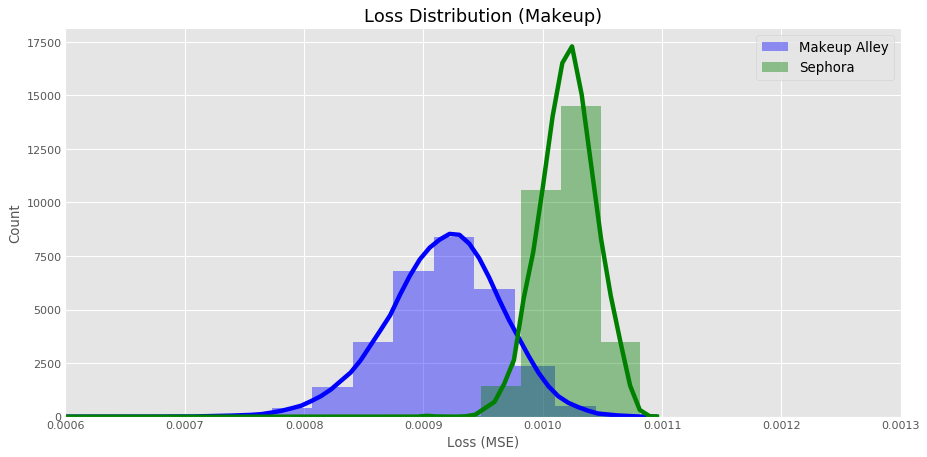

In [64]:
plt.figure(figsize=(12,6), dpi=80)
plt.title('Loss Distribution (Makeup)', fontsize= 16)
sns.distplot(X_train_loss, bins =30, kde= True, color= 'blue', label=True)
sns.distplot(sepho_loss, bins =30, kde= True, color= 'green', label=True)
plt.legend(['Makeup Alley', 'Sephora'], fontsize = 'large')
plt.xlabel('Loss (MSE)')
plt.ylabel('Count')
plt.xlim([0.0006,0.0013])
plt.savefig('img/LossDistMakeup.png')

In [ ]:
#set threshold
#calculate sepho_loss
#compare to threshold --> determine if fake or not
#collect more sepho data - esp. Sunday Riley
#if can do other brand, try comparing by brand
#show example of honest vs dishonest from both makeup and Yelp

In [65]:
sepho_frame = pd.DataFrame(sepho_loss, columns=['Loss(MSE)'])

In [140]:
sepho_frame['Threshold1'] = 0.00094
sepho_frame['Anomaly1'] = sepho_frame['Loss(MSE)'] > sepho_frame['Threshold1']
sepho_frame['Threshold2'] = 0.00097
sepho_frame['Anomaly2'] = sepho_frame['Loss(MSE)'] > sepho_frame['Threshold2']
sepho_frame['Threshold3'] = 0.001
sepho_frame['Anomaly3'] = sepho_frame['Loss(MSE)'] > sepho_frame['Threshold3']
sepho_frame['Threshold4'] = 0.00105
sepho_frame['Anomaly4'] = sepho_frame['Loss(MSE)'] > sepho_frame['Threshold4']

In [142]:
#2 reviews are classified as authentic with th= 0.00094 
sepho_frame[sepho_frame['Anomaly2'] == False].count()*100/len(sepho_frame)

Loss(MSE)     1.991852
Threshold1    1.991852
Anomaly1      1.991852
Threshold2    1.991852
Anomaly2      1.991852
Threshold3    1.991852
Anomaly3      1.991852
Threshold4    1.991852
Anomaly4      1.991852
dtype: float64

- 0.00094 - 0.1% of reviews are classified as authentic
- 0.00097 - 2% of reviews are authentic
- 0.001 -  18% of reviews are authentic
- 0.00105 - 90% of reviews are authentic

In [ ]:
pd.read_csv()

In [145]:
sepho_frame[sepho_frame['Anomaly1'] == False]

Loss(MSE)  Threshold1  Anomaly1  Threshold2  Anomaly2  Threshold3  \
905    0.000083     0.00094     False     0.00097     False       0.001   
1352   0.000905     0.00094     False     0.00097     False       0.001   

      Anomaly3  Threshold4  Anomaly4  
905      False     0.00105     False  
1352     False     0.00105     False

In [152]:
sephora = pd.read_csv('data/sepho_review_rating.csv').drop(columns='Unnamed: 0')

In [154]:
sephora.iloc[905,:].values

array(['Me gusto mucho y tengo cutis graso, él maquillaje seco bastante bien y no lo siento apastelado',
       5], dtype=object)

In [155]:
sephora.iloc[1352,:].values

array(['First of all I would like to mention to all that follows me as well as those of you that have recently found my reviews. Thank you all for following me as I do buy many products from Sephora from makeup to face regimes. I have never been a big fan of PTR however. This Cucumber Gel Mask Extreme Detoxifying Hydrator is the next best thing other than Heaven. I normally never try 1000s of samples I get through my orders, I did original get the Peter Thomas Roth ULTIMATE ANTI-AGING MUST HAVES with 500 points as I have tried the whole set. I absolutely fell in love with the Cucumber Gel Mask so in my last order I ordered the full size jar and I own and use many face serums, eye serums and moisturizers that I buy from Sephora and Dillard\'s which I have wasted a lot of money on products that "claim" there is so many out here is just that! Now to this product, if you are one with combination to dry skin buy this I promise you\'ll not need another moisturizer or face mask! (for over nig

In [148]:
sepho_frame[sepho_frame['Anomaly2'] == False]

Loss(MSE)  Threshold1  Anomaly1  Threshold2  Anomaly2  Threshold3  \
72     0.000966     0.00094      True     0.00097     False       0.001   
105    0.000969     0.00094      True     0.00097     False       0.001   
186    0.000960     0.00094      True     0.00097     False       0.001   
332    0.000967     0.00094      True     0.00097     False       0.001   
334    0.000969     0.00094      True     0.00097     False       0.001   
383    0.000954     0.00094      True     0.00097     False       0.001   
429    0.000954     0.00094      True     0.00097     False       0.001   
621    0.000968     0.00094      True     0.00097     False       0.001   
649    0.000968     0.00094      True     0.00097     False       0.001   
660    0.000968     0.00094      True     0.00097     False       0.001   
670    0.000969     0.00094      True     0.00097     False       0.001   
724    0.000968     0.00094      True     0.00097     False       0.001   
768    0.000961     0.00094      True     0.00097     False       0.001   
853    0.000968     0.00094      True     0.00097     False       0.001   
870    0.000965     0.00094      True     0.00097     False       0.001   
899    0.000969     0.00094      True     0.00097     False       0.001   
905    0.000083     0.00094     False     0.00097     False       0.001   
971    0.000966     0.00094      True     0.00097     False       0.001   
972    0.000947     0.00094      True     0.00097     False       0.001   
976    0.000970     0.00094      True     0.00097     False       0.001   
1043   0.000958     0.00094      True     0.00097     False       0.001   
1142   0.000963     0.00094      True     0.00097     False       0.001   
1173   0.000964     0.00094      True     0.00097     False       0.001   
1238   0.000955     0.00094      True     0.00097     False       0.001   
1352   0.000905     0.00094     False     0.00097     False       0.001   
1382   0.000969     0.00094      True     0.00097     False       0.001   
1383   0.000959     0.00094      True     0.00097     False       0.001   
1396   0.000965     0.00094      True     0.00097     False       0.001   
1426   0.000968     0.00094      True     0.00097     False       0.001   
1465   0.000968     0.00094      True     0.00097     False       0.001   
1499   0.000962     0.00094      True     0.00097     False       0.001   
1511   0.000968     0.00094      True     0.00097     False       0.001   
1557   0.000969     0.00094      True     0.00097     False       0.001   
1594   0.000964     0.00094      True     0.00097     False       0.001   
1630   0.000951     0.00094      True     0.00097     False       0.001   
1634   0.000965     0.00094      True     0.00097     False       0.001   
1670   0.000969     0.00094      True     0.00097     False       0.001   
1727   0.000950     0.00094      True     0.00097     False       0.001   
1797   0.000954     0.00094      True     0.00097     False       0.001   
1869   0.000954     0.00094      True     0.00097     False       0.001   
2026   0.000959     0.00094      True     0.00097     False       0.001   
2117   0.000961     0.00094      True     0.00097     False       0.001   
2161   0.000955     0.00094      True     0.00097     False       0.001   
2181   0.000949     0.00094      True     0.00097     False       0.001   

      Anomaly3  Threshold4  Anomaly4  
72       False     0.00105     False  
105      False     0.00105     False  
186      False     0.00105     False  
332      False     0.00105     False  
334      False     0.00105     False  
383      False     0.00105     False  
429      False     0.00105     False  
621      False     0.00105     False  
649      False     0.00105     False  
660      False     0.00105     False  
670      False     0.00105     False  
724      False     0.00105     False  
768      False     0.00105     False  
853      False     0.00105     False  
870      False     0.00105     False  
899   

In [176]:
index = sepho_frame[sepho_frame['Anomaly3'] == False].index

In [177]:
index_lst = [i for i in index]

In [178]:
authen_01 = sephora.iloc[index_lst]

(array([ 29.,   0.,  16.,   0.,   0.,  11.,   0.,  60.,   0., 290.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

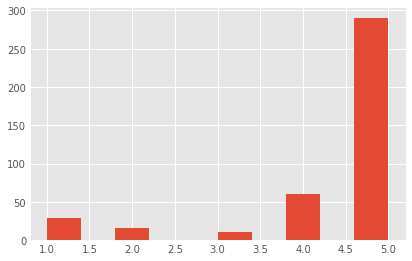

In [179]:
plt.hist(authen_01.Rating)

In [180]:
index2 = sepho_frame[sepho_frame['Anomaly2'] == False].index
index_lst2 = [i for i in index2]
authen_97 = sephora.iloc[index_lst2]

(array([ 2.,  0.,  0.,  2.,  0.,  0.,  9.,  0.,  0., 31.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

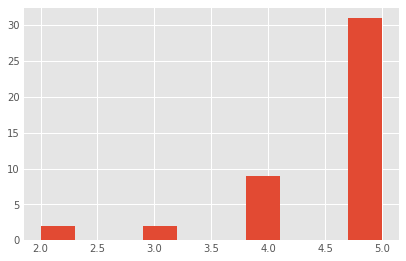

In [181]:
plt.hist(authen_97.Rating)